In [1]:
# Required Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# Load subset
df = pd.read_csv('/project/processed_data/synthetic_data.csv')
df.head(5)

Storefront  Visible Sign of Business  Business WiFi  Business tables  \
0    0.561028                  0.561028       0.567452          0.56531   
1    0.561028                  0.561028       0.567452          0.56531   
2    0.561028                  0.561028       0.567452          0.56531   
3    0.561028                  0.561028       0.567452          0.56531   
4    0.561028                  0.561028       0.567452          0.56531   

   Business Plugs  Business Internal CCTV  External CCTV  \
0        0.561028                0.573876       0.561028   
1        0.561028                0.573876       0.561028   
2        0.561028                0.573876       0.561028   
3        0.561028                0.573876       0.561028   
4        0.561028                0.573876       0.561028   

   Number of female employees  Accepts credit card   Incline  ...  Collision  \
0                    0.922912             0.955032  0.520343  ...   0.002141   
1                    0.599572             0.950749  0.950749  ...   0.002141   
2                    0.970021             1.000000  0.989293  ...   0.002141   
3                    0.993576             0.955032  0.989293  ...   0.002141   
4                    0.871520             0.950749  0.520343  ...   0.002141   

   Run over     Metro  Metrobus  Trolleybus       RTP  Concessioned    e-bike  \
0  0.344754  0.004283  0.072805     0.56531  0.762313      0.004283  0.310493   
1  0.344754  0.004283  0.066381     0.56531  0.762313      0.004283  0.310493   
2  0.062099  0.004283  0.010707     0.56531  0.762313      0.004283  0.310493   
3  0.344754  0.004283  0.010707     0.56531  0.762313      0.004283  0.098501   
4  0.006424  0.004283  0.072805     0.56531  0.762313      0.004283  0.092077   

   Total coverage of transport    category  
0                     0.948608   Desirable  
1                     0.899358   Desirable  
2                     0.100642  Acceptable  
3                     0.004283  Inadequate  
4                     0.948608   Desirable  

[5 rows x 74 columns]

In [55]:
cluster = pd.read_csv('/project/cluster_group.csv')

In [21]:
# Create a mapping of categories to numbers
category_mapping = {
    'Desirable': 3,
    'Acceptable': 2,
    'Inadequate':1
    # Add other categories if any
}

# Replace categories with numbers
df['category'] = df['category'].replace(category_mapping)


In [32]:
import sys
sys.path.append('/project/ELECTRE_Tree')

from electre_tree import tree_e_tri_b , util_e_tri_b

In [7]:
# Sample 3 rows for each category
sampled_df = df.groupby('category').apply(lambda x: x.sample(n=3, replace=True)).reset_index(drop=True)

sampled_df.head()

Storefront  Visible Sign of Business  Business WiFi  Business tables  \
0    0.561028                  0.561028       0.567452          0.56531   
1    0.561028                  0.561028       0.567452          0.56531   
2    0.561028                  0.561028       0.567452          0.56531   
3    0.561028                  0.561028       0.567452          0.56531   
4    0.561028                  0.561028       0.567452          0.56531   

   Business Plugs  Business Internal CCTV  External CCTV  \
0        0.561028                0.573876       0.561028   
1        0.561028                0.573876       0.561028   
2        0.561028                0.573876       0.561028   
3        0.561028                0.573876       0.561028   
4        0.561028                0.573876       0.561028   

   Number of female employees  Accepts credit card   Incline  ...  Collision  \
0                    0.725910             1.000000  0.520343  ...   0.002141   
1                    0.830835             1.000000  0.989293  ...   0.002141   
2                    0.970021             0.955032  0.989293  ...   0.002141   
3                    0.835118             0.955032  0.520343  ...   0.002141   
4                    0.725910             1.000000  0.989293  ...   0.002141   

   Run over     Metro  Metrobus  Trolleybus       RTP  Concessioned    e-bike  \
0  0.130621  0.004283  0.072805     0.56531  0.762313      0.004283  0.310493   
1  0.062099  0.004283  0.010707     0.56531  0.762313      0.004283  0.092077   
2  0.062099  0.004283  0.010707     0.56531  0.762313      0.004283  0.278373   
3  0.062099  0.004283  0.010707     0.56531  0.762313      0.004283  0.278373   
4  0.130621  0.004283  0.072805     0.56531  0.762313      0.004283  0.098501   

   Total coverage of transport  category  
0                     0.004283         1  
1                     0.004283         1  
2                     0.004283         1  
3                     0.008565         2  
4                     0.357602         2  

[5 rows x 74 columns]

In [23]:

X = df.drop('category', axis=1)

In [56]:
yc= cluster['Cluster']
Xc = cluster.drop('Cluster', axis=1)

In [87]:
cluster

Public WiFi  number of bikes  Mean Inhabitants  Employment  Crime Degree  \
0            4.0              0.0          1.194917         1.0           5.0   
1            9.0              0.0          0.534557         1.0           2.0   
2            6.0              0.0          0.576814         1.0           2.0   
3            2.0             33.0          0.501053         2.5           1.0   
4            1.0             28.5          0.547345         2.5           1.0   
..           ...              ...               ...         ...           ...   
522          1.5             36.0          0.827349         3.5           3.0   
523        377.0              0.0          0.464389         1.0           1.5   
524         34.0              0.0          0.807619         1.5           2.5   
525         20.0              0.0          0.944406         1.0           3.0   
526          7.0              0.0          0.772157         1.0           3.0   

     school_count  Flooding  hospitals_count  Income  Deaths  ...  Run over  \
0             4.0  1.000000              8.0     0.0     0.0  ...      0.00   
1             1.0  1.000000              1.0     0.0     0.0  ...      0.00   
2             4.0  1.500000              4.0     0.0     0.0  ...      2.00   
3            12.0  1.000000             12.0     1.0     0.0  ...      1.50   
4            16.0  1.500000             16.0     0.5     0.0  ...      1.00   
..            ...       ...              ...     ...     ...  ...       ...   
522          16.0  5.000000             16.0     0.0     0.0  ...      1.50   
523           4.0  5.000000              8.0     0.0     0.0  ...      1.00   
524         450.0  2.666667           2700.0     0.0     0.0  ...      1.75   
525           1.0  4.000000              1.0     0.0     0.0  ...      0.00   
526           4.0  5.000000              4.0     0.0     0.0  ...      1.50   

     Metro  Suburban Train  Metrobus  Trolleybus  RTP  Concessioned  e-bike  \
0      0.0             0.0  0.000000         0.0  0.0      0.000000     0.0   
1      0.0             0.0  0.666667         0.0  0.0      0.666667     0.0   
2      0.0             0.0  0.000000         0.0  0.5      1.000000     0.0   
3      1.0             0.0  0.333333         1.0  1.0      0.333333     1.0   
4      1.0             0.0  0.000000         1.0  1.0      0.500000     1.0   
..     ...             ...       ...         ...  ...           ...     ...   
522    1.0             0.0  1.000000         0.0  0.0      1.000000     1.0   
523    1.0             0.0  0.500000         0.0  0.5      0.500000     0.0   
524    0.6             0.0  0.300000         0.2  0.6      0.800000     0.0   
525    0.5             0.0  0.000000         0.0  0.0      1.000000     0.0   
526    0.0             0.0  1.000000         0.0  0.5      1.000000     0.0   

     Total coverage of transport  Cluster  
0                       0.000000        0  
1                       1.333333        0  
2                       1.500000        0  
3                       4.666667        0  
4                       4.500000        0  
..                           ...      ...  
522                     4.000000        0  
523                     2.500000        0  
524                     2.500000        1  
525                     1.500000        0  
526                     2.500000        0  

[527 rows x 22 columns]

In [19]:
X_train, X_test, y_train,  y_test =  train_test_split(X, y, test_size = 0.50, random_state = 42)

In [34]:
Xc_train, Xc_test, yc_train,  yc_test =  train_test_split(Xc, yc, test_size = 0.50, random_state = 42)

In [44]:
yc_test

9      1
197    0
66     0
191    0
117    2
      ..
113    2
33     0
11     1
208    0
180    0
Name: Cluster, Length: 107, dtype: int64

In [12]:
# Convert to array format
X = X.values
X
Y= y.values

In [66]:
# Convert to array format
Xc = Xc.values

Yc= yc.values



AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [86]:
Xc

array([[ 4.        ,  0.        ,  1.19491667, ...,  0.        ,
         0.        ,  0.        ],
       [ 9.        ,  0.        ,  0.53455696, ...,  0.66666667,
         0.        ,  1.33333333],
       [ 6.        ,  0.        ,  0.57681442, ...,  1.        ,
         0.        ,  1.5       ],
       ...,
       [34.        ,  0.        ,  0.80761885, ...,  0.8       ,
         0.        ,  2.5       ],
       [20.        ,  0.        ,  0.94440559, ...,  1.        ,
         0.        ,  1.5       ],
       [ 7.        ,  0.        ,  0.77215674, ...,  1.        ,
         0.        ,  2.5       ]])

In [67]:
Xc

array([[ 4.        ,  0.        ,  1.19491667, ...,  0.        ,
         0.        ,  0.        ],
       [ 9.        ,  0.        ,  0.53455696, ...,  0.66666667,
         0.        ,  1.33333333],
       [ 6.        ,  0.        ,  0.57681442, ...,  1.        ,
         0.        ,  1.5       ],
       ...,
       [34.        ,  0.        ,  0.80761885, ...,  0.8       ,
         0.        ,  2.5       ],
       [20.        ,  0.        ,  0.94440559, ...,  1.        ,
         0.        ,  1.5       ],
       [ 7.        ,  0.        ,  0.77215674, ...,  1.        ,
         0.        ,  2.5       ]])

In [45]:
# Parameters - ELECTRE Tree
rule      = 'pc'
classes   = 3
target    = list(y_train)
cut_level = []
Q         = []
P         = []
V         = []
W         = []
B         = []
models    = 10

# Parameters - GA
elite       = 1
eta         = 1
mu          = 2
size        = 15
rate        = 0.05
generations = 250
samples     = 0.10

In [82]:
# Parameters - ELECTRE Tree
rule      = 'pc'
classes   = 3
target    = list(yc)
cut_level = []
Q         = []
P         = []
V         = []
W         = []
B         = []
models    = 10

# Parameters - GA
elite       = 1
eta         = 3
mu          = 1
size        = 30
rate        = 0.1
generations = 150
samples     = 0.10

In [83]:
# Train Model
modelsc = tree_e_tri_b.tree_electre_tri_b(Xc, 
                                         #target_assignment = target, 
                                         W = W, 
                                         Q = Q, 
                                         P = P, 
                                         V = V, 
                                         B = B, 
                                         #cut_level = cut_level, 
                                         rule = rule, 
                                         number_of_classes = classes, 
                                         elite = elite, 
                                         eta = eta, 
                                         mu = mu, 
                                         population_size = size, 
                                         mutation_rate = rate, 
                                         generations = generations, 
                                         samples = samples, 
                                         number_of_models = models)  

Model # 1
Model # 2
Model # 3
Model # 4
Model # 5
Model # 6
Model # 7
Model # 8
Model # 9
Model # 10


In [15]:
# Train Model
models = tree_e_tri_b.tree_electre_tri_b(Xc, 
                                         target_assignment = target, 
                                         W = W, 
                                         Q = Q, 
                                         P = P, 
                                         V = V, 
                                         B = B, 
                                         #cut_level = cut_level, 
                                         rule = rule, 
                                         number_of_classes = classes, 
                                         elite = elite, 
                                         eta = eta, 
                                         mu = mu, 
                                         population_size = size, 
                                         mutation_rate = rate, 
                                         generations = generations, 
                                         samples = samples, 
                                         number_of_models = models)  

Model # 1
Model # 2
Model # 3
Model # 4
Model # 5
Model # 6
Model # 7
Model # 8
Model # 9
Model # 10


In [22]:
# Predict 
prediction, solutions = tree_e_tri_b.predict(models, X_test, verbose = False, rule = rule) 

In [84]:
predictionc, solutionsc = tree_e_tri_b.predict(modelsc, Xc, verbose = False, rule = rule) 

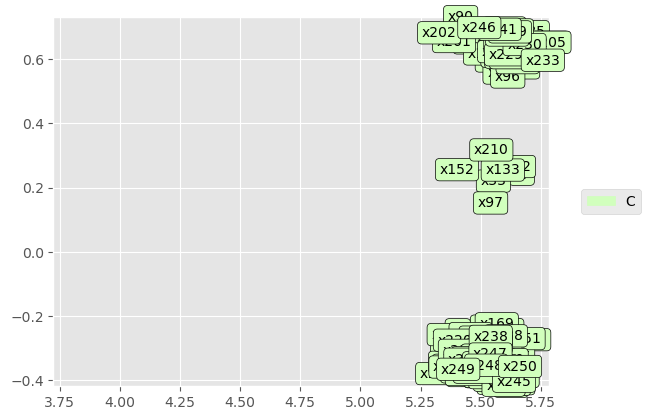

In [23]:
# Plot - Tree Model
util_e_tri_b.plot_points(X_test, prediction)

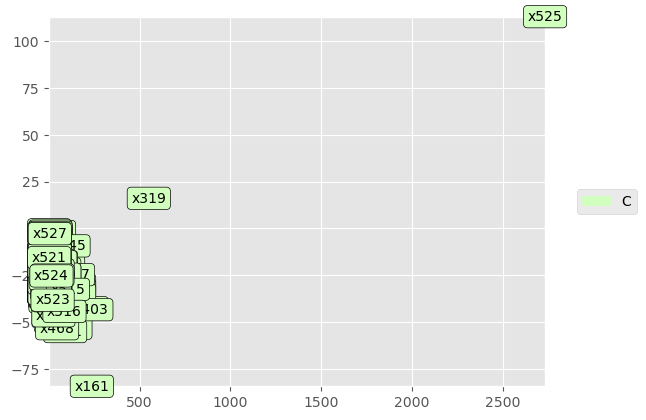

In [85]:
util_e_tri_b.plot_points(Xc, predictionc)

In [24]:
# Elicitated Paramneters
w_mean, w_std, q_mean, q_std, p_mean, p_std, v_mean, v_std, b_mean, b_std, cut_mean, cut_std, acc_mean, acc_std = tree_e_tri_b.metrics(models, number_of_classes = classes)

print('Criteria Weights: ', np.around(w_mean, decimals = 2))
print('Q: ', np.around(q_mean, decimals = 2))
print('P: ', np.around(p_mean, decimals = 2))
print('V: ', np.around(v_mean, decimals = 2))
for i in range(0, len(b_mean)):
    print('b'+str(i+1)+': ', np.around(b_mean[i], decimals = 2))
    print('Lambda Cutoff: ', round(cut_mean,  2))
    print('Accuracy: ',      round(acc_mean,  2))

Criteria Weights:  [0.62 0.45 0.59 0.37 0.6  0.33 0.68 0.49 0.79 0.25 0.46 0.44 0.15 0.77
 0.98 0.54 0.37 0.38 0.5  0.39 0.44 0.45 0.74 0.62 0.58 0.65 0.51 0.47
 0.37 0.5  0.54 0.67 0.46 0.66 0.59 0.61 0.51 0.32 0.5  0.58 0.53 0.72
 0.71 0.65 0.52 0.59 0.49 0.63 0.45 0.52 0.92 0.66 0.62 0.54 0.42 0.37
 0.34 0.62 0.36 0.61 0.38 0.41 0.63 0.46 0.65 0.77 0.6  0.8  0.61 0.33
 0.61 0.39 0.43]
Q:  [0.   0.   0.01 0.   0.   0.   0.   0.07 0.02 0.12 0.02 0.   0.   0.
 0.04 0.   0.05 0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.04 0.03 0.   0.02 0.05 0.   0.   0.01 0.02 0.02 0.15 0.14
 0.25 0.08 0.03 0.24 0.   0.07 0.   0.1  0.   0.19 0.   0.02 0.   0.
 0.   0.04 0.13]
P:  [0.   0.   0.01 0.   0.   0.   0.   0.08 0.02 0.2  0.04 0.   0.   0.
 0.04 0.   0.06 0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.05 0.04 0.   0.02

In [25]:
# Required Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from pyDecision.algorithm import electre_tri_b
import jenkspy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [35]:
# Get the column names as a list
column_names = X.columns.tolist()
column_names

# Create the dictionary
importances= [10,7.5,5,6,9,7.75,8.5,10,10,8,4,6.5,8.5,9.5,9,8.5,6.5,10,8,9,5,8,7.75,6,5,8,3,9,
               10,9,9,8,9,9,9,10,10,5,3.75,10,4,8.25,7.5,5,5.5,2.5,10,10,9,9,10,3.5,10,10,7.5,
               1.5,10,9.5,10,5,10,8,5.5,4.5,7.5,10,10,10,10,6.5,10,2.5,2.5,6.5,4.5,9]
importance_dict = {column_names[i]: importances[i] for i in range(len(column_names))}

print(importance_dict)

{'Storefront': 10, 'Visible Sign of Business': 7.5, 'Business WiFi': 5, 'Business tables': 6, 'Business Plugs': 9, 'Business Internal CCTV': 7.75, 'External CCTV': 8.5, 'Number of female employees': 10, 'Accepts credit card': 10, 'Incline': 8, 'Width': 4, 'Ramp conditions': 6.5, 'Ramp // Crosswalk': 8.5, 'Ramp obstacles': 9.5, 'Crosswalk width': 9, 'Vertical signs': 8.5, 'Crossing length': 6.5, 'Access to people with disabilities': 10, 'Broken public property': 8, 'Incivility': 9, 'Obstacles': 5, 'Physical aspects in poor condition': 8, 'Poor infrastructure': 7.75, 'Positive elements': 6, 'Broken drain-cover': 5, 'Drug addicts': 8, 'Federal Judiciary': 3, 'Panic button': 9, 'Vandalism': 10, 'graffiti': 9, 'homelessness': 9, 'inclined ramp': 8, 'indication of security': 9, 'mobile vendors': 9, 'police presence': 9, 'risky building': 10, 'risky pavement': 10, 'risky road': 5, 'tourist map': 3.75, 'trash': 10, 'vehicle abandoned': 4, 'excellent street lighting': 8.25, 'good street lightin

In [36]:
W = list(importance_dict.values())

W

[10,
 7.5,
 5,
 6,
 9,
 7.75,
 8.5,
 10,
 10,
 8,
 4,
 6.5,
 8.5,
 9.5,
 9,
 8.5,
 6.5,
 10,
 8,
 9,
 5,
 8,
 7.75,
 6,
 5,
 8,
 3,
 9,
 10,
 9,
 9,
 8,
 9,
 9,
 9,
 10,
 10,
 5,
 3.75,
 10,
 4,
 8.25,
 7.5,
 5,
 5.5,
 2.5,
 10,
 10,
 9,
 9,
 10,
 3.5,
 10,
 10,
 7.5,
 1.5,
 10,
 9.5,
 10,
 5,
 10,
 8,
 5.5,
 4.5,
 7.5,
 10,
 10,
 10,
 10,
 6.5,
 10,
 2.5,
 2.5]

In [37]:
# Initialize an empty dictionary to store the breaks for each column
breaks_dict = {}

# Loop through each column in the DataFrame
for column in X.columns:
    if X[column].nunique() > 2:  # If the column is non-binary
        # Apply jenks_breaks to the column
        breaks = jenkspy.jenks_breaks(X[column], n_classes=2)
    else:  # If the column is binary
        # Manually set the breaks
        breaks = [0, 1]
    # Save the breaks in the dictionary with the column name as the key
    breaks_dict[column] = breaks

In [38]:
B1 = []
B2 = []

for key in breaks_dict:
    if len(breaks_dict[key]) == 2:  # Binary case
        B1.append(breaks_dict[key][0])
        B2.append(breaks_dict[key][1])
    else:  # Non-binary case
        # You can change these indices based on where you want the thresholds to be
        B1.append(breaks_dict[key][1]) 
        B2.append(breaks_dict[key][2])

print(B1)
print(B2)

[0, 0, 0, 0, 0, 0, 0, 0.835117773019272, 0.955032119914347, 0.5203426124197003, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.8565310492505354, 0.822269807280514, 0, 0.9271948608137046, 0.8886509635974305, 0, 0, 0, 0.0728051391862955, 0.9635974304068524, 0.0942184154175588, 0.4068522483940043, 0.0685224839400428, 0.297644539614561, 0, 0.670235546038544, 0, 0.5417558886509637, 0.0085653104925053, 0.019271948608137, 0, 0.1306209850107066, 0, 0.0107066381156316, 0, 0, 0, 0.0985010706638115, 0.3576017130620985]
[1, 1, 1, 1, 1, 1, 1, 0.993576017130621, 1.0, 0.9892933618843684, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.93576017130621, 0.9143468950749464, 1, 0.974304068522484, 0.974304068522484, 1, 1, 1, 0.1284796573875803, 1.0, 0.993576017130621, 0.9143468950749464, 1.0, 0.9721627408993576, 1, 0.9978586723768738, 1, 0.9978586723768738, 0.0171306209850107, 0.3383297644539615

In [39]:
B = [B1, B2]

In [40]:
import random

def find_params_rand2(W, B, n, num_iterations=1000, verbose=False, rule='oc', graph=False):
    results = []

    # Function to generate a random value between 0 and 1 for Q, P, and V
    def generate_random_value():
        return random.uniform(0, 1)

    current_iteration = 0

    for _ in range(num_iterations):
        Q_comb = [generate_random_value() for _ in range(n)]
        P_comb = [generate_random_value() for _ in range(n)]
        V_comb = [generate_random_value() for _ in range(n)]
        
        current_iteration += 1
        print(f"Processing iteration {current_iteration} of {num_iterations}. Current values: Q={Q_comb}, P={P_comb}, V={V_comb}")
                
        # Call the electre_tri_b function with the current combination of Q, P, and V
        categories = electre_tri_b(X, W, Q_comb, P_comb, V_comb, B, verbose=verbose, rule=rule, graph=graph)

        # Check if the result has 3 unique categories
        if len(set(categories)) == 3:
            # Save the parameters if the condition is met
            results.append({'Q': Q_comb, 'P': P_comb, 'V': V_comb, 'categories': categories})

    return results

In [47]:
n=len(W)
params_with_3_categories_rand2 = find_params_rand2(W, B, n)

Processing iteration 1 of 1000. Current values: Q=[0.8082400141397039, 0.7449797368010852, 0.17866848502510124, 0.328229115748359, 0.5361211198893733, 0.2490648709819181, 0.5229677446115342, 0.5871931955122373, 0.4400003503334562, 0.6830048953407266, 0.5880446667308745, 0.9252811053986234, 0.4866251988231609, 0.5075550031493956, 0.09421009211700815, 0.8761715024921356, 0.1604478113681469, 0.7858280940706124, 0.3601664182662462, 0.4845712203827989, 0.3620710459891785, 0.42631553033975245, 0.43196649370929363, 0.688102909583368, 0.4603208240853971, 0.20830314750017775, 0.4783302510964167, 0.18396668762982682, 0.8375500843906163, 0.17699586006952384, 0.22318317138778276, 0.7386461515053429, 0.3434151708197294, 0.05644621692008378, 0.2422185721006479, 0.7048031976124791, 0.3899561283745059, 0.3195518904913449, 0.3590112764279464, 0.8083488932926222, 0.8129557330930148, 0.16036048950426807, 0.022898044185831967, 0.7002623036980947, 0.029419439224293353, 0.5702956309641075, 0.212194471130898

Processing iteration 3 of 1000. Current values: Q=[0.783619468529853, 0.46340398227642676, 0.371950241611809, 0.042853594119726224, 0.6995884017676375, 0.1982016639197055, 0.2619058380290381, 0.22656831849761572, 0.8714247540970586, 0.36016784692450887, 0.4292832273535563, 0.3063742810625153, 0.09159540311212955, 0.046125231281319734, 0.1355857329304877, 0.15228644828295013, 0.9398339655720274, 0.4059174537340158, 0.5677396637083448, 0.46506620187241343, 0.10640725188792466, 0.591990175753072, 0.5734232678573602, 0.3068992488658815, 0.0216158236748053, 0.23748926423208117, 0.9620093679796807, 0.5711087688956513, 0.9318766268409377, 0.9551828037763864, 0.7340766760787087, 0.4710262447812522, 0.4613738621459731, 0.7301165230083281, 0.8756780214440676, 0.4004918406469976, 0.5540422681837336, 0.40192976734347896, 0.5329367626346232, 0.9031182795506956, 0.4285096502382971, 0.7921334023876087, 0.7443408364114896, 0.3364001652384341, 0.09496019161453761, 0.3626446329814085, 0.6217257319795014

Processing iteration 5 of 1000. Current values: Q=[0.20012299909843467, 0.15356358151238492, 0.11004549138744801, 0.5999209853722111, 0.08233687950205781, 0.6806318554939303, 0.9543507527685963, 0.5690251369189854, 0.6393529951658803, 0.344707948833735, 0.366482586726237, 0.4070436055494908, 0.1912389451923553, 0.8809999637151368, 0.8801080064965281, 0.9988364373711104, 0.6492563812244039, 0.5868373708360217, 0.07962482826760298, 0.14311514857834262, 0.9027113888944243, 0.7272446209670512, 0.09595758535296706, 0.32972863305329736, 0.8067506616867288, 0.7098435455359883, 0.879544293891695, 0.4148789125443759, 0.11995865625670099, 0.40229186925020644, 0.33601451975770613, 0.8745284950776124, 0.45543960621235746, 0.8361190875831003, 0.4708381177383395, 0.12044758321256854, 0.36716780281473094, 0.0003600891966456521, 0.23908491925038622, 0.2876705151184157, 0.4389384436105279, 0.7703168658027367, 0.7177203401328153, 0.04988622139579324, 0.6191602267368198, 0.7328211139962119, 0.06057592945

Processing iteration 7 of 1000. Current values: Q=[0.06343834842816198, 0.16333028213035172, 0.01240383438526449, 0.6003269890457842, 0.6075864170100453, 0.9723844679812386, 0.10740104913632376, 0.526859010976699, 0.18971116257938136, 0.38685929315051715, 0.9604456366389755, 0.564679091335867, 0.207608327859511, 0.8796912386013942, 0.0452582594263744, 0.13581067291494597, 0.16496641249906274, 0.8531327154715679, 0.3307865150757563, 0.24784784974896323, 0.4555803482799191, 0.8862187823999272, 0.6280991442126016, 0.7082181822827069, 0.19852443733270175, 0.4477857114540277, 0.6227559403415878, 0.99519597453627, 0.5259612698844475, 0.6381422950753852, 0.19681614467826136, 0.3745369794549679, 0.9797259405627877, 0.4254865432262558, 0.9957659981919035, 0.8776516633844117, 0.00020698125355933517, 0.5839241692516973, 0.36903017358524226, 0.01946728717788515, 0.14541798932160954, 0.649743817470178, 0.7223470383858142, 0.928711232511097, 0.052509754992145274, 0.8521393974157085, 0.30629187127302

Processing iteration 9 of 1000. Current values: Q=[0.9451185252161161, 0.900572684820822, 0.45085461348250544, 0.4062304216229009, 0.7668405414153742, 0.2891786744110809, 0.01794167389824508, 0.8676459331464933, 0.21646488012150678, 0.41192019495620114, 0.40454285035760573, 0.5733558550407913, 0.18521248255540113, 0.6038191683254085, 0.7425041842442287, 0.31763930191624723, 0.2088765000225964, 0.6811929114376386, 0.6747029222333168, 0.9399191264005313, 0.9046597383849568, 0.3999704149527069, 0.14352453401411858, 0.36455607391448197, 0.01012300494029239, 0.5291423530840907, 0.6873963870602229, 0.2123182041368622, 0.27155123329072284, 0.11559317191800944, 0.7834165293926483, 0.8172940331827756, 0.6760614316325875, 0.45925223826405925, 0.916206980261367, 0.014306938607070108, 0.9656204668296493, 0.646742352080579, 0.03546776240500804, 0.1261394054626167, 0.5821628064524823, 0.736591883022846, 0.6217431547887862, 0.23741123588907087, 0.12871825218178978, 0.7342855280857348, 0.8175472288642

Processing iteration 11 of 1000. Current values: Q=[0.2568324907627342, 0.38395230095208466, 0.6091391786076499, 0.427017266674778, 0.44699185296734756, 0.4453075478209134, 0.27600271620485284, 0.9391429638097016, 0.7249740641269745, 0.26226830674928814, 0.5774841937715344, 0.49741770138079366, 0.936540935888999, 0.1249792254661537, 0.7008496958916879, 0.03979570446759828, 0.4579950366599822, 0.04927746275973344, 0.39090712215262435, 0.4534199515988254, 0.22786232944673324, 0.7615905329623213, 0.9928423599420244, 0.07717626100774178, 0.8813133742409914, 0.7965256793455749, 0.32385987045953846, 0.06682783592731534, 0.8608529371330261, 0.9760882885375045, 0.03190274396537052, 0.7660355014193578, 0.04852085872676826, 0.5894538621498995, 0.8775721904724556, 0.27316450537926773, 0.9622558717885661, 0.48215955859387893, 0.6034038166710588, 0.12749319628902722, 0.3637101144234741, 0.7790858450825962, 0.7699895307751179, 0.4882367650754249, 0.3530554586551695, 0.7738206583479889, 0.52471668392

Processing iteration 13 of 1000. Current values: Q=[0.3155918209096904, 0.5616342718602193, 0.22118025836354271, 0.6586046978713139, 0.9662799955147112, 0.5827380003789848, 0.9065627250210648, 0.5405341327711463, 0.362387742755267, 0.6912343101030335, 0.2212025536116976, 0.49623559973672837, 0.008580861996030253, 0.944245685993099, 0.7484701768650369, 0.5215438503038388, 0.8020498182815956, 0.10498421006596015, 0.3629122972053558, 0.5099596696996411, 0.6098871618291384, 0.926012053323634, 0.8852151034303206, 0.4819027388409566, 0.04176730116451255, 0.2518692045222708, 0.6585494037667798, 0.33590830417968554, 0.12033797623574338, 0.8981830854498208, 0.2399742942129105, 0.1554674025934215, 0.23597964061011467, 0.03072667556178732, 0.3899758208331372, 0.0019282466250399866, 0.8472502529413746, 0.36956557571111415, 0.47711543232094833, 0.28206075685632337, 0.5015849318690974, 0.0622786749870301, 0.039930847592425156, 0.644804213462522, 0.2942705170936524, 0.43473844242678716, 0.24907839509

Processing iteration 15 of 1000. Current values: Q=[0.5655877988208141, 0.7816800778336679, 0.701858910428057, 0.20502501707005427, 0.2667663388238356, 0.9806956570498431, 0.3353906465739913, 0.9333990537990002, 0.5533196555675793, 0.5741323040151997, 0.48276281726062553, 0.2184627415161826, 0.8865567533442028, 0.9579806006920494, 0.34582818382372693, 0.6842815985099133, 0.29590546168218257, 0.9156866074269878, 0.7158520626923122, 0.1490091329761407, 0.7899762856507642, 0.5827246877250684, 0.7734803369774373, 0.31010209174777414, 0.0013753736369590541, 0.09926465638096671, 0.07414482742056872, 0.8001969210097906, 0.34145431994942965, 0.1512866535380788, 0.17470274245393325, 0.25991666794025914, 0.7473824929190809, 0.23088333969695096, 0.8888791205255121, 0.28650335996050014, 0.5265186992144323, 0.02529390114741925, 0.6139869880005792, 0.8634453089737745, 0.08968329178716505, 0.5373750320524529, 0.06290571191680583, 0.3712627076059575, 0.6398953274297832, 0.8200473930393746, 0.731867881

Processing iteration 17 of 1000. Current values: Q=[0.6263074156021592, 0.31972843204186197, 0.9602535982709326, 0.18374857304688785, 0.6548964502526184, 0.9259105124307407, 0.9582055072426161, 0.8516628884064653, 0.27197413081592503, 0.25675677043940726, 0.09784343979767007, 0.8685971100667764, 0.3696999296099469, 0.5413811169402385, 0.8652267283630011, 0.7984902022584625, 0.37429615100460567, 0.6928776172747211, 0.7372034921753237, 0.333382148920211, 0.5423702120301471, 0.9287408041022607, 0.8505373033918645, 0.9720408881777362, 0.8984401084467303, 0.6030029672891607, 0.7509348668955698, 0.06198864323906361, 0.16541610308728205, 0.5259968593807102, 0.5041000468104955, 0.26607349186341733, 0.09086907682150935, 0.9109669374684267, 0.014719037931698153, 0.2461646553394179, 0.45737086275061056, 0.3184818430698988, 0.7043664654369006, 0.5187824286639587, 0.9177314100901078, 0.8733896197833143, 0.2764701133847949, 0.09378038297640834, 0.3575069481415808, 0.3000804562774979, 0.6880599998291

Processing iteration 19 of 1000. Current values: Q=[0.7398998490406907, 0.6049530523138621, 0.6527687074380375, 0.6618275664362254, 0.8625990315454514, 0.2929426441089502, 0.5136818950549247, 0.5350950990375245, 0.2643428934331852, 0.5284726420428977, 0.9787127483536109, 0.043892047674807144, 0.3234079028228871, 0.1314866921654947, 0.8127398498545767, 0.43047701058979915, 0.5869479630719162, 0.6717412938638306, 0.5549843818402619, 0.454678403362366, 0.8631606865888979, 0.7398096899506037, 0.3752800806757778, 0.7551133024496834, 0.6328452241100323, 0.4102129855780361, 0.10189796468700896, 0.5431449800960724, 0.7263528484733436, 0.1685932815439487, 0.5468506517533392, 0.09359545432791228, 0.9453154117887532, 0.894124131136225, 0.7374327167674029, 0.2503216721612752, 0.8652055633057762, 0.3034513051743062, 0.9361259915055558, 0.9027784036202587, 0.09918171112551677, 0.12654606482467357, 0.013576930042596413, 0.6561166250166626, 0.1033430105358536, 0.18129568695079867, 0.43757831063501806,

Processing iteration 21 of 1000. Current values: Q=[0.7649625438657089, 0.7031912817500174, 0.538716727769258, 0.3594094470763447, 0.14740042769088768, 0.7218338425589703, 0.9064038114841262, 0.6835391376893682, 0.21856525453467057, 0.11776922871020501, 0.2731544642998547, 0.5983791225303392, 0.17714502288311007, 0.1695872000220442, 0.9760742770843743, 0.5842267498891156, 0.9329303509722509, 0.40914443537737, 0.9112125340704134, 0.5885735083968913, 0.8299977434072568, 0.7700673270421228, 0.8149117956370544, 0.304182748538124, 0.03555723236135344, 0.5886987455035851, 0.4294324953422105, 0.8100072508546567, 0.6833552671391981, 0.0788356415600614, 0.04793957606013466, 0.6699371399989282, 0.44138314655865807, 0.5640335125601019, 0.2516525118001979, 0.6181157544224537, 0.8913171104748423, 0.23005657428515214, 0.06787620309801579, 0.3780437640289681, 0.452341089477037, 0.007438549906115477, 0.30691407197962584, 0.4709848611061471, 0.9421924307370756, 0.715876283462771, 0.58478533650425, 0.98

Processing iteration 23 of 1000. Current values: Q=[0.48170240870508085, 0.32566001588184545, 0.10396430433807657, 0.9905407323924, 0.6950143134934247, 0.6939511967458991, 0.7688278505355348, 0.9908243067101906, 0.6426870504824287, 0.42762298994962344, 0.927970161873577, 0.9124491552825068, 0.757009834967131, 0.2048027964200546, 0.6094647789214025, 0.32384353209061933, 0.31717101147627713, 0.3999879592982225, 0.5691696318831073, 0.7406189650504976, 0.8879591318633335, 0.6272627775860264, 0.930540851241024, 0.5867634282442762, 0.34032143157433536, 0.09609295999747114, 0.9994361330341245, 0.4674120689563297, 0.29971293745769023, 0.351621687593626, 0.9857020540958917, 0.45879770707568823, 0.5263252262016831, 0.9939172598458025, 0.6701335716527447, 0.7888737076195907, 0.208722314739196, 0.04959761995794787, 0.7720506701510065, 0.4931091575166495, 0.5627235683451131, 0.5992205060105937, 0.7664949142678238, 0.290999419828298, 0.10902006053344593, 0.10536193749060896, 0.5063787409106489, 0.28

Processing iteration 25 of 1000. Current values: Q=[0.690048574791265, 0.009133663635356615, 0.2225161638687524, 0.6583699498879223, 0.4804829751925416, 0.38664259564541714, 0.656046921827818, 0.2924171584366192, 0.7813920753478022, 0.9838267652916696, 0.27946760059408704, 0.8786477037074721, 0.6721933823423464, 0.690572527603168, 0.6172618530795801, 0.4328050183502328, 0.16377773358290315, 0.8993914119336448, 0.6869807598601705, 0.6506432206190871, 0.5227294159357541, 0.5144334262198372, 0.14047590916602892, 0.3158079384337751, 0.126529113299933, 0.7069424728039944, 0.4195548250069223, 0.07092992541401444, 0.628521614171838, 0.14273620774469575, 0.20980272956309298, 0.40255579289394183, 0.2604732761390177, 0.24383357768180347, 0.5347714376820923, 0.9602754294388419, 0.5033436266293351, 0.169317563413531, 0.7271437541474237, 0.5552114079245669, 0.38815436762595046, 0.9790288256695341, 0.22903525921864964, 0.8108593969352524, 0.14395620585327107, 0.49877255515149155, 0.0438864231126711,

Processing iteration 27 of 1000. Current values: Q=[0.6935516163775016, 0.05804063390656122, 0.6265744551352815, 0.7868401024657891, 0.19882571460586773, 0.4430085317299849, 0.7203120857886701, 0.8296537992861805, 0.6027383865075217, 0.7445089321073619, 0.21597239489677078, 0.9072879394356165, 0.8451822974672977, 0.10478709374248507, 0.15052526920823062, 0.4676167443325171, 0.8422132617870864, 0.38734097103553355, 0.4171246502357978, 0.9860798929249419, 0.8429168099131739, 0.9741158271648364, 0.7918717548669317, 0.4470117145849175, 0.24256353479410786, 0.9402528637672634, 0.28095666226644866, 0.8984514498582409, 0.17839350524113273, 0.14579309735878354, 0.7602169518012438, 0.06950745199405928, 0.18817496298779168, 0.15958406587597596, 0.9445820831122339, 0.8063840046879692, 0.17490391419975826, 0.19846105191680963, 0.7194668315423121, 0.6513078047650286, 0.7770519764215532, 0.86941248212001, 0.5639360807391743, 0.4522342140223711, 0.018483332586287093, 0.020209538218113887, 0.302563620

Processing iteration 29 of 1000. Current values: Q=[0.5324239285107323, 0.9801307732977775, 0.10891522713086077, 0.8480682071015037, 0.5791008239068304, 0.99350127796449, 0.08589820398856918, 0.5020385993126669, 0.8877299127213552, 0.18529189249313682, 0.3956834548471643, 0.4028308273394804, 0.7995337903922659, 0.1423651119201289, 0.2295695297091046, 0.9993679125554099, 0.07086632751601873, 0.5550445735812796, 0.5643536525313725, 0.8408124056237324, 0.23450241458185095, 0.6392973701716591, 0.45002938765297973, 0.9650808018737621, 0.24976455078709348, 0.42136094840106153, 0.5285256970498954, 0.1437422719398349, 0.7873493368288358, 0.18778060137092, 0.9953642824971239, 0.08942166077289149, 0.05265110577995913, 0.03778122066786416, 0.3494230533618239, 0.44780996725239863, 0.10329213510730684, 0.9135516636205674, 0.2977336740882315, 0.0978215119910052, 0.87921222457319, 0.5621506681985493, 0.8528789818691643, 0.7799936643299039, 0.29793137590706575, 0.513719678548791, 0.03349402624766151, 

Processing iteration 31 of 1000. Current values: Q=[0.713713458619675, 0.19043416547731062, 0.7175562439013439, 0.943674132193851, 0.6843332026107236, 0.4956316345604923, 0.9750250976497523, 0.9767748959329909, 0.14353378854805898, 0.6455028811784639, 0.2648308178264882, 0.8303906987049896, 0.13020195146492264, 0.7667761519896702, 0.14404680054895846, 0.21675171382110037, 0.7365344242398155, 0.04061381759259841, 0.6828595225836616, 0.42165186108619623, 0.0430682511520577, 0.5977224030508392, 0.16246789276246232, 0.686738369485879, 0.9649491138569394, 0.7972181569199969, 0.6353826668435273, 0.2029335248804245, 0.7047540071147088, 0.2729175672329386, 0.5860602815735777, 0.24038842569569896, 0.5514865759768688, 0.9340431924452993, 0.4030585550451089, 0.28221145760189636, 0.14120943603661207, 0.16115436305286168, 0.22709532584083258, 0.9379360968513338, 0.9077266785492337, 0.6787623281814686, 0.052960610400565766, 0.4605378690009442, 0.27813995719485707, 0.05564635012353458, 0.412865268979

Processing iteration 33 of 1000. Current values: Q=[0.4372778102639441, 0.07715146818564234, 0.5838882114581154, 0.6630173512615858, 0.8317183963942083, 0.24294735364590936, 0.8454038945589717, 0.4794306686327311, 0.09951474300189089, 0.6884176393554494, 0.48189221895559575, 0.012288057793975016, 0.748548396523023, 0.49739007229597165, 0.5943860775471412, 0.02633422897296045, 0.3265053216701076, 0.9546989479997483, 0.9333952981527202, 0.6520211114436096, 0.9345892687134351, 0.1625079108876396, 0.17457796351274457, 0.08515817516486857, 0.34416703102093305, 0.284737949702183, 0.8206581294617845, 0.9603835486096781, 0.9713102750034734, 0.12745862965195243, 0.33569953049621104, 0.17583698533233683, 0.49129591715594734, 0.485253544981329, 0.8212724191852454, 0.38581014003085423, 0.3512258629614855, 0.41063571755969563, 0.42538424248184514, 0.36857985726415077, 0.7761188888731142, 0.7119724180105566, 0.5476836727586033, 0.7570963954529373, 0.9003384996436931, 0.1978066087226027, 0.7079121251

Processing iteration 35 of 1000. Current values: Q=[0.5256784332535197, 0.8072027116255304, 0.6523691866676022, 0.6188085381748036, 0.5931837842835601, 0.3258276700562145, 0.15126535496423166, 0.37104101486017094, 0.6259849753329766, 0.04827113827682572, 0.4804885614989689, 0.374764995355919, 0.3690193415495323, 0.7136502150470949, 0.8086099029361888, 0.9306863455678013, 0.622884217638506, 0.2918740806917981, 0.7351406267149908, 0.6326482610787935, 0.7099705561795974, 0.019043165180836596, 0.4932564831237367, 0.022253091006574355, 0.5869209329400464, 0.17807306380334487, 0.5340398459313315, 0.32010424045299357, 0.9287877652092555, 0.41678195471554624, 0.8815505078402683, 0.5313492111167041, 0.28404671890912236, 0.4650652178295267, 0.26406141961687535, 0.5975783113459642, 0.2485163096002767, 0.0026440035701427167, 0.11500660016574049, 0.9834091194137096, 0.8664788111769994, 0.14439947649613638, 0.7213714987470563, 0.5461825240293953, 0.7851689563196891, 0.7877781774983644, 0.74933181255

Processing iteration 37 of 1000. Current values: Q=[0.27049075590389493, 0.5305722715346568, 0.04454212090375054, 0.6586351139222764, 0.5491732684505589, 0.343761259632549, 0.269454210084912, 0.7792057404151727, 0.8727264566449718, 0.0031294602027548413, 0.3752137665503634, 0.5113733860143999, 0.7038899963009193, 0.4592902051869202, 0.01862549338088393, 0.03249752625621671, 0.13344247106555718, 0.4169262072322303, 0.05089282952701879, 0.20145074226879534, 0.38974519300060995, 0.312069964553774, 0.8372187787899388, 0.1750769832826814, 0.15200054255049789, 0.200907400892544, 0.3848747746249781, 0.09727615474305384, 0.9034808486339557, 0.48310753573755405, 0.2705070944589607, 0.3434467217448405, 0.07368964918647625, 0.6226139072498278, 0.6125299131250158, 0.6361555957736048, 0.7188208470142802, 0.0926098619757948, 0.6653441760720802, 0.6063251396924171, 0.6226717011862756, 0.2790756906420352, 0.03561498608738378, 0.3226485752099012, 0.5240510626769526, 0.25373715386673656, 0.1428982511412

Processing iteration 39 of 1000. Current values: Q=[0.647199748353192, 0.3223591269712076, 0.6329694682984389, 0.36046760014095547, 0.584204148086248, 0.08289090512523367, 0.6513983051605872, 0.43161817406691516, 0.632410984900641, 0.46433654580829997, 0.4900608630108544, 0.483313292013572, 0.850980865329772, 0.28187858493622164, 0.5642503451619989, 0.6633954266457713, 0.9681092603220023, 0.9583579662206745, 0.7447161975319528, 0.14195629065640558, 0.8468969903024084, 0.06734531982389913, 0.4085154464720272, 0.5500285345529218, 0.5588458836603853, 0.8216714197763104, 0.3087692222796702, 0.7175651403403707, 0.8531425924672902, 0.9455187956825533, 0.617155766633666, 0.425948597912696, 0.6409775426378207, 0.7626482890539403, 0.5990238767677374, 0.135026371783026, 0.41239516565579415, 0.23878205976387934, 0.8733205052374019, 0.6576364320921836, 0.1023264920479825, 0.39581503595137923, 0.04272298498083049, 0.4325388708130661, 0.7366845886675673, 0.8375139646288006, 0.4400030440745861, 0.103

Processing iteration 41 of 1000. Current values: Q=[0.41274773839947354, 0.023778371253586172, 0.039881534892001747, 0.5041775266940941, 0.9050404713988832, 0.4603423324407624, 0.6467109507129505, 0.9147755973691238, 0.8143772112199519, 0.3712769623374802, 0.3303970156381062, 0.7326770943231348, 0.06266510285014193, 0.5526808455087109, 0.7912280369457426, 0.8229018580749375, 0.05436870676988548, 0.5143041903286778, 0.8783459513870457, 0.6057361117081126, 0.1519641312518325, 0.7897832658727667, 0.22372008481368788, 0.8922820093343989, 0.11214204173871711, 0.22148066867057215, 0.03285861565044634, 0.5484371523145268, 0.38252719433205506, 0.36416947773542796, 0.2981625324284025, 0.537639540699375, 0.2030559804119053, 0.8850935292645564, 0.6696377059745819, 0.31398075714950346, 0.40182484529066775, 0.7848002609561378, 0.9652830080929579, 0.5526360907767305, 0.004046044368594459, 0.5669551152715953, 0.041209465789868616, 0.12809501938024714, 0.7481111754845042, 0.8809729184101284, 0.5968426

Processing iteration 43 of 1000. Current values: Q=[0.7090175241815773, 0.5655281096608946, 0.11096947816455349, 0.04500355786501953, 0.2151345023246064, 0.45410622112743637, 0.16959965981263192, 0.9810642312043599, 0.27112988029804197, 0.4023625023971189, 0.8931104524612332, 0.3305248016413691, 0.15984706265829118, 0.611057864892139, 0.7559358365699087, 0.9424486669735006, 0.5874936985811285, 0.09074980769429042, 0.8043752496000456, 0.24951088178553704, 0.6626721668996495, 0.4487663618189254, 0.47805657089197695, 0.4301049308066419, 0.6638629156656805, 0.980312094564668, 0.11886340249773131, 0.14875945260618295, 0.1269037870467552, 0.9041630227762062, 0.6800775726899608, 0.2871263943966549, 0.6338906597940772, 0.6614318977621705, 0.9778359570969765, 0.16321849082835238, 0.6351614463273906, 0.9908426270857398, 0.7190867265844041, 0.6396723993609811, 0.5933088067315985, 0.4886543996395937, 0.8313531798849073, 0.8222227794266301, 0.5525913317211276, 0.6791584207624295, 0.5890420696138838

Processing iteration 45 of 1000. Current values: Q=[0.06908721923409977, 0.09189317248173035, 0.30625338174064043, 0.5760391728517209, 0.09493132167197904, 0.7513709556789363, 0.3033652061641835, 0.3404518001543322, 0.6525043623296237, 0.050073439170387535, 0.17956149015239609, 0.4153138964012687, 0.12404553240052396, 0.5931921080674214, 0.584089838202308, 0.44309956746920387, 0.6539651021489677, 0.07112352370101149, 0.4325167925691519, 0.1316740969822403, 0.6133104336972431, 0.28527882697452656, 0.6965047980075565, 0.9430411140902285, 0.6647293430908593, 0.4241274161276898, 0.1783796036514177, 0.565621934998052, 0.872595864794326, 0.07382275632289581, 0.9563587647129261, 0.6006698870220349, 0.0845039675315723, 0.4417368289456637, 0.8581011596216922, 0.10212437509394034, 0.9236478775764053, 0.9377760445511532, 0.5465408315067827, 0.6666554502404574, 0.033622936098447465, 0.6041848343082469, 0.004860134105172942, 0.830512361071033, 0.9142229398063016, 0.44760395010967235, 0.567715163063

Processing iteration 47 of 1000. Current values: Q=[0.25602351325620853, 0.12508442898504446, 0.3389631075439782, 0.22554574278206474, 0.7173873591404742, 0.1270109242854104, 0.17449361440599342, 0.6342035545799785, 0.39227385416009464, 0.3063389994682397, 0.6155826500015081, 0.8715676431812184, 0.14151669118354737, 0.6872944799522076, 0.31501748832463505, 0.43141579498504845, 0.894610244716681, 0.20740275885990145, 0.7392789711235023, 0.12047117826624953, 0.6014300081354208, 0.8000029783907997, 0.6216634009618185, 0.951496216183664, 0.7046996268347752, 0.99066451899041, 0.9454943125258931, 0.6697464231764129, 0.7319595192035434, 0.5719147478857345, 0.07546911310710214, 0.37724481935192944, 0.2760261932564537, 0.40525474628428604, 0.6771933682544105, 0.6976697393143391, 0.43158867106950694, 0.5225663362905844, 0.12206206846107737, 0.10487697340908231, 0.4351539064082305, 0.3442366044677474, 0.2930202668509785, 0.1743766304465687, 0.5966826013181166, 0.4819737921366126, 0.80197910009835

Processing iteration 49 of 1000. Current values: Q=[0.7326535827949687, 0.15064852698718967, 0.6613996131282219, 0.032140759469189595, 0.8569517841825688, 0.7223695898952697, 0.9981765331615144, 0.826170485239384, 0.10149430915187174, 0.7958978153782484, 0.22020449122136543, 0.02127660257865871, 0.12079097332261146, 0.3081171435032859, 0.9866359835365573, 0.8168077692923981, 0.6854962766520807, 0.7343022410547618, 0.5448176759354016, 0.9645828371590907, 0.796852551347986, 0.4846610965435558, 0.661127057236553, 0.5965448827669866, 0.4195251173699919, 0.20980357242710856, 0.19007704221563637, 0.5831433372809401, 0.9207652773749588, 0.8995356738357998, 0.9408314940553162, 0.542732479233791, 0.7665664075661589, 0.7921089784509193, 0.5155410805360714, 0.33705011589423284, 0.33026586513201395, 0.8072144264062325, 0.5226362559581058, 0.977060400719187, 0.009106814277356379, 0.19544847435658685, 0.11341348336055423, 0.40570184633878803, 0.826204694929485, 0.05481021505565742, 0.684543234377206

Processing iteration 51 of 1000. Current values: Q=[0.6395107449843936, 0.7381325068221877, 0.3101911794160871, 0.5414280112085573, 0.11511725274311435, 0.9052943167296466, 0.6336197995014802, 0.44585884936556053, 0.6160033269060426, 0.5366128289923926, 0.8795328614693919, 0.10987566621184341, 0.8878669845581758, 0.21874413721976937, 0.8008071070910192, 0.9432479560329751, 0.8657402886742177, 0.7323918848813048, 0.0048090059284456865, 0.38100639706367145, 0.40967497986464996, 0.30594455218883587, 0.27718684835923846, 0.7703358706409223, 0.29951732571135026, 0.27560527519085287, 0.40165720241821434, 0.8514777243912242, 0.21819535600978268, 0.6062128355567364, 0.5051642910251275, 0.6752118799590195, 0.8561598567265859, 0.5729450416447401, 0.8842196698741702, 0.19176880754579462, 0.743753277428562, 0.5205717485919003, 0.5119866276391521, 0.7820847897328976, 0.32838288603711385, 0.28604853652248374, 0.03547110803911002, 0.06669615939644835, 0.9712650288125938, 0.7547799217263117, 0.8781350

Processing iteration 53 of 1000. Current values: Q=[0.7446598892828281, 0.41084560283816063, 0.8225677533737814, 0.15779257254817614, 0.09853661838390249, 0.5158857921816259, 0.5350988027226391, 0.43803138601916225, 0.9819418464410622, 0.04256602358358719, 0.805261703501221, 0.38478670108439084, 0.8561302397354364, 0.8885960161621502, 0.7458425965972073, 0.3714330505644884, 0.8546759664868129, 0.3864978130365524, 0.29243961721577705, 0.17879493244245026, 0.5278397638101736, 0.7146753432323455, 0.22115342982228048, 0.9802272345767601, 0.7801464475598345, 0.7185124319332485, 0.23289106810398896, 0.011679009530801698, 0.33188162774959695, 0.4144681261833626, 0.5790988238121626, 0.4684477412518333, 0.8939213232196935, 0.7507090735390549, 0.7907891263922499, 0.312750155303966, 0.15754645673403656, 0.7833224006525951, 0.44879110904929664, 0.9526082972573614, 0.23586257011759126, 0.7399557589762297, 0.6220842065392179, 0.38156034827978313, 0.6202582081027151, 0.8446135582801068, 0.27554443904

Processing iteration 55 of 1000. Current values: Q=[0.8045295199714252, 0.20288499470049604, 0.894878716255937, 0.7766469831257004, 0.27211821882869813, 0.48526347135445824, 0.1493031631540468, 0.03907245788550617, 0.49012442661377686, 0.037874544625594586, 0.9871117270337187, 0.708277325468731, 0.7801125198912432, 0.39339697525198847, 0.7935986983318842, 0.1193634196028801, 0.7234882282650326, 0.5446037985520062, 0.21632737271884872, 0.2160674829260122, 0.5791850772489864, 0.3011508750454043, 0.20410456575302005, 0.8792896537298303, 0.805650997857371, 0.16930517014738033, 0.9049545353888043, 0.9729277098278105, 0.9779463371259918, 0.9437107057756018, 0.7239076045023475, 0.8043644043780211, 0.7454579108613199, 0.08029765492523411, 0.4546335344597001, 0.3311667494007422, 0.48691059703607686, 0.7984620763272781, 0.07772538204514845, 0.2372973198732078, 0.08041908896347072, 0.43695619092760163, 0.6194947045931131, 0.19968455752634895, 0.8059091008104156, 0.16660208673828247, 0.51170926847

Processing iteration 57 of 1000. Current values: Q=[0.4234988692136251, 0.6529733116260179, 0.05785781000522339, 0.8422253262373425, 0.4316911300000563, 0.017478345547439544, 0.6950800795363274, 0.2041158041768012, 0.4389557891093354, 0.43561267314319496, 0.776379876834074, 0.6543441433345188, 0.0595719322100986, 0.8491078202819596, 0.12173034850517628, 0.3509003308101082, 0.8746622722848945, 0.9249782351025473, 0.027765768685224956, 0.021603655965326207, 0.7800827509377276, 0.7531204426072987, 0.44860671291025744, 0.300050186713111, 0.7417215385737975, 0.35605957985184233, 0.4491170481175206, 0.18899065749210564, 0.7551168660961508, 0.30557103029319543, 0.721766258751348, 0.16537913752998035, 0.5021086511731718, 0.2839126969753004, 0.9960222269376766, 0.12741901057467597, 0.6355991220856685, 0.6361306948485933, 0.3498641637750224, 0.7366078974944245, 0.3605482188443455, 0.9547038748898614, 0.6265210441851873, 0.050273689618539286, 0.9345336789385514, 0.27926559150692165, 0.10470797439

Processing iteration 59 of 1000. Current values: Q=[0.11764427615622841, 0.6486447750823092, 0.24252985992902032, 0.4445962182288875, 0.02452829276731372, 0.4262327884898347, 0.2680464195570377, 0.12348736444323405, 0.8917827361840778, 0.4386521881537244, 0.6664829785998597, 0.7584872733656776, 0.17716322920272864, 0.547111009882734, 0.761642321920729, 0.6107735483095489, 0.5396363995651663, 0.732211688999192, 0.5948946897648958, 0.4977916847654005, 0.06871068287003712, 0.01550390672797164, 0.35745310279947795, 0.345334763394452, 0.8480169926699915, 0.989474417905681, 0.6612946507702624, 0.4112952807322481, 0.18889155082316322, 0.8206891788597536, 0.2688563384521354, 0.08280964435852078, 0.066309044008388, 0.5205727775858302, 0.6137838674047704, 0.13856193420177276, 0.35351996186328993, 0.11572159100433865, 0.3003810500602251, 0.8817955993964102, 0.07608973577815836, 0.09678434092439447, 0.6332166986729912, 0.7241900710509761, 0.2950187312875666, 0.3010325097937543, 0.6421174603950215,

Processing iteration 61 of 1000. Current values: Q=[0.9485606060768156, 0.6424482915823719, 0.247941923534451, 0.6881251192378157, 0.619123427785645, 0.010738626763114434, 0.7375063014782894, 0.8594528340819714, 0.831431532196169, 0.37582009562380825, 0.32579139054260775, 0.5547773936381751, 0.13061242111591498, 0.6781332189726313, 0.8427410553477249, 0.8412424582784264, 0.7163706816656211, 0.17420647552583046, 0.23501818592318857, 0.0898093028350494, 0.42930395039364666, 0.5739974926480023, 0.7363645840350768, 0.3185864695217111, 0.06092937482649663, 0.2808017029113701, 0.7933734121128664, 0.9979105324505435, 0.5089636207555855, 0.5541355790677964, 0.5064058066329811, 0.6829609397671449, 0.4177527509218233, 0.18469658945330825, 0.8491533820585849, 0.9999137469548371, 0.11107689099288465, 0.46004987618281545, 0.3283136385952413, 0.8103684266510469, 0.14493414422328454, 0.4747485015056083, 0.19579006134550503, 0.5859592305757692, 0.4074459303897453, 0.28984024808882514, 0.47933912737761

Processing iteration 63 of 1000. Current values: Q=[0.600957346099163, 0.42011909959334026, 0.7823141239027757, 0.10177934010590228, 0.7577785628827106, 0.48180249188240964, 0.24271165989104815, 0.4522201475040595, 0.20229251480878485, 0.299472483719603, 0.04704620312965013, 0.37646659528051896, 0.8868208754129542, 0.5855596413093029, 0.8147021881040398, 0.7907909086606765, 0.6257614587326804, 0.5197893127953039, 0.9743025665126968, 0.720753792362199, 0.43439239871185087, 0.7839983896494462, 0.6280496964123419, 0.7591503659007982, 0.5410744546130902, 0.9218045530062701, 0.3733881675957944, 0.20376257384802166, 0.6350720023554163, 0.47232645327395006, 0.23213886694520425, 0.4216959703325358, 0.9531661076486888, 0.9501310975209694, 0.5097301512926463, 0.6109068671893856, 0.3973875222519577, 0.3992141003145705, 0.2546825907966085, 0.16909947174341156, 0.7858824566589347, 0.22004020361457222, 0.5290969630326012, 0.08510222871278605, 0.3681191574159436, 0.8644101615836476, 0.046091564538268

Processing iteration 65 of 1000. Current values: Q=[0.7450208284300589, 0.7446362615705493, 0.9683124514419262, 0.1472263290453233, 0.9161515530714314, 0.10492575761564238, 0.09434717922857772, 0.6952976055937804, 0.4249731350695515, 0.0641923621566114, 0.8710111142427714, 0.4979927017640702, 0.46595268450881233, 0.9060263931494023, 0.43537651998285143, 0.2817681913256719, 0.30318073337294504, 0.45063455508935535, 0.6518723086725524, 0.7580867465362717, 0.6041829429939658, 0.5150187498822145, 0.2245360778077411, 0.47064612602550504, 0.5964117036200645, 0.42859554263787847, 0.24413804353886093, 0.4771984102407306, 0.18160200899098677, 0.6065376527434088, 0.16793902147911466, 0.00475803855743917, 0.5565644580275193, 0.9536729152778406, 0.24534926978040295, 0.2979251748216094, 0.03303739341551948, 0.8924017250191889, 0.08362924203665867, 0.4703373405007283, 0.7478675253379125, 0.9178741567751441, 0.44639254270047024, 0.060662342738805664, 0.5960512212692206, 0.5929409943439401, 0.06070676

Processing iteration 67 of 1000. Current values: Q=[0.49501585422804206, 0.21730136285682222, 0.2920459027082535, 0.8963728316223752, 0.3893282251989614, 0.1160734413647051, 0.5198078929036594, 0.9551115264619092, 0.8548288344424345, 0.6936570971999296, 0.07311469810166071, 0.5520664510405238, 0.6795519822263325, 0.34989744145373036, 0.7700387230105793, 0.11483199907856356, 0.5907513397577431, 0.7488977387312885, 0.8348965902262773, 0.5764662302286989, 0.7051557522984027, 0.14523448538706496, 0.47391249065300656, 0.7299339659517904, 0.4417381015532791, 0.5858239843524522, 0.11654129617733044, 0.037925861129932015, 0.9493677612079147, 0.7298441834380974, 0.5805708911909762, 0.6177392447672716, 0.8936322056763534, 0.9576370686921664, 0.13116895144270835, 0.6708179835464315, 0.2528819334251693, 0.18385719167175485, 0.9996996841317891, 0.0005797382685690522, 0.6325179250995735, 0.06706661759452714, 0.5363198996951067, 0.422502007334266, 0.8526596304737702, 0.566659174849102, 0.330199873570

Processing iteration 69 of 1000. Current values: Q=[0.8403047877278457, 0.6972076997564971, 0.02352976714815147, 0.6856947398300526, 0.11214073396808166, 0.8182476608989353, 0.212503842882231, 0.9294400817344267, 0.6373161163450012, 0.08536699695949568, 0.792407654403602, 0.28165094933141366, 0.057985333039640596, 0.9118896599412352, 0.04258081307013151, 0.377033708673858, 0.39551265752859044, 0.5026705029574977, 0.9682485368709122, 0.42582086146631537, 0.6412240648543629, 0.26342082726823446, 0.4078260606856323, 0.2797814000948373, 0.7473395215620021, 0.046079720443240935, 0.20292007338527618, 0.9863164749997911, 0.15647067037849194, 0.5311420757427748, 0.48441251105522787, 0.5329399980739931, 0.9341063583574016, 0.5658639127943283, 0.880144593297549, 0.8094327898229288, 0.4403099797730896, 0.16137958944144581, 0.3503746435802838, 0.47199731706709946, 0.284702009315714, 0.020544672899554195, 0.8460677449947069, 0.2967727925371817, 0.09916031902110034, 0.686388573977656, 0.663310019917

Processing iteration 71 of 1000. Current values: Q=[0.2875716772732315, 0.5077801264656332, 0.7616603011526147, 0.946476287611598, 0.93043940960281, 0.14072212057251365, 0.4176385884890411, 0.06073861383004686, 0.3051893322643928, 0.14288501050450075, 0.3061205567124021, 0.9587334651704341, 0.617184913050716, 0.7620287070640657, 0.4032322848802432, 0.7322029329782956, 0.8589509690563907, 0.8861557958187989, 0.9521130906360998, 0.21808952353864552, 0.45835158265412423, 0.362322181886336, 0.9527239384260406, 0.033888003156436364, 0.22654343510178743, 0.9589843725851206, 0.5220388003947204, 0.9270350969855934, 0.4474231831221549, 0.6304118334894637, 0.7047974961226894, 0.4637840449752322, 0.6647582807255398, 0.9318096862956265, 0.609500122628265, 0.948117666831333, 0.9722944008662315, 0.9672890349030164, 0.4460185857922223, 0.4514314566102461, 0.8817693909326424, 0.401009752196716, 0.4920649006054797, 0.5676696784970868, 0.3872629469659531, 0.18962278120599196, 0.7814221975220954, 0.63813

Processing iteration 73 of 1000. Current values: Q=[0.6617587770627895, 0.8181788930779004, 0.004227278258097433, 0.047750543636141174, 0.9582011359882346, 0.18348405427606596, 0.40239168814865445, 0.9917956919562229, 0.8063318451588456, 0.8919048766579646, 0.1078974296431161, 0.42061481651512, 0.3571757447405499, 0.7953462196418878, 0.2730115610328836, 0.14247466821794608, 0.49922045348403044, 0.30029463067536344, 0.6966927165631619, 0.2320222969674205, 0.39499057741772425, 0.03952283670413448, 0.8058673003758645, 0.8882439996374659, 0.7530210021816611, 0.48967678073128507, 0.4855918229645967, 0.46196373227571585, 0.16417677473284242, 0.041763712081312465, 0.26220834545185345, 0.5244529639490524, 0.2410212522729268, 0.46823131644103266, 0.6692062725574519, 0.5888633691911971, 0.5049059028551379, 0.7914597031165397, 0.07744483461582408, 0.84385740733205, 0.9929245538504193, 0.03020523499979666, 0.9292139896856124, 0.262136313025098, 0.41799865162799976, 0.37570905014105527, 0.417619615

Processing iteration 75 of 1000. Current values: Q=[0.9771431498976841, 0.28802897858943555, 0.6482636538551176, 0.5717601337285919, 0.8005052431837679, 0.9945570585471285, 0.5155087514059078, 0.9157882510010854, 0.8902216082023562, 0.31597864579761714, 0.8707766179177391, 0.4790694974973382, 0.21813675462500948, 0.8180317105177718, 0.205514768921764, 0.8040736819483857, 0.32560516468783796, 0.09125962455869885, 0.9669199853285336, 0.402475385826643, 0.3388564509633345, 0.7574698786487084, 0.6581260364667432, 0.8026246516012934, 0.034924278721433444, 0.13040492608228305, 0.5465670649424087, 0.9116401543175212, 0.9783186856742264, 0.7495383130539502, 0.2884976574198863, 0.6070769328652673, 0.722454481240568, 0.8675461192781648, 0.25787019459677485, 0.8554257623591368, 0.4257391979262487, 0.9313290448094973, 0.9077021447928616, 0.38441150807779434, 0.7339332194071322, 0.4337836739090436, 0.4644465391083932, 0.08403612912862857, 0.17261480619954284, 0.5728229622071764, 0.3060176662466454,

Processing iteration 77 of 1000. Current values: Q=[0.8939593224327806, 0.003592450768068134, 0.22491128804791405, 0.855844876096018, 0.13818240038254725, 0.7872522619050473, 0.6757043304083445, 0.7960616716530601, 0.36767494867662454, 0.6419400537415096, 0.37763055033164106, 0.20539828172469332, 0.6517873713261912, 0.23657780054000088, 0.07650649528405373, 0.7482862888519377, 0.8246461754976145, 0.13535666665223234, 0.09241008114510263, 0.06599020079809426, 0.2235348886237899, 0.988613859993666, 0.9053682477362165, 0.8080640977494592, 0.8027136808912203, 0.1437312659135338, 0.6716783882321945, 0.06439693940470226, 0.3944614007819275, 0.6307794448441456, 0.9428273221579184, 0.7450729703019203, 0.5290886623309714, 0.20380094468644439, 0.12783381974766073, 0.5723780657158504, 0.11206197966134523, 0.625256495524693, 0.7384706490226544, 0.28564869006559424, 0.7646456001013646, 0.7665750763163557, 0.40268276756260246, 0.35835899488148126, 0.43868825729786365, 0.8050595208371694, 0.968895168

Processing iteration 79 of 1000. Current values: Q=[0.09143846900904162, 0.27504212176952125, 0.9213053773517377, 0.9656381142309446, 0.9600822424385745, 0.6443230188658241, 0.9122886751578175, 0.7480204099104317, 0.3346671909113793, 0.19106520876856914, 0.33710217517086205, 0.01512067952580598, 0.3259472302178903, 0.7889915990650767, 0.45529878509028754, 0.8145994378911571, 0.9254005585227674, 0.14207443216804938, 0.2599831294694317, 0.8980911378524444, 0.2890407946255259, 0.9197339180068163, 0.6805664978588093, 0.137600421883735, 0.9457833755599386, 0.1913093919140183, 0.8005554742866878, 0.35358071062523433, 0.021614587406779906, 0.6849609673759377, 0.5831969290022873, 0.019700446834257646, 0.24783067381461765, 0.45799425322689225, 0.9054301678099483, 0.05393493488092327, 0.3412411040696326, 0.014499531075964134, 0.6041812261454708, 0.009742776077915183, 0.4738318055121046, 0.9119539892747922, 0.8072772861557908, 0.9632835538215794, 0.5362229950940446, 0.045028586231885326, 0.682403

Processing iteration 81 of 1000. Current values: Q=[0.3984771559768958, 0.05194390939440352, 0.32938656594376237, 0.06364025680857277, 0.7943708058649086, 0.902339153834662, 0.5834901519656494, 0.496728172692922, 0.8602937019245671, 0.5889313744724837, 0.15898625280957968, 0.8184673284435777, 0.2848451999085999, 0.7490760788603856, 0.0460364192790792, 0.5779800423444216, 0.2889461746694115, 0.5371249027778031, 0.2851091052361361, 0.303319024120284, 0.012856222572679266, 0.6150248387145539, 0.7141854041736121, 0.2750871045701956, 0.20161412147507174, 0.2575405310028155, 0.218525480455263, 0.6217770028553087, 0.6390210754229, 0.4792430018042855, 0.2209915596642884, 0.6453846905414233, 0.44865381663316994, 0.34241180271890015, 0.5455161926981906, 0.44446560390218603, 0.6573157718105954, 0.32394199828727843, 0.9375967836562188, 0.9188799039796277, 0.3909384168983855, 0.9344873353330321, 0.7281491333712172, 0.7377716223382372, 0.12272351372875656, 0.22052780880346823, 0.481675766579843, 0.1

Processing iteration 83 of 1000. Current values: Q=[0.7783346065906425, 0.39703146102171905, 0.3164256135843706, 0.5513500093808746, 0.15407281818350127, 0.6594450399590828, 0.36434226839822337, 0.8736008803405455, 0.6202514238516009, 0.11859065488583409, 0.40061642465304803, 0.4784193492773541, 0.13480993226790694, 0.8732496984335166, 0.6693022718625948, 0.1401049174832305, 0.7331034495629084, 0.6185542180049052, 0.8220267400765855, 0.523788048032446, 0.6389313027072233, 0.7668155386253553, 0.31547734059860644, 0.5386146784229017, 0.05043584535287893, 0.9905175744209916, 0.9760801491079261, 0.2789555016789409, 0.8568589656224043, 0.4266788637310457, 0.7655384753153357, 0.20109231084382162, 0.8610048057898084, 0.6868811432996657, 0.7019911289776152, 0.04556624266937659, 0.745336586084762, 0.3506176917638325, 0.5293434583699227, 0.12095288557444528, 0.3982517311972782, 0.29254461611219995, 0.2812794071643826, 0.7574926714817782, 0.4691626763250363, 0.2560795489856884, 0.7135190601345721

Processing iteration 85 of 1000. Current values: Q=[0.45164478724918633, 0.19777313951772968, 0.32460714963443493, 0.26490143758028506, 0.29979594319815184, 0.8658749721782262, 0.9671303812290178, 0.6517109717124175, 0.7527089294598018, 0.25937825609652054, 0.9562373585891623, 0.8315731407867432, 0.3461838119056869, 0.04747891036359797, 0.25358065744124725, 0.12263909967168418, 0.6575154744469793, 0.40600824198597774, 0.49963967931705366, 0.15389220903442447, 0.43309550134350006, 0.9294125943209318, 0.48066528113761975, 0.3700970757702402, 0.8786368882026921, 0.10995956131865192, 0.38830699742947505, 0.7006843406969245, 0.6330361017972851, 0.12647923864665833, 0.7791779618646862, 0.25536884853182307, 0.7423302202079494, 0.7290291003077864, 0.32032416711073297, 0.7010423420530423, 0.43314988625167006, 0.8154808100241746, 0.26143402655591974, 0.12827029402947066, 0.017697949751216413, 0.5811937402615882, 0.7803142189995047, 0.4412237896656337, 0.05495869532047448, 0.17834740169876173, 0.

Processing iteration 87 of 1000. Current values: Q=[0.531259745247526, 0.661442208716722, 0.4857316477529958, 0.7232679667355525, 0.41035884740723116, 0.02230103128774985, 0.9615317974283217, 0.21975197578326888, 0.6704159052928494, 0.057961857783901505, 0.5338515609783169, 0.16475954231252976, 0.46343314928190216, 0.04166416001603168, 0.8457960820230475, 0.6345361181636702, 0.9921389703802443, 0.19278028232234845, 0.2624745488926693, 0.5171140595069564, 0.9854104278252531, 0.4671054896844691, 0.8906363499869868, 0.45664511017409903, 0.6174423912144342, 0.960222919741458, 0.07542348478367511, 0.571869063861544, 0.7995061570819616, 0.03772236498180681, 0.33740953010663155, 0.022919211137527595, 0.3836091226958098, 0.5452087302669261, 0.5963469096093938, 0.5405360533047808, 0.16437145099836625, 0.4168539985535471, 0.9610742943741932, 0.8021939566530439, 0.6028441012923627, 0.9237319113196699, 0.24032678432620824, 0.38698255115460023, 0.7097134353253441, 0.48753880779738745, 0.75579919387

Processing iteration 89 of 1000. Current values: Q=[0.3120972564028601, 0.29317041894704465, 0.5822243142665644, 0.6997017592342714, 0.8632080750586748, 0.960205340633151, 0.2728655715322301, 0.3836227665452274, 0.04460843032186457, 0.7221528480842081, 0.9628728838876989, 0.5426599695339497, 0.05762497369983821, 0.25446361487612, 0.47080570661051935, 0.39860465917496324, 0.6583070494161836, 0.750912801199457, 0.649664696703906, 0.4144186318335228, 0.814318212452995, 0.18091068723717008, 0.06839346586482764, 0.6111911681798414, 0.795148071107949, 0.7050691772669347, 0.5522346353559116, 0.15350258870481703, 0.4003050307989241, 0.9326992748608769, 0.8014218295782762, 0.18831334456709503, 0.17391427152266759, 0.6762680986626325, 0.08909978226737192, 0.19332954961786242, 0.34394926018836003, 0.027931496667343514, 0.9764807236407552, 0.28652249373177296, 0.3452920990326773, 0.28385450915167787, 0.1963345618034409, 0.25666097870901516, 0.3278943939760832, 0.6912149503396354, 0.454469738033593

Processing iteration 91 of 1000. Current values: Q=[0.6957581903967485, 0.36865631602086746, 0.8261990201904096, 0.7261222764476017, 0.6501529156836507, 0.9502657904942781, 0.867206404259203, 0.22648988071335263, 0.259428723998533, 0.34636232315858684, 0.7927442119551036, 0.16480720831406614, 0.26666058182417773, 0.37893787812410273, 0.21623716864821474, 0.08371310541368604, 0.9153849208869104, 0.12717192733766614, 0.7619957286393104, 0.176713909267055, 0.9859195568501885, 0.07541482436845737, 0.42253393885946633, 0.05513629826186406, 0.7058780849575287, 0.8016302093945024, 0.41354850948307886, 0.01832570393401378, 0.27398172620650996, 0.6385627255185556, 0.9348211438263201, 0.14001318455412648, 0.652451771233583, 0.03910677189904854, 0.20353097122843122, 0.7190376154531861, 0.6159328492018387, 0.2535023728624104, 0.3691980935176369, 0.8419687886637297, 0.9100856372734353, 0.7746798779422379, 0.6479689561187529, 0.287115028117524, 0.9932867520610612, 0.15805641638132628, 0.860817508758

Processing iteration 93 of 1000. Current values: Q=[0.8857682183521922, 0.9757922055964067, 0.12648356114630788, 0.27009607548145487, 0.37450699066717663, 0.34411373962631153, 0.10723213070383952, 0.0024920634071686765, 0.9964930263095901, 0.1082703423895941, 0.6782480277987395, 0.38997648727518397, 0.9727507020533365, 0.9683584356057305, 0.8943748511011541, 0.599571262968837, 0.6514439265974445, 0.02806585064776812, 0.20996116888285254, 0.0646945327048557, 0.9661888245661823, 0.07868315416989646, 0.29564803718274024, 0.9778119346494495, 0.261006311609297, 0.08043544673369918, 0.25106993734017335, 0.6962935636536951, 0.15181906692625824, 0.17812273276688073, 0.19011436776674095, 0.7473868902815746, 0.24518409326409885, 0.1384815756609653, 0.1211516675414015, 0.40442584499657874, 0.1985951299016705, 0.7049930602285823, 0.013257148257260432, 0.7270329071937311, 0.7482470240050461, 0.555823893895938, 0.7987847857288674, 0.6953564224486216, 0.6799397729976238, 0.5856694453197885, 0.7642848

Processing iteration 95 of 1000. Current values: Q=[0.6560831833042682, 0.4068692912514976, 0.9611852460840388, 0.38366015103962703, 0.8357599075602912, 0.5457704617746987, 0.6286716130483087, 0.7388831537710827, 0.09598941237241099, 0.7398890393576616, 0.2128386564815694, 0.3753608392039173, 0.2493069870120903, 0.6285302210047458, 0.03749047782950832, 0.2526742850588788, 0.25100096923658055, 0.026192206388962025, 0.7277728298181265, 0.48525081949156645, 0.31388061504304354, 0.8296450260425177, 0.5496518539367244, 0.316147806969198, 0.565648324542667, 0.5296592998513658, 0.3240288814121459, 0.9194252770058335, 0.7871261712599213, 0.5985647950433935, 0.2279922939531943, 0.032421349176447345, 0.06874582147829378, 0.22470579173598693, 0.6708806168979151, 0.11808369525502105, 0.7236241873368761, 0.5702082269933894, 0.3922244454895538, 0.33403119789799196, 0.4400861778118943, 0.6308566335892055, 0.020683133108405083, 0.27131806732225117, 0.06069375749388961, 0.14480572501075606, 0.088892460

Processing iteration 97 of 1000. Current values: Q=[0.631343264325837, 0.8998103123935951, 0.7799068375573539, 0.0772853203337327, 0.6001784767884792, 0.1485973814061763, 0.16951695985808257, 0.9225595734829161, 0.9726538393963057, 0.7495838453688837, 0.2953600819403469, 0.8245297969150824, 0.9263886199797998, 0.23566942528609658, 0.5822803226131411, 0.8878251552252386, 0.44689247153710543, 0.008520770094511798, 0.6222398273265124, 0.9919174372232219, 0.49425198613257526, 0.3685829246890141, 0.4341146496923659, 0.6092501713176434, 0.6062116564573143, 0.8058525741634922, 0.9105620348321334, 0.0803156331250493, 0.6608836266293492, 0.34564821264165446, 0.11084147749964146, 0.9084856603553358, 0.7409738509425697, 0.02831416395692188, 0.1544126783936849, 0.7159962472027261, 0.2614091200443749, 0.3083391100458289, 0.13081853663183274, 0.005845007461194651, 0.704041375552711, 0.8061565687676377, 0.657544080416366, 0.6498255577707032, 0.9360565711890942, 0.8037354343638528, 0.8130332000385468,

Processing iteration 99 of 1000. Current values: Q=[0.04034489650560258, 0.9718247839793177, 0.546682297952964, 0.6222558116231032, 0.24003202006620505, 0.8802823654246712, 0.44835037057956406, 0.6913751268744541, 0.9541067841252284, 0.6552327979237802, 0.988942282943467, 0.4297784974249471, 0.6564738426887513, 0.6753046208510631, 0.8250740100816151, 0.9080721352432003, 0.544809386936836, 0.36507358387571276, 0.7873607013824558, 0.5730163926521302, 0.008325345837314035, 0.9004704664539961, 0.36355586645764637, 0.1451129291926776, 0.5522966995337161, 0.7348627511241189, 0.010538314500078028, 0.7396215751962721, 0.4843435015825722, 0.4361230839876217, 0.903003805446524, 0.1833745866739972, 0.2344254659565379, 0.03790469347175329, 0.5334582027217295, 0.3765731068769821, 0.06021287551213539, 0.7469990673540984, 0.9277730230833846, 0.9129416139802174, 0.7524364096959764, 0.29827511368011195, 0.8101873221661897, 0.4169629100102755, 0.9642306528481653, 0.9448675003091666, 0.6537678915805767, 

Processing iteration 101 of 1000. Current values: Q=[0.24218374400813325, 0.08894680049425818, 0.26473202922400985, 0.4105303902650441, 0.4449450780808154, 0.4272777400658334, 0.9788541622521392, 0.3951395903766104, 0.6552878781806112, 0.7898119064998705, 0.40325265075924166, 0.3410917875564725, 0.9091209369991304, 0.3173154835344917, 0.2592578227587998, 0.464091584784199, 0.4067834661384424, 0.716037397432419, 0.022294399515104035, 0.7376228565396072, 0.26305845342570666, 0.9340428230791078, 0.9588173776607187, 0.07524033976220357, 0.4565399778597491, 0.1231488627909949, 0.8694540057946802, 0.7922926329004132, 0.29036525513971145, 0.9335160922497932, 0.034350292739457666, 0.38843293531076595, 0.6289425306080196, 0.2319389203766017, 0.23493904295461654, 0.47027059694007134, 0.4449080272336322, 0.621063673091247, 0.9790677403984336, 0.7740263631905177, 0.4955205483720625, 0.6717192991741947, 0.01800487392415373, 0.4671428588674239, 0.1072566197581395, 0.33312308047571904, 0.168367603307

Processing iteration 103 of 1000. Current values: Q=[0.24447908378943228, 0.013265110839829064, 0.9563985938747032, 0.9809993213700824, 0.8498744984123692, 0.020638112357331373, 0.007901043443099831, 0.2945485342092241, 0.8302364759304101, 0.5546414049927594, 0.6106745115498307, 0.20903698598222908, 0.4549125587339794, 0.7414508323987699, 0.026288210858638195, 0.7099626677653494, 0.8200058445077201, 0.0961045076014524, 0.2698583674974533, 0.9139368739947296, 0.06367761043050935, 0.7372394014180518, 0.30317561989921593, 0.8837001728426589, 0.16849949795957808, 0.2318973213116171, 0.2500857665365006, 0.9538264432308394, 0.9323392744296258, 0.8819063324347008, 0.7119596902650853, 0.36803618587434705, 0.09543267099996378, 0.6966978936974361, 0.6213693918790307, 0.48311232612003574, 0.4922769875573012, 0.2720200066977474, 0.2857029989383286, 0.9184128180801703, 0.9003797919160383, 0.3204723336098346, 0.22289969552899302, 0.8245912540315639, 0.7734083041122242, 0.31677786396759644, 0.6284465

Processing iteration 105 of 1000. Current values: Q=[0.5307347202647308, 0.7749242226556025, 0.35014095385324395, 0.5954367342538112, 0.35456228342819995, 0.4774501649433346, 0.8497921752979491, 0.46472182408255613, 0.582425482159991, 0.9332871831807885, 0.20083084083544034, 0.19029461147100935, 0.37869620208254196, 0.32987367255828737, 0.3160105987300904, 0.3987210654322425, 0.8262157572285298, 0.08304246053801156, 0.2996197762191082, 0.7177750510935291, 0.5392377069684072, 0.8624425345371759, 0.9739313939900751, 0.4731977881865521, 0.4623914845083007, 0.41698416116198767, 0.28556785091074377, 0.009975113420260362, 0.5200452031855156, 0.2957152970647162, 0.9441928363312637, 0.2584541891576164, 0.5270379255357479, 0.30665287432404675, 0.4767957337237646, 0.23848439828394674, 0.013724191921844708, 0.38244686350711055, 0.0435790334998013, 0.4111079094171458, 0.45776541279910854, 0.07835246797906081, 0.9262919349539855, 0.502556350498209, 0.9952233597720782, 0.8715948528004476, 0.95020093

Processing iteration 107 of 1000. Current values: Q=[0.4849984447396042, 0.5964714679913988, 0.6381749473102674, 0.837181118606124, 0.1851475431092161, 0.6405744259153634, 0.35892614444739945, 0.3928971629764644, 0.5008913133132528, 0.8772630990696944, 0.19781167561200474, 0.44296825775737747, 0.6996109777881853, 0.04714504430616373, 0.6265381492139744, 0.7664709558968142, 0.40052449550491787, 0.6880049086716292, 0.8732030428092361, 0.5925032862675268, 0.9506022925469318, 0.8719778640577752, 0.11628672522117633, 0.6953966429356581, 0.10405158492849431, 0.03294324413325589, 0.0683041784305709, 0.0360125318462452, 0.5821869365675346, 0.375649577029029, 0.29568270121427753, 0.14055621436526478, 0.4780866746913176, 0.2720454873453414, 0.8096501347611825, 0.9360046504583991, 0.8560777841461196, 0.6298026919571492, 0.7627034752809473, 0.5749459516603934, 0.36921599875491684, 0.8790478628517829, 0.9054314071524058, 0.30499687874744374, 0.5160851540382781, 0.3735568091921413, 0.611036704467671

Processing iteration 109 of 1000. Current values: Q=[0.6508168702758912, 0.15135763547029357, 0.2024684000095306, 0.2613185936698833, 0.872481667559347, 0.9727494317181202, 0.9347087682202441, 0.5730689976884217, 0.9418058199992387, 0.9728234417191941, 0.6005024495091198, 0.016551475267880145, 0.5012814155276316, 0.6384751920450726, 0.045177024568710644, 0.38698188230449915, 0.5722816427340146, 0.04554498863968515, 0.1277690431605606, 0.963400213614487, 0.6483894382317097, 0.5125462583554276, 0.15432412866144962, 0.37997066707149607, 0.8879121018794066, 0.7890253557071717, 0.20451844815445108, 0.2893647653094912, 0.3643365071772353, 0.5448592946942135, 0.5147648280343416, 0.7314539484481078, 0.9478577164800353, 0.9676410676936749, 0.017688755947172674, 0.4153000288173462, 0.688023977074964, 0.0032201922432009145, 0.38653855865969233, 0.27979383926759804, 0.7741008491007041, 0.4393332082586343, 0.4217304614871744, 0.5218137029543432, 0.4726438719982139, 0.22055572035522453, 0.1285122228

Processing iteration 111 of 1000. Current values: Q=[0.6399295573117086, 0.10978322754454484, 0.9053635590911607, 0.5609042873098516, 0.8862228966561964, 0.9852770794777055, 0.1165451007098085, 0.9587820429120598, 0.5155141854179661, 0.57967865831947, 0.799864955772166, 0.5059200472151071, 0.3382423784310862, 0.24589978948950308, 0.7957910653205054, 0.9617517593976498, 0.6426868109463076, 0.3206974747297925, 0.335705341894067, 0.17531420951437182, 0.9505387991991563, 0.19703727628958767, 0.8583020881596196, 0.5572700546943486, 0.28060540499776665, 0.43575394158200786, 0.42110338302416106, 0.20432296455192211, 0.4790502201469933, 0.5432220722446006, 0.77317089761722, 0.6209678761784758, 0.9368527525077227, 0.17838569413132455, 0.5775577592637423, 0.8346233987483133, 0.8657927158804487, 0.8429965965728398, 0.5093159389510171, 0.30256299094487005, 0.20621820385311762, 0.4348211262806987, 0.19987538648941872, 0.5447275013925108, 0.5459271706749198, 0.1464546097350672, 0.582905428815073, 0.

Processing iteration 113 of 1000. Current values: Q=[0.14077685244782023, 0.1764365823398264, 0.5156785113639017, 0.5826150919558782, 0.5645828993802229, 0.14487324704076143, 0.14474457764802973, 0.5740682627663658, 0.16998928325262053, 0.48235060611498193, 0.12624681165761686, 0.39744684308010547, 0.8030203043321146, 0.23336239684144855, 0.8368872140842639, 0.7298484337302634, 0.4553080160341193, 0.7782839401546064, 0.20879414613830127, 0.454296663270214, 0.10889132213862895, 0.38808258016173336, 0.35021688589237576, 0.6140408114856034, 0.48497370423943, 0.8988930912538925, 0.9283276051579107, 0.7862001175107921, 0.9401539701454549, 0.14107915162946383, 0.5072176908665913, 0.5350977009768321, 0.5602088624180754, 0.8583792112544193, 0.08040189244142149, 0.5311192522495792, 0.14016960796787148, 0.8883961915104941, 0.26428556602046993, 0.6502990569325907, 0.15702522408103814, 0.6391732926854203, 0.7417807751731685, 0.5815245036003647, 0.8910618949315386, 0.22355705896236255, 0.7869417434

Processing iteration 115 of 1000. Current values: Q=[0.5606143571761114, 0.8041947312472603, 0.513339772167082, 0.8123679745624648, 0.08761510086389834, 0.2609998675284022, 0.6160190639800501, 0.9066840881489509, 0.15244951456581124, 0.4018549812199417, 0.3401493846401753, 0.4856163118395319, 0.7731128746675268, 0.24545120211209648, 0.00706113335163272, 0.8416397111507458, 0.5409726190953972, 0.711629907506109, 0.5478720712980298, 0.05779554197571357, 0.6388869854096845, 0.6712659102849947, 0.05339122891254289, 0.758167917457253, 0.9443665816869306, 0.1918400625430422, 0.5020131712594698, 0.17317416609155223, 0.22260934806225685, 0.19820015810724534, 0.06776602465451165, 0.6770368935475152, 0.5339949567068246, 0.007118290988205156, 0.7825318711979978, 0.8468765173671411, 0.993648456818053, 0.4865084437097462, 0.4640256300145338, 0.5917285431330184, 0.05938416394782542, 0.14652820079801, 0.9745829008466376, 0.9903235920395953, 0.3487605429008982, 0.011658213314649668, 0.8965954743349253

Processing iteration 117 of 1000. Current values: Q=[0.1899604242808185, 0.9883178611374774, 0.38856348770561133, 0.8192764997464839, 0.6451198459771507, 0.8789053736980861, 0.20075557356177443, 0.4534994638594364, 0.010371175289407453, 0.6545967166527635, 0.17548884122975017, 0.8483109238043796, 0.5296979069196306, 0.38045906295433773, 0.278440327331848, 0.5360062040389717, 0.15980198279476654, 0.8301933729513905, 0.9252568403634749, 0.9423634353619411, 0.10164754113402208, 0.22260564035805275, 0.5363859917926036, 0.3711136538465274, 0.9115348561292118, 0.2461767446185591, 0.35599702275300293, 0.6773097464266807, 0.14215912616889737, 0.6716463336409071, 0.8642814327609455, 0.6214754023927911, 0.727897263299629, 0.8651044681959221, 0.6339353784307722, 0.8739231191837616, 0.3036649748057374, 0.3739397563108203, 0.16328672203643813, 0.5535083290060725, 0.06984994831047753, 0.7447665460440329, 0.8963565910639313, 0.793207685982681, 0.15998001697806574, 0.1107704729621184, 0.44549467518290

Processing iteration 119 of 1000. Current values: Q=[0.006032987281426649, 0.5029109442869283, 0.8439439899197535, 0.1437011624848622, 0.6671332258364273, 0.4818991200318946, 0.6325462216751684, 0.5540853497939223, 0.8648136959441355, 0.13079425823645818, 0.26319604968854005, 0.6484905659559985, 0.3003635078409266, 0.9235045619570132, 0.12505022350030726, 0.436437336240473, 0.5346798431766668, 0.9992044460044642, 0.7256194754494212, 0.9876387465703172, 0.19190009601961655, 0.9148175375442908, 0.5322486441146691, 0.34295403679052006, 0.1073371662481245, 0.4532825492546547, 0.43232038664044214, 0.19943570236581276, 0.6660089086805276, 0.6949939903540916, 0.7174518604715205, 0.6601673551697858, 0.6593818082471681, 0.8017555889318124, 0.4952359809469318, 0.7451854224516131, 0.6909568574866554, 0.3710121853328906, 0.19900269916873503, 0.7240550102481863, 0.15709908886350532, 0.3571224906712953, 0.9202421218592166, 0.798782032704939, 0.5231234407706858, 0.0031584831193858243, 0.7394664718593

Processing iteration 121 of 1000. Current values: Q=[0.34352870335000874, 0.04840258310551604, 0.5548412877204429, 0.4826101108079258, 0.8788030489327936, 0.31048744823456687, 0.6362501385983347, 0.7784375705467458, 0.5390325979629547, 0.9373621263806693, 0.5942567633276342, 0.929420788276955, 0.10731405456264065, 0.7806053018405978, 0.2559768859158664, 0.8893631800544457, 0.41618301880497865, 0.9378775074443177, 0.6599466601594788, 0.6273254429210652, 0.7582442091155722, 0.3686236817374965, 0.2450701094782658, 0.27093105982188237, 0.8195903463954872, 0.5435811534078955, 0.38310495647702236, 0.013578202592478661, 0.965400224441705, 0.8490698556967801, 0.699601556426734, 0.01633119874407285, 0.7807185918043653, 0.2501840901601189, 0.8773073817428793, 0.4839180277566578, 0.5959719185232261, 0.32812757805982895, 0.4877233800761954, 0.12181264199294695, 0.2473736815237838, 0.8872271018424818, 0.5764279365452009, 0.3307213553167897, 0.4819527823874493, 0.9247454652310007, 0.1020181342077276

Processing iteration 123 of 1000. Current values: Q=[0.4695793033614859, 0.40011409680203114, 0.39807215101871773, 0.854010336627174, 0.7875765651444742, 0.04727991360807582, 0.876960023862198, 0.20169101993844385, 0.361876892491952, 0.06985523396261839, 0.220563960393087, 0.6559997743452024, 0.19308394375102922, 0.6667828131583127, 0.20855827556494677, 0.540419280794071, 0.08678187227955947, 0.10026174809995514, 0.8262948707456793, 0.4566800493900376, 0.24816332523901985, 0.9654827818886693, 0.7842755080422527, 0.652544632255141, 0.8735089038010106, 0.525640694360861, 0.8599555206707036, 0.8713317720667175, 0.201826980865902, 0.7958579870310454, 0.3148244876928272, 0.2749884650933663, 0.7370787701235659, 0.0818678904448894, 0.8118382613222148, 0.8479802385964621, 0.39824799274696676, 0.3587343163383573, 0.12977475939479277, 0.7004605559817251, 0.7911610437445554, 0.5923015545809078, 0.04497025141965505, 0.20346377902439738, 0.35634040456292415, 0.176602554551351, 0.047582529920185856,

Processing iteration 125 of 1000. Current values: Q=[0.7497112011621831, 0.4524606942542778, 0.02524920264174857, 0.28148625923245874, 0.9018472691379049, 0.53654933656577, 0.9123020883969063, 0.015802468269317638, 0.5599011666838886, 0.7320461050388207, 0.26125320052771517, 0.8803925309956505, 0.566393906279792, 0.6690427499718539, 0.7536761626017016, 0.15637325812018432, 0.4279554609538635, 0.26994683992419855, 0.72584039210029, 0.4715077910831247, 0.42784618398680585, 0.37632655200661624, 0.06685838539148636, 0.9479515714051362, 0.16675430202710417, 0.24470214482791253, 0.7888931071363575, 0.21298432474311824, 0.346147324852519, 0.46613201375628444, 0.5032490435367564, 0.07156569908525168, 0.1524974941106031, 0.9631034320548965, 0.9891737668361068, 0.12682112362927622, 0.10132015095545399, 0.0011840912333221931, 0.007157317432691213, 0.14474700212664837, 0.6420244741149205, 0.5958269310402072, 0.7853519538203825, 0.9267105380832774, 0.6715368778304431, 0.4584049443842031, 0.13502911

Processing iteration 127 of 1000. Current values: Q=[0.7919349083396877, 0.6151670670497192, 0.17867540124196346, 0.1935941013570085, 0.29778351154263794, 0.5812521351427556, 0.326386785359012, 0.7845141218567101, 0.6942232460630703, 0.5309744322346801, 0.31451327004344265, 0.2546487201824591, 0.14972308984774652, 0.5955338430669698, 0.2638067642942299, 0.2642056732536573, 0.5079703246407354, 0.77018323439985, 0.6845118513282968, 0.028493880240933578, 0.5028117643071812, 0.26276759762059554, 0.6072961225558334, 0.5780529666159904, 0.8780897117151483, 0.8947365739013065, 0.7705575688494288, 0.19676619848905796, 0.5215669807012179, 0.44267641573528393, 0.47216658739716355, 0.17922314488249746, 0.8977938883718205, 0.33061622738700525, 0.8051856512808097, 0.5416601386905342, 0.3375231725506169, 0.5062397702166103, 0.9657364056954808, 0.3594538113201109, 0.3033840468016188, 0.6913715361028878, 0.6016863519445154, 0.4179534613736957, 0.5789076814347984, 0.8188478004598743, 0.9110397429981555

Processing iteration 129 of 1000. Current values: Q=[0.6998138491204311, 0.3950614261814791, 0.10053780702226078, 0.2397969473404814, 0.9618602109145584, 0.31245759236262494, 0.26455376708402956, 0.8967533549857425, 0.928145347608712, 0.7914780755246865, 0.35430896155507685, 0.950170877231088, 0.19852297458924562, 0.5704501989281447, 0.5417020131959512, 0.2507479218592139, 0.5617202562031598, 0.5502451144025692, 0.964390451289838, 0.8403835413166805, 0.8042718757104335, 0.7506795881650267, 0.5620433308668771, 0.7853081714114392, 0.1941400006501196, 0.02424952584589879, 0.2542867252075537, 0.3360133088548187, 0.24138668358462845, 0.42990671282246606, 0.11363782678705858, 0.45433993127303685, 0.8479098123230899, 0.3312161727628955, 0.9954647687427636, 0.6367962951114804, 0.6267869545693912, 0.7153949940775156, 0.25373353040235236, 0.04336187300627736, 0.703361458716738, 0.23654891156016944, 0.12071160308757611, 0.6150101145096143, 0.24542671154123485, 0.8981654922607722, 0.12624078207609

Processing iteration 131 of 1000. Current values: Q=[0.700112925419833, 0.9398455615416068, 0.3513145368249082, 0.8539095918725196, 0.6389760672231001, 0.8866971065442578, 0.13234581592742412, 0.5349719014464472, 0.38567492057397657, 0.644622611203147, 0.5051084965798235, 0.872525678796682, 0.7402531676788017, 0.2962354404954015, 0.3598111808300597, 0.09381710914092534, 0.9096896168727536, 0.30506425660441794, 0.8890824759743604, 0.8572906482293785, 0.9374418244176775, 0.924561087333252, 0.19565078574869954, 0.8140566731134209, 0.14369259991113825, 0.6391607688955461, 0.6138691947085897, 0.6555119827878523, 0.12135590554936915, 0.17393920553093578, 0.5527398852660421, 0.67290990333191, 0.2530438373201641, 0.9393984292940146, 0.3440627177730925, 0.4679055331703512, 0.9074900383674309, 0.1976571575106495, 0.3362303548592236, 0.7866569685900748, 0.7859722249735899, 0.6291725420132736, 0.9288427284567671, 0.19726905055619215, 0.01936810699384306, 0.6403140810465389, 0.690121020974617, 0.36

Processing iteration 133 of 1000. Current values: Q=[0.639366053914538, 0.13378280195586512, 0.4413168540211848, 0.19539759326248818, 0.30906200947144635, 0.7318747142779014, 0.7006160018660232, 0.023118494597478723, 0.48329751855061853, 0.4380038581339243, 0.2693764137443644, 0.4030944869081433, 0.04822083543812872, 0.358646934991402, 0.8117213265743938, 0.7613909090308298, 0.16145698763167593, 0.5818050151552183, 0.023163502024664995, 0.3533326126529581, 0.712597244042444, 0.1820531712943132, 0.2065323884779885, 0.5024347914021814, 0.4717417434515119, 0.7338014116019139, 0.9209867918828815, 0.24595547180622068, 0.6715507846818618, 0.8866130606785837, 0.34198666528631205, 0.5993780222844354, 0.20674552730364681, 0.4944441018185244, 0.8206315369045655, 0.3792414222495559, 0.10722839987278843, 0.3605213495553089, 0.14456846218928376, 0.2967771587812008, 0.48282816490139613, 0.03541152879695053, 0.02071015890038186, 0.690908325376387, 0.36668069769748557, 0.1583143252577749, 0.4345007803

Processing iteration 135 of 1000. Current values: Q=[0.7001295901968654, 0.18883720544253024, 0.6281429503366266, 0.9696007369164288, 0.249612247526524, 0.896263821884889, 0.26428512155915973, 0.27850809733412774, 0.7762001793721022, 0.0954445057402038, 0.4085657676773329, 0.16816024425398401, 0.39572340393888916, 0.04333343193486272, 0.23605778656227272, 0.9128320866305241, 0.15107382561114213, 0.48682286794507146, 0.0056123351519230535, 0.8099214006226202, 0.13144273601391565, 0.1630164029715816, 0.5395856394024598, 0.5651878284752913, 0.8722809954249531, 0.5651174633446152, 0.39095398705324247, 0.793077972994141, 0.8158100327216162, 0.6630727102470408, 0.20089727941239577, 0.5407768367943587, 0.8817322562844823, 0.4802397601689702, 0.8314446948761393, 0.57054060264835, 0.079001326976052, 0.968005901820332, 0.9521087306834721, 0.7164953410061774, 0.8254993437392322, 0.44184083097212823, 0.489386018749869, 0.6741641167846856, 0.67570423912563, 0.36990255591954113, 0.3776239492170559, 

Processing iteration 137 of 1000. Current values: Q=[0.35986255035830805, 0.49435154510725055, 0.9551867081946074, 0.6519992601064101, 0.99640847509701, 0.935256247464331, 0.11021369829696448, 0.6252705097776777, 0.49016638918107447, 0.910267873876896, 0.9138216931518319, 0.3714720191476111, 0.08256282053419628, 0.6402492573737728, 0.828469831790576, 0.3519399376153183, 0.09422283405749099, 0.7725888094523338, 0.8247223500174061, 0.32814399769999614, 0.1731314343282322, 0.08097641193255978, 0.35436704489484927, 0.19978333912102442, 0.6632543611824505, 0.06292757629373869, 0.5418198018551718, 0.38874091673751743, 0.24879377320958995, 0.22548846625879815, 0.3399120696945678, 0.6111567848839807, 0.8954910162012305, 0.9631373635539162, 0.6004094084660063, 0.038945976431330576, 0.2867525697560098, 0.5750498954569133, 0.5040028206851769, 0.7869286776146109, 0.7657853784798329, 0.567661948156592, 0.03675685704026377, 0.9641646167690452, 0.8261457796036952, 0.33734903627013724, 0.0195458924273

Processing iteration 139 of 1000. Current values: Q=[0.11907695867243173, 0.9417517906990505, 0.8178341590414476, 0.7930231007070189, 0.6632157993300684, 0.36165323925403126, 0.10689062293730944, 0.7888340351427657, 0.5664837243033191, 0.12385088957081491, 0.3787170053626234, 0.8773809268075557, 0.2931476401327503, 0.42611262541643247, 0.889584267763988, 0.44344752904822216, 0.26698019543513885, 0.3306495590719849, 0.9793083485041931, 0.9930410344714032, 0.13857250121956233, 0.40707704179083304, 0.2226460270675742, 0.9419770476575415, 0.11598366532209847, 0.6347098136809209, 0.21610918869367746, 0.8158141174260648, 0.04651652507473625, 0.771174961797713, 0.13501524278141108, 0.6887946963830953, 0.14446960444566215, 0.035111407025167685, 0.6698531502045665, 0.2476755062751258, 0.06296597463970088, 0.36323237475288495, 0.7069314380129623, 0.5851422895368865, 0.8749626376633707, 0.454562656082357, 0.8580832501876982, 0.31620208310822684, 0.029829834383411247, 0.7753882997715262, 0.7632555

Processing iteration 141 of 1000. Current values: Q=[0.03219223547310335, 0.9408468265934145, 0.1084762572931508, 0.47779891942739605, 0.25536742518970734, 0.6629062876670883, 0.5843520372541752, 0.8892173887031326, 0.9492803273335646, 0.7646851605546287, 0.9175787684641205, 0.4172758481154336, 0.43863392456872163, 0.3564385498660604, 0.372143644965792, 0.37383673593355427, 0.08293235617185268, 0.4204116164281251, 0.9510001792286348, 0.5243548822020636, 0.9201925516132737, 0.38045056062607585, 0.8951900744073145, 0.2737336381307802, 0.9085637555106497, 0.5581626044452301, 0.7386145262835341, 0.19003229167425373, 0.20572081395782238, 0.6536565949742968, 0.9897305496733342, 0.4955111062118387, 0.6751159119907255, 0.3107237774184972, 0.038188238525174945, 0.46306894971207846, 0.1616647933269717, 0.1849240429908764, 0.7831505004267154, 0.5308367118539576, 0.910118621931998, 0.4175763876585896, 0.6330917165734455, 0.5265891862538643, 0.6418962340539524, 0.24244320253949025, 0.28404146959771

Processing iteration 143 of 1000. Current values: Q=[0.06199189533353, 0.7348634024709595, 0.1934278337110169, 0.45683143626366507, 0.08787347740314067, 0.6568632158231054, 0.15816696561715715, 0.8856364402425021, 0.07298378365551172, 0.43494732536452874, 0.9301692567287349, 0.8841990160338924, 0.19370768531620486, 0.16790463961698143, 0.3505954519391984, 0.08886856726639158, 0.8009134293186612, 0.8864789052288408, 0.7685092893877737, 0.6232499786091413, 0.6719115386735555, 0.7041837457326958, 0.09754752707726355, 0.2623409074035312, 0.05573088548481142, 0.9167992809172765, 0.4044907177138156, 0.39529560965391486, 0.7575250613432115, 0.5233705155815807, 0.999889908277662, 0.2147018982277541, 0.5716080953457933, 0.34857944294085663, 0.8350726139431719, 0.01711169435246651, 0.7247734398542901, 0.13838742321284747, 0.8236483607998989, 0.9422790443864452, 0.7900432277158135, 0.2927722956034712, 0.21928845514787587, 0.2312939629842583, 0.6255986031986097, 0.8700760338888852, 0.3598122521203

Processing iteration 145 of 1000. Current values: Q=[0.9077877523634524, 0.36357009729311884, 0.06114046231002235, 0.20072476588781607, 0.2509127136644468, 0.04599045773264043, 0.796772472784666, 0.6050307517827094, 0.0637134260665082, 0.5443969613970626, 0.6345113336027864, 0.2672471676050696, 0.7485451454449159, 0.6142367906320891, 0.6802780450225172, 0.3070460616646892, 0.06312951562132896, 0.7313675037314353, 0.11344296659301911, 0.03378690077877344, 0.8746429970667209, 0.8799154332768783, 0.10942687431604403, 0.8100053889996311, 0.8026457301143108, 0.6641993677386936, 0.6935256103422559, 0.3221883042252178, 0.5425503172336001, 0.6783014429546899, 0.8296299464585517, 0.8476139896659002, 0.012203234592181977, 0.8494993020030555, 0.44799110188894664, 0.46579176655179877, 0.370896430449992, 0.04580180411379542, 0.525810591690292, 0.7131141779395452, 0.870538156792937, 0.24241330712093478, 0.7301321804271425, 0.8290853555961079, 0.7369908242529437, 0.8620245375696931, 0.692744456814635

Processing iteration 147 of 1000. Current values: Q=[0.13031164635806136, 0.03519021700553382, 0.8042992247148417, 0.4636409555927933, 0.3124274663381048, 0.8523573054436323, 0.08555284154777631, 0.5773277076687222, 0.06820675360116979, 0.8075530935133466, 0.7465389255341177, 0.27957913819680424, 0.792141315358748, 0.31103665630429544, 0.16311054518438262, 0.7733659648980825, 0.9602287099425738, 0.25291441867421227, 0.8995450783409142, 0.30385217975915235, 0.7245380547691931, 0.29025585804910614, 0.7695962915540235, 0.5840668537689709, 0.49983687641948304, 0.1766206810000448, 0.47623835311195484, 0.31282358959004397, 0.2190106608517456, 0.36395671339350444, 0.09633870586577042, 0.675293946548636, 0.19491575959678586, 0.9817310400818707, 0.12994398946031183, 0.6820658465331977, 0.46814311584968105, 0.39138028233288213, 0.8570864445140776, 0.8251128308596143, 0.8128968764125886, 0.8567526137741273, 0.5774180606983563, 0.5150183524440853, 0.8973234836151706, 0.18705165020769832, 0.2194777

Processing iteration 149 of 1000. Current values: Q=[0.5416199686215237, 0.11413138274319068, 0.9481990363872796, 0.21373010350855848, 0.1450842994076319, 0.1829771950004675, 0.4774765032073889, 0.1748995176056023, 0.9140771119098302, 0.5331823001240448, 0.5177829334963745, 0.06684398846478112, 0.7189502105032406, 0.35493588106990837, 0.8513387021987627, 0.4886584519978644, 0.9807981523790875, 0.9638638519830659, 0.48354923414411455, 0.5388537089600347, 0.692655171413677, 0.4448175599682296, 0.6782069006956682, 0.4833170900639556, 0.04423016637383803, 0.7543781727392598, 0.9858725784778242, 0.2265424127160478, 0.4600970742777146, 0.49785787232333356, 0.9773232811600189, 0.7857753809201288, 0.1660425793790442, 0.6076435943128985, 0.8059298639286125, 0.259842802644511, 0.14478418064925547, 0.6093330089046577, 0.6898652837608248, 0.047143984430111474, 0.764924687206432, 0.3399026997719736, 0.07220985557797344, 0.4677823260784696, 0.31722532437656703, 0.6803478470312947, 0.6172102960580779

Processing iteration 151 of 1000. Current values: Q=[0.3996570505081596, 0.3766448047431641, 0.26683041331388047, 0.5494016791340183, 0.28657650556497316, 0.3518147340114425, 0.002976958676534913, 0.29581849902728696, 0.7656424539808466, 0.12065413614853737, 0.8206563952299002, 0.3204667960766283, 0.572539928241021, 0.009918479880596465, 0.5613955311467006, 0.614486188618686, 0.2664651101719663, 0.48935045911014063, 0.4118699363948979, 0.500867527013335, 0.501253198034555, 0.06199382022821942, 0.7226774863286408, 0.04118833746326511, 0.8087584485690974, 0.09319941398068765, 0.23437517432381738, 0.06945218515014828, 0.8105261393260443, 0.12772862112245364, 0.02622967842585422, 0.5060667801691288, 0.6508337979588933, 0.2720355736275647, 0.06590870008498317, 0.3122513222840573, 0.019061793514005276, 0.0666552424974175, 0.969628966921168, 0.7987898039987255, 0.9504812213322017, 0.8693523064591451, 0.7798912385492599, 0.9258502470302886, 0.761150825503161, 0.82812681441408, 0.47768597243427

Processing iteration 153 of 1000. Current values: Q=[0.45821362452863634, 0.203601328306948, 0.6880116003403017, 0.997838903166904, 0.7218316164840469, 0.12603911980435822, 0.5855589964346449, 0.13599208917703887, 0.3031546677967748, 0.2715595016472522, 0.21023512218865603, 0.24105855479866778, 0.7302336463035844, 0.22137145871292396, 0.7379156697844224, 0.17786794470458278, 0.5258085914929957, 0.8760817240842523, 0.7979037825701, 0.031966638642463185, 0.7372866689714294, 0.593147843461883, 0.4257997985427808, 0.9979464752403974, 0.2909992033525487, 0.22756535839209846, 0.9109382487474688, 0.8447212090654742, 0.6114277430541928, 0.34804301404610327, 0.6636833505405392, 0.7815111356267681, 0.029184792494305167, 0.5415835643338399, 0.9368073261625981, 0.2467140630993191, 0.17255695957239825, 0.06608574189962868, 0.5183251881231585, 0.7765469903698713, 0.5951781020278968, 0.9871437848106669, 0.17879724551670073, 0.9931958079468631, 0.7121443605199057, 0.7257824224044709, 0.517333056575433

Processing iteration 155 of 1000. Current values: Q=[0.8363728197113658, 0.8099320104809425, 0.7191459965213981, 0.9059676679185317, 0.8526604248888723, 0.3743732009278359, 0.1776533528615365, 0.9847305984699976, 0.7399843705104716, 0.11947782635233162, 0.02084623986952283, 0.6981879501575609, 0.971426546032014, 0.7438625282398477, 0.6405503274630683, 0.02958295143712797, 0.4175052244044559, 0.31146591256080935, 0.05080134088061683, 0.7269960075849725, 0.19467644657922412, 0.8474763031394771, 0.7769098317448593, 0.9825110926005984, 0.7080724024640808, 0.02007977314531395, 0.07331855562934397, 0.07945212590778905, 0.5124038996035862, 0.9920230870399614, 0.5365189967684939, 0.09656222778521806, 0.9653652175557221, 0.30045760819814915, 0.0644421400971451, 0.2389043595855711, 0.5558765851523323, 0.6783415456964775, 0.007113668264109196, 0.6072548380984006, 0.9831534599238471, 0.12424288572764519, 0.5555254128897613, 0.24652834109948552, 0.08430004417754322, 0.7652961362586795, 0.8006984519

Processing iteration 157 of 1000. Current values: Q=[0.9525693361089825, 0.7587093224961751, 0.14232750478763678, 0.9260791790284926, 0.14101007026193157, 0.9858107895983216, 0.8667952086149954, 0.7635769921808255, 0.7281430846863047, 0.7767047865883233, 0.26345802500808135, 0.9184140605879314, 0.47979950116372394, 0.852657297319012, 0.9761880713886317, 0.0709045830968511, 0.5310032376887476, 0.05214082383476659, 0.42253047000793853, 0.9899384131485093, 0.03218200037624319, 0.7875974663499581, 0.06623794160342478, 0.5444758567590091, 0.828907134295253, 0.6876878257233057, 0.38810498451818465, 0.30922081591708495, 0.8964621329501256, 0.5950303326879919, 0.46413483353460816, 0.265823866050495, 0.8032184971178165, 0.5963894211214261, 0.7643687895328946, 0.44955412369374104, 0.8963043869117961, 0.692365822116047, 0.5926291002966255, 0.14552251678824635, 0.14552005320525774, 0.18593303595185784, 0.3147079124240517, 0.20453309531631558, 0.3976133174170775, 0.9553729963556873, 0.0058359731069

Processing iteration 159 of 1000. Current values: Q=[0.737197820534959, 0.854777374230319, 0.4544510889692335, 0.12548684555451206, 0.9418654279465798, 0.2847415310771537, 0.7383585336074677, 0.743510416661478, 0.8478218640859003, 0.4532097449139446, 0.7095806815569855, 0.892319072634272, 0.7484342985876661, 0.5077200843010489, 0.8126423927738422, 0.344324018533513, 0.564827143293778, 0.5046111279318414, 0.14826263576803755, 0.5026514777602388, 0.1579984636092011, 0.7182566338632085, 0.5810860652565882, 0.21928417904064101, 0.13258829418556028, 0.25718018376781104, 0.8265358547154984, 0.3463060074380939, 0.5067157468220371, 0.10805064382676499, 0.34882413463967676, 0.8624140612081943, 0.4557680730937227, 0.7661174336479357, 0.5052440833086465, 0.7611807658734429, 0.9246445708203527, 0.18416575596257645, 0.3278716212359233, 0.7833810622099786, 0.9874906086895019, 0.9225885496382563, 0.060425924278994625, 0.483957778927705, 0.6596184544552188, 0.33491710435593436, 0.06906785634009249, 0.

Processing iteration 161 of 1000. Current values: Q=[0.7284085066456145, 0.05582213912811651, 0.7269031369827867, 0.9404445848112568, 0.6908128423180289, 0.8024294397647238, 0.4367480819215399, 0.3706423770279925, 0.3172123499265703, 0.5217389286594707, 0.4640563499893624, 0.12109282369709418, 0.38004592137707427, 0.4415819370178523, 0.5303871273519402, 0.35799395632444153, 0.3596271200894783, 0.2153020240272705, 0.938275874710714, 0.2135269445435244, 0.6786620896337362, 0.20591392712073064, 0.2864066392214397, 0.4473109963059684, 0.5265303907266696, 0.5240883971801864, 0.23416193085202763, 0.5558257088392244, 0.1532939901676882, 0.5225173679449295, 0.22440547922579235, 0.31883604726487913, 0.057013868355593966, 0.548188661191139, 0.8402208507797996, 0.4120422756565456, 0.5904765479567381, 0.9109929590219996, 0.7475062883180107, 0.7407390755688081, 0.5646215203945577, 0.7908825741040004, 0.030593396706365517, 0.1408074928489781, 0.5694864944689864, 0.8393251229610301, 0.154814524353294

Processing iteration 163 of 1000. Current values: Q=[0.0006189113604628815, 0.5307644050954567, 0.05640648212712995, 0.9384287534095069, 0.6228371204093103, 0.016495451959506635, 0.37055912132912494, 0.5786674319878591, 0.24152646758984675, 0.2984233001506942, 0.3239656080751654, 0.7083872900210012, 0.814913730996425, 0.20028139297618142, 0.21302510708341504, 0.3572400869385083, 0.710552107570003, 0.3166361172642892, 0.7601784706057964, 0.7044183888811587, 0.09482875919804035, 0.20775788664194206, 0.17629334342438285, 0.44677369535517164, 0.4441860778141671, 0.48641356767629174, 0.6926858936027359, 0.5158887455472103, 0.8771198323622537, 0.1909071474339109, 0.776953857601707, 0.28437901806911414, 0.4731253587239087, 0.9668136819831507, 0.828773038651394, 0.3742492778289902, 0.8698710906473764, 0.11087569368555805, 0.7512072807131138, 0.9807926832622366, 0.43276158359483685, 0.5317959222604173, 0.6608755793716378, 0.8436467914010776, 0.6144838505813952, 0.42052018676444636, 0.4807181334

Processing iteration 165 of 1000. Current values: Q=[0.39137000752518947, 0.7487173718616713, 0.7575413600416955, 0.6309186677064608, 0.7642204506629348, 0.6715267309583816, 0.4890668010378243, 0.14478303648418156, 0.5555830097520096, 0.8349169972740135, 0.10675288330488286, 0.44779624230725557, 0.9380980267486944, 0.05601798912529443, 0.8793636496687748, 0.8582744764616922, 0.028716070217535417, 0.3377513215467205, 0.8974977563563528, 0.21661445504790555, 0.4513888016990343, 0.14676091574102712, 0.9143182390168546, 0.092140477002992, 0.9099345644225533, 0.07310244049665326, 0.8986836595483655, 0.5029919283004854, 0.6952409883714528, 0.27082898920208964, 0.09754497291071684, 0.3254274302001333, 0.9499836885399194, 0.03525689164795032, 0.5304274701846667, 0.35221451378502977, 0.0770295367831283, 0.226794531347988, 0.060845031239352476, 0.05608891245776615, 0.09194735919742714, 0.11010956826949547, 0.06035211508577698, 0.15570394089977413, 0.19902225038723875, 0.023125895793212226, 0.524

Processing iteration 167 of 1000. Current values: Q=[0.18164384914670184, 0.8059118836743027, 0.4618109490598208, 0.3248007670698896, 0.21580910894432315, 0.1976046387198962, 0.590114789478379, 0.22387346810102093, 0.5999083371792668, 0.1473477001533473, 0.41572290415565205, 0.4478753888606799, 0.46761907443967143, 0.7433691773300081, 0.32283466275536477, 0.672437951260796, 0.7266849445444434, 0.9652750981306236, 0.591593887819902, 0.16164892639606365, 0.9046463791349126, 0.5788276462678204, 0.3880600088768196, 0.9705245201881759, 0.8996393512146982, 0.7322311276201715, 0.7450130376466966, 0.7903466291242865, 0.21462056408824315, 0.7217887619591032, 0.8372985435718214, 0.5209003080491836, 0.6702181094270355, 0.4744387772906168, 0.7028159122155571, 0.16353194595231701, 0.653071356468024, 0.13000853459624273, 0.48517080114000366, 0.6493709106078509, 0.4205396246860946, 0.4037101248407049, 0.37563360277994573, 0.09262700230244492, 0.11816916699151303, 0.572476074842121, 0.7575298000365186

Processing iteration 169 of 1000. Current values: Q=[0.04353397083905686, 0.33328382538529977, 0.8849620750481187, 0.29419405597319226, 0.006888242955096935, 0.038895220960351806, 0.6039659751771688, 0.33646799864813026, 0.06871689663696812, 0.5925207525935846, 0.18663261774727213, 0.7794952614350793, 0.8042512367174142, 0.5457658447517337, 0.9117434509439357, 0.2768093388406666, 0.6406092657563007, 0.30636165456392217, 0.3039257951676717, 0.2221617548475715, 0.8186009108850136, 0.9089245309341482, 0.2518244507574432, 0.5619256716553171, 0.32126778696138947, 0.7210529222717681, 0.752051506279282, 0.05089672960513725, 0.23489356902464997, 0.02088354789753266, 0.14430534137576012, 0.03047020318229121, 0.7420712612355856, 0.5010953934671274, 0.9836529199683719, 0.6879443513831787, 0.4225276042535592, 0.9919524204177481, 0.6857132970241033, 0.47123723244942095, 0.9361341914731584, 0.550112908704909, 0.7158485304805701, 0.8944617962704478, 0.8508363865746195, 0.8869620504461312, 0.107314420

Processing iteration 171 of 1000. Current values: Q=[0.07096177950949478, 0.5650601917994263, 0.5952244857454971, 0.7585154172219021, 0.45329400192757063, 0.33197991839243934, 0.5043973999849495, 0.2982718438652536, 0.45783379489465437, 0.4110673144060423, 0.059841549972318386, 0.09151034991144891, 0.6218675572066774, 0.936746980407707, 0.7332467950678078, 0.5393538999938889, 0.572376097827692, 0.8597066657946717, 0.13833028859719865, 0.6490226413878407, 0.6787493452066754, 0.12203567394192494, 0.8932004847705296, 0.5299957262293725, 0.4620542015384508, 0.9714127727562694, 0.5106986328766292, 0.36903969750393584, 0.9752282743119837, 0.9425531025197382, 0.5358976889722321, 0.10629500143917847, 0.8323771524020608, 0.8441559082197128, 0.5039917373931165, 0.8333338767037076, 0.029383361224014304, 0.6254970116948617, 0.5305910009587423, 0.19855828753391092, 0.5918271023790136, 0.12215216982220545, 0.0968207791337985, 0.17145484289272395, 0.05380739527006484, 0.004964877533097933, 0.96808420

Processing iteration 173 of 1000. Current values: Q=[0.394743883780428, 0.665410339379162, 0.6268946111924211, 0.07218118951923802, 0.36289702818388025, 0.7539134519008471, 0.675162364498235, 0.9377249438211567, 0.6176085455464029, 0.7869022442183501, 0.4665558968586846, 0.605517745333394, 0.11414941163540637, 0.08618404750594455, 0.3974933749319133, 0.32202663301088386, 0.7305035815749059, 0.5157393000563515, 0.4639919048235176, 0.35135810454464333, 0.35259484677727015, 0.10912332909198985, 0.49552142766607155, 0.00791814246567657, 0.03365432344604957, 0.546728996886933, 0.5652839596904919, 0.6751012172388224, 0.8091661652100658, 0.29373925165958237, 0.2961243865417128, 0.2512188933060495, 0.19308695299599732, 0.2941928578820089, 0.30297595033310665, 0.3654268115575331, 0.9743593661561093, 0.7170161111919959, 0.6449582849084468, 0.8490432262802469, 0.4817490271210364, 0.7384709200570613, 0.4012638139082588, 0.05472406989760026, 0.8168838009874991, 0.9030389758869967, 0.169124383201540

Processing iteration 175 of 1000. Current values: Q=[0.7435770111314761, 0.8568947631604987, 0.15263240802944167, 0.4165348733862644, 0.5767756158433295, 0.8827392244024511, 0.0030760041338250277, 0.5578346718412899, 0.9223586207650403, 0.04164487880092549, 0.43179572015055745, 0.7316038077313765, 0.0010545097381163826, 0.11669477663754435, 0.3798090094803487, 0.11016072923330611, 0.3984470539998525, 0.6024011660966586, 0.1670395415439745, 0.4359111539020223, 0.643324731576217, 0.9440221520847553, 0.6262334166945767, 0.2892309388296621, 0.4710580637744314, 0.11733313067773354, 0.4360119904376978, 0.03353321953952104, 0.485632367317264, 0.45955791957422343, 0.11077749272897863, 0.24544822210635453, 0.29378361086924565, 0.22790798262006473, 0.5877037820048353, 0.7392541034886518, 0.6533864055956533, 0.6406430784098879, 0.9612795222129938, 0.7322676298904579, 0.04888326055146697, 0.6698163523919286, 0.8793742326868701, 0.6266349199308677, 0.8619202604887536, 0.19542669837188154, 0.2577100

Processing iteration 177 of 1000. Current values: Q=[0.9250387464639895, 0.9736124636169391, 0.41339805734774593, 0.6293692252795504, 0.3202825560039011, 0.1877434485767494, 0.5507557154782975, 0.8972139206020938, 0.4632468697925566, 0.7939179875791236, 0.417964607351652, 0.3765523532901033, 0.3521010297175018, 0.6180599481475785, 0.72517366365111, 0.7850649297272259, 0.8081949220028167, 0.4241159939602721, 0.028957139405409338, 0.2061482415894349, 0.8869377898591534, 0.7138068039285652, 0.18358934938951055, 0.8840960202295668, 0.10783763305342497, 0.8209037330107181, 0.5243253305522101, 0.2404554791366441, 0.561734094384215, 0.9400929138920073, 0.4274120976880098, 0.7285084696496725, 0.18099260860684563, 0.5054635342592084, 0.6992452644381643, 0.9420614585031042, 0.02290521964523251, 0.5671387775363507, 0.6152312914131195, 0.6675921806493406, 0.2770305093330325, 0.8586076740631391, 0.6043371658805918, 0.6744031092928379, 0.25547731288724473, 0.5579441867247735, 0.9683961350826774, 0.3

Processing iteration 179 of 1000. Current values: Q=[0.5049245462220189, 0.13035988073899263, 0.5769089570288003, 0.10455882552097562, 0.8120124289956901, 0.026671467967882334, 0.4867590893516688, 0.08266729067000411, 0.005873169595357108, 0.9069788623317278, 0.8963275911125623, 0.09144242334837116, 0.8675939734382194, 0.26288228773845435, 0.5635192519448301, 0.1574251696047435, 0.8401177605179515, 0.7790208565462798, 0.6760550307529029, 0.2552030389801807, 0.658114116607765, 0.6360115736694478, 0.6453444237092417, 0.020222275714669724, 0.3802777131674092, 0.6532271614160555, 0.3784745904463208, 0.512935247218456, 0.5726108854972941, 0.7668800260230462, 0.4546364317144166, 0.02911838349114082, 0.7956365115694347, 0.9724446427445477, 0.090557080986025, 0.24275275308491917, 0.07207305286540833, 0.08337662992225137, 0.7384529531595024, 0.6247775705150442, 0.559987624561231, 0.45884324700496226, 0.0332523736925493, 0.05039612519257852, 0.44264216230519693, 0.24770929872163117, 0.6748266718

Processing iteration 181 of 1000. Current values: Q=[0.0578424521845502, 0.32630800510363334, 0.37376639416932667, 0.18623416274154225, 0.8039504157296341, 0.37013351266620165, 0.6381636045923916, 0.0656996996803273, 0.4733837994627411, 0.023210210853687796, 0.9253503882034927, 0.30180457181637543, 0.5539436170539777, 0.5498661487265062, 0.8460444207250551, 0.19360774821685467, 0.5301394835538257, 0.20472935435858752, 0.7323334764665576, 0.893328950619631, 0.3024085139306292, 0.6785464494095511, 0.5178776039989313, 0.9583279852214134, 0.7035327822391884, 0.14636016152444153, 0.016014867053852133, 0.8454381357488668, 0.2659018124940169, 0.3589660439149338, 0.14191671755198043, 0.825677703574726, 0.5827430315488067, 0.7431538198369629, 0.42922806630725585, 0.8383572933448923, 0.3229884161413161, 0.24185118896400404, 0.4332437493364706, 0.5333504331771916, 0.6588911946156474, 0.3742509675591771, 0.7464604530497033, 0.10810990590744718, 0.20906442963482785, 0.8283433914896118, 0.7285643662

Processing iteration 183 of 1000. Current values: Q=[0.5721469126842172, 0.4765190709259033, 0.5619680619007715, 0.8969493768313395, 0.7821205696110994, 0.2611224040794956, 0.5886094514251315, 0.3091383781791397, 0.5563849643352315, 0.25872617953883925, 0.019013495180003503, 0.5996365295112126, 0.9684621948553174, 0.270843015873828, 0.026947325631111685, 0.6868495429445785, 0.47725476179010407, 0.6530989378176983, 0.688282060215371, 0.8319045619934275, 0.1592244701955381, 0.24794685416741036, 0.9211267473772806, 0.6249051862132518, 0.8427200162380277, 0.033278296637879845, 0.8557490689393513, 0.7671104909893298, 0.22522992804201447, 0.4579527547490715, 0.22424286480963673, 0.41293510060444494, 0.2582597699961544, 0.8457599903264418, 0.38960469913313467, 0.18676678116180612, 0.16883228666814465, 0.2832312921324657, 0.10444690746660823, 0.15313429473125661, 0.5478428667114006, 0.680983935788607, 0.7669702288984748, 0.4657642376118071, 0.7896084389522036, 0.11530864378173544, 0.3863882097

Processing iteration 185 of 1000. Current values: Q=[0.31267723535559866, 0.6948310711877618, 0.785744072908266, 0.02161803302565568, 0.3334886626641652, 0.5331466515441984, 0.7603539911659148, 0.6308796910224967, 0.48900829111204913, 0.2447283667161425, 0.1910713768190817, 0.7416181222843916, 0.688919213040052, 0.2642900009805821, 0.36243913669003314, 0.24207139499269492, 0.5856641989094453, 0.387410122125849, 0.04497638805747051, 0.849305138775856, 0.3992399144969324, 0.34098999331699453, 0.47587642710992517, 0.01983675045758171, 0.3410675186647203, 0.8105037864453847, 0.17391595871995225, 0.7961380291260002, 0.8620301516383297, 0.15695906862551712, 0.7570826808171154, 0.37191699729581107, 0.3317570253081338, 0.1850881965984278, 0.9964782175465624, 0.689328822359896, 0.14859959718690863, 0.7997593763373982, 0.056450675224534064, 0.3638009066548913, 0.6148754331175021, 0.17397665962120878, 0.8605831765118993, 0.7756734008552058, 0.6082858438346757, 0.402563202786017, 0.417500427597246

Processing iteration 187 of 1000. Current values: Q=[0.5211064092470716, 0.24637048629946512, 0.07616840901463806, 0.8023627608918731, 0.8440751526047766, 0.44399233268415084, 0.760581933491481, 0.5763243589109939, 0.5519646994840407, 0.14043025374613693, 0.99436820689062, 0.09651938136020444, 0.5378584958144822, 0.6533401875599794, 0.8491136725604638, 0.43274832716338896, 0.13705852298753274, 0.7882671130344917, 0.2049223745165546, 0.17474383383308656, 0.6776064990985138, 0.0745641813034631, 0.3092998499844063, 0.4116433055355875, 0.27227373697417745, 0.8907340440709581, 0.33070108285776145, 0.5015757759323186, 0.08214027995746365, 0.7661007423190508, 0.25094305933958583, 0.9350761633718194, 0.10842074819747605, 0.09776564899523943, 0.8034790808552752, 0.238087520211951, 0.5381505238935465, 0.1834042619444296, 0.7909547729522107, 0.8493363484554394, 0.14934092303933144, 0.08645912101118791, 0.8200738501521757, 0.5960679719248984, 0.6385144816313518, 0.0570553787878314, 0.0167338537095

Processing iteration 189 of 1000. Current values: Q=[0.7746939959439542, 0.210687224622078, 0.06467942360360279, 0.9013957136678357, 0.98329620739022, 0.13627241704003545, 0.9613525838335475, 0.1327696378997958, 0.03791069056642471, 0.9559685579409312, 0.10451767427044223, 0.24807854412222274, 0.9365881452819365, 0.6451415736819742, 0.881328304487378, 0.48352333147692006, 0.8919151640346589, 0.8748759697283484, 0.7970688890389384, 0.08664242872625716, 0.3610714585740322, 0.21288288628897667, 0.8306999780026488, 0.4220614149894293, 0.2812976842059465, 0.618157553247869, 0.6296253305306078, 0.9035946953237022, 0.6375666526049912, 0.1687854569465148, 0.20932775923447122, 0.46637944537048526, 0.15327099916875908, 0.4902174202398484, 0.36598418297611757, 0.7518931322768988, 0.43169873863772923, 0.546536996210599, 0.1415771388769953, 0.9791473305502658, 0.4972516676987241, 0.30205305842176444, 0.1713918201855621, 0.860075055179501, 0.3842217149727718, 0.39901150697452836, 0.4971958755249817,

Processing iteration 191 of 1000. Current values: Q=[0.9237973006455898, 0.39367321916107323, 0.42217558340432326, 0.44464104004702865, 0.9429355673699622, 0.7363707069225233, 0.26694517259294626, 0.056035604614146806, 0.5846270671391796, 0.9951337497969159, 0.1985787927669609, 0.23011416544917984, 0.7546090357100276, 0.05623239255576151, 0.5226788400681828, 0.5514592638603402, 0.9840516525918762, 0.711919503310022, 0.5648334790176737, 0.02515933677155202, 0.7482775234795532, 0.5258512630377412, 0.5128925277749256, 0.8464549467401795, 0.583541293264932, 0.5778213374769343, 0.5769992278501014, 0.4309709799991718, 0.13715902017824155, 0.860063741970872, 0.8347178268493796, 0.7212234979247697, 0.497833324037146, 0.3710826094558055, 0.14042971671938875, 0.5463484333324787, 0.7567785564042835, 0.2935212315512449, 0.952373695067365, 0.40637578196068114, 0.7895356227866238, 0.3243800041499353, 0.4623623751167102, 0.16408210478531216, 0.4422545395817239, 0.14673411439082273, 0.1477640542977272

Processing iteration 193 of 1000. Current values: Q=[0.0019945276486000862, 0.5548805786094294, 0.0705131638470905, 0.9116793042704152, 0.8522029974084845, 0.7610719206514824, 0.4843660582773224, 0.2509949853160256, 0.4397811833675128, 0.2036094369327216, 0.7365471860128198, 0.8023630216644393, 0.12475115656799185, 0.47541465733466326, 0.9530877678181626, 0.8761660365510179, 0.9954375530134215, 0.6834632044512998, 0.8309311433088811, 0.6290523381864026, 0.8905016660572505, 0.9111242600946824, 0.43167946959460135, 0.29530836810167793, 0.8067533925800985, 0.16239108554756942, 0.7095203395851687, 0.46209675678901274, 0.09468088501664484, 0.5330457582852492, 0.27714366835709314, 0.17932590790959424, 0.21433639715159547, 0.598984634479339, 0.20050991594893008, 0.7349396466846146, 0.2977165862563723, 0.09491248655180184, 0.22168025679683112, 0.6554311757982899, 0.7743681215018479, 0.12870213346428228, 0.2552009939544684, 0.15034898091077442, 0.319456560624657, 0.49900184866884956, 0.88711683

Processing iteration 195 of 1000. Current values: Q=[0.5962684911838154, 0.7147522394737187, 0.6901769524706386, 0.986380711956423, 0.5737018149210075, 0.8940226795838175, 0.4916647193552727, 0.20537816141214726, 0.11274314191340384, 0.2354414552790728, 0.9745326489460923, 0.7057860734653719, 0.9686280357848209, 0.6888979536720562, 0.5928285098020311, 0.7942075825982166, 0.5961866303141792, 0.14420587363976467, 0.8759254474066176, 0.8019782460108068, 0.3738281124531976, 0.4414349108810437, 0.8056043060116876, 0.1511910825273428, 0.04760569599673303, 0.027298378095567455, 0.816993316208111, 0.30127978575643666, 0.5780051699311296, 0.9439572271847181, 0.2830166909659736, 0.7228736090673469, 0.873107413840486, 0.24227037864871304, 0.40292815687670047, 0.9978196174899538, 0.5143286568200751, 0.49485982442627463, 0.9357509156684798, 0.43571199978538, 0.2919723016377146, 0.37652126750565895, 0.31003129461359324, 0.3608016468768305, 0.42005525140641065, 0.6305486239208089, 0.586304996763059, 

Processing iteration 197 of 1000. Current values: Q=[0.23634495837424507, 0.5458411803617997, 0.6350446790184723, 0.4897416218307272, 0.8275530269723715, 0.8646494403115159, 0.4935179809498912, 0.8766756228665057, 0.42770682928590387, 0.12334292192091834, 0.128184570098554, 0.41329844283676986, 0.23998101473709677, 0.5847370442409816, 0.19467117801800948, 0.5138403835261189, 0.39368125953538624, 0.3452777036871051, 0.3443664405298077, 0.8914772472551308, 0.8711608858126916, 0.9927717352618676, 0.3877874161582797, 0.235192062104863, 0.47529698708227686, 0.9736574859889959, 0.18519604971019044, 0.18773755195605457, 0.06532585127337309, 0.6558907683672116, 0.31108782260673096, 0.5803088765514017, 0.8593738195930158, 0.7026346983496041, 0.1854314187116286, 0.576446339610372, 0.13995151056344535, 0.9425221584251973, 0.9427022509031664, 0.016065671586036334, 0.23521558183086566, 0.27474815605388614, 0.5110601336960683, 0.5089881749242918, 0.972256883828807, 0.18118302933762043, 0.63294799016

Processing iteration 199 of 1000. Current values: Q=[0.2501761946334916, 0.09031259585512696, 0.8454943897583226, 0.6547532989093529, 0.5745509680898453, 0.4016824120624628, 0.5879644107619565, 0.9705320506426571, 0.07981003432672906, 0.7226989444168632, 0.7205506077831656, 0.007848323001739876, 0.8961172059792467, 0.061705003058499686, 0.026342026749886616, 0.9338077825543779, 0.1349729393353868, 0.8966894779882103, 0.4376825946896572, 0.3570541307086562, 0.9755880928662707, 0.43136036474172523, 0.1041129548226486, 0.6279063741100516, 0.7961817991474952, 0.3284585739729302, 0.48871861524756466, 0.08657363569669485, 0.26048364802344304, 0.12852101781611136, 0.5753475626552587, 0.9458129491493822, 0.42476914864031634, 0.27591469874279906, 0.09020209334717089, 0.15968570045302033, 0.42128066661794217, 0.23796555571524192, 0.9953521110147847, 0.9430753883524339, 0.6853230208640863, 0.002089595351970175, 0.028511277234176013, 0.07760969425918118, 0.7019587463764484, 0.2733017439005522, 0.8

Processing iteration 201 of 1000. Current values: Q=[0.973847317146135, 0.9626051143989981, 0.9543184780179556, 0.8694802986462135, 0.3954104439571734, 0.9411667346367013, 0.7700815522517747, 0.34176992093664604, 0.28613744877946024, 0.1975869860970324, 0.3512883677843892, 0.16042532968670498, 0.05195306497333163, 0.05495111834649735, 0.9690702361399488, 0.8820270110895069, 0.22380312326942564, 0.20440130217748187, 0.7791172832336156, 0.28865310225686736, 0.4004113010078283, 0.9487097125671621, 0.041602452391547584, 0.6191067666843479, 0.9801967636390149, 0.40205402952351665, 0.20529450371777558, 0.04071728258228846, 0.0827281126741235, 0.2393070363497949, 0.41306923749140156, 0.08677812321716927, 0.4102003185216859, 0.359725606042806, 0.5699738603890165, 0.91119875753687, 0.4076575409034199, 0.6874352259531206, 0.2665634870641316, 0.12941226038839204, 0.6550038965967635, 0.45571418796084373, 0.22500697950151116, 0.6133399406595943, 0.6518544646254291, 0.8986906274726999, 0.29667090455

Processing iteration 203 of 1000. Current values: Q=[0.05116755235825832, 0.2124733380844821, 0.21190006496613578, 0.010555500418775843, 0.9082800064962011, 0.4209421818021407, 0.9976669721489999, 0.763015852637201, 0.9492178159233268, 0.22256893051633342, 0.7519787495437659, 0.7140169020728255, 0.5338222311182055, 0.8204367363616489, 0.22767711759074793, 0.31532859727705564, 0.30876916155398093, 0.8149888211621461, 0.7199427608697528, 0.887041754008329, 0.5119735198404809, 0.2459804793392082, 0.46960708185490563, 0.12270496271651132, 0.0573170476803353, 0.3826559271494505, 0.519816854586105, 0.5565142865910431, 0.8154324748212378, 0.010059786227447076, 0.32614040678776546, 0.7843613189656496, 0.9198285228755243, 0.15425107768951085, 0.0790976286856866, 0.22402143998043755, 0.7246156173078087, 0.35837221452112245, 0.36006247273039416, 0.2902939998549986, 0.11240204350939698, 0.8501999280847315, 0.8232686239193372, 0.8777814124543936, 0.13217460105549184, 0.20695059669986837, 0.19442160

Processing iteration 205 of 1000. Current values: Q=[0.952153493129729, 0.27277171114439724, 0.6579346257070731, 0.4965347174140122, 0.10554672433675494, 0.3609738512301053, 0.16200990102968493, 0.15202069866225432, 0.9601072337247443, 0.8389780198002551, 0.18126204000453916, 0.34051037520672467, 0.6003629054140405, 0.2620109410893523, 0.8269428567390571, 0.8312287510788059, 0.5029939085362888, 0.4070283562923982, 0.1725464368605545, 0.5132330603351759, 0.29635322089857474, 0.3277842925017188, 0.4430283803734032, 0.9138468282667905, 0.4036763049805955, 0.47519595925681113, 0.45289810550114995, 0.1897755820179784, 0.04002224607642624, 0.5567836366359228, 0.1714048909455781, 0.036511304286407364, 0.906863013130814, 0.9644155849025403, 0.13670721540356323, 0.5525160218787609, 0.4895142519114377, 0.07216527617000223, 0.2660406844230735, 0.45075963994626134, 0.7228047664797815, 0.8923209515629116, 0.8124720280089219, 0.8660436105866721, 0.47462602620320704, 0.08510282319338791, 0.9491021854

Processing iteration 207 of 1000. Current values: Q=[0.9793154178375489, 0.5011970401761859, 0.7935643065291311, 0.5507484195433748, 0.11508263889364068, 0.5367424397760705, 0.11929183862311787, 0.7081526149351856, 0.6217244238729915, 0.35637156333381625, 0.17287489807562606, 0.5900794939580702, 0.6901673687379295, 0.9985767117175354, 0.048290350566945195, 0.6085088033062407, 0.6917799860744902, 0.9816525865730987, 0.11375360915612309, 0.23145054171149315, 0.23833536196824356, 0.49356027367744715, 0.4653085166743818, 0.6985117196117764, 0.8592792173426548, 0.13493300939386, 0.4704820222949174, 0.5142663555910731, 0.2900288033479299, 0.8834970170776775, 0.48969342026207996, 0.7090908233774779, 0.17195900807589282, 0.07836759859644582, 0.6151024100743157, 0.6242794762582872, 0.008858201968692136, 0.2799437297553058, 0.5926008430243854, 0.6895841356663834, 0.08617922585837035, 0.45393214529963744, 0.32891935702328523, 0.22860732041450638, 0.5881420849245985, 0.5618459690492424, 0.85909405

Processing iteration 209 of 1000. Current values: Q=[0.03453330691797529, 0.7738188548207012, 0.40954760086186626, 0.718798622869785, 0.7697017375904216, 0.9246270483339759, 0.280500371717438, 0.31629248827372114, 0.06650254247636944, 0.6564070988679177, 0.13977616260589798, 0.17438167068344734, 0.6977794761287307, 0.7013631570353479, 0.42370273299089833, 0.6173425572938014, 0.036279335221801934, 0.4792887110250754, 0.6013853287294658, 0.5860688929742107, 0.9550900386837419, 0.7593582861551719, 0.5753507510250149, 0.8875214265785044, 0.9523275225439788, 0.27882824218732516, 0.928358705378838, 0.2788792419206376, 0.43583311477750764, 0.14988878132805628, 0.9446980264143391, 0.9696723267741031, 0.3202616605447216, 0.8992808213587873, 0.46159740411446115, 0.6143838413536038, 0.28371308784793414, 0.5125035973130447, 0.8922885098904633, 0.4635913138654151, 0.6908204429991135, 0.994511381130263, 0.2128215429929825, 0.6873337518402781, 0.10042543287478511, 0.5249092529946738, 0.69847141452814

Processing iteration 211 of 1000. Current values: Q=[0.9072318676191315, 0.2204750678926224, 0.6553733707373813, 0.928047506881392, 0.2014635260847195, 0.3925074508611548, 0.5178501385202224, 0.2985295608769317, 0.8487715414175392, 0.21724244212885058, 0.7795795372511126, 0.48509649221623286, 0.2002015549362095, 0.3525376287447789, 0.9723101017929167, 0.17268794655043795, 0.22331071124131796, 0.23457963423886208, 0.6240740109943297, 0.20747680971028692, 0.8774375239562131, 0.34341211082989864, 0.6690196772480201, 0.972211183310409, 0.4321295768611668, 0.7419950515142961, 0.5060336613763693, 0.7289389585610434, 0.07919658736646829, 0.011402969866048829, 0.2893084264776148, 0.18561156398198697, 0.895868775692548, 0.5442206944233889, 0.6325191858368604, 0.8665560437484754, 0.25320070765868985, 0.20160424622148643, 0.3222986151991215, 0.5370252355595926, 0.8172248896073979, 0.7763703831833444, 0.5939436728953001, 0.3310203572985615, 0.5196593687912593, 0.05002258661749037, 0.79976628218868

Processing iteration 213 of 1000. Current values: Q=[0.6502130212005535, 0.08661485912659017, 0.540106158959538, 0.8409514567495182, 0.21285408939559125, 0.4918381056041574, 0.7159845137621121, 0.998675871207004, 0.7291998506107844, 0.23432859061514377, 0.6102304567204809, 0.19047347476422294, 0.28147643489813745, 0.6805014223539034, 0.21498746880255393, 0.386644103097883, 0.2086761925219317, 0.888464154611462, 0.5450729391718291, 0.9896687458571309, 0.5316364173305007, 0.8591477219364834, 0.12236240861199876, 0.7259099332647089, 0.15904286359489717, 0.778105638256456, 0.21754915934509367, 0.7740205697045074, 0.7001650054389672, 0.7256087016141722, 0.751602232739654, 0.30379948935200385, 0.659128489595578, 0.8677736123769971, 0.9713688342895116, 0.5564981866739829, 0.960019608734392, 0.20394655330729217, 0.9091427031930883, 0.04934857377544044, 0.144922219942887, 0.13926365039413702, 0.38659951567664275, 0.3043481292239262, 0.6154283979237513, 0.8187613039970932, 0.8595052587703835, 0.

Processing iteration 215 of 1000. Current values: Q=[0.8408263593815882, 0.32052461618810235, 0.4227901848472827, 0.8079651571500954, 0.9647030914180549, 0.5872498909628395, 0.7443471312479021, 0.796909262108268, 0.9118384978617389, 0.2766740715922281, 0.7981461854426275, 0.5246336117453854, 0.6929455498540751, 0.03140939740039639, 0.8690221762280153, 0.4979251247404609, 0.7801060413035579, 0.8331072879772161, 0.9620693797352342, 0.1987575746201824, 0.09825387259404073, 0.7726797117114751, 0.9638581158280586, 0.06311672906581678, 0.22369952143307859, 0.790029967026098, 0.8683943706818009, 0.08060121087696925, 0.3313910252359381, 0.8718750778827895, 0.421298206819788, 0.12367725316957667, 0.8588966909277416, 0.8777015500427559, 0.8161135545146665, 0.8887489274049266, 0.30708245417429914, 0.29842463319293533, 0.7124382938308407, 0.39837554521539975, 0.06958464430067257, 0.8989499880323405, 0.8330251646659675, 0.7323619670307848, 0.969915915472014, 0.7357696106317518, 0.6854140959350284, 

Processing iteration 217 of 1000. Current values: Q=[0.8482716388587846, 0.68638907972851, 0.49475022501290356, 0.11986719309896232, 0.07593211250076048, 0.3620074970438283, 0.4415429266970914, 0.6485737088352762, 0.786168094924131, 0.8289550239816573, 0.15868677788448848, 0.9145017854370335, 0.3036837742491455, 0.8602235401360714, 0.7576591163930566, 0.24382532133849733, 0.46264400303006603, 0.4841074614409895, 0.028436288716419456, 0.1667317220694764, 0.01361679015703221, 0.543049303907092, 0.5743156932175052, 0.7007185331644491, 0.018093168510926017, 0.0564863328840336, 0.6401648354288566, 0.38546513314385566, 0.6841883818854664, 0.9080630153840522, 0.08640498530859131, 0.3784312932149083, 0.23579154228310562, 0.5751693672498983, 0.2845148217544573, 0.5487899798728577, 0.19573877954674224, 0.9377776233965653, 0.36325479607438926, 0.8630019998521725, 0.03786361981162201, 0.3424257480158558, 0.8258677615610001, 0.39872661909702656, 0.774256810373567, 0.8392548904649105, 0.162979416950

Processing iteration 219 of 1000. Current values: Q=[0.22648022235012222, 0.027449433894782382, 0.6024361882336922, 0.28376256109667797, 0.24149894230371838, 0.244875432834177, 0.019764571404719544, 0.7360109293914205, 0.14308123797006211, 0.8768353398325565, 0.6895842884758107, 0.4127440595790851, 0.24307456078142353, 0.2458399248262776, 0.3289547625371283, 0.98222985399357, 0.6810824316312261, 0.7234336450387101, 0.9789805595381559, 0.9951541512067724, 0.01849747914445432, 0.26971542641850044, 0.9942521609764589, 0.7677103528977821, 0.5946646124024667, 0.21191772829769218, 0.56090611133784, 0.4067235824557529, 0.6779130545041985, 0.29417347153319784, 0.05344835413573201, 0.39847305989168325, 0.1629454554216495, 0.32374323184726483, 0.6536112706925225, 0.49703842514822694, 0.013802077436586235, 0.5375089425204784, 0.35212956406793117, 0.28860654283134635, 0.7398042698917393, 0.2019092027509033, 0.9615642342190603, 0.2218211815055141, 0.15941248443767486, 0.6160639387823635, 0.72514326

Processing iteration 221 of 1000. Current values: Q=[0.8034836475782715, 0.9827049838722444, 0.9581252858346271, 0.817143925757422, 0.5218660761158003, 0.4480845025043787, 0.7747622193569716, 0.3524416549656706, 0.8748863008257793, 0.5601820028779814, 0.361386820015578, 0.5320677485784829, 0.6438944480001431, 0.05862432280175944, 0.04091333604426206, 0.7664027421629379, 0.5576953673216976, 0.6768049805280709, 0.7460942955591949, 0.7421998002300286, 0.6506733259240223, 0.49245203272414817, 0.40242127596045196, 0.32149230528851136, 0.9716440359411475, 0.7692596443789324, 0.8322089117808021, 0.964053901730188, 0.02909008891786624, 0.6063553442852518, 0.258515328972157, 0.0044041936611687316, 0.11395733846497291, 0.43311160408588545, 0.33740194415958713, 0.1342486647195934, 0.6168915227853126, 0.10750266630484206, 0.3842437359892603, 0.39477960883559293, 0.6877368641531353, 0.5185038576261498, 0.12388783757112132, 0.7615421157071443, 0.12792967639497477, 0.15075556599456463, 0.698917189333

Processing iteration 223 of 1000. Current values: Q=[2.752010264617244e-05, 0.17855713592599542, 0.2688141329275573, 0.7932220853424913, 0.09329726358953416, 0.794069224480958, 0.3967373799987344, 0.6985251582716812, 0.086799067454018, 0.29328806455650513, 0.8864849287925671, 0.043892990137404, 0.4892106559456423, 0.7408311392839804, 0.5680463458507085, 0.37214145178499436, 0.4713891419942795, 0.35816011826179306, 0.2719887645280006, 0.5065173554651424, 0.8385787519979714, 0.6613107682519305, 0.9931667380238273, 0.21160289368962104, 0.5092014950215666, 0.7233422718674726, 0.7117334167037951, 0.2903562553644281, 0.43622436344221727, 0.33728180744934, 0.015068938627384343, 0.7037251328881462, 0.6178296114519818, 0.5759474757883393, 0.247645535199996, 0.0013102690979432952, 0.122480639040359, 0.11158952640801345, 0.21073335996466036, 0.1654701481650238, 0.06329001887199537, 0.5849539725219604, 0.960116099500737, 0.4214264537441106, 0.9622384572706746, 0.5717276361897385, 0.830357139230008

Processing iteration 225 of 1000. Current values: Q=[0.6471879917246721, 0.8017136224764451, 0.6749738249922315, 0.12465664739708204, 0.7655018578024688, 0.8885560382965784, 0.7701884094780057, 0.20012219251097596, 0.10089329486358367, 0.37507310529336235, 0.9136829556273085, 0.30856472052882633, 0.17766520722885182, 0.8282478337200809, 0.4583806658209051, 0.14085474211061266, 0.3397810199133049, 0.010493895810922305, 0.403691560250375, 0.2068707260791408, 0.6536208174085452, 0.5627093711725139, 0.5215136088588578, 0.29340811826363966, 0.10806147115827391, 0.7904735147748636, 0.852092209185359, 0.536187156177757, 0.41590648984913814, 0.8681221565254296, 0.5224616948003672, 0.92976901664258, 0.6297639607667185, 0.9266724307524697, 0.8357006914729652, 0.6896573205456544, 0.6639393398656324, 0.5195673171423957, 0.13821030837638626, 0.010947763603330496, 0.0844398189644201, 0.5357503572743455, 0.9655871927064276, 0.03167331879086943, 0.5608324239751586, 0.5885681540165411, 0.20187696064225

Processing iteration 227 of 1000. Current values: Q=[0.4446929674129969, 0.10955727961766881, 0.7924714679933629, 0.06141693684214078, 0.9377310219122292, 0.9151720830167873, 0.9438262603271397, 0.2015378735572606, 0.20355058430402828, 0.9705587826296973, 0.9958410240568057, 0.2609092393675737, 0.46761415771653425, 0.11586349392730522, 0.9070484556610476, 0.19308246016180364, 0.9636468960392522, 0.96502220092321, 0.6595142622160581, 0.31103886165081185, 0.8127948459701241, 0.41612697505072527, 0.36378593338961396, 0.24854560129856795, 0.853105330404365, 0.6325545824511428, 0.5226714069988015, 0.5264507457644674, 0.879112848755424, 0.42657315560818043, 0.5512272152193514, 0.481564536020337, 0.04042671075690962, 0.9988553185159463, 0.6327337800761952, 0.9644359210739696, 0.6050766743844805, 0.1615749633318161, 0.19832936998782313, 0.5861577182470104, 0.8425755244030604, 0.34110059438017337, 0.780268982701356, 0.24252511294545276, 0.8815284440870734, 0.18753923175509957, 0.381953024145190

Processing iteration 229 of 1000. Current values: Q=[0.371398791227289, 0.032908964127389195, 0.4062551562996958, 0.73283326596903, 0.08446499428672471, 0.4593583578463297, 0.6955546959687547, 0.6625992662372524, 0.5280012823314727, 0.43135480958522177, 0.33647236564616645, 0.8862766002631608, 0.4188859605262085, 0.17593040024731155, 0.8321843277682743, 0.7673581003478521, 0.40496758684055156, 0.8761139088296112, 0.9435327581263943, 0.14799547339589236, 0.37230535416842025, 0.3486954296427133, 0.15408698072707216, 0.9258851702333813, 0.07470246103643408, 0.29781442535719693, 0.9789888263225751, 0.5252677538582619, 0.7845531000335294, 0.9998082345391, 0.7638305963448707, 0.6523859448457449, 0.21770211972627718, 0.7616060195138826, 0.9541102315822788, 0.05257870413900312, 0.7970886413440827, 0.9088885904382745, 0.21358010573948594, 0.9940890193544876, 0.96407476621941, 0.6073570806622431, 0.2677776318162659, 0.9919506046906519, 0.5216596424600984, 0.2823465004377892, 0.15346627774019406,

Processing iteration 231 of 1000. Current values: Q=[0.567774260108797, 0.7597589190977301, 0.8221750052160917, 0.4113495317727517, 0.3802888380327659, 0.43505960969843616, 0.524767448903857, 0.8215065641072415, 0.8997211342777903, 0.44635812322767077, 0.43847128841756433, 0.7961586951454463, 0.5383304656934441, 0.567077478179037, 0.5596585392733155, 0.5665415574870125, 0.7343471532523969, 0.6059932389945845, 0.7318627523603011, 0.582642719884076, 0.26758163969644033, 0.7401377514748949, 0.8188828870476109, 0.9260345067098789, 0.4694217519742596, 0.3389022780121477, 0.7303103232621656, 0.7926806015068912, 0.7319932030766743, 0.5761249985578294, 0.8764874926801984, 0.8545804042332036, 0.35010560626316634, 0.18296452768235016, 0.8099344841293322, 0.6867076058966043, 0.9447725713797731, 0.9395187416633964, 0.10085458896253685, 0.5265841299658244, 0.6297413229630828, 0.2798074586720829, 0.14241943856940575, 0.6638875803518928, 0.9736056593360225, 0.5017939488553684, 0.34259073006996643, 0.

Processing iteration 233 of 1000. Current values: Q=[0.09514516179848809, 0.594894459476308, 0.6822005469577068, 0.06803862039997433, 0.12559097715044598, 0.6268694237883643, 0.9124019394712907, 0.5950435268909514, 0.8358382035091927, 0.5528904782570913, 0.9942043119911059, 0.914600506956175, 0.9436811480105963, 0.30522371949211813, 0.4229290037895683, 0.3014463338450931, 0.21665657286621165, 0.6113696591599479, 0.4708070522546508, 0.5036597108628122, 0.6586335726751195, 0.9939893296198246, 0.6504143923693114, 0.2671910321243651, 0.29881526986588614, 0.5008074162393098, 0.04694519825142174, 0.4297492529462379, 0.22970359180228062, 0.42481420727790464, 0.8204474896936098, 0.5509686512997629, 0.44464138503521544, 0.03361933665866568, 0.7139134193955878, 0.9416105830057183, 0.8492967973322416, 0.6524408853116159, 0.6745755209156475, 0.8093464829925754, 0.3682794310710116, 0.4426393285958026, 0.8971647653391787, 0.5491589409506256, 0.9042265162964934, 0.4966180998106762, 0.8883862514388372

Processing iteration 235 of 1000. Current values: Q=[0.6484507569671797, 0.8440810406024036, 0.7104814716293367, 0.2891283503136681, 0.37555310181388524, 0.15636978077750374, 0.0677826318852327, 0.05750254827577872, 0.08940720849184092, 0.8769196045968608, 0.3001526263733707, 0.20512789927643515, 0.5192004430467, 0.7234894054029086, 0.7660923448688848, 0.815579672052611, 0.1523805016476295, 0.8509598587547144, 0.7406825666286999, 0.46665455392674415, 0.1532136846293296, 0.4575095778063506, 0.25795238369583107, 0.7709265979035826, 0.023459413647104355, 0.6650616138696195, 0.033372161733017824, 0.9399217861715002, 0.6718779026990201, 0.002393145131343366, 0.9634214441880415, 0.7486228787375417, 0.34424753808981023, 0.993334357618199, 0.35382031039614503, 0.23688313405599537, 0.18949608833703413, 0.06597908248763384, 0.5140656312145578, 0.0840584967728778, 0.820034883491198, 0.6891123268473984, 0.8937349955655203, 0.5925055057535974, 0.49616983849565766, 0.9850790242602528, 0.042094634022

Processing iteration 237 of 1000. Current values: Q=[0.07867628513274516, 0.9883440547865969, 0.8323372889273658, 0.7023064166770592, 0.6000791814785102, 0.5377024885897074, 0.9397865506249771, 0.6536562210445591, 0.002225483322092603, 0.10246211868797162, 0.2780844520767045, 0.5850907530818792, 0.6887789907823891, 0.386047013405023, 0.43067098325533404, 0.29293253577779255, 0.2693297942756595, 0.34252967344738106, 0.14654449103174239, 0.15889918863787345, 0.8763362803986902, 0.2138368062487731, 0.536151613713447, 0.45009544227294984, 0.2820558719095494, 0.7568110181602743, 0.9861501763120285, 0.9076565917455742, 0.5369891413264404, 0.09340761772970696, 0.9477264875970793, 0.6554959080752832, 0.4063663292777082, 0.6230009727908062, 0.28934280031669557, 0.36926547099019214, 0.5174655925668613, 0.7024726956647103, 0.9049855815642639, 0.9172318346191345, 0.5939683693852295, 0.6791229730897334, 0.060487210891393084, 0.08146287765125537, 0.5874125047589001, 0.101154683864214, 0.004609257294

Processing iteration 239 of 1000. Current values: Q=[0.8671827155805046, 0.055933556496855275, 0.9520635052527674, 0.5300287732895516, 0.4151190231480004, 0.1103367647671829, 0.8300907879715885, 0.5147528981323942, 0.5769787759876691, 0.4236302774747803, 0.7550238292446468, 0.5964533654109867, 0.3578300403152558, 0.8047498745061238, 0.1823307169760564, 0.31020684113945174, 0.28565618514222024, 0.2271659335336037, 0.09182118164041086, 0.7960989707604808, 0.915112940913851, 0.5511132485418822, 0.5720895857431022, 0.6303168041152573, 0.6946601119709453, 0.1421958227058423, 0.6520812497441388, 0.09608151026576017, 0.6636313914992709, 0.8519303733332765, 0.6237203509344963, 0.13352522044473725, 0.7780914322221663, 0.10884955474233204, 0.4678505433657748, 0.9634060651407292, 0.7017241360505607, 0.302429654706202, 0.022317009800592702, 0.15120304975026333, 0.1361993504482023, 0.4071378607993682, 0.9048011161733723, 0.02436631452391258, 0.721114229827121, 0.04978084035795827, 0.171952072963249

Processing iteration 241 of 1000. Current values: Q=[0.32532765285689147, 0.465808636382406, 0.5927191538709046, 0.21303036039915713, 0.9054029005604638, 0.15983539082525666, 0.7289132692959271, 0.19314130767161009, 0.2363186227082702, 0.23751924721168627, 0.8054264013470003, 0.3527854128735133, 0.666461440236099, 0.1917306933880768, 0.8323267234483527, 0.4355362890877019, 0.12791712461381377, 0.8412062686588834, 0.47646846508770024, 0.25394715813796354, 0.9386661085362743, 0.08902644741597576, 0.10861642166229513, 0.5109676050524656, 0.3916565333167952, 0.09917526010590338, 0.18926190446084823, 0.07164848906162136, 0.15425522245136503, 0.45606976808265, 0.5291208940487946, 0.25103181107475825, 0.11157543628015831, 0.21101026488108787, 0.2682500532641211, 0.6647517460614418, 0.5630447201493525, 0.7368377688511595, 0.14016999347214665, 0.6899753292931123, 0.8881405221476377, 0.4708453520091601, 0.19572788049840772, 0.007025890088539377, 0.032739478859010296, 0.22730350510194952, 0.25744

Processing iteration 243 of 1000. Current values: Q=[0.6962275531252866, 0.5542255735886709, 0.019631699642828515, 0.07929843873300901, 0.9865269573295826, 0.17433043220301558, 0.43518511142959804, 0.9477683380002095, 0.3912971122254221, 0.2143139387430707, 0.4600589876640092, 0.23732907440799333, 0.72622986295282, 0.3544984915318411, 0.8991522268059059, 0.5631795959349982, 0.15376488786319087, 0.09332969442814376, 0.1555536369017041, 0.09127206171202573, 0.23264514035556516, 0.07057339593866341, 0.8039334462166802, 0.19455954302367873, 0.39519323822265695, 0.4780626190175391, 0.2110439245180843, 0.9194621694954094, 0.4516412340597642, 0.012077002108298207, 0.6537873624275126, 0.465592705104952, 0.7888341714125859, 0.863877955505221, 0.10829973546286975, 0.8525488963522677, 0.11927410792643256, 0.08603384737238517, 0.11047026437983076, 0.8250784700666399, 0.17994060469726303, 0.07934940174512506, 0.6542490840920522, 0.12787058979645338, 0.15261478712594456, 0.8176073029761396, 0.436135

Processing iteration 245 of 1000. Current values: Q=[0.9949362706204283, 0.012160981873575505, 0.7151878499304052, 0.5489146061061342, 0.37215335640680725, 0.7869987494392925, 0.6585671292325218, 0.8522356685187029, 0.481480324311937, 0.33535086069981623, 0.6541982429906111, 0.002118153081693386, 0.11795032491970603, 0.1595065147636242, 0.7019522847870683, 0.7604428554400278, 0.6737010969246726, 0.0913988333242689, 0.49659234957103626, 0.8753171715655186, 0.9934301378598235, 0.7955681725929831, 0.21289068036238512, 0.1514002039847424, 0.2264480177694994, 0.7133873040345814, 0.3361583829776782, 0.9282713232451559, 0.8349279548897994, 0.7334113968047734, 0.760791339855357, 0.43772107453024145, 0.06028422546621737, 0.5271471849536482, 0.511182468238105, 0.36454314528883724, 0.5264644958785824, 0.7085230994885202, 0.09636843079719748, 0.7063645487995355, 0.5929188680837433, 0.7822419890009733, 0.6684775112643554, 0.4782932383133146, 0.5176954009866392, 0.10005454379932621, 0.00841513703973

Processing iteration 247 of 1000. Current values: Q=[0.8797694366282298, 0.42489987015555997, 0.8698728604502282, 0.8345834410531053, 0.2877184884158409, 0.2954973443689629, 0.6858148353480873, 0.1864408277767573, 0.01382028934420243, 0.4130372744007357, 0.8136852510574465, 0.2835803734021273, 0.21079536746429817, 0.006286087898055848, 0.6419404093886046, 0.3855607127425571, 0.8678148367006948, 0.792395995674307, 0.6099861120359221, 0.17776337380574203, 0.8448674635471793, 0.7703927816862305, 0.49509716113568525, 0.9787893417586193, 0.43082030197846244, 0.568304388862513, 0.9458295642860532, 0.8097918981991997, 0.1694807923575644, 0.9166867503469138, 0.7196195867959216, 0.98453785556425, 0.8783341312805774, 0.6463511842347761, 0.942408053824592, 0.3301546953386174, 0.5015328135356116, 0.42327397090514784, 0.32790204299042813, 0.33593297256144494, 0.11115315212186672, 0.30665041405157434, 0.18085358221483727, 0.6975945176799697, 0.6039925821413196, 0.7127119541196607, 0.2552684220509048

Processing iteration 249 of 1000. Current values: Q=[0.18569787551331507, 0.7485845465250132, 0.20053031918494924, 0.6567003698433342, 0.5159066941885625, 0.18620996911271803, 0.8916829138149878, 0.2508445504083524, 0.2900391929207011, 0.4079155592571929, 0.884885318470157, 0.3502668394158889, 0.6592267229084988, 0.19180161245109395, 0.7116279413183508, 0.5750643669512855, 0.6604978516122101, 0.25934088575515535, 0.3035163219094754, 0.8499980578910125, 0.8227698195149316, 0.07546938131098135, 0.011440927597451855, 0.989324612961845, 0.582731085969477, 0.9538745674776119, 0.1282044663214581, 0.34292864838626613, 0.6505590211000292, 0.8896696234553603, 0.3792956572573858, 0.011201355529505519, 0.9478974926918691, 0.9041302018292382, 0.8399251121001741, 0.07578267446881526, 0.05065395309055232, 0.8631264478931737, 0.9255709879557524, 0.2916777059730008, 0.4973435888158244, 0.07875952348682769, 0.2650393737654553, 0.08878575384727294, 0.5723301509129861, 0.5059230719039158, 0.4190532042622

Processing iteration 251 of 1000. Current values: Q=[0.24187008617072103, 0.6940701937400264, 0.7599666445430934, 0.3126506874650401, 0.6035510440732391, 0.27820461284667897, 0.6739289264256298, 0.8064720310915227, 0.22580827411999416, 0.8012194656999803, 0.9300580240585324, 0.45312980089089505, 0.7839694905627972, 0.8266948921576999, 0.08160427470881348, 0.18507727470768343, 0.5164390671616038, 0.15584614739514313, 0.32390879608886847, 0.750845776112339, 0.8449963587856163, 0.48426953098769776, 0.19310758032071285, 0.5388044557319426, 0.7210507300131951, 0.2094592457792468, 0.1848402010085286, 0.8005550395169363, 0.2418488377436513, 0.8840214134718497, 0.7890253337224756, 0.8112439814898611, 0.3091228579986026, 0.6649305501758735, 0.6832182458673153, 0.6458556044938775, 0.5725422812745163, 0.07618269378065812, 0.7948815096670526, 0.2780247377519851, 0.011456838538428937, 0.06494808680360586, 0.8908663820647994, 0.6827986580436621, 0.2304568761225877, 0.45379215004700935, 0.87851357645

Processing iteration 253 of 1000. Current values: Q=[0.011349141951326747, 0.6501326911336343, 0.5331789226136036, 0.5907801903840194, 0.8931826950659847, 0.8871309306335954, 0.5542786613864747, 0.7872290872730432, 0.6924156396617999, 0.523859483912049, 0.5848951120969665, 0.6750813648309467, 0.8292926254664614, 0.814441184740235, 0.8872242809609806, 0.07446458638967757, 0.7679693455160324, 0.9808658825706564, 0.6933973925420961, 0.6661680304742245, 0.2614436336440986, 0.5801385476079673, 0.8636316293708095, 0.17081693322940095, 0.8971424372665026, 0.5423298615457948, 0.7781952071151311, 0.38965932467884745, 0.9880171585055825, 0.4427392450006198, 0.6928193414960336, 0.4493028498405359, 0.6806813322333876, 0.28848668883780404, 0.22266118881580022, 0.5148111152794056, 0.024057852468820307, 0.7646382993250453, 0.7205651906969439, 0.841941707309601, 0.354805419951678, 0.9616113795862214, 0.14088457014547828, 0.500887100426406, 0.02424709535229752, 0.2513361440370422, 0.7517714466596921, 0

Processing iteration 255 of 1000. Current values: Q=[0.8505689004910993, 0.38315150640059015, 0.4392318283976233, 0.6898412966534386, 0.8952799806307561, 0.29946963308655095, 0.2492025648431363, 0.767292356774666, 0.5832135143285414, 0.9378295188323715, 0.13187618620306052, 0.07801418622812495, 0.33936305138191925, 0.517923280970927, 0.33944965874333066, 0.9420291692069561, 0.05553190715755707, 0.22430849538049624, 0.784939582682245, 0.9149673807848006, 0.07046210450240287, 0.0798406470166948, 0.8290071305818638, 0.5201275494730978, 0.36027780302044876, 0.6030270708598457, 0.29992461734884035, 0.352922293143063, 0.6948804365350939, 0.32067026344262006, 0.4648312927536379, 0.9208264436659372, 0.21899295777194971, 0.08423381665112262, 0.6806051268108431, 0.2736841043678613, 0.9640659958349929, 0.09363136196148869, 0.3230746640768094, 0.05632440315970688, 0.49945708994504145, 0.26080211343377724, 0.7189250404689085, 0.4174939852990922, 0.5018112151983894, 0.25822401586272525, 0.0363082085

Processing iteration 257 of 1000. Current values: Q=[0.4429689767548407, 0.20902017770035386, 0.37960689221865407, 0.29003727394063605, 0.10272966986310517, 0.7666120835566718, 0.9543394699498715, 0.09799964707119801, 0.3412058693287374, 0.04027833217519483, 0.017898134779355757, 0.6821667613579083, 0.16219399058388984, 0.422409528978547, 0.39720249815680764, 0.3848126565459101, 0.7970109096757835, 0.04859829756827738, 0.5983987288192694, 0.10071142082117246, 0.7693814499294153, 0.8059414669023006, 0.22198086529056504, 0.5467078563056836, 0.42945785834947137, 0.4073040029119066, 0.607232258963792, 0.5468649819651892, 0.324992239022596, 0.7611681503412284, 0.15783293726931946, 0.4798201609553321, 0.310231995229969, 0.5303204088855671, 0.9301173419607643, 0.4103108494685139, 0.7928142532061807, 0.4489753324012574, 0.9569220218219494, 0.23949953341801455, 0.9466273838119176, 0.31391713046892944, 0.316939012411822, 0.4620698896398634, 0.21192779600152045, 0.6169938123722535, 0.897085146543

Processing iteration 259 of 1000. Current values: Q=[0.43427289317122164, 0.7301468210558298, 0.18486158095192273, 0.09113823708677127, 0.12035899731936672, 0.5929636193033244, 0.5893986654397974, 0.12295385318584351, 0.3045252026296619, 0.8017507228891071, 0.22849287579656896, 0.4558607460146108, 0.2132003699740671, 0.4227720958416632, 0.8433962706662765, 0.7687695053613753, 0.5340611995276145, 0.9304396685515058, 0.9722675425972556, 0.938867909188512, 0.28279326715226805, 0.628219339662337, 0.9956502280466394, 0.3670623091308922, 0.358585144549024, 0.007739660372751089, 0.23808837819163498, 0.7352374325331579, 0.019852880991072186, 0.6688862942765926, 0.2516777623771308, 0.9081880401750542, 0.40867670969010517, 0.054389891730521445, 0.8546039447564924, 0.18199999041418136, 0.14556087217412095, 0.8700094907714688, 0.24325058823463153, 0.318914813278967, 0.18370655264155134, 0.10385617042131001, 0.3398802814048122, 0.35132738906294747, 0.6154724082645272, 0.6008878208400577, 0.71357035

Processing iteration 261 of 1000. Current values: Q=[0.4418667305225187, 0.5823657210198379, 0.3986776881569778, 0.972622758397454, 0.042086413158626934, 0.8433655469286799, 0.9891007551922217, 0.43604002715868617, 0.9785761112465691, 0.31294708175848807, 0.2079925590576227, 0.8558881124581508, 0.08873498684543779, 0.9282842163509576, 0.8431086588900646, 0.3545012624777538, 0.6688782683935203, 0.44744673920038247, 0.13902527880230675, 0.03370407772875672, 0.5629963825429242, 0.4073712459855968, 0.2245782489244248, 0.48915467264547774, 0.6841035780629503, 0.5967695445414897, 0.6664011144113277, 0.06072582163165319, 0.18014445073885266, 0.8391887870996293, 0.21898160444802228, 0.595391082837039, 0.48775905686662324, 0.21677184336052235, 0.7969484312144517, 0.4990578891841321, 0.8913905796435547, 0.42377157984915437, 0.951795675717993, 0.47923260890505925, 0.3494350436825746, 0.056338819840978216, 0.713443904207326, 0.21364808324636553, 0.373306741537187, 0.8775993099691941, 0.84126732419

Processing iteration 263 of 1000. Current values: Q=[0.713443796101561, 0.9930461636810322, 0.0636665416160409, 0.9714092325581193, 0.39787276143048056, 0.4164906074282245, 0.16864398545393255, 0.3875709371806171, 0.9243473793575337, 0.372265210641189, 0.9904094199054547, 0.8975520700138685, 0.48251193884555543, 0.6431509798564842, 0.006919294937838938, 0.23172020351066547, 0.9561639656471083, 0.6913349219153646, 0.4319933813665279, 0.23242544954901467, 0.6115394491210185, 0.5793245013374956, 0.6888114951363693, 0.09198648453547442, 0.8327970003252573, 0.9991723750694617, 0.8439957314230261, 0.06312445228764174, 0.7294642388492256, 0.44201249455476077, 0.17568516819025737, 0.6863767818697748, 0.4009546451655899, 0.18642303221799672, 0.6409510766170288, 0.5908451981717365, 0.2973526264066466, 0.4703490036068426, 0.3655264648571783, 0.6039838309942541, 0.7622730500858901, 0.9087141891130068, 0.5998064654311547, 0.6270776585061952, 0.48973674755243357, 0.7244848413223008, 0.35620706141733

Processing iteration 265 of 1000. Current values: Q=[0.8788630111298222, 0.2529914678429236, 0.08161755839101081, 0.5644912402672098, 0.9285850946275349, 0.48921600576546, 0.10646317725393528, 0.9615782992372703, 0.1025025688683624, 0.8957990674216021, 0.4705758389848592, 0.7662189505421795, 0.9624532543758666, 0.835435129253687, 0.8188280302818526, 0.2814625051881694, 0.9859880101589148, 0.5167742150107881, 0.799543193077817, 0.45925044946627736, 0.4757844547658937, 0.2777549227001378, 0.19401201514788013, 0.2690600213248052, 0.3942460969720035, 0.22868681160455595, 0.25583253327441524, 0.5220190264738436, 0.35838661138921557, 0.21411645480620056, 0.7031619698915674, 0.117821660760562, 0.48425436573308545, 0.9482543209153473, 0.5587513996484194, 0.2111860978411616, 0.2594655274116253, 0.07122534668064517, 0.4987572870404151, 0.9643845497326649, 0.7836453200682185, 0.6241382396901841, 0.15351056557983644, 0.0013505600623626712, 0.10584182588298607, 0.9191664500330422, 0.155593841325884

Processing iteration 267 of 1000. Current values: Q=[0.6469858277836027, 0.8866257590491747, 0.9538827890433652, 0.9125819590555768, 0.07512176011979776, 0.6638393739062689, 0.1964936863902943, 0.051886875375434016, 0.6366334250318609, 0.992647685844672, 0.3387674528170539, 0.10644979279168587, 0.49666784406507913, 0.5027988306511486, 0.37851108028011116, 0.5662419486324699, 0.595308093123735, 0.16687294039993505, 0.09547258432595829, 0.8408153027268896, 0.08999213434061792, 0.6011688564360534, 0.030959478263939744, 0.15266668849833165, 0.3805478919423654, 0.6399247229451893, 0.1485195945564367, 0.6248520544306334, 0.09424750817900307, 0.8967081943040335, 0.3837422809953712, 0.7869095179558103, 0.2756370096238906, 0.30010231501526696, 0.7889662302273894, 0.323447167671817, 0.053622051762038936, 0.12290668156326123, 0.3641512876441195, 0.693231931951782, 0.41990145808431534, 0.7907010948602176, 0.8523030940773572, 0.20168466547035602, 0.035770176842335855, 0.032660962456560916, 0.015452

Processing iteration 269 of 1000. Current values: Q=[0.5375143423081755, 0.32698672256506167, 0.35393173954469015, 0.48282863066541426, 0.9021158434849272, 0.4528681332775436, 0.7150182552987573, 0.5415984362608247, 0.5224458519947033, 0.0872392671249147, 0.8203381210189837, 0.7639735468615376, 0.7906500407665736, 0.1288231643219948, 0.7710720145465557, 0.8631650477989065, 0.060203596940476944, 0.36261525157778485, 0.8143752849866734, 0.89702017897191, 0.3472710518921339, 0.40322327331848296, 0.07193683109489535, 0.4523857671726722, 0.5146176094915161, 0.6343269145383554, 0.1580008159608961, 0.4874596015601782, 0.9104003990758097, 0.4973627207087339, 0.45155992432417014, 0.6580357849872439, 0.7617610167885068, 0.5522493455954185, 0.2136531447208999, 0.19809282021318586, 0.5310535872953861, 0.7411071060643828, 0.7285189346273131, 0.6139884068091644, 0.609521956466452, 0.27869212396125054, 0.964913100953491, 0.43557372362192415, 0.6280050661594431, 0.23239348623986456, 0.8940754956869879

Processing iteration 271 of 1000. Current values: Q=[0.7667879727753033, 0.9316006729650321, 0.19279924723242348, 0.3851160438688226, 0.984741168987454, 0.5033255148444183, 0.2228028476370757, 0.6653921028766739, 0.27007124363064083, 0.45855618106572815, 0.9547675439148211, 0.6978996061056626, 0.9213825036562676, 0.2458894409435406, 0.02282267907724289, 0.6618753326873181, 0.9772105338884498, 0.2803322423006135, 0.9488871433871824, 0.48636455355512687, 0.4114202823645461, 0.8320213800235743, 0.8430014765745955, 0.4578116325660677, 0.4883290933232296, 0.9860778940098828, 0.2250537501218126, 0.6741860632170957, 0.5906178945432281, 0.1296757687573119, 0.24143743148709518, 0.3481563806114606, 0.7390520805908167, 0.4142014472185789, 0.145101661372543, 0.3891547096601238, 0.7607886379230347, 0.8930049011996795, 0.35183235088547327, 0.5420905258634602, 0.8152198697865248, 0.9077741196911759, 0.10706367789342397, 0.5943482267967313, 0.7618892932100025, 0.39998384573550183, 0.06881752224048099,

Processing iteration 273 of 1000. Current values: Q=[0.2207427098666167, 0.5275795244210684, 0.7925697793350508, 0.4171248092174572, 0.19648134780986148, 0.5377307254227964, 0.9886834162469786, 0.5384946421194932, 0.7002069590921175, 0.956085413079035, 0.8084995160765885, 0.6604964944920132, 0.7389761746553067, 0.13307677732736534, 0.8439878772575871, 0.10063054530487836, 0.5060457527799993, 0.8580087544542407, 0.32823578731664815, 0.23176159867752388, 0.5531325305834132, 0.41300768560944845, 0.2301816664799794, 0.6125507398416428, 0.5326612644154394, 0.8013363744569321, 0.19861647218406153, 0.9713667216847164, 0.34098638551327776, 0.666822308855176, 0.5250500561187008, 0.6736366767151991, 0.7212447564549304, 0.7547605516860267, 0.28147054090502155, 0.5617333240999152, 0.9425548041805426, 0.9810799345007042, 0.015739396515155768, 0.5035608340777102, 0.1352343610002279, 0.4669907494457167, 0.4804113043849718, 0.3210256080386461, 0.9092761338508341, 0.7545251556124958, 0.5777085142380181

Processing iteration 275 of 1000. Current values: Q=[0.3771692081615484, 0.28889477979340195, 0.6103510174639388, 0.531420904777909, 0.9544952253705765, 0.6276525225153504, 0.4275024523427905, 0.5673769330465653, 0.9538288314133756, 0.46669092904671494, 0.1002130679343437, 0.2809601897583722, 0.2672828503931789, 0.025277226617481996, 0.11926802213314314, 0.9106944193500548, 0.4412401565736821, 0.4695422752198035, 0.6724994115821996, 0.724292395862735, 0.2695968511868736, 0.45887672231713916, 0.2016070839330153, 0.1507791227723091, 0.18933369937093736, 0.4443857735447614, 0.9869493038704245, 0.9825909365774991, 0.846562017927888, 0.6385273996972591, 0.4867979344605884, 0.42102505700278725, 0.5112919476835432, 0.5882953974753861, 0.1334157113202089, 0.9193747873262877, 0.42049226609725077, 0.516122711177509, 0.046707972855648205, 0.14879989747677358, 0.6562104676971101, 0.32758364940547247, 0.9638197061581857, 0.16416814360019316, 0.17271716192139341, 0.7809485202705345, 0.02790811707708

Processing iteration 277 of 1000. Current values: Q=[0.7814066268279393, 0.3258218130113554, 0.08337424251410896, 0.5922665548167972, 0.6094691596377941, 0.9750013715974023, 0.2764788002708529, 0.4925231496489486, 0.6440931397006416, 0.9916661685118247, 0.8334774616785, 0.9823010157245462, 0.912093423058416, 0.8224730947845249, 0.6434544682085122, 0.30851179534537687, 0.04528957963536506, 0.7673638939144165, 0.12497782072610253, 0.3113349395692131, 0.05401987427626542, 0.0171026006570707, 0.2999108478294391, 0.4264168075927587, 0.1619536134340238, 0.28658960188050775, 0.24110983577650325, 0.03374852163778985, 0.6179554276888666, 0.5749157811729217, 0.13163150421497027, 0.9842430974443287, 0.01600565070601001, 0.5796744811850354, 0.13000982251039372, 0.6673060630039173, 0.9287405484011875, 0.04705283402713889, 0.6701006850737038, 0.9919697126292013, 0.6948057930797631, 0.6536435950714338, 0.48410216969114916, 0.9443661707569714, 0.4250648101269334, 0.13516007852567258, 0.037334296377598

Processing iteration 279 of 1000. Current values: Q=[0.3186180482313956, 0.8691838215198407, 0.014841306292195822, 0.8680113648306426, 0.5654866531658198, 0.5373570917952538, 0.4283418086902562, 0.1501284551291603, 0.1816312775542015, 0.748711330380472, 0.02936200815366119, 0.6083058170838538, 0.8873452321808981, 0.9264356953536079, 0.7115497021992452, 0.36330656357037017, 0.884266824662554, 0.09425034396518428, 0.1868857469762324, 0.35644153852653515, 0.03789338689826416, 0.9515560733063635, 0.8651381658338502, 0.8984712711898811, 0.3725823891456457, 0.8285963287247181, 0.6792655146272831, 0.27615312267991443, 0.3827349463275934, 0.7608002666950527, 0.9104845817650169, 0.6975033113939276, 0.21230317048318148, 0.16702505030019765, 0.9739766622621702, 0.02986653608678158, 0.10343477178198524, 0.6005227416650664, 0.7697171442168095, 0.21210684260441126, 0.9816088394304214, 0.41597556709463646, 0.7701329029683937, 0.9976536186721444, 0.47832308812160984, 0.9066446745801064, 0.487149223934

Processing iteration 281 of 1000. Current values: Q=[0.8258171553937909, 0.5551499203612472, 0.2824438064630804, 0.9332646917637871, 0.8084042147509212, 0.44059473617865297, 0.3732346404872431, 0.823153314653845, 0.08571718141346063, 0.4706387368050431, 0.1516480241637579, 0.049800094689058994, 0.3314781864932993, 0.06798029914995296, 0.6838141884837542, 0.5702804155184027, 0.4032431594385555, 0.18825548890372934, 0.5482933683795913, 0.9959398112218703, 0.9728334302887024, 0.9925355552195715, 0.7349610459454028, 0.08389512182859504, 0.9998119154110333, 0.4039476946830308, 0.911567451493058, 0.32356188592307356, 0.9693329080797097, 0.863836759708947, 0.871441536749874, 0.4891292478836474, 0.1862273478553278, 0.3990270321237678, 0.05978030998373418, 0.5312086981413648, 0.5169056648494953, 0.23742227944204097, 0.2747220445365832, 0.65310251226433, 0.45365939829921187, 0.3822060196941005, 0.17803583605592888, 0.9576572914348035, 0.004588988530348059, 0.6839039142580536, 0.08479821450718028

Processing iteration 283 of 1000. Current values: Q=[0.05408290125823112, 0.72489773045446, 0.17249783287479514, 0.2535443655725186, 0.6624535324646472, 0.42905124254577953, 0.5069477331724386, 0.5042782650399936, 0.34099073270774993, 0.8888148690201033, 0.9502900913968316, 0.7756877933647092, 0.9694289145933325, 0.46451347922896524, 0.20631115988751958, 0.6143958569061909, 0.5261693336616654, 0.9488566523812206, 0.015913310036578587, 0.32865754264061997, 0.413250625191373, 0.7057796394033136, 0.1647872023964374, 0.7929854959670808, 0.6294810353722473, 0.9284327192480039, 0.29573578893927666, 0.7805608787555729, 0.3599396138229677, 0.20221600845114973, 0.06017494033064297, 0.07727348210633134, 0.15313036761713472, 0.4308168333449679, 0.438486733144827, 0.6713127311405623, 0.8512160686309229, 0.2732531051620579, 0.7431289903242266, 0.1710575723754184, 0.2873487914029733, 0.044085741423814495, 0.3766494666691307, 0.4725818939091021, 0.21519989039729004, 0.7042097859600368, 0.225379849562

Processing iteration 285 of 1000. Current values: Q=[0.5780693708433091, 0.898378409157545, 0.4086941755806972, 0.22985582471714616, 0.5593241172729124, 0.4621389944032823, 0.9691780220794973, 0.8376690810876304, 0.5526633975212812, 0.20408487398801478, 0.16063940941496713, 0.3374479262221398, 0.15727554799214882, 0.20291421251437225, 0.8771629733275741, 0.5447381680081923, 0.3335990331343136, 0.6390752785157076, 0.5251687458092649, 0.9439195402804981, 0.944457238570475, 0.20471394016516709, 0.54785749595964, 0.6881712399275768, 0.6404041545583135, 0.2556578400318399, 0.8973059128683517, 0.6306895850204054, 0.4071928768326255, 0.0685972195136002, 0.15396781739363785, 0.8119029004374463, 0.7365011162294637, 0.5827327782230295, 0.11729231304262089, 0.6113081031664418, 0.8083178394560293, 0.8206549426191753, 0.7008234500800882, 0.12415446208407377, 0.6112882528579465, 0.35073587557135666, 0.6207799418127795, 0.6070190916037189, 0.7004669676736351, 0.03280110849003237, 0.7622965112886325, 

Processing iteration 287 of 1000. Current values: Q=[0.5424650004109208, 0.7258347301832534, 0.8425187212587051, 0.7408397306886678, 0.6560805877522362, 0.8699803084227428, 0.46750493691543593, 0.9816695410653723, 0.26008565157426144, 0.19824834336055508, 0.38891408309072173, 0.35461286094968814, 0.9999060568752653, 0.35725607780256463, 0.297116080733576, 0.31356183331737264, 0.535857350650997, 0.8012410308469656, 0.7985085456306473, 0.7917671544702859, 0.7777321886262698, 0.2309354045390345, 0.33421245603127137, 0.626019752573012, 0.3645589359203407, 0.9607078023490159, 0.7181375729732475, 0.8571145384622625, 0.1535204664663744, 0.5677026017465727, 0.8501949616771844, 0.7272574408709368, 0.5225100045077745, 0.9347483865727085, 0.3128901266175501, 0.5353702117177651, 0.862637296696362, 0.5215885554325693, 0.010115006124311932, 0.961865748650556, 0.4047028869243512, 0.6033706951934756, 0.8694498646753759, 0.9029344172287574, 0.5300704835174765, 0.4284927533178997, 0.6094485175501098, 0.

Processing iteration 289 of 1000. Current values: Q=[0.2005399774273734, 0.030512822114327376, 0.9079990733517078, 0.11797641568074435, 0.181438084733625, 0.2923377217570152, 0.26807793187810647, 0.06075495516987117, 0.2658279070482461, 0.4919300056515322, 0.9472696671088386, 0.07221259637055588, 0.5090932129367595, 0.5574839074107528, 0.7075439668075055, 0.8370609750055837, 0.8765559190304364, 0.533623087675429, 0.00923557204317993, 0.044594155639501754, 0.6787842305735282, 0.7094069193193131, 0.11090198499038129, 0.11790934139463805, 0.9654526379362477, 0.6060883839230434, 0.42686378469783715, 0.9862492384523339, 0.7714064894835696, 0.7658133197792919, 0.34975487090605917, 0.8233202790291595, 0.927633443204395, 0.47473441697496177, 0.4318672174527092, 0.7632784248017431, 0.42853924909570584, 0.08222743446273661, 0.6894965341663769, 0.24528064133116978, 0.5436314096891105, 0.9395603660771228, 0.5554780250279555, 0.08746093664068033, 0.6174001247778845, 0.4431776677858157, 0.0148036948

Processing iteration 291 of 1000. Current values: Q=[0.8671419411083995, 0.626754058161843, 0.518873573691578, 0.18449102863500755, 0.2118073376901738, 0.5710457493703356, 0.3291470283159925, 0.859600645581797, 0.09493925352600363, 0.6309142284659853, 0.4231097485299614, 0.6123840415545279, 0.5621721543119752, 0.9213469610830305, 0.4231386030746096, 0.85572366283142, 0.3715005348870858, 0.4470417719253491, 0.2110464021315136, 0.9728626365546131, 0.37950729362932323, 0.07131685080295491, 0.9515958044705545, 0.6657796658592505, 0.5421811451732004, 0.25519220213365656, 0.23356334662401612, 0.7674046741143999, 0.27317414021177555, 0.5542560566232893, 0.572893730085777, 0.3499298268308765, 0.05874596111977892, 0.5500138541635412, 0.058414830873365076, 0.11217549070252109, 0.7794939365048632, 0.4533312536970504, 0.289005249949674, 0.7883729082499533, 0.9609123022122157, 0.6329969105582375, 0.3714041953164299, 0.6203476939282173, 0.92233959105655, 0.40704130633703717, 0.9606207793880929, 0.11

Processing iteration 293 of 1000. Current values: Q=[0.6586337774735939, 0.6079759403583755, 0.46964631047902006, 0.40438993088994524, 0.30110416103395665, 0.6338941369639537, 0.38013116705977557, 0.11223201366131097, 0.08884585261935174, 0.6527219266032033, 0.7524791282274537, 0.14124903755280238, 0.13348367268882344, 0.7140397757677852, 0.3738274092535372, 0.6415862660235623, 0.004530618052595803, 0.8684805002087865, 0.6856037415259916, 0.3770492622346481, 0.36676139564011356, 0.09319336572539949, 0.37569059195877075, 0.8279849324993903, 0.18814188518431418, 0.1252304698066221, 0.2055870525979243, 0.7770763572959578, 0.012085741676147732, 0.9577386130612476, 0.42397792328151407, 0.9382702843346347, 0.8222327792796097, 0.12389176827560355, 0.8703359610103116, 0.3686005506127833, 0.31278217160318444, 0.7627232304347856, 0.8060700060735355, 0.22968956676058527, 0.7314950417367817, 0.7278941232173417, 0.6238262630534731, 0.2700951568208527, 0.543817616829332, 0.4668251147446324, 0.961803

Processing iteration 295 of 1000. Current values: Q=[0.6198913081754903, 0.00395531012459438, 0.05331293375149604, 0.16856539498196876, 0.551393058812257, 0.28056779833102197, 0.4977757836702039, 0.09041404068424685, 0.7117874029435282, 0.6992583745537498, 0.9381401376390606, 0.11198943941894712, 0.7610742952488908, 0.0022897130311284597, 0.7981065926694633, 0.7735182187954129, 0.9401319224754603, 0.17236503678813153, 0.9606626369632842, 0.038818805704856185, 0.14491816906058685, 0.2666534098949408, 0.41766962606787694, 0.21865260836552736, 0.053665638145934946, 0.94849453093701, 0.1857171326230459, 0.7067363214587232, 0.5627288356842348, 0.4685698926492726, 0.902223991897563, 0.22269577935249552, 0.5309109606841937, 0.6474033812231824, 0.8197538124338675, 0.5365032674015513, 0.7386972289033991, 0.72615842434563, 0.5371347822318838, 0.16984781483348588, 0.24233303714298626, 0.937646123030781, 0.7802606454890756, 0.6078390750123803, 0.5559188232293254, 0.8146231596063565, 0.880111699768

Processing iteration 297 of 1000. Current values: Q=[0.21151762092288073, 0.9608228704418025, 0.7429044475622426, 0.8951964333597799, 0.6723111567045105, 0.4731404195865949, 0.8892437320323023, 0.7634043100608203, 0.10644393302976685, 0.7787824651386627, 0.5027368349982516, 0.526347247391001, 0.5489791252037182, 0.9212492083841236, 0.23485902718425888, 0.005708790659958551, 0.6903465434734748, 0.5500864497572031, 0.7829944633793339, 0.10127588606740978, 0.907112429583021, 0.2436334080466822, 0.35295314020345203, 0.7222164180758825, 0.9504633623903016, 0.7540593945798387, 0.502725833598335, 0.9728575186487786, 0.08256274962406085, 0.2852508222109086, 0.33746985365314064, 0.5473189343341929, 0.5904673901145474, 0.742678321414336, 0.5349061430274366, 0.35883881717990307, 0.5990351678822814, 0.18397150211334634, 0.4130857645203456, 0.8001819284817414, 0.9258990295457458, 0.3604009076895789, 0.5750851462445525, 0.6888733412356891, 0.5125882758477128, 0.08105176814221982, 0.7973866543070525,

Processing iteration 299 of 1000. Current values: Q=[0.821245765372958, 0.27125719531240033, 0.14652321260440704, 0.24782249476144536, 0.4708622856854844, 0.7576772938593089, 0.9949375207363841, 0.23266182869280239, 0.7226063928638059, 0.6796482402140033, 0.2593971889760408, 0.5632680884691431, 0.9290051827435677, 0.6186015746293209, 0.9492999273250721, 0.06508227729491611, 0.3554598126797177, 0.6699494618073212, 0.8471932138601621, 0.025664176912078562, 0.8296935159235317, 0.8308709879831695, 0.9259834108387283, 0.9609080137908368, 0.9283812501742291, 0.6516117430450069, 0.5530261793994354, 0.5652252625484421, 0.8453223809610665, 0.740499393953696, 0.09396656151043625, 0.12851624698203556, 0.8904645976038311, 0.009995574809215424, 0.416706596196477, 0.07337065605736304, 0.1385782503601204, 0.19316140649482616, 0.9692953973443184, 0.7582623747791736, 0.6022060369120446, 0.08571538294039327, 0.3420182006218544, 0.9824480516443169, 0.14477008827206705, 0.5280560563378567, 0.1286508650353

Processing iteration 301 of 1000. Current values: Q=[0.5138937046781866, 0.5443351386514126, 0.7565196433961747, 0.2565831312053697, 0.7693898174802872, 0.9760645755350288, 0.8277932020542259, 0.16922344899256392, 0.06641042423617494, 0.04958602654391464, 0.028157043447213592, 0.4807597600902601, 0.9016973589833319, 0.7375302786939198, 0.7534471192744557, 0.9734523893600591, 0.8466644041536119, 0.7044313283577065, 0.6716821940575486, 0.5302644250355346, 0.11848952199311191, 0.2569437004932822, 0.8345493598192175, 0.03770158486008357, 0.34149238552600136, 0.4247280795419114, 0.01473298527418565, 0.343030857608838, 0.9783418035367691, 0.32154608311602106, 0.5467740688403335, 0.034746376374860666, 0.68108379880405, 0.751838421847114, 0.7032272135573947, 0.7148145440461341, 0.907920574520649, 0.9004845408495873, 0.6365491136892062, 0.16193253546849473, 0.31129487819065205, 0.7897840373175032, 0.6674596002973963, 0.40503711174707, 0.142928497328368, 0.5252681560600496, 0.40247200494164126, 

Processing iteration 303 of 1000. Current values: Q=[0.20024116057705255, 0.15663986067828806, 0.8983902921131813, 0.1122236806070237, 0.916828884735194, 0.4534550407509884, 0.1372753449631361, 0.46181295075494533, 0.4144264751907495, 0.839489806882196, 0.8436944960966801, 0.7163717847938506, 0.08947697352820927, 0.48880857456347415, 0.8378245561713646, 0.35111073522820435, 0.952267171199086, 0.6610972446217973, 0.8246983016171715, 0.25294765604990355, 0.1870328679994876, 0.7247650652271512, 0.09049460826691058, 0.9274611095768438, 0.7476979901283927, 0.9490056185187866, 0.20414626338940745, 0.13599017703183292, 0.06048188650105879, 0.13224576994731463, 0.024351704095832982, 0.12255281131417028, 0.8777158755771752, 0.9413234915018535, 0.8554105640186638, 0.4055429759106953, 0.2135542159995133, 0.7870390614993027, 0.32162905123665864, 0.3807808718060164, 0.19717469915118968, 0.0751155104955461, 0.9202956362866991, 0.9619878662143139, 0.1845725179945359, 0.32993197549177744, 0.7336246517

Processing iteration 305 of 1000. Current values: Q=[0.5286184582640459, 0.4744912603450324, 0.025901095587388623, 0.018852058561029228, 0.5581785135256622, 0.050628576008806325, 0.9793713601370655, 0.13167317724354377, 0.43715992064169085, 0.9514362938718575, 0.35361118282021076, 0.7030742584278488, 0.760105030670745, 0.764164882696588, 0.27945831090364226, 0.1821357747722958, 0.442996900988618, 0.6218455799891986, 0.6881195465476079, 0.6981062956232823, 0.6724945785224047, 0.22332775717971431, 0.04591876098945935, 0.9378427854528296, 0.2037855635198299, 0.7000989514760857, 0.9122104894098633, 0.24841551266931228, 0.7741035263918923, 0.6967288096439473, 0.9638993024983195, 0.8161841727446977, 0.3043297047966652, 0.38534505933697827, 0.8976049161423497, 0.19003947258481513, 0.8781470261392426, 0.9499228569734756, 0.42557697251450033, 0.2457554135587393, 0.9028972585153722, 0.029104634839925425, 0.434261909571392, 0.17266744934630873, 0.05707120452843717, 0.9406946583289328, 0.129051599

Processing iteration 307 of 1000. Current values: Q=[0.12025304332298759, 0.7246995791502712, 0.9024743753065839, 0.5378947811468081, 0.7365616982343451, 0.47044209511083646, 0.47192541440824487, 0.1908099738802861, 0.6218671170985371, 0.40588498685564056, 0.15162207412611428, 0.728845563839308, 0.2125801337325406, 0.47209287261239596, 0.013525907624494016, 0.23393137314839296, 0.0948469306188382, 0.029410903097498386, 0.7800429490688057, 0.13525137799439568, 0.9476758275059057, 0.2879516301072571, 0.0006702286325050988, 0.27809354389558416, 0.81230463550017, 0.8585191771888862, 0.2022999336430943, 0.9491149689972833, 0.4457637112997581, 0.552428552532007, 0.37430185607662103, 0.9159192831955015, 0.8532329878041466, 0.20047744431230274, 0.564497648896176, 0.9890849264246929, 0.5574984037503565, 0.2758817156655592, 0.465302143965597, 0.061869052517282475, 0.5583120226761149, 0.9590478484476056, 0.04749586646659232, 0.6135634550495357, 0.13247668293105785, 0.08253236836292477, 0.05659255

Processing iteration 309 of 1000. Current values: Q=[0.07637839397932156, 0.10212590388954568, 0.727617788093062, 0.2474673118806281, 0.5445732996062144, 0.359408514213291, 0.22836195000924653, 0.9054587644627752, 0.6673351806620346, 0.7159119345891266, 0.09534602163598727, 0.24750297381479647, 0.8920453836121864, 0.921051202914438, 0.6744692225833292, 0.46731014408288085, 0.3753122774653065, 0.9056312276679219, 0.837028858546587, 0.24765412755543603, 0.6362479682211613, 0.4477916448794318, 0.14731700411177107, 0.6229052916589082, 0.16840063618494383, 0.40127020404464264, 0.7056086771124234, 0.8267038582289434, 0.09676537472638846, 0.6545894985460512, 0.9549635231769834, 0.3699085301037909, 0.9538932744477815, 0.3098485181989016, 0.41754597401275484, 0.840082640664863, 0.9723303268482094, 0.8187569796320945, 0.09383335049380026, 0.07169241777210345, 0.8728854260802222, 0.4215937218882696, 0.7742058587082168, 0.7598189407533869, 0.696370320092992, 0.07458190754789207, 0.5299361585849441

Processing iteration 311 of 1000. Current values: Q=[0.8253145294424749, 0.1668473127438146, 0.9805470125039312, 0.9369091946353844, 0.33143377834493604, 0.44159301530976003, 0.36834279345883747, 0.9424403648530987, 0.211938667172468, 0.444733104586553, 0.43370501530347805, 0.8578833388527206, 0.5866867744368501, 0.1974139508631939, 0.012603704462914256, 0.46883510733446176, 0.2643066025939502, 0.9743780870517722, 0.12996358836320032, 0.4334020732398304, 0.6702503831530611, 0.05585080734610892, 0.5732156771114678, 0.8130305147737995, 0.44603405305759225, 0.7267915911643941, 0.9852018961880004, 0.3059708024289203, 0.9557399468461483, 0.8877653884390204, 0.7781957234611346, 0.5028635192540325, 0.027938480115245468, 0.13769279301962833, 0.812529192797411, 0.388115910561181, 0.24182757243805542, 0.4337118253801624, 0.6149563777244684, 0.40527722808529043, 0.190280583437189, 0.33942920289857237, 0.6421553902059828, 0.7500085316239045, 0.5543627628120865, 0.33713161736870223, 0.5619567874159

Processing iteration 313 of 1000. Current values: Q=[0.8563409850293435, 0.2648793391983971, 0.9420173570633534, 0.04943120793648825, 0.40431358617125546, 0.7211727642430685, 0.36240199437284903, 0.8913471630511817, 0.1125451628447045, 0.9956688124838557, 0.10216101575345804, 0.2872507310398509, 0.04155584098831666, 0.5174670195631532, 0.48525422489656145, 0.1494051961779077, 0.6767526713492494, 0.25662202175950144, 0.9830254637855682, 0.544132066145626, 0.8019331476747572, 0.5259693159626567, 0.21860154528761555, 0.9829920049242346, 0.4097497832885404, 0.5124369613856914, 0.33326588417872083, 0.08079248057500443, 0.2975310968282673, 0.5612789164309974, 0.5840358633495849, 0.28278148972199657, 0.6938959479900265, 0.054892523940239246, 0.5909864291147775, 0.9751450673898409, 0.991286642891477, 0.9183242007522296, 0.6334749593477426, 0.7047029672428011, 0.1996571980752604, 0.03955425308831795, 0.07300985494642065, 0.9548468629596436, 0.10873588127880285, 0.22505768943031346, 0.6948495473

Processing iteration 315 of 1000. Current values: Q=[0.5684520325580773, 0.8928642800870281, 0.46038508927366073, 0.01742339833257678, 0.9958847996160752, 0.042202796112086216, 0.14435320085192782, 0.8647339624148379, 0.011683668854800322, 0.11871199663252219, 0.9985148351031623, 0.3371817376724199, 0.299640284735478, 0.7846535962235562, 0.32070042131024323, 0.6773188579464291, 0.9677505826473759, 0.32177995546361804, 0.21394330901042014, 0.8000622481370605, 0.2912291233890988, 0.5884099948546234, 0.08810713376897394, 0.9228675269876355, 0.5414123009903342, 0.781673152932136, 0.5366744017554416, 0.49303552985875987, 0.7248508040271309, 0.15426390096926978, 0.43628269065811476, 0.10471505575979456, 0.08799089597658127, 0.898138914918486, 0.0135781768701283, 0.11157290161068012, 0.5961157975525032, 0.6230072244506942, 0.15468073067105004, 0.6730638766044652, 0.12078229416748998, 0.019575469095532982, 0.8837145858042742, 0.32844034685474177, 0.4970431910951737, 0.9166282655504547, 0.54727

Processing iteration 317 of 1000. Current values: Q=[0.8129448772882784, 0.8277979499246099, 0.8251586663036587, 0.17055751122291063, 0.526437915202996, 0.8399675061980755, 0.5327543751260553, 0.23952592634445202, 0.9892249751803903, 0.6178738186482868, 0.9236944118226049, 0.32040120612429335, 0.8512542765843353, 0.9668438495345727, 0.7524394486777483, 0.9054855062692314, 0.24421325022180018, 0.6163155040384268, 0.8352176972826326, 0.372920732234557, 0.7927047278839118, 0.8012173606317391, 0.7533870410203669, 0.22846495871733075, 0.7669769793051937, 0.04888397564494751, 0.8522610417014168, 0.6975764672230652, 0.9096343120142547, 0.7481480354299038, 0.18888970939352323, 0.7885649968850521, 0.7310797378758733, 0.48283872137022754, 0.9076416340706379, 0.4561324179562001, 0.4040718210981721, 0.8329094025378843, 0.5752594260905304, 0.898571602737683, 0.052267134192446996, 0.6690274501571782, 0.8710309951051536, 0.5588505458410967, 0.7462618749362813, 0.8405852921797035, 0.4247399630901797, 

Processing iteration 319 of 1000. Current values: Q=[0.9851871257938893, 0.007332431117683447, 0.6680952716346041, 0.2408482574601668, 0.3303184478704234, 0.24235545799710334, 0.7223006036136285, 0.0861889380401265, 0.3123199349411169, 0.42476208616536426, 0.5540801563396348, 0.2489060483223059, 0.9730270652606942, 0.6522263423769875, 0.8057591121842218, 0.3656817700225714, 0.8765012831905387, 0.3403370576517418, 0.5024942108514957, 0.8150245248631633, 0.306076728227603, 0.5043319365102839, 0.8850388379750975, 0.4927063014097979, 0.19838461172450428, 0.8611224154259743, 0.7737412409356605, 0.6120345618796407, 0.8679428775724598, 0.6610172637396067, 0.3809885145931191, 0.6085234663493772, 0.47593924746967553, 0.3155357603565302, 0.8766993236737877, 0.5707527589682126, 0.4465833585129825, 0.5531855669891331, 0.07332914147887937, 0.1375951800375973, 0.1445627043897706, 0.053856254506168044, 0.951318422355275, 0.8980423627048556, 0.13902291076742934, 0.01596864006915777, 0.6883289521306897

Processing iteration 321 of 1000. Current values: Q=[0.7003101579567096, 0.467947887776457, 0.6800162311579184, 0.5437194476791604, 0.29959775975005165, 0.7112812139727013, 0.5849517603556641, 0.648238917944576, 0.4356179659242032, 0.3068988967108961, 0.2751907765873677, 0.7477488745021049, 0.40767904791415965, 0.7308668015310601, 0.7997583701124277, 0.14553126731635124, 0.5753834480184511, 0.050399466677722105, 0.9048413694869816, 0.2981941822878831, 0.2743322716811205, 0.6161792732248321, 0.7545867741193272, 0.9803518495973204, 0.21811425247800476, 0.15442329895939655, 0.0676893386015498, 0.07076709913685542, 0.13262162622743157, 0.7400888693196419, 0.65491733577063, 0.8758161338054973, 0.8544192125235428, 0.28245337873805954, 0.8375463446476074, 0.8772849561275897, 0.9560030815860948, 0.8421661521096564, 0.9527017150191652, 0.6461183772763308, 0.9096146358202231, 0.9536098570604763, 0.2094336659032865, 0.4771516291566633, 0.5556681148412491, 0.8294090252285228, 0.9504293715911204, 0

Processing iteration 323 of 1000. Current values: Q=[0.14897088027580652, 0.3264577807291331, 0.6230246281474837, 0.8873306629622778, 0.8977501383737366, 0.1458199047143216, 0.9093542821042934, 0.030187929768901278, 0.6589714806290579, 0.8987599913759712, 0.16141044807405724, 0.06644942863292302, 0.6633478618982251, 0.014089667163300956, 0.4774656513677039, 0.3401439944557758, 0.7262035132326724, 0.1688072792160813, 0.2253675776612094, 0.3529878235709918, 0.053953345194612035, 0.27852714364189757, 0.28782364695356955, 0.754681354086928, 0.5295427538582749, 0.48204277545591245, 0.9033583799097561, 0.1645498008067705, 0.7357475489390712, 0.5574195941375006, 0.14013997216637375, 0.8147959740157644, 0.8320836639695511, 0.41911195298093384, 0.5546722821565409, 0.18752871837376173, 0.2104371347184234, 0.7255932542426822, 0.4041544555670038, 0.6997862037074902, 0.9212316943868885, 0.9580023169151792, 0.6797651244971701, 0.07726893911865995, 0.28287306153733216, 0.8562576643009159, 0.336910108

Processing iteration 325 of 1000. Current values: Q=[0.6113107750551402, 0.8987327835320069, 0.6205103446840232, 0.6244584459549982, 0.2566590203628284, 0.2589074174511321, 0.8070354579259849, 0.780705861734938, 0.03885213844343349, 0.0013675346601014216, 0.15381215349355826, 0.46231285794515875, 0.32884268803926975, 0.2415953283023734, 0.4485956437911579, 0.3579081585052998, 0.7123963273721972, 0.002338336271186403, 0.8462598721574672, 0.518374347499164, 0.5474968715289643, 0.6910385469551501, 0.608493218339525, 0.5903922043836507, 0.3866182794620866, 0.7462828150507381, 0.7780282433999848, 0.09448108931720767, 0.049367148892349055, 0.6143374681489395, 0.5127820478455766, 0.0964921978959915, 0.4573347508943034, 0.3756891270478091, 0.7356991589171643, 0.6372876700211862, 0.4519584554946042, 0.3797686425011413, 0.7693568567165548, 0.376684964260232, 0.11981424656998052, 0.7360208414745749, 0.9235170293923003, 0.4460604275539949, 0.843197713425202, 0.45892196291012144, 0.1328181885433530

Processing iteration 327 of 1000. Current values: Q=[0.6811040840354481, 0.23248491840589447, 0.6293599864523525, 0.38555286865822425, 0.5161510266014072, 0.2939940857879687, 0.5526904986052138, 0.9688345816395948, 0.4599778645206375, 0.4140747719447233, 0.024580689471233153, 0.6557129800746648, 0.5501159846662101, 0.8337345404976415, 0.3677508724887767, 0.11929074322001665, 0.3459414677796555, 0.38609693944157786, 0.2949934434935394, 0.9905065774229967, 0.2857039502109159, 0.5554898752358858, 0.6439354373656029, 0.8735667963478058, 0.047183136540981385, 0.6978641321221738, 0.7166355286356275, 0.4130028508469018, 0.5381002684584236, 0.24588286649104496, 0.5073880673137192, 0.022012356608536066, 0.05396843513905092, 0.31086753163504455, 0.03101726162116747, 0.9175143689841764, 0.1374179465171077, 0.9103392155640628, 0.7673227682470131, 0.24168067921993996, 0.8976257064513163, 0.6117025228261458, 0.10282881542682909, 0.29542916505014805, 0.2185669735111183, 0.6229292114108896, 0.18160082

Processing iteration 329 of 1000. Current values: Q=[0.4060273281295309, 0.03984804722432511, 0.9018574170791016, 0.6918203989627871, 0.03167464534358977, 0.3710617634187975, 0.9785801457816673, 0.9100285356331957, 0.2622739851181165, 0.13990346693389466, 0.765854665332083, 0.36373027923470236, 0.9425161513109246, 0.8933503370138169, 0.42333676047370217, 0.5190140437491931, 0.942030468235768, 0.11840729905802505, 0.5106286458039205, 0.08648648174234463, 0.3070051444498899, 0.47229561285552957, 0.6415074407829199, 0.10950911765143212, 0.238025032586051, 0.24047158203833074, 0.9115585665908632, 0.8072257912104045, 0.027285415814747083, 0.22127052285406457, 0.7817908258894617, 0.878143867004636, 0.18861990805133033, 0.14003980506803193, 0.3286350253341195, 0.9583623795160493, 0.7072070985169133, 0.31377380350605955, 0.5121141657928028, 0.8630260871721176, 0.2986913903148477, 0.24297692618981392, 0.3022947890641796, 0.01802408454060911, 0.6120486402248946, 0.0725064271772744, 0.12584312944

Processing iteration 331 of 1000. Current values: Q=[0.9822991391469704, 0.9291204717792989, 0.6805986847163564, 0.8102783153965046, 0.02749910358274843, 0.12343135245061942, 0.7575004622048012, 0.38536205539634305, 0.4256273182385678, 0.280907275279494, 0.39794731775193204, 0.8992153768655425, 0.44083408726864903, 0.9264091618281766, 0.1926196795313453, 0.07420200560433621, 0.15014099050169938, 0.9692020736840438, 0.6954472090375206, 0.988796327468805, 0.5611879614925918, 0.43374616801518917, 0.0122801969093973, 0.992818466279178, 0.2843573734420215, 0.7856218706509243, 0.17483601279869898, 0.7496702862356143, 0.3551588363484699, 0.7012702749418674, 0.7442325273616992, 0.7845931156549335, 0.5183631611746422, 0.07338241560398906, 0.6869665837058082, 0.1685367935623594, 0.9152146974192896, 0.13862798628555695, 0.7958157564551845, 0.5796620973834284, 0.455982543163422, 0.8443886183648719, 0.06202885121583723, 0.4107178673237398, 0.3614357665903588, 0.6808799865763715, 0.44389975222302525

Processing iteration 333 of 1000. Current values: Q=[0.003913701676024117, 0.48253117793606637, 0.6034316874640305, 0.7356197924986124, 0.6162294740140187, 0.1371864212650814, 0.25100426393269504, 0.6254839911969982, 0.9465020440000854, 0.04813302908335715, 0.9082207120834545, 0.16546467067976622, 0.12079848827738593, 0.04261898743586612, 0.3373007041318937, 0.8722169708436779, 0.29816445042418527, 0.17227022744678366, 0.47644652144844035, 0.5313007206264301, 0.0003138711666534899, 0.508522730156766, 0.9340683517954623, 0.36949623377081087, 0.25244990838095216, 0.9766486045685764, 0.5131060210944025, 0.2841238694830265, 0.6059019538840225, 0.8364747157074818, 0.57828252821124, 0.27679694345932826, 0.373338512760501, 0.07144944643196638, 0.9780990221540178, 0.8903068866048965, 0.4668718727987903, 0.3995482052740741, 0.8064500549634095, 0.5406361875221339, 0.8652123640639804, 0.17959243706072325, 0.3418762423354774, 0.7596890132571168, 0.5324412135218167, 0.10574900740415316, 0.090096163

Processing iteration 335 of 1000. Current values: Q=[0.7646315370278765, 0.4103723278663224, 0.41895623564272644, 0.5843618755551089, 0.876547987663935, 0.1433018576432894, 0.8638250726161395, 0.5861932400392301, 0.21445926792037184, 0.8473910139776395, 0.6328556024515665, 0.015053648633552186, 0.9165494105047375, 0.2181109760804919, 0.5578639876097846, 0.44064997514358806, 0.19542209046686876, 0.026572295400561385, 0.41239230165747265, 0.09954641153521471, 0.6062255542306655, 0.6128738104055307, 0.26248511544051367, 0.4232312139322342, 0.7637509604319834, 0.6208254304979263, 0.8519967220061045, 0.7270862447079335, 0.700132350723998, 0.18897479626359892, 0.3882134222040655, 0.598917396664882, 0.23403297171974624, 0.5149589972884326, 0.3761279903760587, 0.09278846444811961, 0.4332869888033356, 0.29244488667030777, 0.2610646778643245, 0.19421581113789044, 0.7893270108250775, 0.9442513011635716, 0.4406783715666819, 0.3852694465258544, 0.5146516175787164, 0.5287182018563035, 0.775173226419

Processing iteration 337 of 1000. Current values: Q=[0.7961810074881841, 0.26637263743187534, 0.371145974059376, 0.06823536435433486, 0.005921601876459959, 0.9844878664142374, 0.6561472193120498, 0.2739344631500935, 0.3556183876218958, 0.2677223108628817, 0.4013466019117333, 0.6977750091825456, 0.9851528157404542, 0.8884597264278284, 0.44097020129802655, 0.47799558189168745, 0.9113520154953683, 0.720342819249188, 0.9092811813808417, 0.7580647659975847, 0.1647959836257341, 0.26655528290869723, 0.6520243656439065, 0.860177482688677, 0.06724599473220727, 0.17903509157274056, 0.8813209943636822, 0.6582207909922843, 0.4310541390767687, 0.010681846358223113, 0.4156265219661198, 0.6483286489177825, 0.8465851013859058, 0.8317193055185513, 0.45784627935801814, 0.5831351662973825, 0.8752274673283572, 0.9384282656668012, 0.8769580797949657, 0.6888287967050709, 0.8937086802258619, 0.6599063422165912, 0.8123639271486871, 0.40987469425048395, 0.2524090236211154, 0.8452454508557196, 0.427823137044648

Processing iteration 339 of 1000. Current values: Q=[0.8197207213134942, 0.7638069999092884, 0.9771714528444897, 0.2352076859548773, 0.20809009212106522, 0.5190701906686523, 0.6011154650734909, 0.9586544723517643, 0.27384049977443625, 0.485399028504106, 0.43949353595635254, 0.29827675392775965, 0.08753814285542094, 0.3282222839271144, 0.3772074448876632, 0.9282563302551387, 0.07738678369584284, 0.12558925049088154, 0.998915400007668, 0.6318011893391657, 0.24254231279762406, 0.9558943249439275, 0.8035522258875184, 0.620844364669186, 0.8812008925728445, 0.9567777313758226, 0.19551161868671085, 0.019219665128757946, 0.7571667205416341, 0.8705935424535646, 0.4298607568429108, 0.01753915248184401, 0.9320075987552724, 0.09461853603648218, 0.9139410026677521, 0.22190894372925152, 0.03488148922765866, 0.7227691602429082, 0.24394904602407286, 0.6418125645455608, 0.13096746063136533, 0.004683114671794719, 0.850690244755211, 0.7580921889654205, 0.5435952578355998, 0.9343985787202427, 0.5688745735

Processing iteration 341 of 1000. Current values: Q=[0.6782261696745217, 0.49050260338569707, 0.4769412008309809, 0.7542781306705254, 0.9007884796941279, 0.7068952463678496, 0.3342186242638381, 0.25296036342179595, 0.09915097900586389, 0.41137772303316134, 0.034046143423889896, 0.5513543899449257, 0.961221992937039, 0.06906625889413376, 0.42437118153561715, 0.7106409657409284, 0.046762810730695104, 0.3760511616588784, 0.7037975839411852, 0.9887681547723408, 0.041793759610569525, 0.37452431315903123, 0.402992499741037, 0.08391570909720147, 0.41094441123497794, 0.17590604692495582, 0.15960450339729226, 0.5635779614301296, 0.08357934416996071, 0.9044762719792764, 0.17513235659737736, 0.15803408851390122, 0.5377611728161243, 0.9507120515923098, 0.8560981461039046, 0.799042809003004, 0.9179508463666382, 0.2999118975412829, 0.706462523407889, 0.6584530212073023, 0.387689224523323, 0.673613097290391, 0.8168081159199221, 0.8709328884112946, 0.25093971935720716, 0.5664712690194968, 0.4307528975

Processing iteration 343 of 1000. Current values: Q=[0.21729850176497678, 0.04661414155711752, 0.977035076102721, 0.24416221595584808, 0.8825878386370015, 0.6012472092394067, 0.6829841183468497, 0.877329289831419, 0.9968859097116463, 0.12485205033125157, 0.7963808830544706, 0.6411485191424873, 0.5872163874827981, 0.3446206136569322, 0.36034915985020455, 0.19341238344709766, 0.5083887973094267, 0.5497439027122155, 0.2125904275434526, 0.13705425141998706, 0.7081237769215563, 0.1337076688340525, 0.06859493957699558, 0.673547054631347, 0.5619037861949169, 0.049211445105602714, 0.11437357727446695, 0.15551766354064767, 0.28937213002647666, 0.015902498991270275, 0.5927011212908722, 0.3698579182198972, 0.9665168259194195, 0.40596064375241614, 0.6850023969300351, 0.5311393969699146, 0.5742049432118878, 0.836355697743565, 0.6375931582037397, 0.4790530834652592, 0.6920778915497444, 0.672814300223362, 0.37578035470684135, 0.45338932304212964, 0.682017551346992, 0.17248130577993037, 0.739393310345

Processing iteration 345 of 1000. Current values: Q=[0.31518797055106784, 0.47452190000400774, 0.2579855968873438, 0.8170678125495342, 0.21325485317722437, 0.9053864454673302, 0.2922907215360465, 0.6659781793823123, 0.9317920904470574, 0.8676765418060144, 0.04792148701205734, 0.485478112766195, 0.9199933879904799, 0.6017468090115952, 0.7388524280362763, 0.13539089271460925, 0.7986808638535102, 0.43050432851230025, 0.941742356500275, 0.8301018679931558, 0.18466714842768828, 0.16974077254639086, 0.6125328207264669, 0.19159925220504226, 0.19420749390697134, 0.6859887847812489, 0.49199757454810555, 0.03589853601542481, 0.667339961490352, 0.7018515950117741, 0.7110769400300626, 0.850060654776401, 0.16301204529135205, 0.26047448050832966, 0.10915234986511912, 0.06359462683991202, 0.19644216192123964, 0.5961698645333573, 0.3465437980658149, 0.7499450391197063, 0.43038797344098534, 0.4656394645355183, 0.2827618282993145, 0.596867241952134, 0.499021887546769, 0.6040206449441664, 0.9133636906328

Processing iteration 347 of 1000. Current values: Q=[0.10716091099912639, 0.849543368376246, 0.047025120051649605, 0.30705653094095064, 0.3661003077529291, 0.29631753860253895, 0.6808432568659771, 0.4498605927040329, 0.3386756292371862, 0.01028743213205574, 0.4519182482041232, 0.6068017573567814, 0.27616286203450213, 0.23237583578538779, 0.5367408527742724, 0.4285311559736732, 0.6904140444422369, 0.34337093523421414, 0.2192817694182545, 0.595113197852358, 0.7382161307759849, 0.045663134048542275, 0.43480318174714805, 0.6071258162483598, 0.9541558116950394, 0.4069215391696579, 0.435405288005991, 0.21781981860094757, 0.10037601044865274, 0.53062710677058, 0.7812189662283859, 0.6336619240365983, 0.7600831939507406, 0.806681893916375, 0.7690945921342165, 0.04952261541107872, 0.9449080180831634, 0.18152143708811874, 0.5333539858220092, 0.44622694728734935, 0.5533787306023686, 0.5073120520031285, 0.3680349441060522, 0.6253490449748085, 0.8430698855399881, 0.8371064535463589, 0.54485156490388

Processing iteration 349 of 1000. Current values: Q=[0.996989658562051, 0.5507716081409352, 0.4498206818921535, 0.9740403604776294, 0.7380505236254493, 0.7086838545300556, 0.4967579558584766, 0.3913099919999651, 0.6042799675976183, 0.24109360764719634, 0.9022126048765162, 0.6427083675653331, 0.9519234916889199, 0.5329708942967192, 0.12983930357263862, 0.23725991154145754, 0.5233096096538816, 0.8626013584462847, 0.42839512933870416, 0.8286434113739809, 0.679311131809924, 0.04378235761471316, 0.6674296894871486, 0.842479943950182, 0.33981242138739387, 0.6644231647150942, 0.01027717065204714, 0.7904097256857069, 0.32411132986002, 0.17809375049347442, 0.016199759176779627, 0.9227130818767186, 0.6172955780064084, 0.09163857910996942, 0.4804855552480224, 0.19612077157152352, 0.7955505246064494, 0.6424137753218532, 0.930966615920549, 0.5020095281459196, 0.08398740158363271, 0.21505946039298662, 0.9485026517595705, 0.7657071373270726, 0.8982919324354701, 0.70868662153601, 0.0288225628495542, 0

Processing iteration 351 of 1000. Current values: Q=[0.35564788173818784, 0.8131433400151254, 0.6522887204132763, 0.3176344606441902, 0.5693642285788711, 0.10288625751857117, 0.480941974618716, 0.6782493833352513, 0.43736398484397876, 0.15500735135500843, 0.9605240494252332, 0.9194680561491091, 0.5556092308387086, 0.17652743308028662, 0.3233845359343057, 0.6759261022340335, 0.7953050246447207, 0.2889637964574421, 0.6202898848028211, 0.14524636762581455, 0.15144815619430985, 0.16477741011789804, 0.3288028869821916, 0.013301713103829438, 0.9049628023153081, 0.8209950225133806, 0.43205851366822445, 0.5837644265945742, 0.07195699887980278, 0.29991388189195445, 0.15120128234529917, 0.5109103951315431, 0.5745317383839023, 0.7848513377585691, 0.02345165612828426, 0.013333606990378, 0.8597891739906613, 0.3144126393440204, 0.9849571610283185, 0.7740941383616189, 0.8192016838288902, 0.5268724749931071, 0.492488610385742, 0.90799899925378, 0.9095940575138617, 0.25318424618040436, 0.62183930692025

Processing iteration 353 of 1000. Current values: Q=[0.3079937372802902, 0.7101778197348189, 0.5237459014135118, 0.3811917568685611, 0.3756275651090414, 0.11867250539906538, 0.6285889937506787, 0.9888280094739407, 0.7189309584154029, 0.4809540078362642, 0.3586757526250426, 0.07695170113322414, 0.5022563342383672, 0.3352626898269798, 0.2886498858419215, 0.5241346605912701, 0.9123846126026328, 0.4458509934429773, 0.7808723550582045, 0.7113603588591456, 0.05977180943390448, 0.03638105181093598, 0.5422423924659825, 0.6836048945155658, 0.3879963751768779, 0.7424806556162915, 0.9001305209058192, 0.42934772125259113, 0.20998347155923935, 0.4202201364682314, 0.44179016158868956, 0.20818317055572655, 0.8037612415107286, 0.40321682290818517, 0.11141246207335798, 0.9657272448034254, 0.03717231467220106, 0.258848408443236, 0.30592850755343703, 0.05278317883176975, 0.5756400241229809, 0.5322892516395294, 0.9704212790650146, 0.7557947131516265, 0.6342625941958058, 0.3673959510295398, 0.8768827446518

Processing iteration 355 of 1000. Current values: Q=[0.346150710154141, 0.1605384590099166, 0.41861054862426017, 0.3092202736545472, 0.36780827716616693, 0.6866924986761965, 0.6367486920472974, 0.20845158686344134, 0.4099653196025975, 0.9948889403993448, 0.07265333769688243, 0.2847260904619362, 0.1862525314017387, 0.7225818514477481, 0.5460916238403397, 0.8037935341538264, 0.2832885311751129, 0.625463905584141, 0.49102360737171935, 0.7581097747883752, 0.3009743476322201, 0.8412153392623074, 0.20250171238519443, 0.8820150990345005, 0.07683042006933394, 0.8859903719828526, 0.1945338187019613, 0.9012610242272187, 0.0997716266528923, 0.32201194672970723, 0.5596525191713939, 0.9828912647175637, 0.6270329827761502, 0.033484010069988246, 0.47044430608346643, 0.4227253475955429, 0.7007214592555929, 0.10761898696578098, 0.490330780969515, 0.6351447428186777, 0.18162041575034138, 0.19340851359318056, 0.1308403159093834, 0.32405171668101485, 0.5271071340186066, 0.2341007970053498, 0.8213661448533

Processing iteration 357 of 1000. Current values: Q=[0.8853384850423776, 0.8071622215326585, 0.864236550100703, 0.8817453598255627, 0.5119461962717977, 0.11981495207277981, 0.70210134402901, 0.013907707302242223, 0.471615249236779, 0.9446541009992192, 0.6653810029146147, 0.10480775100161477, 0.04591604912162617, 0.6829114509308006, 0.535858861150303, 0.17781487915857686, 0.7868955831585306, 0.8054723453984229, 0.9845704214267028, 0.03653561537559746, 0.763216917403848, 0.5224341332104786, 0.9313599597374644, 0.02940308051914231, 0.24451888246308318, 0.9082408069329452, 0.5352276032891805, 0.7435058214230572, 0.9897870187251263, 0.12553626667218265, 0.10300487468710695, 0.3675182755299383, 0.5366628295452781, 0.3084079276961762, 0.0485512673596189, 0.19135488749904928, 0.853594093936808, 0.998214114724966, 0.3949013535808016, 0.7152115833907741, 0.5552669809232177, 0.7816125447513328, 0.612802796315666, 0.4002650941737754, 0.5350048242232487, 0.5363229084348661, 0.9128104994998204, 0.87

Processing iteration 359 of 1000. Current values: Q=[0.9232431935995505, 0.8241243419786195, 0.41117620251158193, 0.25585893212135935, 0.08451928242399298, 0.08365440785152434, 0.33404482114253187, 0.332650004637132, 0.7981692590550856, 0.30555624110446744, 0.2712157927119262, 0.5799294358065358, 0.15158469523786433, 0.7660901033803176, 0.25785794472020873, 0.36095399565288344, 0.9588838770448197, 0.4324838748596196, 0.08494593920878779, 0.493499427125766, 0.6190474342548595, 0.28253804295246543, 0.09332519693520147, 0.8324977557545965, 0.6602809610428042, 0.4241657041719741, 0.15381160166790853, 0.4619092274988712, 0.7397563399939834, 0.7041661501056778, 0.6098971267244153, 0.1649585210117338, 0.3592010014050324, 0.762128230018304, 0.6580365652372163, 0.08403954699324423, 0.1972625225768021, 0.12829643953386405, 0.5082370689715948, 0.07269826943492652, 0.343468418025919, 0.6532127090533028, 0.3956357302932463, 0.5248946998105608, 0.6819504424055733, 0.12600066002775623, 0.886997176099

Processing iteration 361 of 1000. Current values: Q=[0.8489929205188446, 0.37340975603492044, 0.7677011352434138, 0.021684846789725376, 0.3899057397323893, 0.5353590742570968, 0.31192027387523613, 0.39731831651587035, 0.2704633000514268, 0.09270594889073391, 0.5173184462723782, 0.6428214073922092, 0.2575995823390038, 0.1924267591078922, 0.4094988231826594, 0.589771358624307, 0.48879953013439126, 0.2216132577525548, 0.970635274322446, 0.44558138544961745, 0.7852846076270567, 0.8404686046099201, 0.5127945482220119, 0.31998998568318326, 0.4560607827318074, 0.6286195684821371, 0.4101012788167603, 0.6811954489864002, 0.7159684289188253, 0.3148008158089243, 0.6446051214142797, 0.12135987758038413, 0.9388071350052424, 0.9424160619255173, 0.25771572311917457, 0.7136242446907806, 0.40409214097896107, 0.3979994712632835, 0.31340939868272566, 0.873581657408616, 0.8139681063512753, 0.08421860049379548, 0.8359902880266965, 0.10739634011016541, 0.42307244179841674, 0.7252589166112726, 0.171917389663

Processing iteration 363 of 1000. Current values: Q=[0.05012336451874755, 0.8628888945656672, 0.5165092848639158, 0.47327503035006924, 0.010304896058093926, 0.8595253326724511, 0.7135799695465541, 0.26729889335326673, 0.8775374659578379, 0.5139786493164838, 0.7665102253964627, 0.8469886613388367, 0.5660661408110016, 0.2925220977160764, 0.6692129190500088, 0.0394318566213393, 0.6103742873358696, 0.2464074086165, 0.15701217259528255, 0.6369190680433462, 0.6737649206445172, 0.13422670683916005, 0.3643608223573488, 0.761958899823912, 0.9190328385750922, 0.7352150889957448, 0.9539907210487358, 0.07717921432828512, 0.9931122207403315, 0.808654607999717, 0.9286805566249806, 0.8868592842890628, 0.32619761240476863, 0.9558705435657308, 0.4659104688402359, 0.7143108229365337, 0.8774677639136951, 0.7390393281406041, 0.23045086755485367, 0.9068472387515155, 0.4311813892381474, 0.4935174792179371, 0.6215631612450939, 0.8610483608477753, 0.7336942903017932, 0.38423671025274764, 0.995534074460231, 0.

Processing iteration 365 of 1000. Current values: Q=[0.06005360494098899, 0.0697543275203859, 0.1485971273511696, 0.08961593515197352, 0.12470548629905187, 0.8201979655184563, 0.5050522182275173, 0.8686345138819341, 0.7525452198777706, 0.41658564498330053, 0.8557266906793646, 0.3025981441430582, 0.6084491189349287, 0.0539084241825597, 0.17482303554474943, 0.920691167253953, 0.33512621192960834, 0.625346732660437, 0.6145417580200188, 0.8264810964591134, 0.15370990832398845, 0.33064553433253374, 0.9273674156573684, 0.5379260958517539, 0.27817585742068063, 0.9369491004489414, 0.06597762955310427, 0.3640365537185499, 0.09307257412337278, 0.38103293808468586, 0.6738186914930214, 0.5410981181114424, 0.553529749147173, 0.057070062878296746, 0.1902783653754977, 0.4305145647571236, 0.37002455914704335, 0.703955655339618, 0.3827276562339028, 0.10824481586358092, 0.7485796020588578, 0.11062023138153243, 0.3421567070418865, 0.8954514456196291, 0.1409203234959724, 0.7064164640111162, 0.989453580220

Processing iteration 367 of 1000. Current values: Q=[0.12814947106076024, 0.5145791572649908, 0.6238940860919782, 0.6252434238980777, 0.9348028179545799, 0.17550473972224911, 0.7715516022284217, 0.9625286123544756, 0.36536216899907503, 0.7656398351144318, 0.733318241185934, 0.5966228361085697, 0.8848490158275181, 0.9947144068838562, 0.28677875084196947, 0.6583855874482636, 0.12068177236997502, 0.44842458433069643, 0.9475813415002488, 0.570568786726662, 0.11422403149218374, 0.6516068711405115, 0.5256132825114369, 0.759099166055036, 0.6972804067397064, 0.7020083388921811, 0.259092439618981, 0.4709495550737002, 0.4560274279460651, 0.6533660671064845, 0.4299339285002356, 0.9080019154004136, 0.38865207410647407, 0.5028008987567427, 0.8442012137362079, 0.28652569675261697, 0.32309176599389033, 0.3716143273612579, 0.21810660433639428, 0.8404710846283864, 0.01643334380363204, 0.42855088046941237, 0.08697092934580031, 0.43364167655397723, 0.06808852534006204, 0.9725259469954826, 0.6762992697697

Processing iteration 369 of 1000. Current values: Q=[0.36409971216864356, 0.057934523896034595, 0.28053588179546773, 0.8119708727283289, 0.18943929132093773, 0.5102463714037082, 0.9511320695101235, 0.4684372463594688, 0.07531766744892687, 0.14605648436649188, 0.8453500335435441, 0.1574983804576383, 0.8926681190306799, 0.46755670422643414, 0.30536269315400155, 0.6492414983978675, 0.38784739187144635, 0.5071221028217673, 0.20093248799875485, 0.4729668294417432, 0.4387129775617219, 0.6547622933014554, 0.23701309630113143, 0.9676468522139464, 0.45617344528775905, 0.9588824252093074, 0.5954294534243612, 0.8274529736513284, 0.5953049514522478, 0.3031918960660618, 0.38992261290470165, 0.8952928464873328, 0.9357527741616335, 0.9568327770335194, 0.18097969725598206, 0.11163438624266953, 0.4951373566092028, 0.5852867965354792, 0.6396318059954123, 0.04150528736375503, 0.2981826705971832, 0.2030032188423273, 0.8830057901528807, 0.0001788217581439877, 0.00918688599734041, 0.39194681151790156, 0.125

Processing iteration 371 of 1000. Current values: Q=[0.5420287937324754, 0.8413529758475143, 0.3599142761804818, 0.380988949086535, 0.6391675026277456, 0.29329627440608186, 0.9103487941158376, 0.6635553329721772, 0.034580489395625524, 0.14226549202804983, 0.06618413220570596, 0.8015445725856467, 0.3622980573368959, 0.3674945317984405, 0.3368908302485992, 0.6549458817343382, 0.30975128804386465, 0.8756900819968849, 0.3873461914117444, 0.35727748886890576, 0.8739006140765109, 0.9657619725085856, 0.5022740989173125, 0.36334987386525175, 0.7493155249552417, 0.7016717303278966, 0.7411127859128467, 0.5882739566831672, 0.8432451665103239, 0.27920213983329667, 0.16546753578982631, 0.5265466562887828, 0.06943973157781536, 0.20744789045383016, 0.2813763789264849, 0.17509558126857006, 0.6891670425539442, 0.5614998425362787, 0.7248257412096913, 0.6700446746639349, 0.630050507641391, 0.7878604350637096, 0.6435965950959229, 0.2626035882650236, 0.9977030829348522, 0.4127399440403767, 0.35994412592635

Processing iteration 373 of 1000. Current values: Q=[0.8480091493569234, 0.5494803971376009, 0.7496856563950094, 0.36677691408389745, 0.6877320722584362, 0.7534748303216083, 0.9422199010993391, 0.4264651445227682, 0.18534904257115092, 0.777884052844781, 0.8689618965691024, 0.24125025149458867, 0.28629148116846304, 0.6082715875827912, 0.5687017952392975, 0.5317657068815321, 0.24496941306956566, 0.8536504880228872, 0.37687664473724825, 0.21510216468649224, 0.2611876956613368, 0.054569499289843115, 0.707086606793958, 0.3852825462401307, 0.3356140652227769, 0.03185621778685377, 0.34688880326002836, 0.7626613264533041, 0.8503352442857323, 0.3932843001150448, 0.7500789592523864, 0.09801116922437447, 0.3893059954156264, 0.8108411546097157, 0.022107663800023936, 0.9318369625964993, 0.8930651833191983, 0.38390601486200704, 0.596829417782285, 0.7946016252840553, 0.29078905429841007, 0.7680500426917495, 0.3094759047540646, 0.5330300057349616, 0.9696159832414772, 0.6049914128946513, 0.149406573378

Processing iteration 375 of 1000. Current values: Q=[0.02903198453781186, 0.3877236521893497, 0.004894983095757199, 0.28216021568682237, 0.7448308166586899, 0.6377268861998693, 0.4972383930870333, 0.854078610798722, 0.7718441645962819, 0.28662338220696537, 0.30224340639238034, 0.06550309775271645, 0.8309707089364452, 0.38855960758657515, 0.2516127209732629, 0.9982272228303309, 0.5277833732703202, 0.7418410926014969, 0.552497982861016, 0.9513649955534166, 0.6886730920027544, 0.26251317166826327, 0.688030642584771, 0.20924004980277489, 0.6289191929591188, 0.9555543626499371, 0.5849189051109389, 0.22828190055625042, 0.7141702590121576, 0.6035502794017791, 0.28914939495244374, 0.9724661680249921, 0.7237449166113773, 0.2993098450750079, 0.09288709769126868, 0.3313836057911578, 0.48936864417016934, 0.6131346160758936, 0.041229102934631556, 0.46313884244046766, 0.856364772462187, 0.21250907880814496, 0.3443266196222041, 0.6346852808912855, 0.004806132915017747, 0.7116514196426056, 0.588087399

Processing iteration 377 of 1000. Current values: Q=[0.19964641574084951, 0.06773642815618153, 0.34653594992978487, 0.7167199028263289, 0.1967971316991609, 0.9608041027903009, 0.8571815376103407, 0.3483057302615672, 0.4732716326450007, 0.8829898190166352, 0.32579611044825296, 0.5470101323370908, 0.08728358074601816, 0.10458051119962264, 0.7509457759855926, 0.89270124020239, 0.19414043074090015, 0.7526300869036628, 0.5584337999646508, 0.5421241987097156, 0.3214973457794055, 0.10158530760868312, 0.31753545538750083, 0.31655247646922746, 0.44163388459432684, 0.6197658356221224, 0.2407074118921998, 0.18045923300914468, 0.5334627813379027, 0.3007940229032878, 0.6826543733676719, 0.07963291692008867, 0.18834809712439704, 0.48158646222754187, 0.9420335172348895, 0.7172610642042696, 0.4641407159016, 0.5255184772336734, 0.008157891111447158, 0.264011538721709, 0.8297312452351852, 0.5374308209996328, 0.38534807851903863, 0.05187707824933785, 0.5919748631213742, 0.37645498156652724, 0.90780265639

Processing iteration 379 of 1000. Current values: Q=[0.5829878500260472, 0.794712088380348, 0.6357340699687369, 0.25119285816226555, 0.2307665444669731, 0.9925882984859683, 0.5204051343967627, 0.9776229794881547, 0.446283247146381, 0.039618086770612626, 0.7650344212177258, 0.3551604021378165, 0.9004468148021012, 0.38967877606061196, 0.172623453055186, 0.23401527839129344, 0.8524202681372789, 0.15986218465847846, 0.7982361971745014, 0.09404861473778958, 0.3545723725065524, 0.3308540089923595, 0.1818872137984926, 0.5686599432873365, 0.3062238327103203, 0.9312417931555343, 0.41664267522784015, 0.4724508600104027, 0.9985107612136089, 0.31962670528334924, 0.40751407724572186, 0.2855389612094784, 0.6443084395857318, 0.36208799030434946, 0.28921865232082755, 0.7491758658437347, 0.7141612672704183, 0.05882235115456613, 0.8097600754409564, 0.7842439280666987, 0.10639925390751703, 0.749969688680433, 0.35807087407549587, 0.3007888725147919, 0.3611039504835809, 0.04131913850729119, 0.7269062701255

Processing iteration 381 of 1000. Current values: Q=[0.2482250569099277, 0.323133256721055, 0.6466377600481331, 0.88446850813512, 0.9632624944072723, 0.02080366008068646, 0.4890536964477956, 0.24230162410052536, 0.3127569912934357, 0.4919079987920233, 0.06363148708132504, 0.26569415148087716, 0.8789846850125304, 0.9747089746102666, 0.23867237823194765, 0.2731850006340224, 0.8942763754899611, 0.9992749799047885, 0.0792590353234347, 0.9918063668526773, 0.6645058083434668, 0.9323548716490285, 0.21891517475079258, 0.36009763510968473, 0.3348193169094673, 0.18175110005070272, 0.15468295609028038, 0.7360626813562884, 0.9483406809859232, 0.6748550656780173, 0.9673162595543939, 0.8347540224099105, 0.15713287236318862, 0.5677129828409843, 0.4597129129520139, 0.2415065876653988, 0.8124287926749453, 0.8217613427307748, 0.22769163763552858, 0.8819639966828333, 0.6326584696457249, 0.9381114491309822, 0.2607183123703136, 0.4903359059515896, 0.0685496640736526, 0.7490570294834141, 0.6729704511251291,

Processing iteration 383 of 1000. Current values: Q=[0.2521813249549658, 0.6706184554658353, 0.10342883398549385, 0.7875889112740331, 0.8264421108635928, 0.6380917905730814, 0.08410292886596693, 0.05431688550351388, 0.8084836353861903, 0.6131158899913041, 0.4726516757645919, 0.7496896997004078, 0.6414901641687448, 0.30799712421237535, 0.4259913208175057, 0.6857970685575732, 0.44402033089621906, 0.3470372757345892, 0.5494715395365296, 0.9108298573123583, 0.9379311017343923, 0.7915921195283928, 0.49813625945490314, 0.15183360002975388, 0.5020243608792279, 0.8906977133142506, 0.5974085398374275, 0.12696631287943227, 0.4057671680144942, 0.6671194702292366, 0.6238184284870066, 0.14411484031807942, 0.8728002065961725, 0.8789858303361475, 0.7646340662583871, 0.9350316526391653, 0.2978576136215313, 0.31593082509343473, 0.005609693983905428, 0.9133918062448565, 0.43514832740665, 0.2842749778104485, 0.6357525081023242, 0.9078401155987897, 0.5059886466593961, 0.015932581681811664, 0.4569763419666

Processing iteration 385 of 1000. Current values: Q=[0.3545352062096758, 0.5401374806891379, 0.2108499388411471, 0.2763808005395709, 0.3157314362674264, 0.6280837684411743, 0.06972742400376575, 0.9764498579789367, 0.5801723870137115, 0.4541666245313598, 0.48295003827019933, 0.09417782216829662, 0.7743499982127285, 0.21259185390775792, 0.9227411839773914, 0.8194279620691124, 0.9928330656089176, 0.8963298419987328, 0.9267700551949373, 0.06910451361637282, 0.3933656580482796, 0.36671899478147496, 0.7546552760814726, 0.17023837577452183, 0.8105163359243118, 0.7572143107753952, 0.3293240486847231, 0.47477613520725825, 0.833207478939351, 0.3219666925615796, 0.609839170517692, 0.7568873219023626, 0.7898850734062631, 0.8740774200357543, 0.8869947316640474, 0.6593665400413913, 0.5169130281292538, 0.2318535899571842, 0.4816476364573168, 0.6641574315602992, 0.05593425404936225, 0.5571162249396152, 0.9537644822335962, 0.16018244824283767, 0.45216926321839157, 0.14733657543288914, 0.928017827526375

Processing iteration 387 of 1000. Current values: Q=[0.9794056964929482, 0.7267768993064156, 0.9317003953661185, 0.747099507005318, 0.4414752463373143, 0.11900544354794684, 0.5925896968327921, 0.7979869950449255, 0.5139408736106539, 0.2594047173890638, 0.7626045752207137, 0.5599587889629181, 0.5893622470752081, 0.8007675462544951, 0.8393862195323812, 0.9273538360553096, 0.2835205192578243, 0.8056087139172496, 0.487640699050908, 0.8386939848718558, 0.6005335264413274, 0.6549126269470928, 0.16314978669470293, 0.610262637276338, 0.4905169989024424, 0.942922508347904, 0.671426689092512, 0.9644529799920296, 0.34191522434835064, 0.5736348500086471, 0.10341157642738441, 0.6120733016534607, 0.6632428257539563, 0.4502702044457455, 0.2529127441894644, 0.5729088640226387, 0.2563326583940886, 0.3571906514213129, 0.44442111644823323, 0.917182433675931, 0.24267149965783275, 0.4523809299632904, 0.8804426426051405, 0.7823366154292807, 0.9229736836546985, 0.42576224732135126, 0.8889851122612209, 0.9806

Processing iteration 389 of 1000. Current values: Q=[0.718347963412923, 0.9118471375296541, 0.5324769515766993, 0.38777008368794774, 0.4494498202123388, 0.017836926046146284, 0.06397836951901359, 0.5987481725275652, 0.364643911926815, 0.0662301748223324, 0.48787942661826444, 0.40245198167347984, 0.7827963417035594, 0.8878017256382739, 0.651640936872717, 0.328341435131135, 0.2510916675049417, 0.8650148099737648, 0.8423240636132632, 0.30128542213966836, 0.30201502519596257, 0.09625751560933327, 0.15733713720950093, 0.5113452716685839, 0.8259521863986353, 0.518330744175327, 0.6096621219040298, 0.728223490331054, 0.7982023875654357, 0.48856707673905686, 0.38734521945568534, 0.8163538315851283, 0.537926504092287, 0.8306092015938786, 0.3336589443101792, 0.570002156222274, 0.5043720687906997, 0.19867557161431437, 0.7984513179828406, 0.10518696159745156, 0.0684437382288684, 0.42737932350784014, 0.8150676541182327, 0.4325475732791416, 0.07224529850697237, 0.5432263873636375, 0.1788276328188655,

Processing iteration 391 of 1000. Current values: Q=[0.7790502929994302, 0.06269026246977982, 0.9114453786548153, 0.2774999061708756, 0.7827260326606009, 0.38097592907662914, 0.18958395307739295, 0.10961954389256212, 0.10756538705683427, 0.9454554179336998, 0.5285268035086678, 0.8912214049644953, 0.47766488148844954, 0.7962901870673796, 0.6192422663493184, 0.09219896361858337, 0.3772397304160364, 0.7723654345628215, 0.9849207907100582, 0.5211311722615407, 0.46147696006155947, 0.5275601148976714, 0.8990986413432783, 0.5017834489293705, 0.05266287114642376, 0.648159735419603, 0.35051123107454174, 0.5722969314006755, 0.6438606283723404, 0.23140544046982814, 0.49901635953994616, 0.42474024789803233, 0.5563232641198808, 0.5634330192262802, 0.18398928367730227, 0.849596449593304, 0.5124818439668891, 0.4026553937252966, 0.6875213197268797, 0.5388233730048138, 0.29297287198848887, 0.6589983105801355, 0.5120289086362462, 0.891657203214318, 0.7236722154844886, 0.20049371390076776, 0.081016605142

Processing iteration 393 of 1000. Current values: Q=[0.26434629995252035, 0.09758754458688179, 0.18336924489497508, 0.7231645235613262, 0.8304072544332831, 0.8092004162320949, 0.24822799184222832, 0.2364845063049077, 0.276753826378058, 0.5770346535747986, 0.8942316629037977, 0.3765681128919859, 0.651580384579557, 0.8900212305391649, 0.1479468188356522, 0.9985832040924262, 0.47879970498047075, 0.8132796807700332, 0.6961176022534963, 0.3589811411134628, 0.0062363337292575816, 0.9754078217071388, 0.24760492222284902, 0.28597867711410696, 0.3517474748946505, 0.03005456873536161, 0.0016896664557836116, 0.8109164974109424, 0.9289323410319794, 0.5410650323316124, 0.9583495004080556, 0.3837664227727171, 0.5296585851892823, 0.691992782882224, 0.2539322746588185, 0.7699948097550379, 0.9799531886083254, 0.5778737592220928, 0.14256845381465655, 0.2096355774727331, 0.7159553175735668, 0.31358688374339705, 0.8089841191804718, 0.7891519850523155, 0.6420435404269637, 0.12345147407772372, 0.33963869080

Processing iteration 395 of 1000. Current values: Q=[0.5454172918582074, 0.8367670165348811, 0.6997905857299332, 0.663345252570793, 0.2741290087202859, 0.35790953659864844, 0.9428753183720898, 0.9323587808606064, 0.9458573587359974, 0.7139022400187709, 0.40902885244613285, 0.6473631137013168, 0.9996976902967041, 0.1317771560441907, 0.36979122532341635, 0.08905887385673883, 0.24488116234464763, 0.02507803934527708, 0.25667510491276047, 0.5175999837529445, 0.9266474827974669, 0.003459792630351788, 0.5541583289109006, 0.46402712882830754, 0.2551916491000469, 0.8912198459651831, 0.5148800639561402, 0.7238520293027689, 0.9165442087464026, 0.02136165395672396, 0.5641384403924387, 0.4813741330734004, 0.22997561632890107, 0.018963262465086173, 0.8444095891919012, 0.14027433886294627, 0.026660262527417045, 0.2593682673861928, 0.49549462987276927, 0.9690788949670862, 0.5728454087929425, 0.6552648884967917, 0.006536456088325315, 0.09236368830962671, 0.3343781962594917, 0.7996183350001624, 0.71201

Processing iteration 397 of 1000. Current values: Q=[0.5380252629518376, 0.8019359717517143, 0.7692046020712245, 0.7765241133091589, 0.5708145674074274, 0.8434785923707022, 0.37803576874318645, 0.023840822305454146, 0.6903487642901521, 0.5547228549178165, 0.18053067352092167, 0.09186109360171513, 0.23133635488797055, 0.6243533318952713, 0.833134588376802, 0.5145065387859606, 0.6412943308327442, 0.9445233942084308, 0.7635567710608052, 0.20892134915576954, 0.40228776051585224, 0.44279648953254414, 0.4611071180797389, 0.33304340093762363, 0.7560514300029163, 0.47391589382687704, 0.42155660629736347, 0.81773732533669, 0.07121853687674762, 0.012802959786182955, 0.12424366180976021, 0.4940423835992366, 0.8612991358454826, 0.29389560014984284, 0.6551848362485546, 0.6490656445500643, 0.720190102650798, 0.030003694654897828, 0.640603939640083, 0.0716179780579349, 0.11398108796068918, 0.5094831496470343, 0.17228143788452288, 0.27168425441694155, 0.4936474141788275, 0.47216959877563947, 0.0688206

Processing iteration 399 of 1000. Current values: Q=[0.6511860682636395, 0.3853313230766108, 0.6041201145497622, 0.853017121354962, 0.8152565812671094, 0.07248162064805719, 0.3302974324467418, 0.7967977196509918, 0.6186348437797983, 0.6806872299145442, 0.881318983315236, 0.287483289909379, 0.3476872652517303, 0.5112136493815895, 0.01635520747334318, 0.18159582767951166, 0.6143200621899438, 0.03256840541330763, 0.4241702914167891, 0.43815819409701917, 0.21831833497111308, 0.7986980259724012, 0.9688967919444468, 0.272644611426193, 0.8499682335534835, 0.04933678254981444, 0.6655922773058596, 0.13048290490130932, 0.33296158559814815, 0.898723082830207, 0.9685710149304448, 0.8408909136902818, 0.8474612165811528, 0.5299185614410914, 0.01931171211119498, 0.04285646999386761, 0.6174853246486671, 0.57490473697843, 0.27818030154011886, 0.9453337869541439, 0.14505143473972648, 0.801706025666853, 0.9802429366154847, 0.8599455939092926, 0.39674643912562046, 0.14010632749099017, 0.20588652751974457,

Processing iteration 401 of 1000. Current values: Q=[0.6906134215982216, 0.8855802309070896, 0.08078751566214881, 0.8180753061861589, 0.529868196276704, 0.1877394067028907, 0.8039181601792497, 0.2661402811558823, 0.33398556427460946, 0.9742121531979463, 0.5546258916772433, 0.2079304804948181, 0.8991212714993614, 0.27584682608558475, 0.38933226284803435, 0.13041103755552574, 0.07138073497462494, 0.49702549381701144, 0.0044527969179379845, 0.9838415704158129, 0.2062951223528705, 0.9455611251364759, 0.2909034410942386, 0.05351951801261279, 0.03196350923197089, 0.63616210188211, 0.06374772865200362, 0.24914842074717758, 0.4422814093047778, 0.6447269167115819, 0.36883486599068205, 0.9646909909039423, 0.9595802966243037, 0.8071322907614322, 0.5111617470187154, 0.6187362552400091, 0.3327637797918104, 0.2863175792962699, 0.30154239405655825, 0.7347900745340199, 0.09964230197040613, 0.08501289045929628, 0.9697753060622988, 0.7873393568258291, 0.20038489073891397, 0.4844413049726647, 0.015691291

Processing iteration 403 of 1000. Current values: Q=[0.785359403415381, 0.7496835612019053, 0.7041633208934799, 0.674943085320811, 0.8364511478155982, 0.11358972831811154, 0.458757478085455, 0.44643969039148457, 0.8581818602335769, 0.8591904529399731, 0.9011520291809997, 0.8753343870912237, 0.6337795210173086, 0.26704384856199037, 0.9398635258394271, 0.9646716519778701, 0.7887672962421998, 0.19438825687115124, 0.5414801745299452, 0.6772837012597421, 0.2353117645527797, 0.11404166638492197, 0.1113252506745398, 0.14899267946174877, 0.6347047763467181, 0.6083443436945006, 0.7240801022734441, 0.5640553151112598, 0.7727907404112263, 0.6157074408246823, 0.715105870074908, 0.8089056730463049, 0.6028126941909361, 0.7886777664954292, 0.3106558940685845, 0.07106412075886026, 0.24396424325087562, 0.3922100678883773, 0.12332944230784615, 0.5677521392438356, 0.03837392678804796, 0.29150695355848066, 0.7633978833694631, 0.7514163327663547, 0.18770275264719327, 0.11863701872886889, 0.8479662655113246

Processing iteration 405 of 1000. Current values: Q=[0.8330625530449773, 0.7670322303119708, 0.056720642472885, 0.7261158335834881, 0.8119960938590549, 0.6303229558878614, 0.149629037080238, 0.533206948049405, 0.5664560552252548, 0.9053354956509756, 0.9472883572477386, 0.6982438218887725, 0.9839971804406724, 0.44270280193084754, 0.9593169912451494, 0.6934948825422116, 0.34160419452253954, 0.8535255278839027, 0.048088367026774326, 0.8476777401265914, 0.8638213477387748, 0.3259694329224275, 0.8285787348776827, 0.16286494436519394, 0.3795838339218123, 0.2548931150534004, 0.12996861460065823, 0.02338891322349279, 0.03879365421414305, 0.9293127734936244, 0.8327254359836164, 0.6119289656477797, 0.27655447326329907, 0.09130710491460947, 0.1745066935468963, 0.1621469453245039, 0.25860307198442223, 0.6796714301039798, 0.5537669417180878, 0.19736974867672497, 0.5080015598275162, 0.5456165718359991, 0.43883380877311484, 0.3892474377679128, 0.7183396141083975, 0.9401624573362831, 0.079962945531448

Processing iteration 407 of 1000. Current values: Q=[0.8064789288640287, 0.3229633075177101, 0.0538568191015143, 0.9377074812091728, 0.037619768009899635, 0.0005480832538540259, 0.7786379706299582, 0.8219262518324169, 0.33278278375736503, 0.41021008578858464, 0.9647493035896363, 0.5436056860814034, 0.2314835674760265, 0.5477668084494229, 0.2922219767828994, 0.33949200137195856, 0.29867262784652415, 0.23024168337748752, 0.34732823485318, 0.041492465627029795, 0.4990859026062122, 0.6442570655457619, 0.27594735943939896, 0.10566070383056558, 0.4945040480079106, 0.4724244387933265, 0.9724497291153894, 0.7354530558085396, 0.17034782909406976, 0.6176275193402541, 0.07832562639071872, 0.5762739784616357, 0.9879217223582657, 0.9882831339002702, 0.3582704830374964, 0.36108878245110465, 0.7784668340058889, 0.9585299297287373, 0.46319135187259886, 0.229758579800734, 0.10709917251046908, 0.9057745969557827, 0.4332912459815841, 0.4533113221100805, 0.9998230884755475, 0.7796703789869669, 0.814412970

Processing iteration 409 of 1000. Current values: Q=[0.5725658132556181, 0.1873225753305261, 0.5371106544956136, 0.622023921804282, 0.6877090926480305, 0.834919647286619, 0.045085325754633865, 0.6873956311365208, 0.42520525911886664, 0.6015757916316601, 0.913297240609678, 0.0756898784860287, 0.2785462998153059, 0.4371740304969479, 0.2632424741572241, 0.5282003881179722, 0.1654062177957797, 0.3071976566000283, 0.5125205732893255, 0.2606386183071445, 0.5216690697415143, 0.30047440528842184, 0.22222380012469645, 0.948996381598192, 0.013111084023118669, 0.21135215977446686, 0.5763393729459994, 0.4304342154928047, 0.26050157906830274, 0.5105112068049887, 0.07168868452189814, 0.12211102166596732, 0.4522554443549023, 0.3488988911177412, 0.921231439854944, 0.2545910304029675, 0.9289035748149486, 0.13943913653223483, 0.8194251683908921, 0.33657487882728987, 0.28620178220977577, 0.64741171009694, 0.8017216648588543, 0.7732934871520568, 0.5324461853824626, 0.03927021001221165, 0.7844318280560172,

Processing iteration 411 of 1000. Current values: Q=[0.7611622198330542, 0.7753832340376331, 0.3638576526915568, 0.0016053830253002221, 0.2109555843883466, 0.9705474219625216, 0.30734094647872645, 0.9728523292056845, 0.4401951058460172, 0.9323813641106019, 0.7888643139147363, 0.3498434388875501, 0.0031713717447047207, 0.07074965421095736, 0.3569606997311583, 0.6448976321220193, 0.5632517218060898, 0.31920984917482276, 0.8362844647645912, 0.6020348918411632, 0.14262627624803326, 0.6446324723615287, 0.6655582183962783, 0.44727561913359937, 0.710871602666383, 0.786248969792568, 0.8006062394957331, 0.8207364243513332, 0.3185297142976823, 0.8681634197713249, 0.3105729196423831, 0.6246530078141936, 0.2278621864434356, 0.7307773839849332, 0.08359886674500028, 0.04867458601630936, 0.8646058127814982, 0.40593198932014385, 0.1138579867122046, 0.07763066333116275, 0.8969713969371037, 0.921788736548288, 0.9023970098509773, 0.16057103717295984, 0.5466448559818871, 0.08242990660959881, 0.27750271789

Processing iteration 413 of 1000. Current values: Q=[0.05795659083412996, 0.8906906753651003, 0.852958051442822, 0.14847586984273398, 0.44010698444323393, 0.9747778408645239, 0.4594535874654556, 0.4318434200873008, 0.12386197200341864, 0.6670241814006274, 0.4608611834652544, 0.6897565332243623, 0.2921393409987375, 0.5485155836194858, 0.7124917428851758, 0.16194766392964743, 0.7218734420018854, 0.3278268676975461, 0.7138981052514669, 0.4247420084381317, 0.01881155362046738, 0.5053791724341522, 0.3209024102092556, 0.6295040395276331, 0.3311454475084906, 0.16300319186364598, 0.016690731632049816, 0.4763644733457627, 0.4496122715516164, 0.5378796002341477, 0.6397916186461197, 0.9147728636492929, 0.30922857738435194, 0.15264770422757756, 0.815195460641219, 0.27938202159729064, 0.7310724809019622, 0.39949065367683756, 0.5639421992788676, 0.8609014889603018, 0.637129205694463, 0.6892108034414953, 0.25611537515766225, 0.03737029713860074, 0.5064290492086498, 0.0565593957026731, 0.5928340650437

Processing iteration 415 of 1000. Current values: Q=[0.7417656580393197, 0.2397543438141816, 0.998321395583837, 0.9240201815628716, 0.23393948582332214, 0.6290475406425456, 0.32671512072002296, 0.02357501986961774, 0.49446275013433383, 0.06611049979910288, 0.6609330492896249, 0.09162350227208105, 0.21367751610031338, 0.6530135078773114, 0.8233995367098803, 0.13422917463630768, 0.37637107071701326, 0.3062146113339025, 0.24898827891740183, 0.5789886100547601, 0.22311176851365655, 0.29285106765387203, 0.6029808009493497, 0.46442102647658456, 0.9683682817392256, 0.5286328088523805, 0.4353352070343671, 0.20933642237538197, 0.9979531688968637, 0.21145422787092483, 0.4061472523736528, 0.9476715708045633, 0.6098269622693202, 0.6032484427820937, 0.0672774332736007, 0.7458020846336516, 0.42721031262132136, 0.284018534336824, 0.6125162423873279, 0.5452587157690778, 0.15040769325985148, 0.7189013716684743, 0.5261059688798859, 0.31249539925151326, 0.15527848280608525, 0.3283621287186361, 0.46529673

Processing iteration 417 of 1000. Current values: Q=[0.3512102071778066, 0.21881938001395096, 0.6696997581622247, 0.281786879788124, 0.1019265494983359, 0.4804284828587825, 0.8101064014387088, 0.3706617584270764, 0.8777699145457651, 0.9103449267059797, 0.9282532384782051, 0.7234074721002767, 0.7116473307651662, 0.4251161138470385, 0.5068956536353912, 0.5142370110983173, 0.23911539916552627, 0.13182659779933337, 0.5419844101886828, 0.048456098406987724, 0.3596860012838483, 0.36422881686922015, 0.2747398109476833, 0.27283546134559344, 0.6653585356013559, 0.38451217286707706, 0.6631810682624205, 0.31682903608134205, 0.014816278323322218, 0.5602537714100554, 0.07108021489270722, 0.9733093182825794, 0.5700284132177026, 0.17961957626464375, 0.5401533700056819, 0.12127346882614143, 0.982710401134967, 0.86355740970136, 0.7965340706206637, 0.95604386084235, 0.6917592307623049, 0.10398732305422098, 0.9471957516385767, 0.42926909596268625, 0.24597023964540332, 0.18052450893316718, 0.3766519927284

Processing iteration 419 of 1000. Current values: Q=[0.8521560582722725, 0.42832909226202, 0.4603022203809425, 0.5772908716220839, 0.04494715691797435, 0.036180764419310174, 0.1379075915215815, 0.6000901404087665, 0.8740580191965366, 0.574355625942657, 0.8318674213112384, 0.05257477464213145, 0.5854295463428808, 0.20580902150324543, 0.8251832446064978, 0.923323229573068, 0.6051110402518056, 0.6257255256821942, 0.7628697212163372, 0.035741470341189796, 0.9030484497749699, 0.8117502024164831, 0.5470931638759433, 0.09885249366138726, 0.6453199780975615, 0.6154664126460357, 0.6545663241334572, 0.022530628770364713, 0.9143307798721548, 0.24407144308385242, 0.2056401804478627, 0.9472001810187788, 0.9535547469711829, 0.4892586080866508, 0.979943545007178, 0.11978762979232749, 0.009117383907040866, 0.634487780950417, 0.6912057270017784, 0.7324737315823141, 0.5769394089377424, 0.6628524654859999, 0.17687952223639236, 0.7280198422880282, 0.6938726034464845, 0.09979793298062367, 0.197489349505694

Processing iteration 421 of 1000. Current values: Q=[0.20915448117705804, 0.25401483694988203, 0.6264882643612455, 0.6823374554701471, 0.4627445548871443, 0.8427641920691344, 0.913259794996302, 0.5000311554223106, 0.27885818312016764, 0.3671944685225259, 0.6441671993691764, 0.4035143972957682, 0.7188361112887522, 0.6504944404476507, 0.01544359129311268, 0.03532964402884331, 0.2744573498528936, 0.7782354169414454, 0.02209104786110916, 0.8667385043071906, 0.8925602607549891, 0.48321747200322696, 0.6444614758580992, 0.23450448976450233, 0.6761345654417815, 0.9404858764838187, 0.5919230752262257, 0.8775254829790042, 0.6873506745926269, 0.4665141062413738, 0.840028758467338, 0.9780052181925117, 0.8452199671517094, 0.3300068669909174, 0.2667383945953914, 0.689114384933308, 0.1523727749883902, 0.07495157191538626, 0.06893139779151458, 0.5736935319766825, 0.7425486642647863, 0.14721445453229998, 0.34330596196097574, 0.8536454633048985, 0.3170985762488139, 0.41047496139791395, 0.282968775609896

Processing iteration 423 of 1000. Current values: Q=[0.6660122465435246, 0.13772438785308672, 0.68134005928244, 0.517858703318176, 0.21481240933252554, 0.675178087186587, 0.7879089202368165, 0.7327222564560971, 0.2438926949176855, 0.22700182249009326, 0.751235310006115, 0.22984733459721784, 0.5555042091464639, 0.9349137678466861, 0.9580570099592511, 0.7895307650142481, 0.45007992538799557, 0.288626586185605, 0.767989740230588, 0.39066949300212794, 0.9106346252283078, 0.4618229967521785, 0.44728349437407344, 0.010970233081494252, 0.20703390296034052, 0.9960578794895717, 0.9407335904353311, 0.7617961308053977, 0.13419158305671886, 0.833605185090689, 0.8818541868142892, 0.43537979628860424, 0.6359551621992964, 0.811464888938084, 0.7773210583034355, 0.22387398315785934, 0.014468340000234114, 0.4201467151932279, 0.24377190987137665, 0.024845355273658498, 0.7151360300472795, 0.6173510938364885, 0.24509291477428985, 0.026683710377289893, 0.5536445391041055, 0.7694105465761635, 0.1273676430237

Processing iteration 425 of 1000. Current values: Q=[0.6051190190257048, 0.3810359173632262, 0.5932238258419522, 0.9567036672602661, 0.5930391249097148, 0.3418627638997699, 0.45211524252970203, 0.5326950759794943, 0.28582151914845955, 0.23897846553755397, 0.7432668751813037, 0.983890167500659, 0.8554744003797778, 0.6095047478893774, 0.19057875686732595, 0.06162888099023722, 0.6463541790305033, 0.5297540871184112, 0.5221072000506736, 0.328034666617143, 0.9031808407809029, 0.007379838718286957, 0.21654809628702543, 0.9050132539044506, 0.11600671913466887, 0.11126192959044223, 0.5988494996157088, 0.18132285139579585, 0.7908559803430052, 0.11372010412798583, 0.14804620986514172, 0.7723369776379643, 0.42488988618633095, 0.600985491668847, 0.16227674444141116, 0.9339997812297012, 0.32736142189493445, 0.755526275695076, 0.0038475713898502573, 0.040290059614285556, 0.9533305349297938, 0.5784915349194497, 0.8195092105130526, 0.2501212302002752, 0.404327227868723, 0.6327557587772382, 0.654583144

Processing iteration 427 of 1000. Current values: Q=[0.5055597845356092, 0.9189938188979995, 0.7939044119411579, 0.1299204276925009, 0.4846220756836964, 0.489343352651034, 0.3283960921385475, 0.8759500271793796, 0.7216759228565204, 0.6007350176098404, 0.850953306416505, 0.9095759894390458, 0.7006770858893947, 0.7748069856178321, 0.9137763015027174, 0.8716468873940911, 0.29917001448722413, 0.8899690320628844, 0.09439181971790911, 0.29287852753671506, 0.8445683770653543, 0.7600637893798355, 0.3183051709504776, 0.5042170786550211, 0.6689668902669872, 0.30735966191090736, 0.3777440711779857, 0.5064964151111783, 0.43047460647593483, 0.5039817120815445, 0.5803539035924394, 0.9997560428991389, 0.8769251843008365, 0.9322021006993383, 0.5809427053158857, 0.37220495468185044, 0.5137286929810504, 0.5494916499408938, 0.1358895335252821, 0.2272149727476288, 0.20382529073301792, 0.6426512391390772, 0.29691208704587924, 0.6937568938688108, 0.8761530419381286, 0.8553071023423495, 0.19442403823104215, 

Processing iteration 429 of 1000. Current values: Q=[0.9347445906125698, 0.5822889990474679, 0.05487761675408043, 0.8546094981811101, 0.5458879769366789, 0.4640710346982674, 0.6943856270145813, 0.5380572791149731, 0.45107401122262825, 0.9204610813333964, 0.44182870491527304, 0.345557874838453, 0.14768569742362325, 0.07647712359503234, 0.07002328939749503, 0.8879624334518231, 0.31420118752953763, 0.6987016869657241, 0.6422774506375959, 0.04489682030261877, 0.023467326239282493, 0.35362456077776505, 0.31471477898045097, 0.4512272177906378, 0.9243679944349396, 0.3147328854132121, 0.4784917625514177, 0.9778862904758793, 0.9128037015583099, 0.3820261498086146, 0.9515944504025026, 0.34998627356664713, 0.2022077803584229, 0.46855591699283516, 0.2560338732663485, 0.582273834837391, 0.46802389355208907, 0.08316302682189014, 0.6620298974092281, 0.9322995650035569, 0.8832942259419819, 0.7834138052796241, 0.6116641123654637, 0.14271138702036645, 0.5326170800699452, 0.9815962252674759, 0.7661808636

Processing iteration 431 of 1000. Current values: Q=[0.652086384806239, 0.9468445222947581, 0.05421253729067943, 0.5428051032868358, 0.25070559135621795, 0.1687231620977544, 0.939609812284067, 0.8873472472652643, 0.803091258365432, 0.8704116489984015, 0.9781994286931741, 0.9314548955183237, 0.5119845386381455, 0.8027996520648603, 0.9386649019181441, 0.39421145679382485, 0.047876395008350614, 0.24473006573347977, 0.44250243140027157, 0.5760158805705644, 0.006470039440253039, 0.13987428333645535, 0.14095679923630988, 0.8062351317394317, 0.8987269791848143, 0.3073017451537442, 0.07957321952999175, 0.37473878461653554, 0.47383592061073665, 0.059791486568279706, 0.9899799121780165, 0.38444677450203324, 0.730098231569891, 0.3998573380551572, 0.1621378155061307, 0.4654017772049035, 0.7901095510520703, 0.014047216864468637, 0.5982085236691611, 0.8495087106555996, 0.861607279560924, 0.5658223581100723, 0.18100360507922353, 0.13712141340576767, 0.33522394127387756, 0.33109670028579874, 0.2028686

Processing iteration 433 of 1000. Current values: Q=[0.6833539372744043, 0.2969344870697075, 0.35664657262030064, 0.9363556898049304, 0.6187661668641635, 0.7413216848441646, 0.2956740353473901, 0.4238706959905464, 0.02107715136865751, 0.26865655009217604, 0.04740727011441226, 0.03710438816730688, 0.349395464587935, 0.9027536128452874, 0.8440939595860762, 0.12990366639017092, 0.5428285363107944, 0.9645269904508776, 0.8020546686769848, 0.19137339153843824, 0.7936998333239019, 0.8426830893348323, 0.5649576854389733, 0.374168453094728, 0.407652174131684, 0.6396322135293718, 0.0077586991701092956, 0.17580534779909407, 0.05279788096150395, 0.645609340664325, 0.15304300238665114, 0.5910441526272846, 0.9640846643154898, 0.8628660163416414, 0.7452911994655708, 0.6963277521390315, 0.7708965331572097, 0.5431173317584362, 0.9207313547134086, 0.12086671684752304, 0.8483462195545454, 0.9227680381331766, 0.46964890318241226, 0.8665190066494771, 0.1459701356411871, 0.17358920984194348, 0.9586225647633

Processing iteration 435 of 1000. Current values: Q=[0.24785961154923708, 0.31179064853943117, 0.2565861581827338, 0.14796931695770876, 0.5081474404915388, 0.4365200748245711, 0.19580846914014627, 0.05004053427219035, 0.7736580818213272, 0.8734173102844817, 0.8100193961350912, 0.3722193924506356, 0.08351652599118531, 0.2446700558801861, 0.25453172476689334, 0.2880162466011448, 0.7692391931973195, 0.7926989638054202, 0.9184661623289827, 0.6110397110148594, 0.25522745120011137, 0.6629210755458631, 0.6649923841737424, 0.8571417150185535, 0.11438856178780077, 0.7851290670085931, 0.052357486585237756, 0.26288531269705884, 0.5472060365807391, 0.4981181832964987, 0.9649528992219016, 0.479513217404827, 0.31169327791745083, 0.30872420616717744, 0.19348709082215454, 0.7041048048396154, 0.26763029421998996, 0.5456555663338657, 0.8154804970693245, 0.9721403240005454, 0.25182030471937433, 0.7285166076121056, 0.1495239476989345, 0.21276393149070105, 0.7228456612222314, 0.23982137025273453, 0.8554184

Processing iteration 437 of 1000. Current values: Q=[0.735843807662764, 0.7920892373614846, 0.9603886182081108, 0.9790645317207864, 0.4931385788844962, 0.4929107234273098, 0.9138993243341248, 0.12843025412567566, 0.41061946159422635, 0.4090548321844013, 0.37869055402248386, 0.8043395490979425, 0.602860852079359, 0.42173080758927284, 0.3056746811757405, 0.8817196452235531, 0.7472917807382387, 0.745883901731425, 0.3814111892730565, 0.6602644474319269, 0.3576492055191174, 0.8266174626094043, 0.912984502719787, 0.01849881807714382, 0.7697164523081254, 0.8961497974968613, 0.8747708275864239, 0.40456034407785, 0.5249510846868857, 0.5095649101787287, 0.8001036972657413, 0.822789576821585, 0.9470480857964411, 0.4980152726090854, 0.21309634590925908, 0.34529474627247936, 0.2382395036450714, 0.9937059983608355, 0.2212703140758292, 0.7675681786625884, 0.6508189104313317, 0.7626015081340427, 0.9963967307997624, 0.24623245245640124, 0.4890380506863221, 0.015644044322801975, 0.8194536559646687, 0.95

Processing iteration 439 of 1000. Current values: Q=[0.4509005622481911, 0.18315877535884106, 0.771020033039294, 0.2975794415070243, 0.8568792977174066, 0.9897551524066378, 0.24106606700314537, 0.7295963507980945, 0.017703660555473122, 0.651125426044172, 0.1941487458589336, 0.21928277967557241, 0.09841686722700727, 0.4848137308021947, 0.7749848711374162, 0.047606856194031155, 0.09824712938583469, 0.4223070820739131, 0.1176209420100639, 0.8760209817333573, 0.07522300825084749, 0.5121277593875194, 0.030442127586561174, 0.44926800022278013, 0.11460495007273863, 0.264838044628379, 0.6474713248823373, 0.42137554741665406, 0.9296082509274869, 0.10010835966036558, 0.5206739795602084, 0.7505827087229581, 0.41245120961017867, 0.6768296840383525, 0.8505828869315034, 0.4638978040411369, 0.783444386282093, 0.6004102832575685, 0.3616592560153331, 0.5325196060396352, 0.7463353832310707, 0.9360435708970971, 0.34216859283905043, 0.36596509924824194, 0.17558036873652316, 0.8963668167919564, 0.733307899

Processing iteration 441 of 1000. Current values: Q=[0.2519276143348098, 0.0025414594952420932, 0.2977941610860789, 0.6004102398706042, 0.7902930324537646, 0.0024299947628463325, 0.613111934197811, 0.16552697038711106, 0.4447570512110056, 0.3999099700582591, 0.945422361132666, 0.7349974083879887, 0.9709224690879039, 0.027947717500334535, 0.9790122067374442, 0.7463426384422267, 0.7419915868422545, 0.41667137339336435, 0.3475116649795218, 0.3378397362103819, 0.5078985753227826, 0.05769410520260965, 0.7151468409631593, 0.5130677099768197, 0.9569696642566938, 0.5470836197573786, 0.08882447947600813, 0.700713856854486, 0.2644195569995885, 0.895359226983518, 0.45346076683125214, 0.0857735976507964, 0.7334314094184786, 0.5259558706753787, 0.2152657652925336, 0.9744259780985177, 0.8219305330799666, 0.010095991947845051, 0.995416035049933, 0.10523840538255624, 0.7121275852727428, 0.21686301926049434, 0.413874887291927, 0.5817429399350997, 0.026699909105725506, 0.14286320196391744, 0.17745833876

Processing iteration 443 of 1000. Current values: Q=[0.7079365977923759, 0.0356909575604355, 0.1516806246442306, 0.7683630660791448, 0.2962518925763874, 0.8435035246720407, 0.6246306722182119, 0.9443665218389212, 0.14620221317361648, 0.23638000290390104, 0.6793675034502298, 0.6327814552671137, 0.7061589335138364, 0.518724180851409, 0.8361567528884687, 0.4549289353602992, 0.19306101870427472, 0.6888359986850252, 0.7784256181333652, 0.547780920811932, 0.9364564831406448, 0.441389944724922, 0.5618996035297378, 0.895312424710364, 0.5129259932508453, 0.326082892492518, 0.9776091180692791, 0.3245776130591901, 0.895634943016198, 0.7660444065179514, 0.33127351751699463, 0.3813361295767439, 0.095161489154173, 0.28772071456353965, 0.05927184428555077, 0.7165362461962377, 0.22609789828459148, 0.7345484915544981, 0.08846494840374786, 0.13456771060721573, 0.6736821766370152, 0.4854850935956766, 0.8117498552796535, 0.2763837365537011, 0.8771728899539855, 0.16481479781201525, 0.3977627741542227, 0.97

Processing iteration 445 of 1000. Current values: Q=[0.26232506998153904, 0.6755131363393205, 0.08132024668467874, 0.6973622670206979, 0.7375890341554951, 0.34951149734635867, 0.8943206166591187, 0.5451486323032975, 0.9826338927391476, 0.8672550092363013, 0.05974661282548499, 0.2418878089713402, 0.365028608085737, 0.46701237060408307, 0.12892808937175648, 0.3207888203247916, 0.9423050240225974, 0.24491118225390018, 0.7489278470751933, 0.7731361164905372, 0.5380593470384486, 0.04352885245827154, 0.168826706488163, 0.39673923347186935, 0.6855615184098102, 0.3148613555636044, 0.7102295213487411, 0.9408132040545477, 0.16988776836567643, 0.8254084026407262, 0.8652708944193707, 0.5793290350870083, 0.6418065055263218, 0.9813207266679748, 0.22249203263259854, 0.587005274198827, 0.6497187436077448, 0.16237388437431366, 0.5205129823490874, 0.8316885699958743, 0.6277870441260011, 0.5604728078789407, 0.37642531633014076, 0.02781389518806643, 0.41381518175549536, 0.061527745737054995, 0.29402821685

Processing iteration 447 of 1000. Current values: Q=[0.6491733526087629, 0.2619341467921088, 0.37103289202769263, 0.04250275818795435, 0.6754684559450715, 0.8808519380263998, 0.6620210528941983, 0.012728844674888773, 0.19994307666116384, 0.998096207757603, 0.5561499607236606, 0.8539821744634977, 0.3471728925121429, 0.8053720693817183, 0.9596467367060482, 0.5476662845882159, 0.3731135222421852, 0.6816861884953751, 0.08612458821359115, 0.9560107231718546, 0.5048407942121784, 0.872553685299064, 0.09309368584913724, 0.13584750820967417, 0.3706349514453964, 0.8757407434116417, 0.10288183109362947, 0.41105432827784427, 0.6863710624503971, 0.2802943844392831, 0.5972179774052889, 0.5032235185261137, 0.5530839178732988, 0.19236263519790553, 0.6267631499410664, 0.4058475571741563, 0.79851024248648, 0.6529592805574483, 0.32409211850823627, 0.7705251823222041, 0.6281353243828711, 0.8497708300450421, 0.11463728032752984, 0.6787982931692742, 0.9025973227236843, 0.0663455665987509, 0.7419239047252132

Processing iteration 449 of 1000. Current values: Q=[0.3605227897399018, 0.8898449533188006, 0.9495465216670291, 0.38276504556691915, 0.3607839688522566, 0.8158008277279851, 0.7153634105531748, 0.16472004671438467, 0.14408879026799937, 0.656235720150771, 0.5453142152877796, 0.20514836270246695, 0.34367827258204275, 0.21824442894443463, 0.09503518541137512, 0.38490887917115335, 0.5047618295708137, 0.3214591237551402, 0.8177423866163887, 0.5167736741836133, 0.10162224077164006, 0.7676127681420458, 0.7957821809222594, 0.44073928407432217, 0.33039103316436313, 0.2453981938957539, 0.6048737082353046, 0.1545991688426167, 0.8090465693573643, 0.8061172912512672, 0.6217681674970607, 0.7641114646505812, 0.6193853301790765, 0.9742901637882451, 0.6747014449197996, 0.0746342348529, 0.656611822728401, 0.07950454911735338, 0.70563207112005, 0.27272849231922947, 0.8113331128811775, 0.7821944971172677, 0.21896130767409117, 0.3055311400019959, 0.16931988372571583, 0.05539953080470372, 0.2716025141611089

Processing iteration 451 of 1000. Current values: Q=[0.3452544526744419, 0.33002655724576135, 0.718822625277269, 0.44971866676321404, 0.31605194763634825, 0.19910410611213158, 0.8517641888418496, 0.41616362075861435, 0.39490070792466203, 0.5066621391994941, 0.5306485185562032, 0.4725074191713, 0.4392510185745985, 0.06905726068570384, 0.03614154660747215, 0.23442321231591468, 0.5487763024755838, 0.038931049561462316, 0.595742980471122, 0.032344740755432255, 0.9861591075636347, 0.13726539457161502, 0.6284491652661653, 0.8626522190914734, 0.2706165645260057, 0.5461569930725657, 0.4894345473515044, 0.31259130801209356, 0.3558594188425498, 0.42739637928234864, 0.8208521166578993, 0.5462249922631143, 0.8162428679984614, 0.7311501664016515, 0.8776909411184717, 0.7050145310119166, 0.6322316357274015, 0.7507525419814473, 0.3734249929966852, 0.5273252921863804, 0.3345125734094091, 0.021062222777461503, 0.9264402259583816, 0.9105218229336106, 0.840594639555197, 0.08174973160998567, 0.621445752964

Processing iteration 453 of 1000. Current values: Q=[0.038430303634047536, 0.758784472056982, 0.8484570774610846, 0.7394487754535158, 0.6795512610994748, 0.6595427632921861, 0.8282240512138311, 0.16698397538353804, 0.6558744813066093, 0.4716905242415459, 0.37047631584154583, 0.30975477286135145, 0.2855460965053297, 0.05006902100169586, 0.4362687738485427, 0.5632297569152552, 0.36553815286151903, 0.8928279082174, 0.7394089763922308, 0.9753107176261664, 0.3062676793212692, 0.9200181968711896, 0.7032824389981335, 0.9199890113962796, 0.2798036050254936, 0.005606083222135627, 0.6301630762183683, 0.8161553998739569, 0.7746475407667343, 0.2825328343672512, 0.23993487242813505, 0.05442399861456704, 0.9610650958548997, 0.750782221458303, 0.38487175816152186, 0.08153290576027061, 0.5747551850462506, 0.08529237897054365, 0.7918751731746765, 0.1369591648559586, 0.09214927950778862, 0.9512480805477359, 0.6215238654617656, 0.8202738556655647, 0.3972589750916128, 0.23899908150014726, 0.80407859260279

Processing iteration 455 of 1000. Current values: Q=[0.7795637009840864, 0.3625580871498064, 0.017029928805908368, 0.4348013277593291, 0.3036666976955601, 0.2130497070004692, 0.09058874447361354, 0.4537622741259282, 0.012068920042285214, 0.603427573077014, 0.3680577426041076, 0.03906209013770279, 0.590602496255277, 0.6926032021412832, 0.009201426974400295, 0.7222882832839399, 0.6855752802512136, 0.06221641248509502, 0.5870181906254492, 0.5326375653115667, 0.015913609315740818, 0.8212337228087209, 0.43743197601070327, 0.5868289304380808, 0.4075593703664788, 0.8186046164628726, 0.49959064305306156, 0.44348984688170723, 0.742355393283957, 0.3221948451474984, 0.7949423202217744, 0.8448259448573174, 0.30899646801339586, 0.3855976611734142, 0.40692188198860235, 5.1853937156010055e-05, 0.5028847965025757, 0.7816785159497477, 0.7084143590128117, 0.792935117273541, 0.05312136117622268, 0.5582088202633235, 0.6693625403061376, 0.0331149201469253, 0.609665835331565, 0.6916151492091613, 0.931136695

Processing iteration 457 of 1000. Current values: Q=[0.2259030975863653, 0.3642197698840516, 0.9144444966997427, 0.9506085987482813, 0.7401687891210796, 0.26441959633452516, 0.5895991444295289, 0.5756449844987711, 0.08638749116360311, 0.4484885668162484, 0.32611148117870137, 0.21436446028280787, 0.5740691598856695, 0.14109572355254296, 0.45570813717958036, 0.5201100546366634, 0.5346824693993988, 0.5730918621381168, 0.6451885311996989, 0.9877150897115061, 0.6367388470237656, 0.5149088095756307, 0.8136092160940377, 0.3681053058415472, 0.3272493640854408, 0.32427732275995214, 0.374717994424545, 0.8512816527168631, 0.8182818359361291, 0.0076563843563544065, 0.8331760782702036, 0.7790636605700917, 0.2647721518209212, 0.5109112680025856, 0.3256707453522053, 0.8861383022648027, 0.17634603195149268, 0.386951727215611, 0.02001809704926405, 0.4117796044407357, 0.7768866574414158, 0.9326887511076362, 0.5047223141272907, 0.40581150124058785, 0.8171703761655768, 0.9015823781014155, 0.95880997828315

Processing iteration 459 of 1000. Current values: Q=[0.825150638422061, 0.47612079657119666, 0.36495622841308617, 0.15377902850630187, 0.5216492822370048, 0.4296061314515718, 0.9184375388126531, 0.1569216737731146, 0.2628838602133228, 0.6213445867211307, 0.3454358983552821, 0.4292735014553254, 0.9032563692474953, 0.7408680786321675, 0.8701235961634323, 0.7299507103034691, 0.8980311848249376, 0.3125376664334478, 0.8896063690035345, 0.7929734337769607, 0.47089284902738915, 0.01898286602187549, 0.045294399966257726, 0.44088172410672166, 0.30548591207250386, 0.6428760000269328, 0.8863153698511657, 0.05520124644912161, 0.7354091077145862, 0.46772372470752865, 0.9788129550089651, 0.6837965849634825, 0.37481786803398687, 0.7367572288457597, 0.05174147033967047, 0.0335518429600391, 0.9305613576158338, 0.5856700763800514, 0.4853098162628373, 0.14244207221648086, 0.9166857009468931, 0.357539536257533, 0.12604334922573723, 0.7431726157711485, 0.6661766302798933, 0.12372945003914704, 0.96950765428

Processing iteration 461 of 1000. Current values: Q=[0.7757586384391015, 0.7777549790846208, 0.46499767087635224, 0.83852902953625, 0.9076372598076473, 0.022814591014853947, 0.8994597629071208, 0.7036653993785031, 0.6172886964017876, 0.679151770275477, 0.05610050882814932, 0.02725058355395038, 0.22776408018112637, 0.3255822468955768, 0.7064163650662196, 0.0419276777785339, 0.5849246759479938, 0.4432971741245656, 0.08560790769567117, 0.9550639799412959, 0.3210047771051301, 0.44839284689010894, 0.443961192745157, 0.7751877027210093, 0.5234025976191846, 0.7610832567851344, 0.6317647009411803, 0.8096079344890698, 0.2943600114677144, 0.050356050580686595, 0.42340875957903557, 0.5653919862932756, 0.13263516681068155, 0.1344580252787343, 0.8834790435631462, 0.11159529970095006, 0.9061444686634292, 0.7171134870245597, 0.37911430206862307, 0.7664219543383319, 0.6422973711089737, 0.3195057625319271, 0.34731385029172246, 0.8612546358484959, 0.9681840213591211, 0.28306256735110136, 0.3311123545976

Processing iteration 463 of 1000. Current values: Q=[0.874127913597136, 0.7893094653210904, 0.31849590439997166, 0.1404706124582752, 0.5823814025347048, 0.597186320805528, 0.8091350708251538, 0.6887541445337192, 0.5088483326492703, 0.4730654908236813, 0.7364913766458319, 0.2467960971203531, 0.45058201332377723, 0.4159784821957093, 0.6980223166415637, 0.6395775700949168, 0.22406910932421742, 0.22939570826386668, 0.1748663878338943, 0.7666800879613828, 0.3270814510956994, 0.05714111883857009, 0.8648516377860811, 0.6356397849913346, 0.98969379122342, 0.6349288379937854, 0.9387708582764145, 0.8147843872508413, 0.32566241897135983, 0.6138803835292448, 0.5675633198590159, 0.8189525987660606, 0.203885142728766, 0.43193971751042926, 0.7250158493189099, 0.7711128724993219, 0.02725530540413168, 0.738842273889871, 0.3341432751514162, 0.46885901140040476, 0.2757956696100472, 0.8813950868945536, 0.17630135278243952, 0.5874129767327025, 0.5844315224955129, 0.9389232210407288, 0.8959388471498548, 0.5

Processing iteration 465 of 1000. Current values: Q=[0.9076441835264203, 0.8593020366510292, 0.2273800814489365, 0.8705048490768098, 0.43321959720335246, 0.8025855414872509, 0.5350949429798924, 0.16100034584817047, 0.19629967752764665, 0.8705946288495598, 0.2842954068746485, 0.8632835204015445, 0.48354377377620783, 0.8507001644409786, 0.02308235761193156, 0.6608753980196094, 0.6347102376506469, 0.24909876882914328, 0.2092319026739312, 0.4105960826799415, 0.4104781678079614, 0.5672343699250824, 0.3305062180664726, 0.14475607793902812, 0.003243831875525127, 0.37858219714463637, 0.6244574057146663, 0.3792340699574712, 0.0706811779486658, 0.39759018340466457, 0.3655236677390724, 0.18171632636174684, 0.61923681869628, 0.8823387839936228, 0.012569126883740456, 0.3313362860948593, 0.9631724438581305, 0.19278731797314985, 0.8468562933998874, 0.7496969191185198, 0.06400650843993694, 0.6823267879473152, 0.026716305829915687, 0.30746613616690777, 0.6408593086906686, 0.7029653674506086, 0.45439477

Processing iteration 467 of 1000. Current values: Q=[0.06933878802698867, 0.278370190126641, 0.2247140071575251, 0.6490899296447946, 0.4329020652238552, 0.9097119165418214, 0.15660524461051717, 0.2317037227983646, 0.5313644573685442, 0.7067725219979014, 0.7866976029432721, 0.5364186560394205, 0.2394697127324944, 0.07650391356575692, 0.3902879007778761, 0.15818966507028487, 0.5223711211941372, 0.7236724402242314, 0.16689493708703929, 0.05361163204368713, 0.24092543277775902, 0.7718359342014788, 0.08252679074909408, 0.8513967596661486, 0.10562004515517853, 0.9447614857238481, 0.24395626956704164, 0.032733708755306457, 0.6429016692349472, 0.8965616183465565, 0.22878646094968047, 0.9506143364200983, 0.1302152025535519, 0.3525557210250203, 0.42976349436822925, 0.13851410449100077, 0.47328796601036405, 0.4263859146954264, 0.2849936147205291, 0.45821912669800613, 0.9076802860435016, 0.8718495599247574, 0.9588889988317163, 0.15871060112832713, 0.3168523784550582, 0.410207635593673, 0.531001265

Processing iteration 469 of 1000. Current values: Q=[0.6291017176036874, 0.8421199005075485, 0.803014007973633, 0.6108340040017127, 0.4889024797798248, 0.07088262577469062, 0.995623302076036, 0.443461827691069, 0.29512807349491044, 0.7317126952146329, 0.5202567787527248, 0.7606477155879801, 0.3196579040283336, 0.24886251944916493, 0.7227308211082838, 0.9857476884992511, 0.3048573191714713, 0.14111132924096137, 0.576038229713202, 0.8816126913193153, 0.7361602383065035, 0.468975058255214, 0.643847124735041, 0.9363473580408004, 0.5415838515239496, 0.7266065692309378, 0.8606171401957943, 0.5335925388533344, 0.6877505472818978, 0.664148194207307, 0.7752640784452276, 0.3194065493139644, 0.23867583231780354, 0.5608682232647785, 0.9650134704731033, 0.7158916258497339, 0.626537934708429, 0.07576587046381744, 0.27289526539280273, 0.017457041804147977, 0.7839886929644242, 0.9836285906801, 0.6739554853964488, 0.9562812298736934, 0.3894624308894138, 0.9170272935883762, 0.01900980166458721, 0.487829

Processing iteration 471 of 1000. Current values: Q=[0.41963237292886524, 0.4379435971226463, 0.7895811959028181, 0.8933924573911368, 0.8128298895587297, 0.7697168027835938, 0.8891870678485091, 0.871951539213044, 0.7985614274838694, 0.2594386222786915, 0.15628002026979426, 0.27814173357139926, 0.0854577702131829, 0.5464718086869818, 0.3701048802570738, 0.016042353466586223, 0.45036626598813856, 0.8783946699819533, 0.10724492127080143, 0.8365000564307301, 0.03674381729470988, 0.7269862237798584, 0.06716919413168965, 0.4092519160187479, 0.6183675481630145, 0.2847788139254819, 0.24058638581587077, 0.43425105791231355, 0.8114576688630597, 0.5707139468405258, 0.4447478881896745, 0.2992275260820889, 0.7538606869865412, 0.8249191020930519, 0.7328188954372947, 0.5548771007132135, 0.7211610179771287, 0.0867002690735007, 0.5324600764356988, 0.5803397831942797, 0.028223444186618818, 0.2493288147866649, 0.914554558969949, 0.4450931908503708, 0.7944678917033117, 0.4908157690616044, 0.64933474386851

Processing iteration 473 of 1000. Current values: Q=[0.536102150798679, 0.5704225792995589, 0.8758790696776279, 0.22943071011394567, 0.874097698966104, 0.03638679035594938, 0.8698296654688531, 0.9675491123567178, 0.8900534844867205, 0.439979501210377, 0.8397914524857947, 0.9337043276695329, 0.7513814176245267, 0.8035373966485417, 0.2538377337305596, 0.03589280137143125, 0.17589028568712417, 0.2291318560517165, 0.2162518592465652, 0.21300335596139075, 0.8623191906326036, 0.31812980370008204, 0.8742014564359454, 0.5568524563554398, 0.389185212299605, 0.039112668439206466, 0.11809157731493591, 0.306445350232212, 0.756710406550279, 0.11300968009375822, 0.14300679676589378, 0.25884331584612374, 0.18308674379079592, 0.2564889458397236, 0.41058733780249745, 0.530674083052114, 0.3001523425800061, 0.56447301963461, 0.5225410593532172, 0.1178588677014949, 0.30244199752755785, 0.9991391364114706, 0.37323860471699977, 0.8441138662428294, 0.24675946835372853, 0.8407000743353292, 0.9123203753447054,

Processing iteration 475 of 1000. Current values: Q=[0.633741198341438, 0.5714687588162606, 0.1479709518993907, 0.7684078031880138, 0.9271770880090042, 0.5476799699479731, 0.3363893503892631, 0.7168166126959397, 0.3500003542600547, 0.4371796788577701, 0.8211088783217064, 0.47491956641940736, 0.48721960117752394, 0.661830882489964, 0.5686211823378359, 0.6172722376712468, 0.009394544039140529, 0.040447666851954556, 0.9785879264553531, 0.46009745018103376, 0.736819312740971, 0.3658981772505946, 0.09233667621543085, 0.4140935940153573, 0.7170560573034639, 0.8985577612580774, 0.02385015579236993, 0.20862230810221927, 0.3981711059573998, 0.09125647007259596, 0.038214340235470656, 0.9380998163562511, 0.2188837845924857, 0.014016031550074692, 0.0031199528290595246, 0.12491063256335844, 0.5623547260754356, 0.13411587208311226, 0.2056355463982441, 0.9536470486556232, 0.5156689433406298, 0.12660975983555012, 0.2597377121193569, 0.914395950071646, 0.647066194288512, 0.7842742417744577, 0.975836946

Processing iteration 477 of 1000. Current values: Q=[0.04366983892710452, 0.8349348677214946, 0.2060211783439666, 0.07863226263235379, 0.4737850285606562, 0.7642589179895712, 0.9484679020720364, 0.11286239657962349, 0.02326133677533926, 0.32791097474786435, 0.3564853694958643, 0.7707440658209032, 0.866123694039009, 0.4896836085353027, 0.03760013144838448, 0.8677297094826716, 0.7106930581686044, 0.1906555010447758, 0.49367157522145244, 0.5324493227959017, 0.6763751078493427, 0.5900839336562689, 0.04522477908638256, 0.8343904643773014, 0.5718194697139004, 0.6746268776394141, 0.7281555278177416, 0.6995517108391915, 0.28785847172450274, 0.5337788493901682, 0.8723834944837616, 0.576866945760223, 0.23686923188814057, 0.08576283401611207, 0.002933550818485786, 0.00699944398379726, 0.5285184773615302, 0.3360812679156492, 0.523817539656321, 0.8107423053911905, 0.4422245462432661, 0.2630986470526875, 0.404788683161736, 0.00674837058808897, 0.7047469490822919, 0.6655118976067357, 0.78125967443370

Processing iteration 479 of 1000. Current values: Q=[0.5340243519765098, 0.39516072789055723, 0.6325416485599348, 0.9245086393355341, 0.15179625140044906, 0.4612437304177208, 0.15008618857147404, 0.9290097815103122, 0.7960616887982662, 0.029799042335621362, 0.9774929431539193, 0.9242895042317703, 0.883554302231277, 0.1877484754180112, 0.23231830771029782, 0.909687585708936, 0.9960649811305654, 0.8386452145571918, 0.948158472030569, 0.04387921530503225, 0.05955587277562979, 0.7918284471172015, 0.8242025967373106, 0.6933867566551463, 0.20628548129849955, 0.11879909512742592, 0.5553162787225567, 0.525843875819712, 0.12070282484554773, 0.18449044668750092, 0.7204857518471299, 0.5260465218370329, 0.532116076777371, 0.5874738502597072, 0.24907857175947778, 0.3471475947064462, 0.7864392879212989, 0.98347770600853, 0.7064395822255146, 0.4266362063424963, 0.9064655425591029, 0.6618422986617285, 0.9923747002429947, 0.3155464039750473, 0.1262872520394177, 0.11452458895896411, 0.45161986308247737,

Processing iteration 481 of 1000. Current values: Q=[0.8326051278153819, 0.49648797965667335, 0.9656974182694193, 0.5817874916314802, 0.1466386501171335, 0.7638246096808389, 0.13027879440198242, 0.4862608375170645, 0.8874557126064402, 0.44232886445917785, 0.5161584442052756, 0.4614443204818358, 0.40898872749020043, 0.8819321304362007, 0.49381854937145553, 0.21505092405831183, 0.3619570449943873, 0.9076045745439364, 0.8466375800711257, 0.4156722368396296, 0.4266893472355374, 0.6824452696402025, 0.7654173106062283, 0.6435994824886899, 0.9503271285559548, 0.728346440457584, 0.5952007801132468, 0.8226748636479729, 0.8423595954689462, 0.43605434403798526, 0.25559629054537947, 0.6849986833394153, 0.18276800507690472, 0.4028616844634185, 0.7595340775153862, 0.3215759681244085, 0.6900361411476483, 0.6230034273462683, 0.9857205523393631, 0.13351741394985106, 0.5052995143496948, 0.0038450561363023716, 0.8718889965481033, 0.5617403020944959, 0.5698086357649453, 0.8776415652847122, 0.1247897113587

Processing iteration 483 of 1000. Current values: Q=[0.2301738542596422, 0.7617965481896711, 0.47378630683905243, 0.13404848505299527, 0.03337138591844002, 0.8121774104884095, 0.31504615468465424, 0.5133875359006438, 0.275007958101228, 0.056487112741326784, 0.08947442785866255, 0.31964231712576785, 0.04692155959436339, 0.9569077349059982, 0.571351349387444, 0.03168339582303226, 0.16301462712334558, 0.2261643909960187, 0.2176500923732395, 0.919344865564377, 0.778217209870803, 0.05514762752554525, 0.59152653534258, 0.22462908332377163, 0.21945488908240474, 0.8086985798012702, 0.09708716914886795, 0.5396987890699755, 0.24331865542661935, 0.7356989797635136, 0.3619064836504454, 0.5639786810258175, 0.7727457872259254, 0.7403843029515226, 0.581584008885141, 0.59672082551831, 0.19947624525571583, 0.8824958005050322, 0.19249808488454556, 0.7221133536806725, 0.4683568388482773, 0.38362708015566216, 0.8280021753954875, 0.06430470471444061, 0.3505959185587145, 0.2617033999408296, 0.75042226880378

Processing iteration 485 of 1000. Current values: Q=[0.1820360545019195, 0.07017147405862267, 0.2782717845346172, 0.262628293009173, 0.12451899042087944, 0.42923565830072197, 0.688541775150641, 0.4780930765590765, 0.21285442784373665, 0.05523421544181584, 0.7667860872504533, 0.3221501028474363, 0.785585974984041, 0.2616261919663029, 0.4452352647843443, 0.07532808601138563, 0.5484332110715239, 0.9972835628715523, 0.5311104694929015, 0.5497795297191406, 0.26688097541542966, 0.3855425622759475, 0.6016033320920053, 0.25092759185325975, 0.2728615240528356, 0.9431710487465224, 0.3984616045218007, 0.6406577253810779, 0.040963123420479586, 0.019954095042674314, 0.09994080770417102, 0.22120739614709284, 0.9374478402287371, 0.3629211659478664, 0.4218778558248715, 0.24591997878097638, 0.39567195177634196, 0.612146984749676, 0.7707426108176255, 0.6114264954511851, 0.2886156638464744, 0.759027852664026, 0.686376189316452, 0.6677650065456362, 0.8600812000266748, 0.9713806184861186, 0.413856245215079

Processing iteration 487 of 1000. Current values: Q=[0.49436213005073404, 0.9809098028954986, 0.9339784132602738, 0.8054492660204882, 0.9340447892422016, 0.7573973339232823, 0.758645235912039, 0.47862563255414026, 0.908216825145657, 0.1894015845637127, 0.9118433213995267, 0.2642268358785883, 0.38330952493911974, 0.7428206073997751, 0.3469983048961949, 0.9738034700464574, 0.7029518405489816, 0.700470089196488, 0.7975934091276548, 0.7748292758307781, 0.9618628240940426, 0.4272741939734316, 0.6111214995615296, 0.9715046326794231, 0.6333058898615633, 0.7808330666544951, 0.7406393178403439, 0.964279678208445, 0.8468578253587822, 0.9621604191942565, 0.19037939712429597, 0.8723294852203394, 0.04494383357385601, 0.5871948520156024, 0.3776470099664512, 0.6448091821351948, 0.5188652725543071, 0.7724376274263729, 0.745788930024715, 0.2228290171826619, 0.9219124588147252, 0.1582768159890816, 0.2037800374677975, 0.599986574593943, 0.07446280470607514, 0.15078138894239868, 0.5532222399663272, 0.6356

Processing iteration 489 of 1000. Current values: Q=[0.18269084378982758, 0.46209302599260493, 0.21540319123658458, 0.2317371882830317, 0.9093597504166043, 0.719360102014086, 0.02350029260916464, 0.14644258655527354, 0.8978547430780981, 0.9911222980944597, 0.8911726804208209, 0.21607623504506202, 0.5459046439224231, 0.8570563114560481, 0.7504067205524154, 0.6282391489196179, 0.16441321690511435, 0.3764953888063649, 0.40516261201184156, 0.6809208574955683, 0.24139057169208344, 0.9080559328013038, 0.859882244317234, 0.9416647326485789, 0.8745351637685702, 0.6101715948546965, 0.3027361577827825, 0.9768300575119693, 0.17224409486427816, 0.765296762383368, 0.0567202576504926, 0.3850528655815221, 0.1703049509834208, 0.46216259178478103, 0.4699981710427128, 0.11728626695451305, 0.5386114869304123, 0.45299665371503695, 0.7601076957272666, 0.6146456723148771, 0.3551111553071157, 0.8782235404700931, 0.9121699369669902, 0.8042135959132561, 0.2890469159110981, 0.36840585911178814, 0.40180766189469

Processing iteration 491 of 1000. Current values: Q=[0.413783487095595, 0.2782214625933962, 0.3302499930495495, 0.7007037924932786, 0.5229005877862072, 0.051618049707155, 0.7818133844704211, 0.9245643151150447, 0.5755849665234339, 0.47233090460189064, 0.11032856353695986, 0.6447930978935913, 0.6771249778368847, 0.7084320892357473, 0.12864860608924955, 0.47975947266471397, 0.960151506392732, 0.4701156005655336, 0.3684400998098889, 0.5257540711790477, 0.2254373823189042, 0.6913316351999679, 0.640362672199885, 0.4685518195823214, 0.6589615908837787, 0.9098411701904742, 0.6623342551696988, 0.8894877419243274, 0.45356987324105524, 0.9570012176872806, 0.12164976342610612, 0.2972745511639239, 0.8582331680145011, 0.7300211442720678, 0.8223773601538533, 0.6672173387220552, 0.16503202395857974, 0.45236920320511, 0.5078865655291759, 0.10974761278386047, 0.6064825052821928, 0.8368224393172845, 0.21199483797311103, 0.03804564330701865, 0.4371295734660605, 0.3868788670841241, 0.8968458988562082, 0.9

Processing iteration 493 of 1000. Current values: Q=[0.49804438082379376, 0.06953442907011576, 0.7421768462533034, 0.30015280792847354, 0.6755394302480383, 0.5858039833202413, 0.05129071080284897, 0.6035165478587725, 0.762584596933064, 0.47281857343762945, 0.5039993029557975, 0.7921402692488295, 0.17831533486361684, 0.43493874869297267, 0.157041038508978, 0.8881966695724939, 0.599832744165642, 0.3552855930833113, 0.2967349380194628, 0.7147638500618323, 0.4493270723218663, 0.8765632290400485, 0.08240296143064074, 0.17929125642908728, 0.39960076760999674, 0.25644666872599964, 0.4405720706780194, 0.1853633127816381, 0.9919519179808617, 0.2978781908643696, 0.215798957353457, 0.27886443654520554, 0.3061441370091552, 0.056492977501127584, 0.3629988329685022, 0.060255025888448555, 0.391917088326171, 0.30000445974608203, 0.08980219446825399, 0.04945665625299478, 0.6279771765497529, 0.34057270588210453, 0.8911588903644418, 0.5591061122115454, 0.1190420372723684, 0.4096903440290196, 0.7290859232

Processing iteration 495 of 1000. Current values: Q=[0.6932162386651884, 0.4568246290486764, 0.6844360407738221, 0.4039180904369043, 0.5366249630476666, 0.06527050253465905, 0.5520129067382278, 0.4954646233084584, 0.9074642327753767, 0.11830227309591457, 0.5436753266292671, 0.04530642665596485, 0.7642615925832129, 0.7342204255671151, 0.6094313514860407, 0.8448082796817432, 0.5804447805346107, 0.8853454516912048, 0.1846118971721702, 0.6157276031261623, 0.008467504535045967, 0.2647564303861699, 0.6042403256870958, 0.06630009465426323, 0.7887333046176288, 0.4471572058434051, 0.6300325168823893, 0.748950474832704, 0.44585423167355276, 0.5974921237409967, 0.6963665408028937, 0.9576749012999939, 0.27109024352202815, 0.6583033495100065, 0.3172229013393252, 0.8602605187211041, 0.5451544743702647, 0.6838186397237002, 0.7885884346341835, 0.9202349194141466, 0.04815912248529608, 0.5511986799546968, 0.5997776243148113, 0.0739186800039161, 0.9579936354290173, 0.8452663669803531, 0.5366258676857016,

Processing iteration 497 of 1000. Current values: Q=[0.42914372608269136, 0.7630737487525648, 0.31443436651768575, 0.3948457428955574, 0.34019689918620544, 0.08246005922063937, 0.15626321771938267, 0.974330560386135, 0.20749725989934975, 0.6654076310021485, 0.08403193499335637, 0.7449078309315385, 0.687240746696821, 0.2762467690997463, 0.5808572536330765, 0.9455277846464194, 0.6426490840229444, 0.9435858677604003, 0.48322936169470576, 0.03586379647356264, 0.0471546582504464, 0.26110696348456075, 0.7871695026377943, 0.8332515008727193, 0.11002457361057394, 0.4862204535163749, 0.7466401462965184, 0.25509627487101894, 0.7469975216783585, 0.03455300109767234, 0.4460526996160168, 0.5002221805979079, 0.5421523312008052, 0.6616557340681694, 0.5828198443246133, 0.2477527855137026, 0.49966929083078226, 0.5150320220778014, 0.9369645438318734, 0.6576610162357053, 0.352301677013096, 0.9173786389635118, 0.2216033934924745, 0.21125690855746682, 0.9621933856637883, 0.9969207180033443, 0.1214586671109

Processing iteration 499 of 1000. Current values: Q=[0.26803260513021987, 0.7262562879822985, 0.7247568220502802, 0.34227196929745163, 0.0016266450239115215, 0.5045413144452779, 0.9978048657866792, 0.9565429614068824, 0.04741102011529441, 0.8375079852394982, 0.6883309513184026, 0.2557117233598011, 0.5031936619655054, 0.5834899929593074, 0.4216141276989144, 0.04238191721029205, 0.34102617722629125, 0.5096562045167826, 0.6939585520202955, 0.8469508668140313, 0.5527813646132003, 0.4192553500195568, 0.6498509093129925, 0.8902108973818178, 0.5281570443171819, 0.020327895119269246, 0.8485158392171437, 0.2222378130200322, 0.26428838887767114, 0.832522386359773, 0.7410357392445969, 0.29784751970309165, 0.09947177730646906, 0.7269893275262408, 0.8697111962984694, 0.3119304951853892, 0.577040839833769, 0.6443974321837069, 0.10548932683914514, 0.7439828531791375, 0.40158332413883313, 0.5463878322912064, 0.6139951417260004, 0.9831668721578579, 0.03817035627709686, 0.7191678201742385, 0.71812613471

Processing iteration 501 of 1000. Current values: Q=[0.19860982350622447, 0.10369455742212508, 0.1951486895550536, 0.3027990909742615, 0.5186362379777008, 0.3155686015767736, 0.5122793201139642, 0.49874879166006514, 0.677697042057366, 0.5059693206599151, 0.7825425595793076, 0.5550360519208252, 0.410278650955323, 0.9521810427597188, 0.39652434237513745, 0.8941293600891905, 0.32972257490257106, 0.9888678075892264, 0.1418017163026596, 0.9239857468726803, 0.21786798994699474, 0.13027717547254913, 0.8615095378579588, 0.9064019882130268, 0.7062902773286698, 0.22304727248055656, 0.8523847430148296, 0.37716868504064816, 0.1948676722186774, 0.5291164184830625, 0.31579079594504145, 0.10715326555124727, 0.6698501039505426, 0.948265207894319, 0.49181217657269183, 0.41253461475886954, 0.7125342141355118, 0.27001377110957125, 0.4387887636647748, 0.011879101503210476, 0.6435591829478263, 0.8391362594170523, 0.18501384170895618, 0.17414777408249715, 0.8090130109233976, 0.49153431081948484, 0.610762203

Processing iteration 503 of 1000. Current values: Q=[0.4755211288558102, 0.3870048714365898, 0.21613906381281178, 0.604549944255904, 0.4990349391522406, 0.6091011484623227, 0.9237551699893951, 0.8139365700988053, 0.9046979473717954, 0.9533398866897013, 0.11471885824791428, 0.5929010000982484, 0.7040259135063184, 0.5195257432366007, 0.23806220634182262, 0.4905287173191748, 0.3591572742549556, 0.02754612638074061, 0.28759041882325753, 0.8965567910994878, 0.09540434164612144, 0.06332019335300498, 0.3437554852925595, 0.4331858748433669, 0.9804398414538945, 0.7991762435611968, 0.7949705916202878, 0.41904093238062756, 0.8754186441907713, 0.05528894866316025, 0.09117956433883545, 0.14141696156024186, 0.6080368126074984, 0.7372133516854296, 0.9404442392129158, 0.06792275368751477, 0.7401552952896587, 0.36362273662547206, 0.7992884082280454, 0.6066835005759915, 0.7803349566004788, 0.7902352046015175, 0.20526301409209402, 0.11722783640545908, 0.4577007547275763, 0.2250738855455242, 0.50904262281

Processing iteration 505 of 1000. Current values: Q=[0.6192054729038851, 0.5121246499883003, 0.1385044782011533, 0.8317620357909605, 0.558945133888635, 0.0520659453218979, 0.9682774814237904, 0.7540517751970034, 0.2543777352860058, 0.9345591487465741, 0.7013148435009342, 0.08888344860432773, 0.040835747406928524, 0.035919305623213105, 0.24999557620456558, 0.4247308381051724, 0.46087185108173623, 0.49754297188534047, 0.5402642955958801, 0.45951404775546023, 0.6460941892782033, 0.5730880050013168, 0.20745967761974238, 0.9033621844473192, 0.2550524163908091, 0.8973274886658642, 0.3295426080303008, 0.10891445019726542, 0.9520674970090901, 0.06617430395086821, 0.039498706225898794, 0.5617390382711683, 0.2961589567449363, 0.5497961812365904, 0.1509030132969199, 0.3951340343052784, 0.21720379283755142, 0.1614701697094899, 0.3610469798981205, 0.6340158203490971, 0.7266374118330454, 0.7449803878212615, 0.10724427473290976, 0.8195128661557403, 0.7333530380366773, 0.8688448956618502, 0.0476757770

Processing iteration 507 of 1000. Current values: Q=[0.30773576987600715, 0.8544697188945211, 0.4794640527854124, 0.08431281008453684, 0.46661677170466465, 0.8297727841507612, 0.9501168785999782, 0.493951916566565, 0.6172455014848993, 0.5677116799226842, 0.1960210779381214, 0.07726214631980799, 0.7272197512908414, 0.6633750728357121, 0.4474066161004926, 0.3988332709162229, 0.4064518063254252, 0.5978007688207791, 0.6767029393909821, 0.07831059711717125, 0.11121609030398116, 0.9663066200133088, 0.09637548668810492, 0.38016961591954324, 0.1152130206887646, 0.6582183016185222, 0.6141200170513248, 0.2543357251427957, 0.938086007855172, 0.3042353252123353, 0.40795176877835626, 0.6967326743877743, 0.613978786502191, 0.29379345124312084, 0.9464034997150316, 0.33733067699807684, 0.49590195523922775, 0.6478362645283425, 0.40980485069914785, 0.05212873740509294, 0.4750296065794113, 0.17002055639614333, 0.8003628638251952, 0.6229727130581498, 0.5054653245410354, 0.38421854690834756, 0.393881954708

Processing iteration 509 of 1000. Current values: Q=[0.018351441084945685, 0.8890723217204689, 0.06120784471380425, 0.5590541465176705, 0.12666967552018504, 0.778125143756486, 0.8338970589635101, 0.5045216360753079, 0.08091152716687355, 0.11180650574071238, 0.1196116389708296, 0.9635334335298377, 0.8161720943909205, 0.4555044338259632, 0.002453670108000572, 0.9214431199353795, 0.4014378849784982, 0.7225265646180405, 0.833465601752561, 0.24090439644518635, 0.19191183586349114, 0.3013135981361609, 0.11987661484875867, 0.8859188076227917, 0.8435971950234452, 0.3807054809015644, 0.935776680857009, 0.354027486583831, 0.009954500485270468, 0.9805761373965289, 0.5063513923304592, 0.35222789627978335, 0.13827872270497765, 0.8262470805754191, 0.11196531262137077, 0.3687075867728198, 0.5553153546904148, 0.275945350919916, 0.7363684746389741, 0.7455785582668316, 0.04171519111565425, 0.7295300667764458, 0.9323086270367733, 0.29145228364591125, 0.648322758615933, 0.6984317914990743, 0.6040740734896

Processing iteration 511 of 1000. Current values: Q=[0.684685527476558, 0.4251403059493758, 0.01647925262581329, 0.1897898854574972, 0.6699396853242189, 0.7566479524958396, 0.0767732331344434, 0.8498013049470982, 0.5111475576892549, 0.9730376079196177, 0.6539229625119566, 0.9279415075997963, 0.8748285296162673, 0.6249577412113805, 0.22243736483770582, 0.3536254186084642, 0.29526002198641454, 0.5571428145680004, 0.9237405203408071, 0.4256143859787995, 0.27837186716258333, 0.13096546006505305, 0.03915313853884739, 0.5133939287223941, 0.545963282814056, 0.19739569122233414, 0.8481829944355743, 0.11363379878671342, 0.5098558198618658, 0.4430740419970386, 0.8963458957595215, 0.054742367746128395, 0.21732844614073699, 0.8225587179631987, 0.3157688684248807, 0.4403530451892015, 0.6981924038931634, 0.15163399544626233, 0.6429606899498147, 0.05567274255316801, 0.8689445740317263, 0.15804958047833595, 0.9168108638469895, 0.7407214206536928, 0.4003144115982703, 0.3297845149247558, 0.8674104422128

Processing iteration 513 of 1000. Current values: Q=[0.15401497746822934, 0.8097842651058281, 0.8463392510517673, 0.5902023042220974, 0.4091780894995545, 0.794004768759623, 0.639008091688363, 0.1901753658861739, 0.9672922727115938, 0.6466069320592033, 0.34154226527333986, 0.4766534569630657, 0.2442093199921701, 0.16376200856069867, 0.9435871320943028, 0.8700715498830153, 0.37178886955553103, 0.7934388276544998, 0.49148737936632236, 0.6670039926598911, 0.057784923164655444, 0.0783082041030847, 0.4156267443734887, 0.6269536535173192, 0.6480415894745082, 0.3351890533657981, 0.06635295212772863, 0.528779014661203, 0.33036709074813664, 0.16199794673738221, 0.3453907449441471, 0.045772835384810695, 0.22606402479894028, 0.049132785016770764, 0.4346515961258772, 0.9301462665649596, 0.5451357064164583, 0.39702175864643885, 0.7181391035024975, 0.8582892269984523, 0.707218766179417, 0.07042923938060497, 0.4855397528776062, 0.8203251158870659, 0.9341681260763028, 0.07313356243219449, 0.34349833304

Processing iteration 515 of 1000. Current values: Q=[0.5230987870293897, 0.6672948187903932, 0.5662014353677296, 0.18341355133679238, 0.27552485505384905, 0.45461732076324135, 0.6159512615393254, 0.6763906899193424, 0.04160564472373873, 0.8381384715798018, 0.07353962539892844, 0.13935017121947801, 0.3224085598814923, 0.24933688480411453, 0.7907201925400492, 0.8732173840552232, 0.9068497355348079, 0.7980689132172117, 0.2937439561957267, 0.5494314377925472, 0.4552283553326323, 0.2525921565875362, 0.9577307757088112, 0.05135287292457724, 0.2723329576882946, 0.350105422028385, 0.22578123754391222, 0.382513706695931, 0.20309344578734612, 0.8147167179685922, 0.22755537879958665, 0.2833391002559278, 0.1352585907066689, 0.27740738822890587, 0.48650015750523046, 0.48248600676251174, 0.6060109574041832, 0.0849511204615645, 0.7978636464406164, 0.30404049251880316, 0.1977569507578818, 0.11250415192713248, 0.7046556339044945, 0.39713682940705886, 0.6787358952184273, 0.3287822709934938, 0.7300113777

Processing iteration 517 of 1000. Current values: Q=[0.1210097585988148, 0.004824547993253381, 0.7235075950821482, 0.49612145617941383, 0.46693046029406327, 0.3079974032943671, 0.7704848239861337, 0.496989958418526, 0.8154989791546634, 0.210950805671266, 0.2762800144596609, 0.9601201682286344, 0.2389997980323536, 0.16051410040167102, 0.4842618115589091, 0.06684785987295638, 0.3629536341845052, 0.16303039213088555, 0.7298248058713732, 0.5086151737221127, 0.8945392953403212, 0.6008838423868411, 0.4315606867340259, 0.22343338495261822, 0.2071832159179856, 0.21584204894155556, 0.11062800974017695, 0.20753702126680618, 0.4442094416947696, 0.2917606706756556, 0.25070306789997254, 0.5110140348343132, 0.4410616195749718, 0.18261815668767745, 0.29020959784894373, 0.36160789596602616, 0.9594795091934808, 0.19638337970601827, 0.10566673934940429, 0.4640622027100758, 0.7233518930775731, 0.7548124829261414, 0.3607477808549915, 0.5842316058688511, 0.6398465471359182, 0.30418414184344467, 0.589788134

Processing iteration 519 of 1000. Current values: Q=[0.2957929177335339, 0.7833039423551414, 0.8401307796400989, 0.6156067958967744, 0.8731067169906338, 0.04019568705777954, 0.31256643091626124, 0.7856789164911772, 0.07313134301421187, 0.9859338495286708, 0.1801234656842713, 0.005627334216239843, 0.6525941278352778, 0.9554645921845392, 0.3818760194996761, 0.7966470441438749, 0.7555749795369554, 0.9860928137409345, 0.4376518683045175, 0.9411191838889064, 0.0271429332816161, 0.2539327440543864, 0.8959714882820032, 0.5650483007814235, 0.5215594908228187, 0.6242784921527611, 0.7192837204458639, 0.017736430394680536, 0.48508924918542395, 0.6863642313702927, 0.009714398641586741, 0.8288811371326829, 0.7126065346849265, 0.49159251803372506, 0.32299967759223525, 0.8547164702150207, 0.6017160386104461, 0.21625838837563183, 0.38263233665245977, 0.47002891604291064, 0.30153439795627446, 0.14663750816837184, 0.006009106531639219, 0.9732317562760381, 0.20322771017683927, 0.7340807039034527, 0.31307

Processing iteration 521 of 1000. Current values: Q=[0.9916636731574077, 0.489752854795934, 0.04182682808005278, 0.4736416585825941, 0.8682196910597246, 0.09133015171312264, 0.04877727068409998, 0.35044170527563134, 0.22280205479647985, 0.054618880918505974, 0.19194004705150736, 0.3680983933345533, 0.6291883281601044, 0.3463326063136648, 0.8208581239830751, 0.6823771648526799, 0.06200132442917261, 0.4954017898507532, 0.49142728377901657, 0.7795190583516878, 0.23103862633385164, 0.771382699547118, 0.6185651628482018, 0.7531692861861214, 0.33262424104930755, 0.5849135003359842, 0.1744134914535712, 0.020601086001665325, 0.6981582678874729, 0.8831716869447042, 0.3223797432007639, 0.8798799232913189, 0.553828622078267, 0.5787387270488027, 0.22137324209892628, 0.5545086184196827, 0.7096875333862722, 0.8669400239669492, 0.6079031028430806, 0.434860735734376, 0.7136642532241231, 0.34432419141271253, 0.8407814278619377, 0.10181027686006772, 0.6448531128357189, 0.4921755126832107, 0.552191282087

Processing iteration 523 of 1000. Current values: Q=[0.8804493905761955, 0.4585703753901409, 0.319882433146898, 0.5533044820418589, 0.20799741239250347, 0.7769579672834895, 0.3094373024858985, 0.7076224125641564, 0.39174725242340636, 0.514912356390575, 0.5117366459091726, 0.25109877329679964, 0.1914256343184263, 0.7855104964561673, 0.2290525103407992, 0.21869174509398703, 0.2044536491549518, 0.020737581244052672, 0.3765912610083182, 0.44921666470688326, 0.5978416160930208, 0.8412986279886374, 0.5404184651371575, 0.3099237581758455, 0.5572789745304638, 0.16618589769195147, 0.03255962919933508, 0.2263058196244191, 0.2949156800894597, 0.7617335118411526, 0.6065965751218904, 0.35720897351761904, 0.7876912040982781, 0.9662944860734963, 0.3074272352507934, 0.09533506049811091, 0.27389225598450406, 0.40747629500139937, 0.10055456648268335, 0.648894105593428, 0.2672333699842758, 0.4130372056706717, 0.3793789313620385, 0.03943452067476938, 0.04302008220207221, 0.950184210389526, 0.5478850133002

Processing iteration 525 of 1000. Current values: Q=[0.9957053584619354, 0.9802481747764896, 0.7269129036887968, 0.145926601934796, 0.4939448570140549, 0.37968355998766934, 0.08782086397329303, 0.07526562132398562, 0.4066010621267556, 0.786578725725351, 0.25828936543831116, 0.10754831891982197, 0.030861722736201802, 0.663784138718207, 0.09876673530623759, 0.7980610843374687, 0.21625502717519252, 0.8826314027460325, 0.48233229575590353, 0.706674409105743, 0.08189857127566535, 0.9226380631896827, 0.7536459513084299, 0.2670586009117466, 0.6707821096816586, 0.693772511904582, 0.17919968144061393, 0.03131723433553102, 0.3967050274200753, 0.28599324933159487, 0.059065817543195065, 0.10337460090234252, 0.379190464425341, 0.5517102077791729, 0.8726355566383802, 0.4128094229445711, 0.21714494805707918, 0.2582922096634589, 0.8530946611543233, 0.29652403140070716, 0.4720554798819422, 0.22009972385207244, 0.7701688899421757, 0.540408303734706, 0.3593841517818537, 0.8502879187275697, 0.329665153682

Processing iteration 527 of 1000. Current values: Q=[0.20983738315006406, 0.10439655037150652, 0.10252330878035221, 0.33803108048265573, 0.3851640824508863, 0.9394254057828956, 0.7820595746086745, 0.889484281073448, 0.16600028175309334, 0.04681189771562155, 0.6241000541246942, 0.9488163029945734, 0.9956246351094212, 0.8038424983517952, 0.501407737107512, 0.9389887360395966, 0.6326718235204228, 0.4211910501623597, 0.3414318887249159, 0.14277169173164328, 0.6824232372391569, 0.36479812172935067, 0.7600944584267227, 0.8215978937181785, 0.23880493364567879, 0.26228360660017347, 0.2022173313358484, 0.6468173791099346, 0.8865590728733327, 0.9944053096737057, 0.6718802114491406, 0.19530961574842554, 0.31810380275821104, 0.9421746057607905, 0.50701897024094, 0.5166709275724886, 0.9932604566075172, 0.505657634483975, 0.4966094244879945, 0.654302963411115, 0.4872185160654934, 0.8489708869167711, 0.8692293440865348, 0.2920923610030548, 0.7374283173300686, 0.3697477211986785, 0.1171125159349169, 0

Processing iteration 529 of 1000. Current values: Q=[0.5736199648491495, 0.8080798791382486, 0.47483536073433363, 0.8855193419262128, 0.4673552345483558, 0.31355750883673505, 0.8910261542602134, 0.24995614252446563, 0.660273675115624, 0.377354882691047, 0.6213040369855939, 0.07074892033506341, 0.6846158211383016, 0.3594486626274537, 0.1631668968648573, 0.28045682937350336, 0.3318202775835254, 0.2887573431639431, 0.1648273851626415, 0.0674715761312138, 0.8276863571429838, 0.9636899802424568, 0.362802476600361, 0.5743026335926372, 0.3407062853124978, 0.07323848451807424, 0.5811079336281771, 0.4682779132131427, 0.2226292696956873, 0.7972500097843371, 0.3320597486873059, 0.4795878186270751, 0.19260980169217123, 0.8948811976454352, 0.7637792469026671, 0.6095550911376713, 0.4446282144713324, 0.7609261499696898, 0.3294716833137602, 0.26925166120382094, 0.23849176412324125, 0.09957767759895442, 0.8963782611846888, 0.4080177895975894, 0.2432915475437437, 0.9076736131051233, 0.6240359022065551, 

Processing iteration 531 of 1000. Current values: Q=[0.6334599435356402, 0.6200095727081969, 0.22922798635059116, 0.012572951176562763, 0.00034125405607754455, 0.7417253849013453, 0.07473220693804716, 0.7914100088349246, 0.9231398992399774, 0.8320307199278083, 0.42089158111275227, 0.2573216058510388, 0.6119011835569128, 0.3263663345506337, 0.839121464158513, 0.04375886287198316, 0.8975351841912732, 0.4490064730226626, 0.47380145969219134, 0.15119649547854463, 0.5170582822260585, 0.6583923471638846, 0.046924432592326704, 0.7863153083191194, 0.8562829960284956, 0.34811517696923844, 0.5219071290022567, 0.7191710776206525, 0.8834229190869717, 0.4887076192278538, 0.042707487084094775, 0.883880631503552, 0.6051622531732296, 0.5253252602162234, 0.9205563618565255, 0.3838915928610377, 0.8125535425606366, 0.44595575089811534, 0.6803230202329047, 0.8468939747752434, 0.9226446801929664, 0.3463861719580307, 0.5153996957567063, 0.27164149961353934, 0.747660360814656, 0.5023338953423738, 0.594655135

Processing iteration 533 of 1000. Current values: Q=[0.27266299592307697, 0.09104802262464029, 0.6838487477471265, 0.715389759256244, 0.23649908850582413, 0.5503618745471041, 0.7539829240290378, 0.6293111014049677, 0.3220156114624698, 0.41417101675487156, 0.722980851606968, 0.07721503372686944, 0.889714505051922, 0.4369040145658655, 0.24558889713765453, 0.322182635533349, 0.8804883500041445, 0.5659740384985925, 0.5854889879514588, 0.26804987225811805, 0.10038062165508876, 0.5587626690393876, 0.046970913892895316, 0.3081786697713179, 0.023762288206735205, 0.21079658896469844, 0.5300507096612058, 0.1358694094747107, 0.6639630762840601, 0.6820148165457315, 0.7675889671905062, 0.7721949062087563, 0.5464856215224534, 0.8862188117472416, 0.33186095548233396, 0.1655865348335509, 0.5086063525564627, 0.9927577615492985, 0.15377311829438567, 0.22078548391492991, 0.5271567634650368, 0.6432746993276323, 0.803993744012558, 0.05373460837256461, 0.08296776444328058, 0.7343823365547079, 0.686230122892

Processing iteration 535 of 1000. Current values: Q=[0.5552604507106295, 0.07417004103794489, 0.5762529495724826, 0.6269690931895764, 0.5566664702899302, 0.18091752398164684, 0.5932429967046113, 0.9558677766231586, 0.044336789821947, 0.05883428351661968, 0.5317197271903608, 0.3614862188220954, 0.4627328514146982, 0.1846896071146512, 0.2280118796022319, 0.22385544972356985, 0.2820793447178854, 0.2504041483546794, 0.466094116970736, 0.11217532399067465, 0.3681669754374798, 0.5637833327553401, 0.33524598945084105, 0.8491796456135613, 0.1565868816009267, 0.36791324995392916, 0.26794227345653654, 0.7573319596156033, 0.4814375096237974, 0.4767859424129729, 0.07045314325955188, 0.5391989775644701, 0.2394225879953844, 0.18896893736140197, 0.23401761681259092, 0.18031825252072864, 0.8236223611728621, 0.5130433716326641, 0.035944737760892576, 0.5223583738024103, 0.042929660175368034, 0.17419421150920888, 0.07219734869986938, 0.23357761213647243, 0.731699089553636, 0.9589526723444476, 0.204896347

Processing iteration 537 of 1000. Current values: Q=[0.05602079916213909, 0.3214454821645212, 0.347074587895569, 0.8782612642026025, 0.28755956820787976, 0.12459776813355594, 0.7305010580221186, 0.8008192944843976, 0.7605017398864152, 0.5582330184254799, 0.017406334108000188, 0.8294637626255532, 0.3879754794449741, 0.6391287146793412, 0.9453341843504848, 0.6152705311741523, 0.7522281673021779, 0.26770940536224774, 0.09264923196589936, 0.3995371703924524, 0.2655744745315215, 0.3073983826063742, 0.5195494159591306, 0.7496466541932123, 0.1704530574067955, 0.5013091475218733, 0.5965245105882535, 0.7004420944843932, 0.7253250404269938, 0.5248112180338769, 0.15482952627657287, 0.24293416151393588, 0.06759460481046664, 0.7641618783664431, 0.07284430208595216, 0.697316280662157, 0.005319321707680791, 0.6571863067045232, 0.22888825907064314, 0.999759904971494, 0.7800213275071595, 0.5566790601869624, 0.553376920767983, 0.7675701320188926, 0.5061397418880436, 0.9378451500737282, 0.979790262964607

Processing iteration 539 of 1000. Current values: Q=[0.6903421484769637, 0.8808622264623858, 0.2336781101477915, 0.2795382584639843, 0.7370977338534447, 0.40941733821618276, 0.664958977251033, 0.09928153711876797, 0.8335118682924112, 0.01696868414768382, 0.6507591980726588, 0.03906018313437465, 0.5461761539447927, 0.5633793797311791, 0.8714388413451104, 0.8339173215742871, 0.3894641317267703, 0.7361544291180833, 0.40558925094749787, 0.6831511389765954, 0.011315118186300932, 0.8366472463975921, 0.07083062780336236, 0.25346186326406694, 0.13699064298943764, 0.3023981014348339, 0.5149996243411843, 0.35852279413840815, 0.21904796415561734, 0.9679354471098572, 0.16455335212156008, 0.3166725952831755, 0.5566980122971672, 0.875182417698328, 0.5502302383307606, 0.7834300876936492, 0.11409516602890046, 0.9274317856525248, 0.47566687988948464, 0.7971709529990593, 0.13179771641317584, 0.4922086027245479, 0.45004344230285265, 0.4916883751275616, 0.7431058192515694, 0.4627573475681115, 0.3454426623

Processing iteration 541 of 1000. Current values: Q=[0.27378489774825987, 0.4620393991306906, 0.6574324636994784, 0.02236431915193471, 0.8076786376191104, 0.6294019234677869, 0.12675528762886035, 0.5072427155404328, 0.6699349774359596, 0.8584261255413159, 0.11496074793796807, 0.23241106041561999, 0.9645293611205424, 0.4042607857663574, 0.5166914828262863, 0.5645103871556311, 0.788787129050305, 0.6557024940415649, 0.7995727472335591, 0.7262854212160582, 0.5586122355532347, 0.2430137937289263, 0.4401523098368473, 0.5037399337072288, 0.2823521130886496, 0.5347565461521586, 0.3419954344265158, 0.2067147990104663, 0.6403011234534726, 0.5906111480945913, 0.6381747285459172, 0.688996726652874, 0.6547358960252352, 0.4615243899094189, 0.007804528020970647, 0.14322730655678884, 0.7018812007850225, 0.1580475784585964, 0.8943905227255928, 0.181680888563986, 0.7953813801536423, 0.9437143356656905, 0.722837223016388, 0.153952206019487, 0.1553574150393866, 0.8469888333555561, 0.5624746377084321, 0.45

Processing iteration 543 of 1000. Current values: Q=[0.027782416958860745, 0.19712048390742498, 0.9891470853817428, 0.17801332221469834, 0.3503432431057031, 0.32672456669959693, 0.5522423803972834, 0.8908526202727932, 0.4600571472032302, 0.3791129276598546, 0.5454532551691578, 0.9020882618628513, 0.7398898136591956, 0.7377050236294688, 0.5843787737448601, 0.1809416986454232, 0.36341355247234597, 0.08215037145489357, 0.30380823470445817, 0.20119306500354217, 0.05451709799124338, 0.010518981418815354, 0.10585866002704891, 0.41688311933148225, 0.21579540175776368, 0.42437165893177076, 0.9287632410401055, 0.46222627603103306, 0.242845546002032, 0.13348594247385204, 0.0556559981890794, 0.4546237826927637, 0.5406843399463572, 0.0919056411365069, 0.43598199391402104, 0.5888465796611272, 0.9250581481641154, 0.9795093593861184, 0.5686581073044241, 0.6154059241175568, 0.8181011435456885, 0.5614847825244349, 0.9067196171716345, 0.15002076320893254, 0.40942604375180147, 0.1923761858258205, 0.91247

Processing iteration 545 of 1000. Current values: Q=[0.606403813737527, 0.3304992072556433, 0.0619901182588799, 0.7993142871041767, 0.13233425806798305, 0.5609113644197232, 0.6575463585470859, 0.7768849706220391, 0.37535859725940823, 0.12615596452026023, 0.8198223932326524, 0.14017920860921307, 0.1402107748332303, 0.880849184192483, 0.025495751747781403, 0.9601629711174018, 0.11510160143406112, 0.9438619465885192, 0.3658618403681282, 0.8659829427612848, 0.3786690301904976, 0.3394526195758255, 0.6814655082909344, 0.40762203474823067, 0.6119866324117252, 0.1585653292495275, 0.7142832456924321, 0.5552999806471772, 0.012242455977277689, 0.9029691948040245, 0.7409720382134534, 0.9859407821558936, 0.4142707264023484, 0.3059620820014525, 0.28339924387474, 0.7649854584564408, 0.9760999513451574, 0.8886004852159614, 0.36022978952189577, 0.2729944145157147, 0.6100767809889522, 0.6101285614140982, 0.32621851615682673, 0.15597700679727122, 0.3357552155477226, 0.26278538887655833, 0.810895800521048

Processing iteration 547 of 1000. Current values: Q=[0.42445686809776995, 0.7897133838865876, 0.5877054867703461, 0.6322172920237656, 0.012136297381410532, 0.7881001761223717, 0.4004196006162166, 0.8185085628441924, 0.5932758296498621, 0.004257515930500944, 0.7030067779619934, 0.4697717631782674, 0.74211622257635, 0.9052849156732522, 0.5320340734531531, 0.8740389239791577, 0.6462163912657984, 0.9998111757692568, 0.43822652034071985, 0.9857851269791714, 0.6978556307422329, 0.473009170577779, 0.6804027115978364, 0.29147843780662963, 0.7286758785388685, 0.849724810745681, 0.13356527522094308, 0.17808619406718484, 0.5791976450792524, 0.8876073795841704, 0.3003256539873438, 0.2013913447613057, 0.3297516473862353, 0.08833762140236034, 0.262566888801687, 0.527790602974293, 0.6150656194929165, 0.6601918139740781, 0.24598130007875518, 0.08519820824351598, 0.8405410690409175, 0.17589773523404428, 0.24757228908651763, 0.302130123741555, 0.18012932813282867, 0.18119610713256795, 0.3495781458202007

Processing iteration 549 of 1000. Current values: Q=[0.33687238750057313, 0.16478306457839909, 0.1518092289360473, 0.09105982683101921, 0.0664922159528698, 0.04077595063215922, 0.8889977541337667, 0.5689632032183473, 0.6088745469804736, 0.30633910116230967, 0.11555166518504689, 0.98501518170485, 0.7491773994623316, 0.22030346190702155, 0.12722597928121726, 0.7878638839176143, 0.05462668861538422, 0.6900034466035442, 0.32567319000884287, 0.37227033231062323, 0.8815289692624182, 0.23432109058458084, 0.7168506752513465, 0.4579797393543168, 0.5425825269417708, 0.6181394317033104, 0.9916054527300393, 0.06854046321917662, 0.5639750055484815, 0.22193291294043593, 0.7100743585201176, 0.8706860963962144, 0.04232771798920143, 0.22173028143814344, 0.4038401705515199, 0.7652985147128513, 0.24754474606618382, 0.7599130858964566, 0.8710731492390428, 0.6918045572461841, 0.4457099369191816, 0.6833976991695759, 0.3481841194979671, 0.7835920219155778, 0.33891399090958607, 0.9502722461080731, 0.502671062

Processing iteration 551 of 1000. Current values: Q=[0.5425847086932221, 0.032726898548839145, 0.9174410644727624, 0.22498556058201824, 0.5731657572223383, 0.03129745226503533, 0.795361125592782, 0.9556069872823247, 0.7830363745040457, 0.5999501017618569, 0.9908499865551262, 0.8798460891637279, 0.7131098677656603, 0.8044580884147712, 0.8743743535964256, 0.4684876679771589, 0.30886461559694645, 0.5510199744171238, 0.7930266630354852, 0.7062067796056012, 0.7696193629061362, 0.5726889800659274, 0.36628889372270323, 0.7244489120948586, 0.11163292071875064, 0.6243770298970835, 0.36710764058242884, 0.9905576241479278, 0.056897927806913606, 0.9449694540338931, 0.5572208095242991, 0.671128948086284, 0.21757616973072946, 0.7957872473176908, 0.7526211738868362, 0.9718048164160887, 0.5264066791627549, 0.589340640078278, 0.4459262380074718, 0.20388527647670207, 0.4187048878966402, 0.3262701660201247, 0.8531728632935224, 0.4746734798351979, 0.15372759532021085, 0.6890061727578447, 0.626075907375264

Processing iteration 553 of 1000. Current values: Q=[0.45400737518667456, 0.8452023579192398, 0.031779395195654314, 0.3698887985051601, 0.7750866150680453, 0.6243719814696, 0.11647881931979798, 0.8199038675017725, 0.5854963351981707, 0.41651524396964634, 0.4064354319164979, 0.28743593734258743, 0.43539355009158165, 0.6877142136655676, 0.46094699973857534, 0.3944398803149636, 0.6636489845593498, 0.06745864397343859, 0.48705282064898303, 0.5392461279562062, 0.7889032620765996, 0.5279877893330635, 0.998663545669216, 0.35297740860043736, 0.12389262911060572, 0.6268471678858781, 0.6099909627998857, 0.30846049022205124, 0.33322860033189505, 0.48260727733636777, 0.11684846469174648, 0.24308904770113637, 0.5774277967211158, 0.7389334889435065, 0.8399226162337426, 0.6167787357264708, 0.10849309249796579, 0.3261353439504685, 0.00912116346105929, 0.8024427338498447, 0.5719258726869485, 0.0902900876488314, 0.6022915623710382, 0.7283865400523891, 0.2737073165347539, 0.06681034534488894, 0.685488739

Processing iteration 555 of 1000. Current values: Q=[0.7062041133998335, 0.20340611896585092, 0.08125162195205415, 0.48129786213637427, 0.7271702501728714, 0.6450059278950748, 0.4076120027550447, 0.9204008961261694, 0.04827419982013936, 0.9064729999921063, 0.42106376922227007, 0.8315523393769501, 0.5170831659287238, 0.09549880803955402, 0.19443631371281345, 0.29766536393628684, 0.3326128325388238, 0.885722493055404, 0.4906239874681545, 0.050120154950797136, 0.08949936594709584, 0.1771180952443865, 0.36809262101077556, 0.40968839820687875, 0.8518933652805265, 0.10490024507320983, 0.39838348494695497, 0.0850166784031623, 0.10273231243539005, 0.9891350989512666, 0.5343549377640426, 0.8151345675434205, 0.8829393565539263, 0.20589231605527192, 0.3121767600635237, 0.8577984947170396, 0.5104830091813687, 0.7443292871278233, 0.42279134833227616, 0.8705696184318623, 0.22117575320659844, 0.7014066851537124, 0.22353196104154505, 0.1875200607752494, 0.5783996582295051, 0.8573853911455434, 0.710500

Processing iteration 557 of 1000. Current values: Q=[0.08772194241980691, 0.2708753106037448, 0.6006518119168663, 0.8285834848623012, 0.6118197676011619, 0.3816663410987039, 0.4551887536160172, 0.6918018462349365, 0.04380240331802909, 0.875956671892416, 0.0901644878400576, 0.2308702992297409, 0.6111709254855302, 0.7124446452038445, 0.9129203415289214, 0.4360018765887047, 0.7090548603770509, 0.08773135536746224, 0.2955769508674694, 0.9134244231507899, 0.3088959849764411, 0.7461066054843558, 0.19642034761589133, 0.1938913807470628, 0.1772949698331988, 0.7270767098308833, 0.405836873013098, 0.028427935407497995, 0.9882444954956694, 0.5931566380949516, 0.8487984397982185, 0.003352340869095971, 0.011132954959659824, 0.5504657315233383, 0.0791002464206848, 0.5412784213692853, 0.943991813974138, 0.49642898005152414, 0.39781964277537585, 0.25630111158904045, 0.20864361717659163, 0.0745794928544703, 0.688656672845148, 0.09375133478933106, 0.36065250697595586, 0.2939525431086101, 0.4723904351714

Processing iteration 559 of 1000. Current values: Q=[0.09693315570750682, 0.39185836680943287, 0.25250796869600767, 0.4331257804321811, 0.42176493865037934, 0.7946672415862783, 0.964052112613065, 0.9303681712332952, 0.21139522472374994, 0.04359294508207401, 0.5913327909507977, 0.22957384531503255, 0.8793876060393406, 0.20801691913875497, 0.5572409132825317, 0.770907718331301, 0.5655692423907344, 0.3492677974284719, 0.8882946777079702, 0.42494153872514817, 0.954215948700604, 0.9452604218074458, 0.40279977821135304, 0.8110652056411595, 0.6108221960806294, 0.8905951832876473, 0.44252694905712164, 0.6613585795138931, 0.5815535034277981, 0.2871080592308277, 0.1938667142704732, 0.324548179048453, 0.7057575664119886, 0.6953456187276773, 0.3663107050411105, 0.024513842401437946, 0.7868166497642939, 0.8296671217818187, 0.4540895066341921, 0.5622927485069967, 0.18535719294295272, 0.06472081465129165, 0.47117817629676606, 0.5615486506231416, 0.7654298701415543, 0.41864080241110047, 0.667538961002

Processing iteration 561 of 1000. Current values: Q=[0.5723804514629534, 0.5603007503383685, 0.5111551866993932, 0.4468756081869045, 0.4175479878126014, 0.42904808286844953, 0.5782914010467842, 0.16148220618631426, 0.15727336872462438, 0.377519612146753, 0.6877620922831597, 0.4409353390977163, 0.004370669238231817, 0.3676975946695822, 0.9100810683962373, 0.3839096938169855, 0.3092986207408026, 0.45650434778063187, 0.7141268054999498, 0.4068482739751884, 0.10500516645279834, 0.6777791054752004, 0.666461537547104, 0.03289344288357965, 0.4346830960606517, 0.462539504627404, 0.7370775199500813, 0.02424441117821885, 0.6363758008862768, 0.8673348574550481, 0.0635573143890168, 0.822911952065069, 0.8928544423804391, 0.01940870329576405, 0.7331519906665609, 0.5890383736887581, 0.2358680468809874, 0.17813942690253304, 0.6618987350067913, 0.031608276241310906, 0.2461499313090484, 0.9197142614727218, 0.5624343152401987, 0.49957941286236396, 0.3752509072832849, 0.8165588693170079, 0.423904189803863

Processing iteration 563 of 1000. Current values: Q=[0.02447552704788747, 0.19126593360042587, 0.8284965949149671, 0.12902356470501608, 0.8500145507667988, 0.34778723259452804, 0.27933707158361154, 0.5743157444883821, 0.14477830527535263, 0.0015790133703934561, 0.05835210166449811, 0.2428367989669995, 0.9385576594268578, 0.04072147678279059, 0.657471792031974, 0.7896536874918274, 0.7842710029585982, 0.345818843848134, 0.2441282131254564, 0.9681778193734821, 0.9455395917034827, 0.7204223285108445, 0.8234882506634275, 0.7946880537848621, 0.2612450924543299, 0.018424482574531886, 0.6480003475691413, 0.2678452192707358, 0.5182518876563846, 0.6569480838661818, 0.3636161944233538, 0.7834809521834576, 0.7608825515844907, 0.3130847787896982, 0.6539040449830278, 0.5884460389581493, 0.36522878819410165, 0.783280327388972, 0.38443223040054386, 0.8500461361596993, 0.8204510503034287, 0.9516316102779043, 0.998311381347229, 0.06714268465661655, 0.3932928870927317, 0.991031169968827, 0.14767054994175

Processing iteration 565 of 1000. Current values: Q=[0.2000081747324517, 0.1041597880598768, 0.36544658818679343, 0.1480370551082537, 0.21558830863836764, 0.4724549393103943, 0.15369393489637084, 0.5444603428280044, 0.6731612464957961, 0.7305059960106977, 0.029148042365627846, 0.05289705811858558, 0.7540799815094117, 0.6345410760547272, 0.07588474380901467, 0.8391002590210709, 0.018620948265740567, 0.18660425226311383, 0.3198256338342892, 0.5800223857595239, 0.6041377890474577, 0.2348978806683022, 0.5204750664103955, 0.9123921212677372, 0.09132700621192658, 0.48570872546393895, 0.7661399958166443, 0.5664352601179458, 0.41170942332384874, 0.29405100232012094, 0.5152077889600832, 0.47676423929161915, 0.7308848485725831, 0.9664435628147054, 0.1667302595631015, 0.8647714679344988, 0.7831098005199816, 0.6142543121001842, 0.2120653386836996, 0.1894274035174892, 0.4541940262375931, 0.6950696866593178, 0.693082222786016, 0.013553052646469221, 0.0353790564410581, 0.9341727292345573, 0.561401554

Processing iteration 567 of 1000. Current values: Q=[0.7281830887754129, 0.8130858262603305, 0.39244406672722276, 0.530359102667782, 0.2685707919829783, 0.7884703474185495, 0.7850202638720488, 0.5347493293540575, 0.11711344809706536, 0.7573218567375896, 0.720135092981125, 0.4698963324501272, 0.4982600557471677, 0.3716646224974829, 0.6297020317122445, 0.7287660423912301, 0.490695015046532, 0.33437780044840837, 0.7967147725875801, 0.2847558484955155, 0.6814596257449864, 0.3126370173303169, 0.320578038988261, 0.5303899705537176, 0.40349810377647155, 0.6582952604134924, 0.5114503804142393, 0.08198484945215112, 0.10304071129297898, 0.3395345559469529, 0.403429238583509, 0.777112561857787, 0.3792676166986647, 0.9394140560119558, 0.8998303497704973, 0.15904271765850475, 0.8847283213490116, 0.19308565493128527, 0.2711990941350858, 0.03941289571922546, 0.08127059169454909, 0.47605201393150265, 0.48567583987461627, 0.8413833932915483, 0.8635128294165354, 0.9782091986075048, 0.44112396312068114, 

Processing iteration 569 of 1000. Current values: Q=[0.3957900713288921, 0.5972656765681743, 0.3856971331400598, 0.2512500088587989, 0.8802165850425137, 0.8209914307532026, 0.7376315459027898, 0.314242379106762, 0.40910177759196886, 0.9344106532047174, 0.736817451889139, 0.3282997841095763, 0.009838089271277495, 0.20660331809657095, 0.3171465031124364, 0.7184832963996715, 0.3713261660125965, 0.4528649663412755, 0.12939979725942896, 0.10349145210006916, 0.17016986159708136, 0.23530360439257103, 0.8337076278001307, 0.5093497911617685, 0.4041827787697413, 0.07174892930051746, 0.22612679673406344, 0.23006081668412914, 0.8406900426886085, 0.39577213390106647, 0.5654068984201703, 0.27631859638731315, 0.17482345414269707, 0.8677472776621064, 0.31168345497238603, 0.7536903903975103, 0.6662032107899457, 0.05430574500612306, 0.9904888860966989, 0.39127450190020796, 0.43589878825836625, 0.071074299366499, 0.7611645458540532, 0.49801560342418194, 0.4418971036739586, 0.5929665206404262, 0.821748396

Processing iteration 571 of 1000. Current values: Q=[0.1809325383165611, 0.5603261801092483, 0.430406064586457, 0.9781638579163807, 0.8938838782955495, 0.15892114778401134, 0.6206913546631789, 0.5395731053586456, 0.6729504288558597, 0.5472127021794344, 0.10245910899615462, 0.5260890639733685, 0.26774044068079006, 0.40005229518771057, 0.9235568080550279, 0.5271614931802424, 0.4097537543572406, 0.9006547256077316, 0.9620470584948826, 0.49436786674510447, 0.19945249470998205, 0.9378286431080118, 0.8501389394364315, 0.4934820038740013, 0.5408398417153306, 0.5388144249979219, 0.07874332542240092, 0.6241132893843673, 0.23266805275536506, 0.9732065587144408, 0.5618459767956228, 0.3092211205468778, 0.40628829110051823, 0.6664858501042685, 0.16246659717138523, 0.49105265392704656, 0.5581984928212383, 0.35743422715547557, 0.7469383826779712, 0.7095357954448993, 0.8646111704041362, 0.6775820081428526, 0.45194834657956484, 0.3012005142171774, 0.7222027191612466, 0.9223823595049074, 0.0826722811211

Processing iteration 573 of 1000. Current values: Q=[0.4575965697198854, 0.9346967893262743, 0.8234880174795101, 0.6189240396656411, 0.47571438017081846, 0.9076789293853866, 0.24829584164487473, 0.34772046895267383, 0.3057202509458046, 0.6164082198290592, 0.32131682075018697, 0.03735645270667087, 0.523049835006873, 0.38505316568175874, 0.9444330294178046, 0.3393143697346369, 0.8384360302538846, 0.3601048753771, 0.648614351523826, 0.8327271035371976, 0.21010989010609116, 0.03048465815239887, 0.8888247492487751, 0.13616258081225596, 0.30825644068004443, 0.27385233941904663, 0.07212412457281037, 0.7817446871002656, 0.5359143923280243, 0.0030458310238468123, 0.47845121703781, 0.9102533138151637, 0.6960136680734786, 0.6679784741659557, 0.16000520997499312, 0.8705198426114144, 0.7586025065159688, 0.8682170140049814, 0.3810970880514999, 0.35430233496773844, 0.5336738600785261, 0.009801109900910876, 0.1725065959004658, 0.8789582169522197, 0.7279116931338063, 0.24520292331998628, 0.990533520350

Processing iteration 575 of 1000. Current values: Q=[0.0865502912384708, 0.009628713714475379, 0.14509518082916728, 0.43404487127953684, 0.4114956271634681, 0.5179695845131433, 0.2906434786319485, 0.7729426273522042, 0.9583709673291314, 0.49750590153020124, 0.3592277894549537, 0.34726456446749177, 0.3592282318357445, 0.9497888213689829, 0.12660556965349246, 0.6474517367477283, 0.5769493667942693, 0.5727967030076233, 0.14706957022599243, 0.8810798001402118, 0.9514285961598907, 0.6965352686052931, 0.7659784684396483, 0.93221749843536, 0.4798794579645168, 0.13109792390673802, 0.8798303000585544, 0.9828135810556194, 0.8608555965139991, 0.5975054750882145, 0.5064283531802424, 0.15481242766884917, 0.22801503003492785, 0.905686188872296, 0.8118046705065708, 0.28407234121013125, 0.6216678127767328, 0.5537894018272315, 0.7478773007568603, 0.8555162514424374, 0.05955466100283513, 0.3774160081024839, 0.6165900883381397, 0.2783121443563712, 0.9415085411295137, 0.10407057628655247, 0.12041595171602

Processing iteration 577 of 1000. Current values: Q=[0.7580539397316948, 0.05701708552914353, 0.17523447594539276, 0.28834470194120665, 0.5835217678259322, 0.6898111485468219, 0.4691594226842094, 0.07155155173504513, 0.5128822088141101, 0.06358507162483995, 0.1549073398669083, 0.49266954288120823, 0.2993448462988023, 0.9471124321091597, 0.30287252748140625, 0.8969582653121402, 0.4883049667658681, 0.4172866860070926, 0.26703120031950844, 0.24871253257811188, 0.6129445278170884, 0.5986041038353723, 0.3728615769813738, 0.7158361061251062, 0.6134785681299844, 0.3537092232319178, 0.7230638328541017, 0.9735439972174964, 0.6541796579085901, 0.7097600556512367, 0.43102779321929374, 0.30254758717663055, 0.549792388207137, 0.06926036372837274, 0.47705230220102524, 0.8684708585226358, 0.14800738892740684, 0.15122150613333474, 0.9298219246110832, 0.8992684239090034, 0.20745847691483166, 0.9838228143298083, 0.4128288919285552, 0.20875351194655078, 0.38560441182930183, 0.7594083405212708, 0.61662239

Processing iteration 579 of 1000. Current values: Q=[0.6314418766150796, 0.8856996041862667, 0.9734519602366087, 0.3826969775311101, 0.7560130210692808, 0.12729690065081145, 0.28867950903299155, 0.1825076064153729, 0.48027469414870505, 0.824437926364414, 0.022970372207698597, 0.3596875509784353, 0.7396820400520471, 0.9736373094058557, 0.5750366052360507, 0.34706659180102817, 0.839041249697037, 0.18011507240526214, 0.724042189713232, 0.38464939944948273, 0.48115273929294, 0.04867759859603116, 0.26077299807552445, 0.6863648925012367, 0.8276612351421405, 0.9133645651313523, 0.5908435626852974, 0.4207803347764274, 0.5667427404896405, 0.5270497841532766, 0.6403718822979735, 0.22519622847558385, 0.4226622163257231, 0.6858363919546666, 0.46278379097452615, 0.4457453390152961, 0.8302112024564793, 0.06648195810792601, 0.044382761520687986, 0.5099252179276111, 0.7708203505578708, 0.3644156250983749, 0.6306172391973097, 0.9269569383699486, 0.4312036649997941, 0.29714197927051944, 0.03271377031957

Processing iteration 581 of 1000. Current values: Q=[0.9806007784670726, 0.703649894119534, 0.6174309679533605, 0.19262936228476113, 0.7356747802759436, 0.24225613221305975, 0.753294811288047, 0.9864235352146377, 0.20117583249833537, 0.2341738309314083, 0.4486998853601164, 0.13575467747372028, 0.20014665085968053, 0.9294845907543892, 0.4168974625660443, 0.5369173845695852, 0.3129515702777975, 0.019625482967473573, 0.7606593916264486, 0.4200906592408753, 0.8500854577034961, 0.8287667775094372, 0.24225362218872404, 0.29582543942419626, 0.6182032961048206, 0.6934386208379514, 0.5698177093675751, 0.6269537661384748, 0.8336973690108329, 0.5565839128927642, 0.3252322035651848, 0.7239826830466431, 0.9220641688186159, 0.6498533884347893, 0.7789147478877125, 0.8394393468119984, 0.5752544095118061, 0.5137630360403345, 0.7686183781845981, 0.956432471775369, 0.1343529089550517, 0.6687704945452836, 0.8838213826079716, 0.565921034715829, 0.27374533170054605, 0.09444530073585689, 0.1736179906886567, 

Processing iteration 583 of 1000. Current values: Q=[0.8911526563735054, 0.3243268113803792, 0.34326220733981316, 0.5659620902215198, 0.7168094066440971, 0.34154948784293326, 0.288570416663001, 0.303409471614275, 0.6114896236135061, 0.24083167381374626, 0.6864012237935949, 0.4499578742406237, 0.8742822352538973, 0.7140173042957434, 0.20039319651562348, 0.9371505896377572, 0.34355749506631883, 0.7823959538973301, 0.2793138026980517, 0.32733276968040337, 0.2619319007910862, 0.7436943455229398, 0.5999965586394783, 0.15300911416177299, 0.23059978202143072, 0.696835525604084, 0.6731328278285409, 0.4237896471030934, 0.37415971920026614, 0.06810582586680436, 0.8457901517758705, 0.4096241513618195, 0.6865746859686506, 0.04162635034560114, 0.3023480653993218, 0.5440379132126023, 0.5435516536999309, 0.4733852892359539, 0.40519969649604537, 0.49642007966198787, 0.6419921587517973, 0.6289144360814323, 0.6695823628565394, 0.986387112406134, 0.14336776955535435, 0.9731804078105784, 0.858632753900871

Processing iteration 585 of 1000. Current values: Q=[0.20214415267002972, 0.9168035999708773, 0.5092091916632497, 0.13084139044636578, 0.11071240624668288, 0.24715908178630985, 0.4493415392698784, 0.3571385502959339, 0.3113883021921693, 0.23014686825640362, 0.3804532066684764, 0.9512358743606272, 0.3004979830941089, 0.2943477956239977, 0.8807229235277383, 0.42148367222776184, 0.16116633349331344, 0.35118659745312863, 0.5840476965116053, 0.06283639909063521, 0.07268766335574584, 0.5783877359462003, 0.05634920817419087, 0.41334137922407477, 0.6239700981215162, 0.9661979995270937, 0.5241804712311244, 0.7592878072545638, 0.5723288877449653, 0.7663158645895429, 0.7233965674359975, 0.9475780337720844, 0.39318644264821945, 0.7151765286623318, 0.20988777183584606, 0.07165184209392961, 0.5513034487009836, 0.7233288414460667, 0.46694288747186663, 0.785531577291483, 0.9695473125618507, 0.2562255202509274, 0.5918691117096636, 0.8319428885786956, 0.1870492626610727, 0.7688367399232365, 0.0916890051

Processing iteration 587 of 1000. Current values: Q=[0.6616365346482944, 0.94725328846562, 0.39390904280971417, 0.8463715022572076, 0.33622727520767515, 0.10821766057470095, 0.4138219250487001, 0.09470120227287859, 0.8465979323560028, 0.5499500161885785, 0.974151489649415, 0.16906774504362698, 0.7609663824578572, 0.8517324769037304, 0.8105772869923294, 0.7249962716899467, 0.31827077890332234, 0.7690129005969688, 0.22753105921260242, 0.5736006406537679, 0.4858751642572262, 0.9314197516829417, 0.7266756140194416, 0.3331316742215068, 0.6658184912821957, 0.9959461042379474, 0.012841637586488597, 0.9787752475464357, 0.8929664951703644, 0.11093557799007159, 0.4713143299019228, 0.7098414638320519, 0.10156255734512432, 0.9078484003702111, 0.6198497113757703, 0.46009200354458424, 0.5694520922262731, 0.9207171467475815, 0.527753259007671, 0.5247065922293533, 0.21178767080020355, 0.8435013890969865, 0.6850567299092377, 0.7259753418146577, 0.09340269939446577, 0.36255612839813156, 0.41783794486482

Processing iteration 589 of 1000. Current values: Q=[0.02557561448919987, 0.6441382837493502, 0.3122787548770878, 0.6270695416636795, 0.8807866147377112, 0.3312922909416748, 0.7962139377674293, 0.3364131578095415, 0.22136224394546034, 0.8150093942957749, 0.7838303942913579, 0.6850123871320234, 0.4126399090194398, 0.14594415018176332, 0.6521421934844164, 0.567462539704378, 0.6678193606839785, 0.004585695417674951, 0.7595284077952433, 0.2854868974354673, 0.23392861219601002, 0.09299051765168531, 0.8713094271876444, 0.313957740632241, 0.07187704592744182, 0.0929360798309744, 0.9042549750350357, 0.7271147587965497, 0.608791035904208, 0.17085102232581817, 0.9211763372155416, 0.7640634432518991, 0.9166956466143172, 0.3081171759421625, 0.7879278653656379, 0.05922436664083397, 0.24843168633038615, 0.8644496268084294, 0.16403813172217074, 0.6820475645375755, 0.883637223040358, 0.2763505785824829, 0.3270397652074548, 0.5033722251475646, 0.814915774852433, 0.34575061859812195, 0.15382926256624407

Processing iteration 591 of 1000. Current values: Q=[0.808294358275705, 0.4021567091557309, 0.6762669257941256, 0.5950566736423993, 0.9372657017753366, 0.12179306045706273, 0.6824295812695143, 0.5617461702692303, 0.12060470189488792, 0.1439186410765907, 0.4659088584997747, 0.10587128376441002, 0.18530772287686914, 0.128645531109701, 0.8211566211018495, 0.7369454016579132, 0.3989544204656711, 0.05421753473960478, 0.46344681572069313, 0.7462913384699967, 0.407359889136922, 0.0003600037375465215, 0.024145406069794206, 0.33735822561132633, 0.2432997274989478, 0.7684713024328564, 0.40926319641275577, 0.27160899784447756, 0.39852785527787404, 0.21611881154361534, 0.7796437275951025, 0.8347863804781924, 0.5731226512433285, 0.992176266882288, 0.1268327773750737, 0.4234954331151789, 0.3718943988798167, 0.9876649952702794, 0.43113877468911166, 0.6996805979384185, 0.27457166900630725, 0.848947577925169, 0.5257803882642885, 0.18366426711578698, 0.3601802866822721, 0.5296860752168288, 0.70192705288

Processing iteration 593 of 1000. Current values: Q=[0.336028910553124, 0.43597681606355176, 0.09304642414152875, 0.5137648555798554, 0.11293529968329596, 0.7266265381013448, 0.7374112576309633, 0.7342788835462285, 0.41622048387282196, 0.5745580833100902, 0.6038712160978014, 0.5032969690373469, 0.6248325375123996, 0.5523594014019525, 0.4226070574199172, 0.4314158025617387, 0.6971245933256697, 0.6247467198799359, 0.5733371725788923, 0.853830756549193, 0.3784498557895637, 0.3759080892685466, 0.25234634914606746, 0.6712361398834009, 0.21656870678101992, 0.09426691799519726, 0.9092832074630128, 0.41573892339835916, 0.40999486995799306, 0.2121636615495367, 0.23774015057779851, 0.058395173778474696, 0.31810611073058326, 0.398277091569475, 0.5918957844062136, 0.023631255487891578, 0.6138637259892545, 0.4470780429021485, 0.6985787488713111, 0.831198567468074, 0.5272913418193454, 0.9720623937022422, 0.7749622416198376, 0.7550670793573888, 0.10359897923578565, 0.4791095811232944, 0.5628059141622

Processing iteration 595 of 1000. Current values: Q=[0.7936300172509912, 0.6522920270990017, 0.6038883235437754, 0.572444669081589, 0.6505046879940353, 0.25362975999997106, 0.8647317889635587, 0.0037476787473506024, 0.556093510756674, 0.8793890483376797, 0.4674118095625496, 0.44920900957160925, 0.51624804236002, 0.4820226173848893, 0.4026192077794347, 0.8920690100134566, 0.3846692998661546, 0.7123263305011885, 0.5037571941380059, 0.220616481006082, 0.9969681970343449, 0.1417749692834801, 0.817625508080296, 0.7443571764109169, 0.0557242218811983, 0.7764359480087305, 0.42334339102043317, 0.7471918628066803, 0.4892973439893352, 0.9562570940407515, 0.5920378001574605, 0.4547456302279306, 0.10876527069331732, 0.7309412692292431, 0.04449706157860589, 0.01650388493638233, 0.5150014462354171, 0.3222713823650152, 0.586957232955124, 0.4777035597434355, 0.7010751738448986, 0.04255830368369207, 0.3400564196932654, 0.58588735698369, 0.3707252733798204, 0.4078669289289658, 0.12307504881099496, 0.837

Processing iteration 597 of 1000. Current values: Q=[0.9692189719936424, 0.6071205624145735, 0.564638144017937, 0.5894008200089514, 0.03623902523460665, 0.08222754306370028, 0.6260762923259787, 0.4648592439529172, 0.7265786574017099, 0.9420265126257378, 0.2762918338630911, 0.3914638955420343, 0.09969897001774652, 0.6399938922399706, 0.3938404535952047, 0.24184596554131388, 0.6669976673528607, 0.39277116516949073, 0.14924305341627864, 0.6245969560754417, 0.4723466983156399, 0.9611563040002189, 0.6873216747386656, 0.01963092100179853, 0.9832744232004378, 0.9265922024690552, 0.017962871849893647, 0.13450818938611075, 0.01783697773949866, 0.1647893067738937, 0.7593360550141146, 0.6396185471578885, 0.8577639353784486, 0.8374904512307254, 0.17123552884289206, 0.9924488326657323, 0.5323789778560746, 0.7753508493171124, 0.07562990741571307, 0.12566873581664717, 0.9893913341757152, 0.9122336983980331, 0.22704396633417234, 0.6267344510958517, 0.8561453961078979, 0.22397441211043145, 0.7458619151

Processing iteration 599 of 1000. Current values: Q=[0.6935872096760073, 0.8197965131034308, 0.1409489636692387, 0.4006632538629896, 0.3652019775478159, 0.10538718101419697, 0.43502507987451344, 0.30223145317576283, 0.9838785573179425, 0.33104083107555493, 0.06982163896352955, 0.4461484359317307, 0.9161112628993356, 0.32088050645046395, 0.6642848250795366, 0.8684724372464958, 0.5539037917544192, 0.7039899707872557, 0.8261716947022073, 0.9166099555892889, 0.6374078039801611, 0.5598544486964858, 0.8533631650737065, 0.4736153433335457, 0.6745890472234176, 0.15313094170384067, 0.009267150849938788, 0.37335326817851267, 0.23372233372229678, 0.8178008751509194, 0.8046066535292195, 0.48023636517790214, 0.9149138311664988, 0.767752642585031, 0.1872835162881763, 0.2911094914300443, 0.13476572245537133, 0.4111081125420999, 0.24628129437415036, 0.603755798143197, 0.08645048386537912, 0.09578833856310198, 0.11109511721112952, 0.6996328580072095, 0.35190209077604584, 0.3376982941555181, 0.022436575

Processing iteration 601 of 1000. Current values: Q=[0.34213917685584583, 0.8940643740808072, 0.38869198347377887, 0.15325573235103573, 0.5542943474380196, 0.21960898874157775, 0.7527345083827491, 0.8512937594942578, 0.5703707821806658, 0.05574021960802378, 0.4646677958477866, 0.5694471928833991, 0.5927757178149813, 0.15636828024481708, 0.95674100475326, 0.7333454522387846, 0.41107885305088476, 0.60755519823112, 0.3608856094150139, 0.9930517546056696, 0.3832391213337669, 0.5993473490659615, 0.5592089748179669, 0.7250019761885613, 0.37795637268653415, 0.6319764669192581, 0.22828246540666863, 0.02762845358352306, 0.6299050232480312, 0.8037437509679842, 0.34499029909803725, 0.04927159764778366, 0.47273895839172075, 0.33285325499029683, 0.5155821909750234, 0.207034324583798, 0.8130135389654192, 0.855201569906721, 0.5090723038732636, 0.37287597443383347, 0.32556499862949373, 0.13033238028334249, 0.8916976489791318, 0.40605430705662204, 0.7059996855480776, 0.8227883235847541, 0.8509718643083

Processing iteration 603 of 1000. Current values: Q=[0.3459452752497094, 0.6207761568363112, 0.3040432991421077, 0.5339149202325352, 0.38768444844509453, 0.41661792580446744, 0.0576485934039378, 0.7822497308340589, 0.5785908502589642, 0.05754698265065039, 0.1490858555231398, 0.05807880497191953, 0.18200818957332654, 0.5430896951958584, 0.7311243680426542, 0.767585930180064, 0.33583027577462155, 0.44219150138695174, 0.2533137022401134, 0.5266899922903581, 0.0656671321593002, 0.4063402793063067, 0.2547933647414091, 0.7355517131622712, 0.3290049226949955, 0.7985213286713073, 0.6088114649357427, 0.04294859904959436, 0.5849455267289699, 0.25022245831910817, 0.4560795561261841, 0.12299212735598408, 0.5384930558778113, 0.2991990258176376, 0.7135893715241793, 0.25975703690441565, 0.8950766757528275, 0.9893725090529136, 0.8979866015854181, 0.05091573592594645, 0.13092197910962156, 0.4151214829399661, 0.12496921701164765, 0.6403017121640522, 0.6368122284568931, 0.032367775459613, 0.1137821848922

Processing iteration 605 of 1000. Current values: Q=[0.7539518954849986, 0.883932812874327, 0.7205956274379289, 0.45916832045045275, 0.7603171733956338, 0.6812208145431826, 0.7508476179321044, 0.3188239977626339, 0.877364100905819, 0.03327765413662187, 0.8900376931669722, 0.2841414198144908, 0.44560957436254534, 0.9877188915490696, 0.6268420991225676, 0.593567098513799, 0.9346106710379068, 0.08684990920898672, 0.4050557488256371, 0.040848938755884134, 0.9988762242715109, 0.22732502445212, 0.17020983474379703, 0.04547997998602249, 0.5225977082981264, 0.6848553907474887, 0.9823776729898778, 0.689112856327495, 0.5913540363204333, 0.4225850801628863, 0.46297227940891705, 0.7925255397432518, 0.39201541271079665, 0.8090306898510043, 0.690476459621069, 0.6093239810868816, 0.8298704872517767, 0.4631120452007774, 0.0006433487575185914, 0.7358087448095806, 0.06514632158643352, 0.604047708755899, 0.5246491354110394, 0.2185568653587585, 0.2332190612946483, 0.6391296593039701, 0.37377008383925503, 

Processing iteration 607 of 1000. Current values: Q=[0.6082844678299666, 0.7473913218338674, 0.6509899265053378, 0.6741386260421847, 0.9102153820297183, 0.23985125511945815, 0.761746381204757, 0.7389786198044899, 0.16680942100488705, 0.8152729506953715, 0.6246278725790705, 0.16696240910699167, 0.0024229729971327885, 0.7296899225123885, 0.025174442213857673, 0.9843394443731206, 0.7617357554888572, 0.595298835290217, 0.3188314748269422, 0.5429107600824028, 0.7794756910619598, 0.6939133822710677, 0.8134970364253692, 0.30978537970285147, 0.7016941501838629, 0.9955934993119805, 0.23123925512115096, 0.051266444002170064, 0.19894346084091086, 0.33135568111698954, 0.023383199451218584, 0.7845809801329197, 0.6191192333007653, 0.74899641393932, 0.18418859201720128, 0.8529391382139576, 0.24920260929935312, 0.6611125107296059, 0.8535124616078987, 0.5779542261757011, 0.49633139770923673, 0.19286259279157203, 0.12103589957046601, 0.36745429454167156, 0.20124991367331502, 0.08564757635912212, 0.53258

Processing iteration 609 of 1000. Current values: Q=[0.8558167675721813, 0.4520771864856499, 0.4258813648391546, 0.31919634994276913, 0.5445514881896681, 0.15498311276555043, 0.8577901847668267, 0.11803533892385532, 0.3066426079071638, 0.5493342956863235, 0.05551970978460752, 0.19752819079075778, 0.7146337653792703, 0.0387011953450358, 0.7212273009556328, 0.960396959518357, 0.8974686108468735, 0.3691045090342464, 0.19824971784730427, 0.09929583826778965, 0.38553780425956674, 0.0068180168931091245, 0.052676875283765634, 0.19461430954074477, 0.8050560212050032, 0.3555973221848048, 0.1274968681196499, 0.7502561936564175, 0.30690223575203734, 0.48559453198648805, 0.565874880509955, 0.9304252606382158, 0.06691222633328586, 0.3604448497287528, 0.402076319226535, 0.8835082462973144, 0.14567574428226515, 0.9847420609436022, 0.27679733193269784, 0.6064707415739141, 0.6517877394019324, 0.18269866389722267, 0.1962107364274025, 0.8764028633818863, 0.8762497128138923, 0.7364205726854688, 0.43650341

Processing iteration 611 of 1000. Current values: Q=[0.22185172949175858, 0.5493429416792011, 0.4547633427270348, 0.7580039862783583, 0.0011333739246150998, 0.33629442000572907, 0.7637677292542192, 0.36786365467277304, 0.6887038234238932, 0.408116883927226, 0.22568965754153503, 0.5936096334111708, 0.7036304135149879, 0.8085142708617432, 0.4128725496846549, 0.7043187859089295, 0.741527789579157, 0.2773589480590113, 0.8457404193978109, 0.9803097348808417, 0.07888625185802522, 0.7664414131120614, 0.44306474125111595, 0.6786656090130292, 0.416769017960549, 0.23941720293208701, 0.10533122226611569, 0.7557284406201481, 0.051051959381982814, 0.7726517336798663, 0.7764772458787701, 0.8272473868261645, 0.10955081799529487, 0.9715900327321311, 0.3886673275669511, 0.5605685026600808, 0.7100632070713515, 0.04895210738838052, 0.10066382874260638, 0.4006561549980421, 0.31660959021247914, 0.8074125936095805, 0.5143774444568601, 0.13204805284675603, 0.42649657606044356, 0.0011099893802766214, 0.667462

Processing iteration 613 of 1000. Current values: Q=[0.008852058189592338, 0.05152423481248769, 0.7577994629073115, 0.45343094097320746, 0.11408362695003749, 0.9071887906835795, 0.9079298995159981, 0.4304164512350912, 0.27986079403517505, 0.5303487004512331, 0.19342353255242706, 0.6181411387363187, 0.34110427917771546, 0.8579438784996757, 0.7620088779276425, 0.4507297038276219, 0.08061930480352542, 0.40568852150446133, 0.4340120196875247, 0.6417226877871139, 0.9071866409991041, 0.8870957184196163, 0.3586853813122586, 0.8676355412330229, 0.44277613217216283, 0.061015487350284836, 0.10433577740581079, 0.6076622662748988, 0.7645293095596046, 0.5851529159086235, 0.6004045132119203, 0.12632362977659695, 0.569031992358599, 0.49954124050772897, 0.3800020373879126, 0.11969376220561712, 0.515904029894515, 0.03483143746920003, 0.5902749233398672, 0.8031813387582557, 0.41199977423345713, 0.12435427682148015, 0.3047700989905927, 0.8795467144464161, 0.4796471158895126, 0.7858972115534748, 0.0346814

Processing iteration 615 of 1000. Current values: Q=[0.7138372669849081, 0.9176899877265153, 0.9508271799573768, 0.36393528200769243, 0.9497604054739507, 0.2016636126169612, 0.2672192726986399, 0.5493114834016265, 0.29223737842474173, 0.14653398238380833, 0.2706075942344184, 0.3554328474801618, 0.987719915937836, 0.4896130894727154, 0.6488157594343824, 0.9075456742647126, 0.5674284928342859, 0.10632110906120806, 0.037164832083397825, 0.39319862495159386, 0.2851426298917976, 0.8407192994315787, 0.14458520993869672, 0.5409409118648986, 0.7420011725902206, 0.7951678834661569, 0.4684066493071777, 0.5974863807522318, 0.45999377524966445, 0.44736038612519935, 0.845196318251331, 0.8702437837750294, 0.1039055044796805, 0.9937037422439567, 0.817453189841637, 0.7277312677539922, 0.21466111614001615, 0.27091928618481087, 0.4795462175690547, 0.5425889130509476, 0.124581224888058, 0.39064600098476776, 0.9651892746733352, 0.9921816827541955, 0.27687112478081377, 0.08328542703303432, 0.52959997419274

Processing iteration 617 of 1000. Current values: Q=[0.23593419529982707, 0.6296677975802888, 0.1462805458812677, 0.21153831602378081, 0.6329254648384909, 0.10378529952863946, 0.6721343530525818, 0.45842795297777117, 0.7947279260050422, 0.27661107219616154, 0.4703348203671066, 0.2556092588430625, 0.3539792628736296, 0.912108168566532, 0.11503599645635032, 0.7961271576048877, 0.7454342802602285, 0.5011748623409742, 0.09752668029497169, 0.4082656748171214, 0.29410021165394795, 0.7555282907168509, 0.944879868638079, 0.8694646407223144, 0.08818993837543465, 0.2827280887079252, 0.9597590407741656, 0.40042846177367675, 0.971132836082726, 0.3709878200396798, 0.6284324486728666, 0.16498699685137375, 0.004046257278157106, 0.23299056297522747, 0.19076349585288832, 0.674073458100922, 0.9240312780481981, 0.27728933182238125, 0.21591412900413176, 0.7815932730621511, 0.6759025761708582, 0.5351565935345753, 0.9820347487384102, 0.9656499844752356, 0.015390665122721137, 0.5330502773968235, 0.0019036273

Processing iteration 619 of 1000. Current values: Q=[0.803680576843677, 0.15383033905677201, 0.12373122320071861, 0.7053805346846733, 0.006569514799460441, 0.7374230634538222, 0.284095333015442, 0.25563269681361556, 0.3298239540946919, 0.9172168347415095, 0.22595729369696327, 0.8006830423570683, 0.8447596564720344, 0.3519089866543743, 0.8220840547067755, 0.836603501531272, 0.8295816936059602, 0.04689731142140674, 0.41232990940768444, 0.1343118623057049, 0.2817370020295462, 0.43935552887838536, 0.5475190488199022, 0.9104160150955345, 0.7787892509952048, 0.9323733400732362, 0.13270218173243564, 0.07540912258659838, 0.027310544992932728, 0.5559353261477651, 0.1493149048130119, 0.34839877524718943, 0.1950788332072677, 0.07978733862465281, 0.3369492946717467, 0.4984969117886128, 0.7098515049606879, 0.8294321366678511, 0.25394745263814444, 0.35235377800345913, 0.8543512157860016, 0.1568243317164707, 0.3553648799867075, 0.1825410960577012, 0.6412857544530449, 0.3107667359603147, 0.65222064419

Processing iteration 621 of 1000. Current values: Q=[0.4712161390329588, 0.09978647105667804, 0.9144038304761789, 0.1371468593385805, 0.10208587960196513, 0.6765816974277927, 0.7098977098966925, 0.4016718954844912, 0.25157292317910573, 0.8029283399761051, 0.4803698449527869, 0.2751690078774889, 0.38455644628640506, 0.806269614084054, 0.28433574713251464, 0.2933506129452248, 0.3904748590488549, 0.5109396503261967, 0.6711844148334283, 0.7465463104092129, 0.41870360496150705, 0.15032289503728635, 0.6022804051339484, 0.793507991848586, 0.08598156452434014, 0.43856566665316965, 0.3406021860720023, 0.7241102412163345, 0.634067958573123, 0.18161954453617513, 0.8447897713774195, 0.3378631484311674, 0.12279423699626812, 0.28981208507506817, 0.17622388241517184, 0.46980956422303155, 0.6124386806130877, 0.5440978837040479, 0.627493691957752, 0.3584655742595114, 0.464052016661748, 0.37538019169106696, 0.5505459601998587, 0.7255661494833913, 0.94662891142723, 0.2153344329267759, 0.714483066468127, 

Processing iteration 623 of 1000. Current values: Q=[0.13883356855125062, 0.640970161443004, 0.21967899947081249, 0.8351962720618541, 0.19850509025070606, 0.015004760851092369, 0.22409906757657716, 0.731878252528141, 0.42188704520470244, 0.6121866137415859, 0.16965180341585373, 0.20537185585975848, 0.8957778719895505, 0.853870096310439, 0.5292093220734849, 0.9037902994620038, 0.8789168565353618, 0.7815291971034036, 0.015933167117725522, 0.43987606359699905, 0.4773964695591635, 0.4232301303071295, 0.19014951180635586, 0.1491025708047531, 0.8715094629666646, 0.631403059048967, 0.5961073994441982, 0.9919985939012035, 0.0645937935022497, 0.44001669286198886, 0.5248206568171007, 0.6099267102644614, 0.056379891272815175, 0.5303197467502344, 0.27384869245704146, 0.2122947118027375, 0.0038947985897550552, 0.2287103289659227, 0.21748948875429897, 0.15340744358717884, 0.6053998203569192, 0.19354744979885308, 0.604034955251672, 0.3912532248510904, 0.05413240988391965, 0.34727615673915313, 0.55484

Processing iteration 625 of 1000. Current values: Q=[0.6154971659193178, 0.40059042539244927, 0.5769170670728887, 0.2159580951548944, 0.8793744548239483, 0.71667270786793, 0.6508618715655087, 0.1874972142599446, 0.18548297153702986, 0.06305193255420216, 0.7987502921000922, 0.448878572190446, 0.5125062393409026, 0.015000100437395636, 0.16080959245150994, 0.05511610959507385, 0.6751436730852595, 0.38302969429612344, 0.604111662545438, 0.31208125369438855, 0.22466952804051565, 0.10605177236860219, 0.08091651671222311, 0.7323021425031921, 0.13082455695606598, 0.884157296260764, 0.6154737879679187, 0.02451805134194074, 0.4984693546112138, 0.24333581418752626, 0.7082852882511851, 0.5824810435666732, 0.9754858374802376, 0.26975982257118347, 0.7980297711299068, 0.9482511607921678, 0.2776954255770484, 0.1608425734500979, 0.7737376942836747, 0.1541984965102805, 0.6576002010100268, 0.7930566500300419, 0.32537013935380876, 0.7736776602351717, 0.13771362964732647, 0.1889171231124973, 0.481114617111

Processing iteration 627 of 1000. Current values: Q=[0.1939557274729824, 0.9857122691475187, 0.6904363807562154, 0.02559279501254741, 0.2880733939175377, 0.16341233078917627, 0.6131356250217728, 0.28685606437307876, 0.3105213049238593, 0.7311277918039667, 0.6539435271264183, 0.46104749697282343, 0.4871833406268322, 0.765668011129356, 0.12676985024842335, 0.29067643688932243, 0.18693528659963599, 0.4916333111877125, 0.2352803764033231, 0.22242139143908357, 0.2552961763148882, 0.49425958785361657, 0.6602728069149812, 0.9163947351147693, 0.7204041401748578, 0.9865544525384304, 0.38278899851137815, 0.7378003368569465, 0.9444348498167962, 0.4264035659726857, 0.46795324367857394, 0.6885530485303448, 0.3265393943784146, 0.04291987385623741, 0.6052891158146505, 0.15756816837490217, 0.02813594070480896, 0.8070320667733829, 0.07963559662388997, 0.49069541971408936, 0.3664180605580316, 0.410956943094565, 0.36805055050586133, 0.6763981780641352, 0.9894087413897817, 0.9540152399925403, 0.3769287356

Processing iteration 629 of 1000. Current values: Q=[0.04307245045399377, 0.16255938299270833, 0.26751578301866275, 0.9173041831688422, 0.18445890745236937, 0.5684128144719407, 0.4672949683665075, 0.09085545605369316, 0.47746766143950725, 0.8177190149251278, 0.8580672136450328, 0.09851632805596744, 0.18689466690633938, 0.6416032701667372, 0.6824149518014004, 0.10279012890000594, 0.19495265369384074, 0.8074266603837041, 0.925862632777346, 0.8136763696953772, 0.8014369717672691, 0.4943824551175977, 0.718889405858865, 0.2725557925357749, 0.05143132413017926, 0.19706843951771946, 0.8206195380365066, 0.016154180606130053, 0.2066333860414189, 0.34560635071849366, 0.14368131485987878, 0.854527277595203, 0.0947326717305127, 0.926953626987263, 0.7774026051403945, 0.07290709621363867, 0.5917543593207065, 0.6138326973994993, 0.08295252755586746, 0.14863365364250902, 0.1599251493593986, 0.07622047758872919, 0.5514469754234219, 0.2003086271061152, 0.3931332311623308, 0.09583681009545408, 0.51459464

Processing iteration 631 of 1000. Current values: Q=[0.6839718961871669, 0.313063241613903, 0.08406779849045387, 0.019466680835704575, 0.5955201707335158, 0.8210238087576097, 0.5001658349680939, 0.370091132586603, 0.9781458896959112, 0.22339158609788123, 0.569986632316845, 0.5719553112144199, 0.7547746566385942, 0.04780527517618183, 0.21602427414158043, 0.28901847067206665, 0.09569842932991368, 0.7891723400976355, 0.4182484285495469, 0.5106726879646429, 0.6018106948712523, 0.5144109596015339, 0.9608526220082223, 0.34979260181728933, 0.7366979907039707, 0.8964447299663295, 0.6324468351463508, 0.37863576904551877, 0.37167672823116815, 0.4634970457321329, 0.8825417497629869, 0.947410794003522, 0.48047514664371893, 0.7364333818161847, 0.7285295795063269, 0.378254574629985, 0.6768342751774994, 0.48356138377155033, 0.32787541326220115, 0.14513269718344612, 0.07541960066031184, 0.9500904889672723, 0.3159684223403211, 0.004283324586655923, 0.5839854332224279, 0.6234897828713878, 0.895002031927

Processing iteration 633 of 1000. Current values: Q=[0.7877083514045675, 0.5559062629515444, 0.23938782135241454, 0.1530566706138501, 0.6660065401089995, 0.42173724023063586, 0.14362007257080012, 0.4403007708899789, 0.6978457570219184, 0.6636475737055251, 0.16339493849730014, 0.6857194229976844, 0.7311189374672588, 0.34653384924901, 0.5204353071675122, 0.5804785079968096, 0.0007263139234868765, 0.6581546765943325, 0.8896939960027199, 0.5280526671066453, 0.017338503656516457, 0.5867115805669214, 0.7342556057278649, 0.24291318360215952, 0.744990048314602, 0.09974224877332638, 0.5709260814992864, 0.7981667013614989, 0.5181895394197372, 0.455995757712817, 0.5578910489397887, 0.7576318457181022, 0.04679137019819424, 0.9530985824751748, 0.7910412422109795, 0.27495247231202646, 0.7298779391880259, 0.2600046271930502, 0.21197056323137642, 0.23479484846156295, 0.6480056497043596, 0.4388486994275954, 0.657677143454972, 0.4663741871404634, 0.7758671095935987, 0.9363508286759222, 0.467829909395364

Processing iteration 635 of 1000. Current values: Q=[0.55813753108113, 0.21926402033763515, 0.6842247464494788, 0.5539605161151974, 0.15428291291764407, 0.8263843132340656, 0.2747125247746228, 0.23729418048888584, 0.7614322925602179, 0.18303835273610158, 0.4355770604999696, 0.6638669166371495, 0.26934323274128713, 0.7424869320463985, 0.09588341585307547, 0.11823738004684059, 0.48692489861686006, 0.6150728461906702, 0.6274437832781686, 0.008685185228874182, 0.7367455325970313, 0.2306588263504089, 0.5832329653212137, 0.7299957494281574, 0.6210474385550147, 0.5467388233501844, 0.677668547544266, 0.063159547631927, 0.9735309401921944, 0.718280801177555, 0.6266492371131037, 0.1583149517028919, 0.16361870289218006, 0.09116545830289224, 0.6470228775023144, 0.19304501399035778, 0.9269556268427901, 0.6455402227685779, 0.24683939428020818, 0.6807861991142442, 0.5463601046880757, 0.5278268899419563, 0.1910576173222024, 0.9912079960376559, 0.026941994677013636, 0.967011887875975, 0.334557549564437

Processing iteration 637 of 1000. Current values: Q=[0.6848399962450761, 0.520605984966287, 0.309357858520824, 0.666792876893005, 0.6718998485718064, 0.6094967324834961, 0.11797997898174684, 0.08507891730085038, 0.23089743605411073, 0.6487565039347405, 0.7092748041610794, 0.7214012379044346, 0.3408128259111882, 0.6710585405731431, 0.359597121678093, 0.4332148749685606, 0.4125794163437505, 0.47537298316765386, 0.8308432412673247, 0.18686816028622932, 0.6507520259396555, 0.8296728941170513, 0.25313914408008287, 0.878636178634726, 0.25639504296536975, 0.5055943150721561, 0.33751664413865, 0.08153860918354972, 0.11456367192120409, 0.035270319441239484, 0.7712418096673744, 0.3365515443668573, 0.34002882417709657, 0.7852513919578666, 0.7775905484777542, 0.7700874110639906, 0.7574824018664706, 0.5855071002739677, 0.02838311669304905, 0.9393534438348823, 0.9057680903521665, 0.8636345604601275, 0.2180685271279318, 0.9947351145247919, 0.5212443495073577, 0.6612082499138235, 0.472916599688712, 0.

Processing iteration 639 of 1000. Current values: Q=[0.6839704054216091, 0.5208252906910369, 0.629060270578539, 0.7463416504888297, 0.8115963931686914, 0.9096948039532142, 0.36049883692311335, 0.7307085884719214, 0.7515928504484015, 0.1640972484600166, 0.23161903449550347, 0.5358857081669106, 0.4376852614406618, 0.5710845560569402, 0.03706142211575747, 0.8890289333970355, 0.1639951414819094, 0.533696155282527, 0.9235224415107459, 0.47384724571194914, 0.9157540959100641, 0.5726954264689366, 0.25353728878463955, 0.634163593021648, 0.10185025333808939, 0.38846182810167995, 0.10188350772461696, 0.3496627696602044, 0.22339537368025075, 0.25139429000939073, 0.34077203912689735, 0.33318620641238206, 0.5565610284231661, 0.5172391476523038, 0.8866217229002974, 0.4714617410897157, 0.45095591359080456, 0.09586002928420145, 0.24962871875665937, 0.29083092576909775, 0.8153440060531165, 0.2786234901273984, 0.40533887226204524, 0.3898255053914199, 0.3897509639817076, 0.5239471116460068, 0.46694862092

Processing iteration 641 of 1000. Current values: Q=[0.9018567479648449, 0.6849628550103442, 0.24458867865050726, 0.3327696390390965, 0.5694394002244413, 0.17991625777356246, 0.1871973507907807, 0.07908742156098625, 0.11710481712626508, 0.02245292129933818, 0.9206098662655471, 0.5974665041788728, 0.3691148445268103, 0.49495670129453995, 0.22554731820196694, 0.5702759510567517, 0.457650323836325, 0.797643838788832, 0.004769202139764062, 0.3400134889062364, 0.3544871198836025, 0.7501509114139071, 0.05100933009744202, 0.9844780153147347, 0.3803481022301214, 0.5295878633847232, 0.24910312726142758, 0.8970841248039766, 0.24597001820624043, 0.9415801855369454, 0.6056033901659377, 0.141132136679734, 0.2816131396520599, 0.6287168784828077, 0.46910351721104304, 0.30976335059542015, 0.9701495461807852, 0.37295708186826293, 0.03305602306785205, 0.685291715835645, 0.3493857246054415, 0.5135128080381978, 0.2781492201957104, 0.5455782126535436, 0.5790524684834252, 0.9177840629794711, 0.5125763538602

Processing iteration 643 of 1000. Current values: Q=[0.45155582401427663, 0.7418848607189433, 0.5744530344311137, 0.2657825213881424, 0.546179500140052, 0.3106805877421088, 0.3232488032181563, 0.6036375570830641, 0.22442395683105043, 0.2799349081984399, 0.2859758285853733, 0.5663645908743811, 0.5224380336165432, 0.6526436014178216, 0.9276915303816533, 0.5800885539472458, 0.07306149382835203, 0.17641362161668495, 0.9072206745194646, 0.8601139232370212, 0.022931023673479767, 0.29951676731365195, 0.7030005225857586, 0.48678282944767437, 0.9273199888228397, 0.5558821060006439, 0.6888652436998483, 0.6270544311454365, 0.7319841351174222, 0.3291857138041355, 0.14421712681553733, 0.9754657368795099, 0.46436757794836414, 0.8618933773045687, 0.5437303790802923, 0.7838450558382488, 0.7342615657250711, 0.09119406604299729, 0.563810774905984, 0.635836955347105, 0.765873613731683, 0.21913350628165007, 0.49959642653125236, 0.1151150479165669, 0.8159862260409649, 0.26198657306562156, 0.98141608756868,

Processing iteration 645 of 1000. Current values: Q=[0.4520558434245412, 0.4753372116801141, 0.31838667588380687, 0.2370526051330294, 0.4427288835442691, 0.6940627966936865, 0.5670162345760432, 0.9088814808286338, 0.26173348964837684, 0.20031421595530186, 0.17478142966123345, 0.9881182073734007, 0.30450616720842494, 0.49614280116863896, 0.8479626193464151, 0.4188416223749978, 0.5224595855340448, 0.27944907213063097, 0.5328740291881648, 0.8645426729785136, 0.13711038704306389, 0.6289069699730642, 0.3222992523590875, 0.17642362755986574, 0.8180979010474209, 0.6498812703332438, 0.8700416998478001, 0.16447684704247045, 0.4823330241753391, 0.3165964733090818, 0.1898470327367533, 0.9813216801243326, 0.7563019344414004, 0.2810770637372063, 0.5513179323247466, 0.4891429659699379, 0.7061079337938154, 0.18805832047965587, 0.7293736450727697, 0.3278800705817938, 0.06661748125098121, 0.8621569897056932, 0.17976472211121663, 0.18553507049008533, 0.18874429463412834, 0.12347726042186402, 0.390110636

Processing iteration 647 of 1000. Current values: Q=[0.08915851187841284, 0.42540249855406664, 0.5146298031065573, 0.5195428726317718, 0.8077088645265218, 0.07655579899201759, 0.36897852088815275, 0.4798450686151704, 0.6458298708252442, 0.7061790876203725, 0.7230361718940296, 0.9669172917937224, 0.16455027368835096, 0.8989825602005566, 0.9665572796366053, 0.8535994803445837, 0.431540633912079, 0.5127712609768018, 0.8645181135985881, 0.5263204866164068, 0.8047908920468119, 0.37572574641781187, 0.27746534687830693, 0.8906110513667616, 0.18020910862564155, 0.7656885801185392, 0.05256167939613632, 0.9245935053245986, 0.533980655557732, 0.6019468675526708, 0.5464895099395769, 0.7643675172021793, 0.023013708034449132, 0.2864976248995659, 0.3963418095658666, 0.7805930730024422, 0.9771213116936623, 0.7136974695625898, 0.3871878017899103, 0.6678889317026989, 0.805270628461539, 0.18372765690389636, 0.7855948152700645, 0.031093365464278988, 0.8774514491539748, 0.35803654088282677, 0.8522013180330

Processing iteration 649 of 1000. Current values: Q=[0.6440993166544646, 0.8206502161360358, 0.09883808127791249, 0.7110444402794261, 0.7474781638652335, 0.18269830392125774, 0.009337828023980532, 0.17608269993092962, 0.10835819009969672, 0.3920057051343202, 0.7496976553407156, 0.39311464330074364, 0.37909786537458134, 0.020072815727003923, 0.4687160042528119, 0.8927504820721847, 0.28297054928739485, 0.4144967439922441, 0.74791615721563, 0.5324711564343823, 0.07027315636399067, 0.5352445013159962, 0.5920031640011428, 0.8279200240747033, 0.6201968724886796, 0.6528686066394732, 0.10504294963932392, 0.32882073100477516, 0.42485181861400245, 0.37719598102805907, 0.2990796749317679, 0.7462166074215271, 0.25707020536071423, 0.06937503660262401, 0.2163575596370727, 0.7692967849376156, 0.728865745571402, 0.9143146572482985, 0.925471665569439, 0.5715407445290744, 0.4846977402762791, 0.31650983749267714, 0.49534538614662793, 0.4557388798905111, 0.09786817698619155, 0.4643992913846715, 0.29019950

Processing iteration 651 of 1000. Current values: Q=[0.14669094307252517, 0.3480200338056708, 0.12121004508817579, 0.5520244787213275, 0.6676644022270393, 0.8077782059815829, 0.7692884363839332, 0.9407892421650581, 0.0266608063116347, 0.4194144164219248, 0.4304846319534461, 0.6411317481192741, 0.8988560725280093, 0.012039414788929004, 0.04767992179881286, 0.757910343712651, 0.5390089369286409, 0.5006882588759447, 0.24366604071117026, 0.2316879535612909, 0.356146037759868, 0.4632860100143712, 0.7132791363369501, 0.7790295704833126, 0.340918677924263, 0.9816899719428069, 0.9588045725657771, 0.007334938120605039, 0.6681985042987841, 0.2545727900795757, 0.8754207997112945, 0.9927843587890937, 0.36071149884157505, 0.8057548527189831, 0.1108598455930514, 0.598377141938788, 0.9603259887855614, 0.7654213046474807, 0.9345191356943354, 0.6433280914555374, 0.17211565428869957, 0.7102405015706368, 0.22948168873693242, 0.009405753848203524, 0.13796034705577476, 0.6565889911504581, 0.479356280965734

Processing iteration 653 of 1000. Current values: Q=[0.2910805068955493, 0.8474858975838083, 0.6799800456036331, 0.1682509476645836, 0.7070836587164597, 0.8552683185587541, 0.4364647940412053, 0.9023669420130692, 0.19114497267866126, 0.4052363363925896, 0.45576166840688215, 0.3480388903494206, 0.8431845285989743, 0.5401093792836266, 0.9603055006274459, 0.5331812029774842, 0.35745898762418327, 0.5141692387091996, 0.2433912912058377, 0.9809498092316536, 0.9886783051899523, 0.770968081249413, 0.994107733491454, 0.6789251550239013, 0.8786953880352988, 0.9917662460547422, 0.02178102997107756, 0.781484591280355, 0.1567699975717345, 0.7437655705883319, 0.7295393593079127, 0.5897341710453315, 0.0459292468596757, 0.8224227595514415, 0.009055527550682507, 0.6384804085663353, 0.13999236716732422, 0.13985997982175624, 0.17517768346038043, 0.6658605955012102, 0.5564654312956325, 0.7526837749324943, 0.107666454291511, 0.9476448458901646, 0.5380992856374043, 0.4924085463990602, 0.0521013970739842, 0.

Processing iteration 655 of 1000. Current values: Q=[0.6307277674690364, 0.547880187117604, 0.8782154313460117, 0.800372582897457, 0.5823759770639135, 0.1201257805427367, 0.4766162034376681, 0.7329138624591108, 0.7815553186564524, 0.35402078860340547, 0.7542516005799994, 0.12565066607831932, 0.08731965153691668, 0.682900113950732, 0.6782050343793575, 0.05133854496188839, 0.2709582665479384, 0.6491943407849645, 0.5213620519820266, 0.45409814062199527, 0.639269895459344, 0.9366588767271503, 0.5276700659979268, 0.7062149644194432, 0.3241558552901018, 0.10778367990956417, 0.10340987162576298, 0.5625995225772393, 0.4874337525852208, 0.22452220591527805, 0.7449364579136523, 0.04373960263823817, 0.49854022538785103, 0.1413849297198344, 0.42140918546614337, 0.6196618546274865, 0.9249498549522919, 0.7950741813013098, 0.9161058194950188, 0.8770310157510329, 0.1475248894062362, 0.5251090626248748, 0.7320445873236288, 0.7846022472194509, 0.1572475141255778, 0.2781592800695062, 0.8220389576512228, 

Processing iteration 657 of 1000. Current values: Q=[0.117991999310465, 0.6521477069700243, 0.3515815060976606, 0.6527833564793188, 0.18490406689408312, 0.9531294470215699, 0.5433674384870527, 0.984601976180496, 0.3908487895575462, 0.7020367375777595, 0.3825102211307013, 0.07866609629435506, 0.5701610427526775, 0.7383305051689207, 0.5564647197967297, 0.9832631021292279, 0.04089089558600112, 0.6275738890079321, 0.07509717423142559, 0.8892109743095806, 0.8958940390177059, 0.6824969836470306, 0.4892967688835983, 0.9463112490929303, 0.7605538457800818, 0.38154983263479325, 0.5822750536050805, 0.8658825844068676, 0.10776353033638264, 0.6911571667617931, 0.15699045653755161, 0.9512791998619888, 0.5908654765900236, 0.6907224876038162, 0.8512265964292979, 0.06645259530308245, 0.29871692451834897, 0.370929948749824, 0.7576133363014846, 0.1624348513736169, 0.2723756096285447, 0.07388299301143109, 0.08402499412399833, 0.2540173625238179, 0.6413595468560532, 0.08511282381715313, 0.7537706607955599

Processing iteration 659 of 1000. Current values: Q=[0.32551798953434385, 0.5655028246405743, 0.5940483338965629, 0.04171286518502504, 0.24742293112256342, 0.7289165778567168, 0.5039060912673365, 0.5101465891371153, 0.570155270785617, 0.14373629478714434, 0.1258521394229022, 0.6487209650244782, 0.188622161251082, 0.44919404403716034, 0.6587044389850633, 0.18201037445393042, 0.44857821562014044, 0.011264167637098588, 0.7378571715258089, 0.20000054143067203, 0.5944754117418675, 0.5469070191643792, 0.08091513775820225, 0.4487793615428982, 0.3715334380928703, 0.10982227239254494, 0.3377205665078138, 0.774110759241694, 0.707481748071517, 0.8224738678397878, 0.4449118150551149, 0.27482540775209774, 0.9693113960437765, 0.3294998783912616, 0.13180435485166608, 0.8312044304984761, 0.32269018278921324, 0.3823299619464431, 0.3595370988519543, 0.41162409155578805, 0.036532889354544795, 0.981709308592695, 0.5574121556128178, 0.15819420969818898, 0.6479471293853105, 0.41414423491115315, 0.0899230278

Processing iteration 661 of 1000. Current values: Q=[0.7992427947309979, 0.22642324720538853, 0.5471200361102221, 0.7846481253701917, 0.26436993075058857, 0.8812122771406463, 0.6905868166627553, 0.2813010868572017, 0.9712898670550867, 0.3730527241557343, 0.8982437616566685, 0.2495131141936754, 0.5455801067760854, 0.2316970974458319, 0.7676375372134431, 0.1344748067192898, 0.5628975467173702, 0.1091772991744675, 0.7625651859306692, 0.37151431703038107, 0.9343795097586142, 0.9945707836761479, 0.373418946589405, 0.14534687578602057, 0.6024632442181261, 0.45337472779006616, 0.4678031238438253, 0.300938515627051, 0.36801701821930144, 0.1595320910978033, 0.41786808511486395, 0.5700988114434761, 0.8051204490304933, 0.15733370810584069, 0.6844859340997731, 0.4237069315472094, 0.8725204112262614, 0.4414150613964548, 0.785716177436717, 0.615511078179661, 0.13511699530868615, 0.3065965535528432, 0.029634128978335506, 0.18908862247986002, 0.6964931497331576, 0.8568468732948327, 0.04484655885884281

Processing iteration 663 of 1000. Current values: Q=[0.0461009235856934, 0.36838101359852027, 0.5665868123243262, 0.6609986958418372, 0.9120476030073273, 0.18114264889702303, 0.7717085540368971, 0.10441424723901571, 0.5505393156596521, 0.8951130158487688, 0.2549695923867076, 0.6519792757933537, 0.24646895520390288, 0.06684042473930518, 0.1001285164192397, 0.5317865194506279, 0.07551862365766471, 0.3079252373259692, 0.905925150909255, 0.9971165155246186, 0.15043996947686833, 0.4179743449457779, 0.24141465977824172, 0.7784925389201142, 0.5909854297826111, 0.7559741611789271, 0.3967840338976163, 0.1349888557890333, 0.8593438693150207, 0.8809800436351929, 0.6835755549662101, 0.24047970390097428, 0.5525868681737361, 0.4698717514071733, 0.055893025296054666, 0.8585418815364841, 0.4968340458119277, 0.2473839590981577, 0.812607020324105, 0.18789208468930396, 0.17384360733655935, 0.9592086898780079, 0.6520540509365158, 0.1911813711082394, 0.9055475413351313, 0.7228464738972135, 0.09709767197182

Processing iteration 665 of 1000. Current values: Q=[0.7602467901432667, 0.955681011124065, 0.36072541570495575, 0.0634703010587292, 0.27357146888957296, 0.0006828439065322822, 0.33512378918490915, 0.32823382770850773, 0.15891255471724686, 0.5530193287607689, 0.2583283440274514, 0.21401027160327846, 0.8770525434465197, 0.5774909145376065, 0.638976149843801, 0.9949605376254114, 0.6688099740973232, 0.9618407316049797, 0.03977814872251939, 0.13609999809239792, 0.26349547957444375, 0.3941927271438288, 0.3761408804603379, 0.3910047986282438, 0.26649269336611425, 0.7666277942178468, 0.08005300585061215, 0.8284577919998929, 0.7800802796789686, 0.7987159695002822, 0.9097781231966082, 0.7907610530649244, 0.1589987379337321, 0.12838731777346013, 0.9175021688062329, 0.7537196190220027, 0.7974600698789913, 0.5134549313948269, 0.21575858504270995, 0.7788844522216987, 0.7153854822848988, 0.5579794900996302, 0.2238486566953436, 0.3391589883191798, 0.7861152562505461, 0.876484382383013, 0.944242649173

Processing iteration 667 of 1000. Current values: Q=[0.6349179525421927, 0.5722462213475684, 0.07664927309018676, 0.5237130794215622, 0.31419401074965114, 0.5237009369320319, 0.01706493193663361, 0.3145835517375465, 0.2572196528640983, 0.5818643227611019, 0.5242666074027214, 0.49154399678244376, 0.6087611990739504, 0.776249605943888, 0.6452844380517831, 0.7308541714902443, 0.44829898176553495, 0.3525935393964629, 0.016453972346765933, 0.8624893249404073, 0.5918418301020539, 0.03522767403069449, 0.8106580966360135, 0.15181306767130376, 0.6950887833547752, 0.403567156592346, 0.9069041428736747, 0.9634697221477986, 0.4864957313778413, 0.8692969785398496, 0.4666467855421056, 0.8264695690327446, 0.7170641914549488, 0.3640964715205868, 0.45955793257283695, 0.6993331792842905, 0.27770797215770593, 0.47379820838710474, 0.7265426675963159, 0.8210160805307977, 0.9931572716954089, 0.29872442387328013, 0.5144908200296461, 0.5878732340536693, 0.5090653504342707, 0.6418644238949509, 0.25460455810303

Processing iteration 669 of 1000. Current values: Q=[0.4166571251381589, 0.10848934221272588, 0.7924292948586359, 0.6519704542802717, 0.5945616043212796, 0.34860673135724796, 0.07960126909438969, 0.47089553286880415, 0.7168908558417041, 0.2772479120398468, 0.07253499047459855, 0.30561061614693563, 0.9499221574183846, 0.9356072102858257, 0.6755754367933233, 0.27864682330228374, 0.9094568426706044, 0.6078872175516317, 0.7618827084629577, 0.9624289268625997, 0.6126972651729149, 0.5212983073757491, 0.9412754312225522, 0.06016644634502377, 0.46475019878313006, 0.11399538613448912, 0.463224198753203, 0.4661601004578857, 0.6216145890453452, 0.013048648622219106, 0.9953682914258458, 0.19933904364717192, 0.15006460040168612, 0.6403484066600911, 0.7001604607931278, 0.250850065303049, 0.9718214970456004, 0.2903180545829097, 0.8105230485154584, 0.12718469678695876, 0.3113375269282407, 0.8817914348787277, 0.9718440390745523, 0.7461399647594401, 0.9629394463960376, 0.2299216187223686, 0.504841438720

Processing iteration 671 of 1000. Current values: Q=[0.3850988222203835, 0.19564780344548616, 0.2631409812186781, 0.34972602036973977, 0.8602554286807572, 0.5756223791778836, 0.6461021495552528, 0.5354544019344738, 0.5785357157738529, 0.24935077937179895, 0.8729372675248291, 0.4682485848685729, 0.3837738782819313, 0.8720892949362071, 0.14822677125018036, 0.925895200651114, 0.46828046726779027, 0.3166881180026355, 0.5558035723177412, 0.2026704146663274, 0.4810110130715969, 0.7377208041064538, 0.007090018707960222, 0.015757916505029668, 0.48844717392062653, 0.9774933887746803, 0.4177887197388567, 0.8691301935139529, 0.38716990497338166, 0.19462512463357884, 0.39433672763987715, 0.9660453674973785, 0.13418857904484227, 0.39589962551693914, 0.1284292145483914, 0.45965872426111176, 0.9042046203694867, 0.620044096212096, 0.8541094872901323, 0.7974088951742088, 0.25713085584172013, 0.37449832435998887, 0.642922124299321, 0.04065835264199735, 0.806988824028483, 0.5218398192373208, 0.6791021462

Processing iteration 673 of 1000. Current values: Q=[0.11111601542453009, 0.3479482336451206, 0.5622083593528345, 0.17639653320175508, 0.9165646536766944, 0.9266794215358226, 0.218095306786095, 0.2795611597063631, 0.32350562385671644, 0.008625771541563632, 0.5730798948788102, 0.9260060358223668, 0.8346713844858333, 0.13318769296293975, 0.07129682739123244, 0.7204425369835984, 0.47508001736737515, 0.08506044937755586, 0.6532798961248873, 0.9113435618800723, 0.042676417100449116, 0.08945062728265951, 0.7299780954539418, 0.5993289731292591, 0.7643352070011539, 0.35908119859047405, 0.5056239648142125, 0.45445550720786143, 0.21834845807693704, 0.4488894992734146, 0.5556408211486079, 0.8980813357034572, 0.7665381079615712, 0.1985131694101705, 0.14299172598787746, 0.6363248154298867, 0.6140759488273795, 0.5132020005263731, 0.45176969639355713, 0.018379269598630232, 0.8296353950304973, 0.8546503130245248, 0.12076662757016388, 0.873657236368535, 0.1312194955910988, 0.09830359053616111, 0.528447

Processing iteration 675 of 1000. Current values: Q=[0.17198780972567862, 0.22651711689860698, 0.47646592179789904, 0.8871724417207502, 0.8377839303106625, 0.3695303654783203, 0.5412984848532211, 0.19529744198149235, 0.8272338543619163, 0.7708993968433937, 0.77365999821287, 0.5237151105218839, 0.7853459005766152, 0.09177853033021532, 0.6964167831177073, 0.27085159823740557, 0.9449336274801066, 0.8565793882929341, 0.8694480952203745, 0.5145086106629864, 0.24392748085393212, 0.7080877149422865, 0.0314569418174957, 0.9161860522908029, 0.24261719731889886, 0.640923486628573, 0.6477779108299156, 0.4895550464504512, 0.2524308393616521, 0.12418249405155246, 0.8788255787443244, 0.32085304313567276, 0.9459206398241964, 0.015186654780767195, 0.41654732457019783, 0.5716587050894225, 0.3834818801864903, 0.7983947867062637, 0.9604630210812788, 0.9433219079393589, 0.8760080445087762, 0.5405824650732898, 0.9082030730406092, 0.6521406269932651, 0.3439774003096939, 0.46376129821330625, 0.35735472520097

Processing iteration 677 of 1000. Current values: Q=[0.7012476036768445, 0.34223803783042916, 0.5328065787556387, 0.9799324575184346, 0.0778349854312943, 0.7697559209440155, 0.40335330847217354, 0.2232567660727447, 0.7957337098223328, 0.880939137824694, 0.9320946975589687, 0.20509065910949797, 0.4215838930846264, 0.4829861033878279, 0.8480343990282121, 0.8279654769531984, 0.5717613312985794, 0.2817594843872898, 0.5078413846224975, 0.49762277072380745, 0.11804666725702828, 0.9813214601226556, 0.6959279773488818, 0.6595657372580389, 0.29189439382661797, 0.3021583209864728, 0.3982743087876883, 0.7183284138771879, 0.6395843053556665, 0.6823080170411119, 0.13406144726279567, 0.22717584259863743, 0.654257704905598, 0.24569948069282477, 0.36022642546003514, 0.5962985068237412, 0.09754890602046251, 0.55494904979393, 0.6044876755027, 0.10636914695179933, 0.12537333810128315, 0.033952967814029344, 0.7929050286768833, 0.8744616814328728, 0.5498013649889189, 0.08274769770640267, 0.3137328147480174

Processing iteration 679 of 1000. Current values: Q=[0.147001521120543, 0.4641777092088686, 0.7862842505611096, 0.15786609230340087, 0.03202657034137579, 0.8089884305027525, 0.517436075377503, 0.5791190447497235, 0.663046698260376, 0.6285593275637184, 0.7205115802490182, 0.27249501894808104, 0.8736664980229214, 0.4564874812583638, 0.8605054504921821, 0.9345586394590463, 0.14127109406265492, 0.8641096246196017, 0.7783111994249174, 0.4303620999334281, 0.025780767625752543, 0.3972641591984927, 0.27426133301176814, 0.7422646569106545, 0.3380784894941711, 0.29601339216768996, 0.1833001673554452, 0.526282894943798, 0.35655292601704325, 0.6018507504380577, 0.9979136662757838, 0.5397364685780272, 0.6783357336772319, 0.26760059726594543, 0.24200121284909282, 0.33576459126021885, 0.4672053363905321, 0.31686259710917486, 0.2651715740897882, 0.5033826590511736, 0.2647232991817633, 0.7713491908075768, 0.09189696566285066, 0.14101228765974194, 0.6597366559699214, 0.9975203781617616, 0.53376729552367

Processing iteration 681 of 1000. Current values: Q=[0.16985739562146862, 0.34913128930823134, 0.4554601785775927, 0.7436107609158307, 0.2859174518060139, 0.4901322755810382, 0.21833637385937632, 0.29483971389605057, 0.19061501827587946, 0.020276261590396194, 0.421473677594429, 0.9367170365700759, 0.672535292777345, 0.04646173015584043, 0.8978205993201407, 0.7477747507143346, 0.42266087861217516, 0.16036949482070284, 0.38172087015094536, 0.9061167157683798, 0.3082472460117557, 0.8552996047927868, 0.941272468250379, 0.5659796316109967, 0.12959917262673581, 0.661890360597529, 0.3134303736149343, 0.717147933936011, 0.8681423274687607, 0.5001377310384161, 0.8951571019906086, 0.22694050399729604, 0.07450078570529117, 0.25969308035117145, 0.1677182789025481, 0.028282077519986792, 0.003861473978797214, 0.22205318839465948, 0.35932238599693, 0.9843741489453147, 0.04188951964216503, 0.21172365266128113, 0.21483407002884647, 0.8825603666076356, 0.2772601303641026, 0.4423084000143913, 0.893662337

Processing iteration 683 of 1000. Current values: Q=[0.44251338366042925, 0.8161345068077734, 0.23806199182367715, 0.5095700004274863, 0.47530452272748736, 0.23631096401820584, 0.7719861177429279, 0.610468947473847, 0.7967687466817591, 0.6621286867723549, 0.795232638004092, 0.601046340036821, 0.45354946345511626, 0.3647320586131003, 0.0015635422987011482, 0.28079568429634094, 0.5896175490883353, 0.23300795737382785, 0.2901352326416571, 0.5757817792370533, 0.9304037394788913, 0.7466471835932248, 0.44902437197444167, 0.25650491077643944, 0.012382885647454711, 0.27999272917075, 0.12448678952039671, 0.061025548255583595, 0.6550889779458088, 0.0010098716610006386, 0.7041574464621064, 0.19533368717208732, 0.006846987017898654, 0.26851224663883544, 0.4606338612737555, 0.7202412422004518, 0.8319355434095962, 0.6096023580325168, 0.0050199258584973094, 0.1560177733682423, 0.10999282600504667, 0.849808288876477, 0.8156286836379167, 0.6634177686067431, 0.33855379670032604, 0.10583652810468336, 0.6

Processing iteration 685 of 1000. Current values: Q=[0.8545879765950797, 0.5021430240944522, 0.23608702015034244, 0.5864906500232692, 0.13569328538172054, 0.5100980569196034, 0.7333697566824426, 0.5745512020667477, 0.8687178416911183, 0.16174934533525542, 0.7614584470823038, 0.46695889443798944, 0.8864299391308684, 0.2835121224112712, 0.04706860037579674, 0.6041011410343825, 0.010600139380275042, 0.3371222521348517, 0.3052854810841312, 0.6678269243776921, 0.42642640955316324, 0.31775786287891217, 0.6637817700790763, 0.14317088318464088, 0.11358452164111166, 0.09968356503525255, 0.8991080477464178, 0.4264997896887113, 0.6923765045840684, 0.7431305269202011, 0.11110045049043615, 0.11982258227963494, 0.7345223177777362, 0.3627410151817243, 0.013712683527081437, 0.7039320118646615, 0.031091485753780734, 0.4747897772934081, 0.5772507165537406, 0.557549814636815, 0.910492791687001, 0.02929971384314789, 0.7746193712436025, 0.5984569717498233, 0.9758656060914831, 0.8955211944150382, 0.87588219

Processing iteration 687 of 1000. Current values: Q=[0.007768555668514865, 0.6279690699997772, 0.9022768864912641, 0.6384216381836196, 0.20971558348253772, 0.5169494399268071, 0.9454960800285745, 0.1058363398241936, 0.8767028941668543, 0.6059191822227292, 0.47031414183588816, 0.13475966718856658, 0.08402877958093335, 0.35649451376335584, 0.13758012972305456, 0.5809899079299123, 0.10614186464971787, 0.8332311601315664, 0.8924190413153108, 0.3466039898594766, 0.3360684858653833, 0.05346095861892575, 0.23708246456598303, 0.6752202432328593, 0.02274176099184355, 0.3985172254430114, 0.8304310900372593, 0.08118856302446009, 0.3890903920405172, 0.41439714627144064, 0.09529299983945994, 0.9686361933906339, 0.1490410665730375, 0.8688026764147083, 0.8815804821960121, 0.03542000140923851, 0.566368593136769, 0.16052942780032586, 0.07572394514371339, 0.8287608979977346, 0.6991586016218841, 0.36321773868443974, 0.29240199595528416, 0.43306375808793196, 0.13963375840669345, 0.020262569337880065, 0.09

Processing iteration 689 of 1000. Current values: Q=[0.7005187410168624, 0.49773396055534713, 0.6784534252873686, 0.015236003598592895, 0.42022458096823334, 0.8548085941467751, 0.8231398516145254, 0.29708941248054765, 0.1128191361127604, 0.0515773066244688, 0.6272343040495881, 0.1299863438761022, 0.9564234077395437, 0.24503728399694913, 0.5205682996086884, 0.01996598908876812, 0.1609522505311468, 0.8548414937256881, 0.6448817396831407, 0.1453313750367209, 0.17166192994172225, 0.8899987692338626, 0.40509448653265934, 0.7522030095046391, 0.2303298978200362, 0.9894837167440506, 0.15506487627796683, 0.2874466761672535, 0.28922770215861526, 0.2224469730097477, 0.05513408693723976, 0.08204185224404459, 0.9880422954849365, 0.4548325257048529, 0.9802124701252353, 0.01982741094227214, 0.3604956111344456, 0.9975055233022732, 0.6458247291053538, 0.605397234852434, 0.37635170098262916, 0.5408476074470141, 0.2290743401223928, 0.648712196031826, 0.9535304852114703, 0.43178806101651745, 0.52650862999

Processing iteration 691 of 1000. Current values: Q=[0.4308492600545595, 0.7687554784799717, 0.2561639372983263, 0.622724754314943, 0.3386787766310052, 0.7843252336479323, 0.16939318210963195, 0.14251767250053304, 0.028094187635510526, 0.4314047897176203, 0.8553320243886894, 0.12931179157859984, 0.056389934659524577, 0.5572361776787949, 0.7575901875547825, 0.4349912433636852, 0.291902194273459, 0.8706998786241352, 0.7459683293809258, 0.6349278552710391, 0.6835805198438178, 0.43029943060672327, 0.16405665495243904, 0.05695430981690308, 0.671957651347976, 0.5540952020193431, 0.7159299411806672, 0.138915290182554, 0.0363277088720928, 0.026334674121661794, 0.16462913929368161, 0.9103037223742314, 0.9309059482633345, 0.8735375793864651, 0.7556439176694525, 0.7123547521440893, 0.9752492119833072, 0.26927833655147937, 0.42242805448940257, 0.6858821500796605, 0.7459427145204142, 0.7222639041187396, 0.6492610078589408, 0.043037823026828126, 0.08245638804778188, 0.5387809826040074, 0.62368942630

Processing iteration 693 of 1000. Current values: Q=[0.331422957645648, 0.14587092847821426, 0.902390977575555, 0.1544319679085051, 0.7121235221719967, 0.379028232572555, 0.9238572383678555, 0.01744215967031404, 0.9435634650521394, 0.3128542095126119, 0.9206929591110472, 0.4827963910864693, 0.15698097244553766, 0.5677841021423802, 0.5844133504470463, 0.8023624749788569, 0.38703003858319707, 0.1741546265070837, 0.024924303764528366, 0.15463971340609195, 0.7208215227383513, 0.9147841608787637, 0.4479312008851184, 0.3781236268808804, 0.21837035190874565, 0.960692997531881, 0.532719409730652, 0.6457353685099274, 0.579693859862691, 0.168392097493561, 0.8213615679721605, 0.8043894089236756, 0.09647001351036022, 0.005314143772712776, 0.9542903588164846, 0.9098055949109121, 0.7472321706392396, 0.5973046799094398, 0.12884664783165467, 0.544940052927126, 0.15448729118323412, 0.9297415779117587, 0.44108229504485563, 0.7901260079690176, 0.6198042587359754, 0.4660603170823916, 0.0782937252471334, 0

Processing iteration 695 of 1000. Current values: Q=[0.44533745004578096, 0.5747500792979824, 0.17676071196010656, 0.9432406802858194, 0.5818830567642049, 0.9612565862525607, 0.263638525224248, 0.6126888851636524, 0.45199790110896076, 0.8436228959627939, 0.6004556398633862, 0.7708415008324377, 0.26778280787152664, 0.01547503753964441, 0.9700992311991672, 0.9141412134903323, 0.3216118801707353, 0.7717089478680623, 0.6869710415833671, 0.32500183679849737, 0.07381895815226314, 0.38785367513221725, 0.8316530254103196, 0.9959205155609903, 0.7718877177878831, 0.47565487503095905, 0.8172717301360809, 0.30801213763241664, 0.4298714283602635, 0.11447281848122581, 0.13241972939453384, 0.7175658574714403, 0.3763243600032815, 0.16471197993758568, 0.707287220246208, 0.058634692249412534, 0.5393375996566756, 0.26702647783558686, 0.6845265991870797, 0.9035295776069029, 0.808792418313893, 0.548205213498412, 0.8869034630215991, 0.9473880873142438, 0.8151102697264724, 0.6394889325687761, 0.5999890385802

Processing iteration 697 of 1000. Current values: Q=[0.49977258121118207, 0.5234291923224944, 0.42600698130690406, 0.6050876106730417, 0.6389529814897423, 0.2715535503790313, 0.849837526920638, 0.6711250714564454, 0.9494520669333152, 0.2340339789986372, 0.7077299331591984, 0.07412131174987535, 0.3196600425136227, 0.07023293495803551, 0.1868423721765643, 0.8494136137145648, 0.7625783893633653, 0.2950133780281916, 0.5610639853433876, 0.31525497738471076, 0.14215531929496994, 0.3790278852131349, 0.9599252044301283, 0.21931028172703781, 0.9210577299459392, 0.9249902437459208, 0.33074619625369117, 0.19636861457975474, 0.3690813073169795, 0.19842344809796741, 0.24333435811017345, 0.572483063625142, 0.9518513663471817, 0.23917838671465885, 0.489338495764416, 0.9354504668104483, 0.2805594391511227, 0.06879621295610805, 0.16746063811764345, 0.42158056232144003, 0.22730499806197046, 0.903934875550381, 0.5660402269196626, 0.6386102492161405, 0.08727767881150472, 0.338232162312022, 0.5905754516284

Processing iteration 699 of 1000. Current values: Q=[0.33816291449850766, 0.3421463713408527, 0.3972649576971239, 0.7881995136647983, 0.3382154786666012, 0.6494349556676007, 0.6245628250103503, 0.54433973766448, 0.6678814039886496, 0.9869323348442987, 0.11972782041697483, 0.6653957283390926, 0.5227036402980693, 0.7273435054891096, 0.5421043013989864, 0.9749526414588943, 0.7765996812149841, 0.7766515357357132, 0.19199759069682043, 0.5015399122163849, 0.8223701001302269, 0.3048751626344177, 0.3697225678363504, 0.6045732446087471, 0.46391885112733744, 0.43144482543312157, 0.7470276068281264, 0.33303249242201505, 0.12220378526993281, 0.9882380308375412, 0.12159308037993544, 0.2881108445830619, 0.6629242586156244, 0.8872361843827958, 0.5428553005210114, 0.6319549074062355, 0.01638860298861422, 0.9219639066215323, 0.1243974970757118, 0.9032445034710289, 0.9263311223060222, 0.814378814644124, 0.2856784212870711, 0.5360473736398028, 0.14443179645607895, 0.4636556086081116, 0.5015418073231553, 

Processing iteration 701 of 1000. Current values: Q=[0.5126537400612352, 0.0023925287126027595, 0.2539163283015682, 0.4284965496347358, 0.22879238170497596, 0.371014474471835, 0.5496002293038549, 0.3857671006616473, 0.8287699767276859, 0.8485674225162922, 0.6098656600547278, 0.11760856035234779, 0.8679752675703186, 0.9387517990926249, 0.47418132130474167, 0.5770242527358878, 0.3303044250388061, 0.0038394561804673266, 0.972615773098192, 0.030089638276227793, 0.3482435912090469, 0.2788034304045881, 0.2207242459727231, 0.011803677062184548, 0.1231073871174011, 0.5129119873903858, 0.29835498785554393, 0.37739082675708824, 0.8724542934887262, 0.27855978850064156, 0.3527622653234601, 0.25570063706547996, 0.6939309001886991, 0.4998708776545263, 0.7353150168123133, 0.41335233385960923, 0.4064490478264349, 0.2503389184312572, 0.1139448334688814, 0.14175211716301306, 0.7956453077020244, 0.6280348376734747, 0.04988653497272655, 0.9368832158545993, 0.7481794197776307, 0.004975221075480318, 0.51230

Processing iteration 703 of 1000. Current values: Q=[0.019886602018311272, 0.41789486134706366, 0.9622026268619863, 0.8042798341478942, 0.42903704908769136, 0.6142496971118254, 0.24819340924797795, 0.11250258512550793, 0.09254611790489009, 0.5822179759119787, 0.10117107798400637, 0.9172065433862238, 0.14641994823585713, 0.8648085967578648, 0.6580671358038507, 0.6768066267200306, 0.17996111668191372, 0.6190549974612518, 0.410002876602633, 0.8902874891856997, 0.37393068280068253, 0.01461075218347796, 0.5242178823103012, 0.016506712255075717, 0.6868477639150378, 0.37576642944174765, 0.3974497288966642, 0.07545022249499322, 0.03023920903867028, 0.03208130181605018, 0.7032397956730986, 0.5678164950255467, 0.6798320586124464, 0.3236117392540787, 0.6552677759797033, 0.23810724108684345, 0.5448025133903766, 0.829466450082934, 0.014660398859474344, 0.5294634641456472, 0.10896735569483373, 0.4234923669277939, 0.930624525720321, 0.7193401157898993, 0.037707170555107083, 0.6525924081153687, 0.4267

Processing iteration 705 of 1000. Current values: Q=[0.13426998630915188, 0.43162715499134263, 0.6186566975531396, 0.19930199250686187, 0.018435743748769218, 0.29403773576475767, 0.27836873374309135, 0.7474181541905608, 0.8229398743769344, 0.4057933670436136, 0.9924087666817459, 0.43778573784565133, 0.7959907608238621, 0.40561835161783677, 0.24463205197187599, 0.02451864451557706, 0.06775868547227537, 0.01448706919585463, 0.741302756955774, 0.18992877044885514, 0.5245813194859638, 0.8130773236289639, 0.7809973945077783, 0.5137274431083183, 0.23840614078133981, 0.3146333106536978, 0.562256023451657, 0.44589529641250625, 0.7209796525318739, 0.9474843250701697, 0.8338878609515881, 0.873069917363697, 0.9913809363681805, 0.6343530798871614, 0.5247179648786741, 0.7890631595605336, 0.985995014151597, 0.8515599734192218, 0.9730317802168152, 0.46793299175224523, 0.8138076410495152, 0.05437320969231363, 0.8590383147246602, 0.35707785196921815, 0.17069894657135531, 0.8318681060766919, 0.150473368

Processing iteration 707 of 1000. Current values: Q=[0.7762381922278422, 0.4871773068597336, 0.8370085219485575, 0.5279216785404632, 0.35707397552296904, 0.5603178446763556, 0.15953544599407388, 0.49874972703388387, 0.2013689289472813, 0.8194657996461837, 0.23986510002701367, 0.7723538575037959, 0.006846906807071118, 0.11146201133477052, 0.15712344719482085, 0.1005576802646837, 0.15189120283642288, 0.997259310566807, 0.3901291995475532, 0.7197365271149716, 0.5138195774205849, 0.016392814640089015, 0.35374918882557216, 0.36503275990798867, 0.4788579650137068, 0.8510266811878203, 0.06537966156108099, 0.5793213244580253, 0.41435624752712974, 0.9022420279031346, 0.8082520435708028, 0.18530210633731126, 0.26221120213010185, 0.481248936595722, 0.36691079162095397, 0.6028308511349074, 0.2702025214999664, 0.9152134380776621, 0.6515523974028492, 0.0586815614542866, 0.3136080890726569, 0.2378948078327613, 0.7167335145273327, 0.5607107478506597, 0.7135366724675605, 0.9153541966815859, 0.976370271

Processing iteration 709 of 1000. Current values: Q=[0.26518365758900164, 0.8632894189203045, 0.1167689934390439, 0.49594531608741255, 0.6261932532454724, 0.4368212536283518, 0.3370768525168285, 0.8690616874524704, 0.7649464688197888, 0.03665037829525275, 0.4882161178624306, 0.7984245150262665, 0.43191395387782594, 0.8566354639656802, 0.55900635337511, 0.3640386605652375, 0.9345837054779897, 0.636645741824535, 0.34768244162493, 0.7651512925009653, 0.04297748637752552, 0.476900733889841, 0.8008745906229071, 0.45073400170982103, 0.830182636547493, 0.0338079447865256, 0.879745612347025, 0.08381965734759156, 0.6474815363133003, 0.49200550660054265, 0.06550621817756586, 0.8916593606264899, 0.5235181616316226, 0.39412458141863616, 0.016659086764186593, 0.09242030042865423, 0.35063741440258755, 0.8259119172900741, 0.32741771284839993, 0.7370733885385473, 0.45880461175968934, 0.897144445698337, 0.003319865709126457, 0.31542052113540753, 0.6505829487155473, 0.06541917446522938, 0.30101120606508

Processing iteration 711 of 1000. Current values: Q=[0.6533480338533554, 0.8362082243638698, 0.5856275808823123, 0.4192908866312748, 0.845241223187914, 0.6418309343609111, 0.5072107435825413, 0.46753712190659946, 0.09190169585770691, 0.8769107768072153, 0.5393893720097583, 0.42263257670637955, 0.10785458212350185, 0.20984645824966242, 0.9640296086278576, 0.5422073755325677, 0.838594139712725, 0.357044182455188, 0.786759902353307, 0.30155085497487766, 0.11575780192290563, 0.6014042264545693, 0.8545651376557156, 0.7464383510143001, 0.11615005639214537, 0.9379915787215697, 0.16021960950135283, 0.15796322902446502, 0.23859718396335416, 0.6378975017101383, 0.04418856363263646, 0.014404391349060575, 0.2781990961364975, 0.5975866993322706, 0.5321956826438472, 0.0010940565220984855, 0.5419564237517566, 0.07883611460221107, 0.7689318438012356, 0.066700980356599, 0.306305364420713, 0.1046474335769908, 0.33784055297899074, 0.34811366263408916, 0.31975625992878387, 0.4218603424724138, 0.7128598578

Processing iteration 713 of 1000. Current values: Q=[0.5533307660281506, 0.21383686734737317, 0.8656372336090717, 0.1364549164180583, 0.9151642262898938, 0.5097407303393292, 0.04261872661831767, 0.5654613887320294, 0.029615594485784102, 0.6292519782481707, 0.5656897460521518, 0.44367972927509314, 0.5797255385948104, 0.8508875648726951, 0.5128738720149881, 0.2881988037788804, 0.8732973511256398, 0.09370380175223514, 0.34356551697906645, 0.09373113285098267, 0.43675434038348204, 0.1892629119128565, 0.6964822865332291, 0.9416988923920052, 0.5750743834602711, 0.35255462287570916, 0.22717315589956877, 0.8600569332585651, 0.36229217002039704, 0.6832002403181108, 0.1360262904655355, 0.45599928948228663, 0.7268608403649005, 0.9450853698118337, 0.5015145624592798, 0.7746155939724477, 0.055354402495686794, 0.38470050804445777, 0.07039953989334857, 0.5334776061180089, 0.12311662149575175, 0.6385546629045482, 0.9008067826476938, 0.8939967557077151, 0.24196670012563493, 0.6076706306136899, 0.559431

Processing iteration 715 of 1000. Current values: Q=[0.3785288957607781, 0.5049024140220971, 0.9420149831400655, 0.1593412745401881, 0.8856936336631078, 0.5696303677755293, 0.051255949684121505, 0.14773879903410747, 0.3139557761144818, 0.804205052629362, 0.029365022275224972, 0.8120695645147848, 0.8475507450394745, 0.07144929868300398, 0.6774270499934278, 0.8128509385890205, 0.4596005923485659, 0.5485783290425018, 0.6110426381157801, 0.67072867755569, 0.20205594722225295, 0.33639613740363183, 0.42010553391823935, 0.34528645352600074, 0.5266488082579761, 0.477763689249349, 0.494450844959362, 0.7449945962683975, 0.6654767773846918, 0.8589832506652274, 0.1587734790833889, 0.1410183222858763, 0.5226015284144457, 0.9353842794327941, 0.3132775658252699, 0.7035183609803518, 0.9211681612113334, 0.02022693702591971, 0.1563771031255331, 0.5119884057884315, 0.640949788483877, 0.8027878512640866, 0.4697955467292967, 0.34975696510409493, 0.41974118755519474, 0.744579860550499, 0.6328597677612048, 0

Processing iteration 717 of 1000. Current values: Q=[0.2962224824411557, 0.5276603632519573, 0.6494741972086618, 0.2075117173967319, 0.3680383353519676, 0.8457191965772809, 0.6353077851979297, 0.19697268123474698, 0.8630397448802971, 0.7175013736182513, 0.14951387247350356, 0.5000597648608751, 0.6879445029349098, 0.27701866568521427, 0.7880822949574905, 0.6612638720612912, 0.7345870883494727, 0.3505710923576366, 0.6370646387383736, 0.26320243587782954, 0.45638508210475104, 0.4756797249413399, 0.5961924393950152, 0.5614732985614903, 0.13943610882159352, 0.6257497850504397, 0.1596172358879232, 0.05352012680719742, 0.2600615654217727, 0.8148528553804126, 0.0040731397639061084, 0.48594704389188725, 0.4873665751832056, 0.44407963878092793, 0.37179305130802365, 0.9053300103174234, 0.6421990755933298, 0.6200851840115494, 0.9176515421128227, 0.5584975676011641, 0.7066475545513827, 0.7669837968483387, 0.8262414722053257, 0.5211993580864814, 0.7577218684977043, 0.4663154610671707, 0.510509381963

Processing iteration 719 of 1000. Current values: Q=[0.40430356449894156, 0.6018889077775438, 0.2089001165103599, 0.7405503235238727, 0.7874055357605846, 0.07810952286500317, 0.6210224954920326, 0.1971870276246035, 0.8374329965558404, 0.13766112280949616, 0.3818278284568152, 0.5895209243049769, 0.49562334924777396, 0.38894528344468915, 0.3051832736979254, 0.309504135241951, 0.12442141881032087, 0.06805130208851573, 0.6283501380375315, 0.14163745865501565, 0.14160719185932558, 0.24495264708585107, 0.30820844195514374, 0.7198941784172146, 0.6162919374496403, 0.953649847919154, 0.8038302366390991, 0.3068261038744705, 0.629064512023968, 0.02595851715179054, 0.23956586763152887, 0.44491567866785886, 0.31549243684869344, 0.44388351372729207, 0.9188639620677629, 0.13992410280542622, 0.4357407420638245, 0.5893096621935638, 0.03176293688061804, 0.1954691710790385, 0.6591057336831647, 0.8416344320611662, 0.4468288775078292, 0.22512221736268911, 0.7230421154775767, 0.17369249785664187, 0.00418596

Processing iteration 721 of 1000. Current values: Q=[0.07947320460765916, 0.5311332200465659, 0.5618085360738829, 0.6967907477447833, 0.7733903707659078, 0.49305653094064394, 0.9145438644137465, 0.43585990430332244, 0.9637287144146838, 0.02968177982562925, 0.21961364727713084, 0.8239827944811672, 0.610708922934668, 0.17922004470538322, 0.7623901918963366, 0.2543465666611656, 0.6180611761165739, 0.6495611565270489, 0.0076848679262460085, 0.05229565778409884, 0.4496588635829205, 0.0032518625666885237, 0.0669970553597381, 0.9987341690877312, 0.015056917256283997, 0.3447409498785964, 0.03787878121398114, 0.4162579357392875, 0.493767678559745, 0.9541317996306717, 0.8103388878979394, 0.36361990786037435, 0.5548268834192072, 0.5905356412121499, 0.013656664730004597, 0.26644016150486016, 0.10873488128884945, 0.8875704555803599, 0.06414143518505366, 0.9179777472466898, 0.2871454515997166, 0.8857967513798367, 0.9506853902759029, 0.4008713071164489, 0.9701167350270717, 0.7526201955293708, 0.26990

Processing iteration 723 of 1000. Current values: Q=[0.36750832578058457, 0.09720007343542802, 0.8202057038456065, 0.9715033795393107, 0.01262967005606086, 0.28281321198401277, 0.6211246552815225, 0.6135717489034698, 0.7992201120040862, 0.7278579205685098, 0.5173504090515816, 0.4517316520110509, 0.38384040783320783, 0.7039583832027725, 0.24033532382014777, 0.06465901160555443, 0.6022547140736576, 0.6381096216752636, 0.25044205237310313, 0.2577845971506053, 0.333325364203903, 0.3455613064673938, 0.006721518561650042, 0.46562934551568635, 0.6452657463635818, 0.6057383319799341, 0.6568497443813593, 0.8700840457748736, 0.791136296333803, 0.6540818992985848, 0.4922234333903245, 0.5467809071264492, 0.29880158221082576, 0.189861265811874, 0.9247426120017852, 0.4629041519205358, 0.6659102637471686, 0.5719775768793247, 0.34373315391274406, 0.33546046460304435, 0.9376201059505775, 0.9482329376241264, 0.5945823745899067, 0.35958395322956305, 0.7993899958598187, 0.034175257751812405, 0.92063496327

Processing iteration 725 of 1000. Current values: Q=[0.41224420685847063, 0.30146894572690885, 0.3434793519469116, 0.7056154980191582, 0.81167171302398, 0.5791507682078488, 0.033629409011690536, 0.6089428728337746, 0.5147457141644719, 0.4752884192761009, 0.9380606583768871, 0.3061899528021601, 0.4110217013288632, 0.5486673944171148, 0.6293819759971758, 0.7800184462925887, 0.28902195269817543, 0.35837529258147394, 0.19013410096992156, 0.27473776313909415, 0.19475744346683233, 0.8560601257661266, 0.8117928691493987, 0.6806734861149588, 0.5883382766886837, 0.6026925189003758, 0.06898886378018088, 0.6146314101021617, 0.7883395396737043, 0.8031596766250022, 0.3969972188905846, 0.11567531306991086, 0.7345670976261908, 0.5061433056843844, 0.9272505496073419, 0.04788076612989256, 0.16475164961745048, 0.8800559465413431, 0.1133670498895143, 0.009526280871887005, 0.8222892529664222, 0.9097711536974304, 0.35012175033444726, 0.23950029994239852, 0.049986955960698465, 0.8592279009863565, 0.41219851

Processing iteration 727 of 1000. Current values: Q=[0.04735191073671241, 0.11514328510506666, 0.24499349510949975, 0.9276758507773046, 0.9391138627897693, 0.13230262659017678, 0.7325107113806006, 0.855092699845554, 0.7911603587822519, 0.5972571497902629, 0.7236558426799021, 0.8363919480557765, 0.7785284104453283, 0.41003499846764613, 0.8175574034413076, 0.2330687410341934, 0.48358188511649147, 0.6230883791017754, 0.46597833722854975, 0.5748704628707206, 0.677879254240173, 0.8179152154606658, 0.29186166340766817, 0.34780468127745556, 0.966178777113265, 0.8413459792107706, 0.3323694812843778, 0.5734875581088458, 0.7019878387413038, 0.9081411684851961, 0.9384730305833281, 0.034941397264356966, 0.9403451669780608, 0.6396016967144119, 0.7827499655371334, 0.6909017916327187, 0.6427751651320442, 0.25331346848397307, 0.8786385909727253, 0.7671496692937246, 0.046923696048304375, 0.709968217738091, 0.10372955359406488, 0.6684045960075756, 0.678269731428294, 0.5714734355878998, 0.223464809959752

Processing iteration 729 of 1000. Current values: Q=[0.6254164320255408, 0.9458429973575672, 0.09675007361736676, 0.27227301670880266, 0.7635003113979257, 0.04049342871851269, 0.5458474229300874, 0.14993415391901688, 0.04385535868817236, 0.5760759190690464, 0.037799444980790464, 0.9606988507273629, 0.5894332483462084, 0.5113760629024579, 0.23627132229026326, 0.5001907070451751, 0.641732234917569, 0.6317612280109783, 0.49119288239154124, 0.08087114877995782, 0.9507253195636947, 0.8364093566896538, 0.06437871947116325, 0.39050625288958996, 0.2853046251562398, 0.05250654903175145, 0.9931258094214478, 0.9509175693268102, 0.6957951625518372, 0.8305381152253072, 0.3712696064964226, 0.9815336717115241, 0.31927839512210987, 0.5247377401660023, 0.06379450670490028, 0.5193122883268221, 0.5158080861293671, 0.68108298268848, 0.6598292922234895, 0.8375301388029534, 0.9140987183354793, 0.10303428176603502, 0.20453866629873907, 0.039766488063798455, 0.43961355148204795, 0.27442505132437733, 0.3187097

Processing iteration 731 of 1000. Current values: Q=[0.7292299618308721, 0.5800071189595355, 0.5202931589838794, 0.3396484972150695, 0.01959194874612269, 0.6598569334320815, 0.9968577975571878, 0.4009833292071009, 0.581077668226405, 0.17394156608626632, 0.5728871215298151, 0.21988580436812377, 0.5913907227453831, 0.2505403909595735, 0.045143056042082796, 0.04227546315021746, 0.6039493076371022, 0.470536122268566, 0.3126011741303114, 0.9021381528296811, 0.7864141962451274, 0.5683248649583071, 0.018404993472878828, 0.26078488830793645, 0.09539973263385326, 0.8607203398956508, 0.9639308356089124, 0.07387166850980276, 0.540360536401116, 0.3217359186639954, 0.8341931789294855, 0.03263973930378705, 0.8644194045591751, 0.28544520690164776, 0.4588612581222832, 0.019018413700081283, 0.5725598145738138, 0.7018017282143313, 0.4724902216947031, 0.018185592534232797, 0.9850145601956432, 0.23716439040254245, 0.010223670975326726, 0.35960561785985046, 0.7740256940230593, 0.8349505511097273, 0.5479962

Processing iteration 733 of 1000. Current values: Q=[0.07285222116032009, 0.27274215859057527, 0.2331983785179812, 0.596260425824118, 0.4874164373700991, 0.04156007053528854, 0.22611281858737298, 0.6106534823539198, 0.4921322796746196, 0.0561455416821941, 0.5200754745460833, 0.9382981916612522, 0.7498023563557928, 0.007413973214592584, 0.5601764866445657, 0.6144375378476743, 0.6505684260917578, 0.8128359315999304, 0.7691613571739754, 0.8302261823367139, 0.3736613634822993, 0.8871486934295184, 0.580759520168502, 0.7191626841856684, 0.8143712270082194, 0.041428222717605157, 0.8198912645145349, 0.6189953986790336, 0.07177441915470162, 0.4028945907391299, 0.05584902429402239, 0.5147164150800636, 0.2827490052160486, 0.965341939551015, 0.06695468687543105, 0.6143388920398383, 0.9403021287451521, 0.139134009086885, 0.8574575334933894, 0.429230794414875, 0.9384053198565632, 0.4452001288083658, 0.5189306859294976, 0.15734385685498964, 0.01633839010596494, 0.17521445110309553, 0.6180459106376178

Processing iteration 735 of 1000. Current values: Q=[0.9267490349928267, 0.6948389760830473, 0.5314839935368033, 0.02824022510627444, 0.1573109528840012, 0.025544583148780498, 0.2441925571845518, 0.44988583216447187, 0.5199193013369072, 0.12494345140949814, 0.16717469303337884, 0.2517981680639879, 0.008484720816863023, 0.514231375596017, 0.1973608430586109, 0.18413658250649534, 0.27616793034352394, 0.9566808601628498, 0.4547552442759334, 0.28000139564552107, 0.6821480132169394, 0.8438883923771883, 0.24456284313999355, 0.10433150968426885, 0.6835251420404191, 0.3478480706231233, 0.5797459358629148, 0.8683169810651539, 0.23849873765723506, 0.798348723117371, 0.7154420080198053, 0.7021087012878962, 0.06748875608651816, 0.8019124513076591, 0.783305614623017, 0.7420247393619119, 0.8098555513708998, 0.9068718405819988, 0.08888767492822558, 0.2520703694395616, 0.9595793169077862, 0.24031105380954554, 0.6662737580439407, 0.8740730628291016, 0.7900408818876401, 0.6833473685500705, 0.40860152476

Processing iteration 737 of 1000. Current values: Q=[0.0008412255179426342, 0.9885720597180171, 0.136811242480395, 0.35047484178555, 0.014086917784914443, 0.03221868561230912, 0.17778760231577817, 0.45082395160801547, 0.16117382117626544, 0.8774233527871969, 0.5956976978117913, 0.4477375302807004, 0.09557850089765418, 0.496336700077219, 0.3693227997695322, 0.830984802925666, 0.9813491203013045, 0.8867158645481401, 0.4437250341799859, 0.9351937204269439, 0.8923256943221005, 0.7615552351686368, 0.6982511949334046, 0.2534364078863687, 0.7976468856849549, 0.2601439816938965, 0.6257913936932501, 0.31302980480441056, 0.9441285587480166, 0.5390088564564475, 0.3857062355275779, 0.09933641825717265, 0.935420590247809, 0.15456291909565767, 0.1417426153725071, 0.2825812899994383, 0.5930949160896848, 0.7893369882902953, 0.8746076599120526, 0.17464487658939543, 0.6382357918008684, 0.0029427152849914595, 0.9167783730660467, 0.07018205536413968, 0.8181736819610709, 0.3456763830226449, 0.1570048536409

Processing iteration 739 of 1000. Current values: Q=[0.40545374064397655, 0.806940000978836, 0.8162519075550506, 0.5547559681918298, 0.25463571200641244, 0.20771116954417834, 0.4477917174858469, 0.9092290416834237, 0.06144587838815607, 0.5072717812258767, 0.1158478026124109, 0.3757394647462865, 0.18800276505782743, 0.6258042042600697, 0.3863767842313863, 0.3397747234885746, 0.7577903278941586, 0.4545515346107094, 0.024638436740035186, 0.3992518878948248, 0.1579294595505566, 0.3387664252092182, 0.5493376268433958, 0.17385557481132696, 0.5910350866439632, 0.15202198340656425, 0.1454483474462266, 0.3576491566100253, 0.06309771496515293, 0.5474223072504233, 0.7885273845590302, 0.30025018049538277, 0.8307071660964316, 0.2634392053736454, 0.6036548464699802, 0.6405328578247288, 0.055163749182620236, 0.9211800221099011, 0.010661758376550035, 0.7227601256348238, 0.7345735193071348, 0.9040394700750933, 0.5016818768937333, 0.2533117020280101, 0.2579441652887978, 0.29411700310219935, 0.7466858755

Processing iteration 741 of 1000. Current values: Q=[0.7422250603861158, 0.6856846209917459, 0.4816134036523876, 0.5666616113534193, 0.7279645143038732, 0.3566486403340925, 0.32370387261213307, 0.4350590577044309, 0.7947146114814407, 0.7856271841336099, 0.029230634813571355, 0.36888792577214735, 0.43808483749794935, 0.0709046101900177, 0.21454743605430837, 0.2770192079772592, 0.0035836766968151412, 0.8397825739332748, 0.32779429135462146, 0.8484816974244714, 0.52890299534121, 0.2752976966259222, 0.3108817639669881, 0.6579586568242562, 0.595125433145564, 0.08988204528316157, 0.76555416154391, 0.9793875548189384, 0.7306424056626732, 0.13623945344766053, 0.4166666871547672, 0.8891094649377815, 0.18235522715531038, 0.3791523814500123, 0.8818556307518108, 0.44963232375035933, 0.2589872287267453, 0.5401221261982444, 0.05057601263787703, 0.3332164973764393, 0.05204827442126603, 0.09873227357637748, 0.2597080759175263, 0.4435448902168616, 0.3310523845307528, 0.6521505141220777, 0.4622401804103

Processing iteration 743 of 1000. Current values: Q=[0.09567409947324446, 0.03611161014098574, 0.8072561861880343, 0.9971590103405237, 0.2534781778292279, 0.035287541340063955, 0.07228153355014655, 0.501685291258216, 0.6255646015896994, 0.2570314250953609, 0.6432242759337957, 0.36581176228853096, 0.41892067501009056, 0.9208977295268543, 0.47386709595588317, 0.9795191348240747, 0.6579713798138065, 0.33588306898332165, 0.5142191780111958, 0.9727515119311082, 0.16570209660936364, 0.3307708399425717, 0.37312472479460845, 0.5705359496281238, 0.7297948907454076, 0.8410941524788321, 0.30629005877963633, 0.31889998595777613, 0.5455351896490503, 0.3731171138393101, 0.3954358216101428, 0.38650585885301314, 0.9038400386083661, 0.8357894673003647, 0.9591033095634711, 0.7872543599763108, 0.736025434078434, 0.5687352119438588, 0.9817236535734867, 0.950511245648045, 0.08467211224712479, 0.6483827729813566, 0.7449952072618076, 0.508684914708784, 0.8933772556970557, 0.8237977495662627, 0.23756787661599

Processing iteration 745 of 1000. Current values: Q=[0.021383687642392735, 0.05020365913275815, 0.8840977310535111, 0.9359673427795961, 0.7202572144951337, 0.08983745503753204, 0.23064078573594093, 0.3618866874192559, 0.15076901829310885, 0.6518510204818784, 0.5936593324015009, 0.6600176619656513, 0.28278980678135124, 0.2644320970570506, 0.9519635877862314, 0.2558350201978542, 0.06868569979690253, 0.9292032750035873, 0.6595288122441921, 0.07939593965935743, 0.008138832143342323, 0.5358185504859201, 0.7121749057350315, 0.8232760684480914, 0.6992117403639405, 0.6653726992707256, 0.7662865006676123, 0.5537818085378543, 0.53524072977355, 0.9655584512634893, 0.16352065189999487, 0.06651433230261028, 0.48994580176266145, 0.959344041108399, 0.06666015565779915, 0.5990029542715691, 0.6143032164604514, 0.5976742225574695, 0.759835894776281, 0.9212431462797486, 0.6889085009112886, 0.5701577669698161, 0.8881114848653965, 0.3408578234027364, 0.9198825400179248, 0.4042790333050704, 0.78007176223010

Processing iteration 747 of 1000. Current values: Q=[0.09736704853257827, 0.4457052511039614, 0.07393916268555933, 0.09893576509776869, 0.3213056577967325, 0.3224194963579379, 0.3117904647452697, 0.371459589418493, 0.8436113425230873, 0.2947053057301249, 0.21039818450959924, 0.6392377459437567, 0.5242101309201206, 0.7189133527310864, 0.7262430078346316, 0.6346441960400204, 0.6083467250449738, 0.7937899296924507, 0.11620646085187025, 0.32757780657661706, 0.2947803602728708, 0.08688945954517091, 0.9182292157123555, 0.5189777480206492, 0.4232022819000466, 0.42472484348777184, 0.6029394198240197, 0.10496060302953603, 0.42888691010080116, 0.9504167190238935, 0.38524911108150683, 0.2533581196547029, 0.5304559344047524, 0.29538522623369057, 0.15388051727030727, 0.3663125365149329, 0.01991835510317741, 0.4920212831548454, 0.7566131488520269, 0.6208607534190868, 0.6835484470462729, 0.9378402559581248, 0.8660294008719504, 0.4142224271968641, 0.48032720130681184, 0.1476286591304785, 0.22057884899

Processing iteration 749 of 1000. Current values: Q=[0.5103400423762477, 0.723305447879816, 0.11811688545619037, 0.5673014567818438, 0.47227062373127393, 0.24386702951941874, 0.6045593391038662, 0.8352322189724953, 0.5716458934358453, 0.599080941411785, 0.024296734947768406, 0.9523584073743284, 0.7103428338885274, 0.05793390677603216, 0.9790821115616147, 0.9101754358388757, 0.822078105765537, 0.8953435335089087, 0.8511960341151712, 0.153811542596899, 0.15054934880027349, 0.9741690790142613, 0.6950142470361934, 0.3435362327980669, 0.48367382267749803, 0.9197997710641485, 0.9760428147016572, 0.7078810767385177, 0.01950522771313956, 0.7522345992905168, 0.15652072620462198, 0.03856238858933714, 0.09970344186772295, 0.21121704349063541, 0.17571947491398543, 0.44542537307282926, 0.4218272776187525, 0.893645036970486, 0.22414083637046744, 0.21813488797995584, 0.08063514586574794, 0.36883301979327987, 0.6979058726859297, 0.28663196729981655, 0.21619492146980623, 0.42204611930435, 0.85260967423

Processing iteration 751 of 1000. Current values: Q=[0.3548555532229748, 0.39200471845363827, 0.6144108950923018, 0.5128982476400997, 0.37973052542023356, 0.9170346364724385, 0.6749632854230058, 0.9795146073399946, 0.7342513330996541, 0.25309870766661535, 0.5201158151431019, 0.23284514209665363, 0.8739093198807589, 0.164639255298904, 0.5815501317197016, 0.08332506155487096, 0.8860026260320412, 0.7650543853934779, 0.45306328242472427, 0.7342773777449267, 0.7985027499399098, 0.00889082137332542, 0.24588037433164334, 0.3224470297341183, 0.324551428877492, 0.8836078454252714, 0.8146169778311739, 0.6617326103675231, 0.7907911653066806, 0.38431745786760396, 0.0932822143371348, 0.9422713560928964, 0.7878489753866839, 0.4064798257063562, 0.4300359848460823, 0.881666997571727, 0.24876638806651163, 0.2094416840420782, 0.14357179902235262, 0.09917253723237718, 0.4760249274072681, 0.2506467500695648, 0.2515226410185989, 0.30245756631394016, 0.9959707517947233, 0.8776647082227499, 0.523281402477031

Processing iteration 753 of 1000. Current values: Q=[0.049221171126409446, 0.8905163600391474, 0.7414134897268052, 0.875006566406383, 0.6995869062956284, 0.9864047216555281, 0.3657135243595734, 0.4799001661404335, 0.05551780953147345, 0.6128192938276533, 0.5753695404876652, 0.32481751283702665, 0.015787727960640652, 0.7558009575639735, 0.47470401507911064, 0.48268605040095425, 0.34460614680903034, 0.1911295415916272, 0.9153118009954354, 0.9276089209226767, 0.2976713762407689, 0.10494527299760259, 0.08896573380145878, 0.5957781541808188, 0.679390701867832, 0.9370789178733067, 0.3046890853996751, 0.9603454175573952, 0.583782608120007, 0.3329971226464351, 0.7153049070613549, 0.6245718178145846, 0.1436251601431695, 0.6267350335922779, 0.5370782256429032, 0.05217253890562168, 0.07131866301464218, 0.4846769121044683, 0.3539315951038554, 0.04458150232412417, 0.2574062567341251, 0.4253856744812158, 0.8518488162266954, 0.0778390339222107, 0.0009693921814050155, 0.8715932006236408, 0.04696378872

Processing iteration 755 of 1000. Current values: Q=[0.20942778061534406, 0.5039870179050508, 0.6607513994700863, 0.7121679148055166, 0.19240496020423947, 0.38922525676269915, 0.11764273688257121, 0.9228904583434169, 0.8759452721044197, 0.6298611709478933, 0.44416065860262444, 0.6495912319549337, 0.30757174034388857, 0.6802802510781555, 0.11790250474667585, 0.9288694806092548, 0.03262198882571177, 0.2693329583545231, 0.30829515411679154, 0.3691048464885278, 0.7849308684244511, 0.10893367162295697, 0.366055997851383, 0.08768394508132249, 0.6830567432246907, 0.8136541788535571, 0.8006732775017718, 0.9344906570127313, 0.933283884532917, 0.6731388452547266, 0.6110531022565935, 0.49489833176759057, 0.729844369629093, 0.45503756013969543, 0.5156087990141, 0.17822276527761127, 0.24513767327530622, 0.39948667946310346, 0.6744812690639032, 0.33074002445412265, 0.5484165775169132, 0.971454237751006, 0.34809426352066786, 0.5602428669736645, 0.6996525753028526, 0.7337081232295561, 0.69878047066429

Processing iteration 757 of 1000. Current values: Q=[0.12083698203961935, 0.7522486084505879, 0.2534492080428773, 0.863011639387678, 0.08603311688701931, 0.9090299982916926, 0.07179797034055468, 0.8728769005342397, 0.5640085322624804, 0.4241794112761422, 0.4839929739161163, 0.31820426890044606, 0.1863957824324074, 0.19489839648367535, 0.5281730447893912, 0.8371685345133397, 0.1422096239529197, 0.8093243671773023, 0.9559733973351522, 0.7041813121729839, 0.6222958572350005, 0.9267125746150964, 0.22504114840959755, 0.23329293961630448, 0.05116011468864423, 0.09335856824474731, 0.8346737528128187, 0.10047366767002464, 0.2628654174414464, 0.2506917916114969, 0.5397385251144131, 0.19114530796483087, 0.0955249953081867, 0.5332865487784578, 0.9996668297023784, 0.9546792048529682, 0.20511376498685163, 0.9689356895960902, 0.7396382451038078, 0.8709868517317613, 0.26044673485527037, 0.9982936964778633, 0.6952339364776721, 0.5057332525211676, 0.46608716910966064, 0.6231425810319668, 0.436292445097

Processing iteration 759 of 1000. Current values: Q=[0.31433547535605155, 0.040270947605006824, 0.34041001650328717, 0.5363705520609212, 0.9445947650904349, 0.6965994013796654, 0.6161619988423674, 0.12868119324689942, 0.9880426734708561, 0.8036606114772185, 0.50646591190487, 0.16710090509357078, 0.555565300113138, 0.7902863003856226, 0.28815689930891364, 0.8650985901187789, 0.266892171689465, 0.5619797421986036, 0.8024245203499626, 0.20220441636842956, 0.8407750514036529, 0.4835307151478956, 0.9188848081471842, 0.6638763091036274, 0.7933249670440405, 0.21771553890845818, 0.43357631554815057, 0.36274410944973423, 0.42203655160253617, 0.7456041914093147, 0.01484855611157787, 0.5536751718113392, 0.1730514126055004, 0.5092672326053314, 0.008243921151520728, 0.7196428661514008, 0.7227021415082615, 0.793683331081726, 0.8666374222995915, 0.5881826762472179, 0.009483216283588725, 0.8411230791812631, 0.6367973884134778, 0.1870957506998867, 0.8005337917017082, 0.8365172388787421, 0.9537277498020

Processing iteration 761 of 1000. Current values: Q=[0.9554482093505602, 0.6757678820190788, 0.23223620400507705, 0.3822172534033931, 0.03426421123846901, 0.7635165473585313, 0.7175571252564459, 0.4370967037529526, 0.6095394508829387, 0.4126998823701713, 0.3131890232886151, 0.5133582927329768, 0.3503434391219026, 0.9175389100557398, 0.5392207423593284, 0.38128134055903784, 0.7978883545146193, 0.1365770069983805, 0.34197995477798493, 0.256737135424669, 0.2521005001561659, 0.03228504697052781, 0.6780158413364116, 0.769540375792066, 0.3554677335797384, 0.7001108113820868, 0.05293733488033048, 0.7315304405095154, 0.44109514029874997, 0.761262701789047, 0.13047877621399817, 0.2277229341522582, 0.5629833459879341, 0.7456765749606055, 0.6684246426065515, 0.20171307835593544, 0.6041315573084639, 0.3069048827158549, 0.21378088022924524, 0.8129449949969494, 0.7792979198052087, 0.6337157475693208, 0.3792728928643959, 0.03026725004551656, 0.775841956248168, 0.6364595644575707, 0.8774763342452512, 

Processing iteration 763 of 1000. Current values: Q=[0.19739683156125865, 0.4112148062699861, 0.6119328200600438, 0.4942328102854665, 0.16783649382198895, 0.6134609621090931, 0.09909897009726565, 0.9054731750769711, 0.9380863739040748, 0.03186079534176611, 0.623072338355293, 0.7514400888598542, 0.3001276398038768, 0.033997144753497244, 0.919411771420259, 0.692404805765253, 0.9375394339165527, 0.6289865899866272, 0.1417007372517083, 0.39936506888316836, 0.8079718320653342, 0.677469920004765, 0.4078137429361719, 0.8047398831281063, 0.28041801991523896, 0.9878783760713543, 0.06837173376058214, 0.27928592541403174, 0.12068175205541054, 0.17959552000121615, 0.8403216367376443, 0.05420375564793534, 0.19330154035248448, 0.4725350004560984, 0.11361875900692908, 0.14005029282907844, 0.7748925383450318, 0.8647893866076993, 0.05534395947241311, 0.9237335473027236, 0.08278650354220007, 0.32494114198159774, 0.8350493087778151, 0.03427222861712875, 0.34596487701162737, 0.08723495450304375, 0.6218059

Processing iteration 765 of 1000. Current values: Q=[0.7818510711793933, 0.30699448066828916, 0.9492258074164415, 0.07286166163196595, 0.9551592169702009, 0.8284955948206697, 0.3675721121068719, 0.7204805148652357, 0.22251737155330475, 0.7764913524840027, 0.49000259692935655, 0.9359252687968881, 0.2738950628825143, 0.19461042973863418, 0.6440209307802333, 0.5115468349865387, 0.00823218407064652, 0.2996794145829007, 0.7346886893373662, 0.5154866716975535, 0.5061435834656686, 0.33965117101831066, 0.4344895864586149, 0.23751013178206704, 0.27730998908647064, 0.43944986475284176, 0.12278639024790627, 0.667490485978888, 0.3918302149657702, 0.4326023718241969, 0.8827773727714046, 0.5443127781203498, 0.05356302794311696, 0.3909858827563034, 0.23729318945191058, 0.1494444909545366, 0.19708879450649053, 0.7929645473590086, 0.3717764647121645, 0.712678187030202, 0.7480016667254045, 0.996078513175593, 0.6833366940674125, 0.018556920448764003, 0.7218639558873928, 0.23323088686375126, 0.27929417560

Processing iteration 767 of 1000. Current values: Q=[0.022498616279144734, 0.2720486985865608, 0.290514032735005, 0.4504702146254437, 0.0025223377294980587, 0.36719883136072795, 0.1294360790709329, 0.8907550523340874, 0.6699829338944218, 0.5120388473994675, 0.8709785910639132, 0.11174133995317459, 0.7435845566840352, 0.7129521053935449, 0.28992219932410346, 0.4727059832812456, 0.23077497862894814, 0.44844998155529925, 0.6188751223303817, 0.6473537506797589, 0.5152684998766427, 0.8510626310792082, 0.3558071812393483, 0.6442264837015612, 0.5360935233064489, 0.34938457005546064, 0.6330274860966254, 0.16034562958336596, 0.659176347562763, 0.17004380102682815, 0.7338616841618861, 0.8665437976761868, 0.11105267760794224, 0.3296524918639663, 0.8037655981952215, 0.09718076244301799, 0.6366490733052607, 0.0938328673107881, 0.2956555934956976, 0.8470448866593013, 0.7859233343202887, 0.6724713811905912, 0.2833483567329631, 0.5963182967305406, 0.3752417346925929, 0.3775982834754198, 0.167882631520

Processing iteration 769 of 1000. Current values: Q=[0.6124887914493231, 0.09023881475100248, 0.19732986901546867, 0.11841354554822392, 0.16802394939789145, 0.4994834301713743, 0.733408722181597, 0.498502494877213, 0.09143391979122129, 0.6708554153843163, 0.7101872584425838, 0.9238930335838768, 0.4862576591676401, 0.9952120650563281, 0.38804035323338637, 0.5470439802035607, 0.18570044316077428, 0.9752655416119438, 0.47316266064469237, 0.4453485576930437, 0.6581650620499847, 0.7274144547900669, 0.09076816952928901, 0.5894027171961321, 0.408960346333637, 0.2993120147320385, 0.013107928129676316, 0.8448783482731822, 0.05745538475102596, 0.9829548263458469, 0.9104858847621625, 0.3857258786312513, 0.2960157248553573, 0.776517686474002, 0.597594075760946, 0.7545267002886492, 0.46329439009694096, 0.8053016753829307, 0.2958833737038399, 0.33051372479366814, 0.023327356561093526, 0.7481256300680499, 0.8560991889736536, 0.1793184218185463, 0.2540811222578053, 0.72432466655564, 0.4452457432149302

Processing iteration 771 of 1000. Current values: Q=[0.7742143406950508, 0.1724842146120089, 0.803167067631975, 0.78144890458293, 0.5335002614348441, 0.3618936865687682, 0.7823827223860691, 0.3332177015870713, 0.24733175078459946, 0.642896257889333, 0.8075644100668685, 0.4633396036611156, 0.49810313582618293, 0.7794465011162173, 0.5990299036515104, 0.6090809885919818, 0.7911891304846012, 0.37860485757517925, 0.33353809863012396, 0.8746216660285723, 0.4796419435303573, 0.19375164764702546, 0.5974081278324233, 0.11030186104442541, 0.36057560606356764, 0.8790883509281527, 0.4791022682824523, 0.265512837295669, 0.23612862700353598, 0.6292662787143327, 0.7857107283485321, 0.019061613036458924, 0.053526109251021525, 0.29244838558478425, 0.8676769055191417, 0.7764679396872144, 0.11343439868346372, 0.4880784898584192, 0.05141369715524102, 0.3264203304491293, 0.5823492061505248, 0.508420604515627, 0.29502585247422697, 0.4946150548520303, 0.4514523429546109, 0.9223917829017665, 0.588485893344901

Processing iteration 773 of 1000. Current values: Q=[0.17990366642802558, 0.48263251976292365, 0.3750276911354331, 0.851565618388753, 0.7827085348713492, 0.29443523184603015, 0.002286017403963947, 0.8048255042587054, 0.2510420135881355, 0.5153672477001787, 0.45308790163089674, 0.8159734028806472, 0.6734100547673141, 0.6513451979391364, 0.05147208900419864, 0.38155604600036785, 0.6485461696267159, 0.6632610168365703, 0.8116819231778751, 0.06970161317877743, 0.19529855933855444, 0.43286224030768716, 0.39010511582830276, 0.538955764775528, 0.8621555945401191, 0.5580386394812532, 0.2270138219232709, 0.24170620765909, 0.3658366438785484, 0.27228107714252536, 0.341613407828401, 0.5842144923838576, 0.7191530262830472, 0.7098497900604037, 0.32659316887999856, 0.4792445033566344, 0.6893314437975155, 0.42187654942683517, 0.817680066914064, 0.6024336676276519, 0.9239122562263341, 0.22914947545868658, 0.07726553084759058, 0.8409502897361104, 0.2080400647932985, 0.3367906927042458, 0.08760081100744

Processing iteration 775 of 1000. Current values: Q=[0.44453378295590706, 0.8848423399404491, 0.7729370284983436, 0.3157519516901057, 0.46582566719982665, 0.20115727436192787, 0.3450095714974226, 0.3203070872764199, 0.4651506772514362, 0.9302223701966871, 0.5516810900643683, 0.6356596336660952, 0.5314429465850484, 0.5624928880040895, 0.7057550300144092, 0.36392888923871103, 0.13981766379718708, 0.01097538276564547, 0.20776907905558617, 0.11574993614825912, 0.5422458823705941, 0.8724562271830979, 0.9995743829791067, 0.41099809125864983, 0.0022322821534898063, 0.7556652991422775, 0.13158389390823466, 0.3824648909131465, 0.5577103095355594, 0.3235722690761209, 0.9172453283972257, 0.2276045918683407, 0.12234846996293502, 0.062132254353731486, 0.6869800646134828, 0.9684926871741264, 0.9528902448575095, 0.6718385097973055, 0.11376343514612519, 0.10618304831508307, 0.6176186895988759, 0.6201463528914285, 0.33189159005699886, 0.9103554875915084, 0.9876626176075957, 0.30823347127739864, 0.37629

Processing iteration 777 of 1000. Current values: Q=[0.46232439794446667, 0.5229183696847906, 0.6709551591495374, 0.14186433598401282, 0.17336920884351514, 0.14243202212245853, 0.7126239077920147, 0.5318807474792498, 0.27475426309544526, 0.7167821415060827, 0.5963642663855323, 0.41213395515062434, 0.18562981105154253, 0.8393506937119183, 0.9536003569547975, 0.1422837983416375, 0.47452606317335533, 0.5719194148638054, 0.2680236878871227, 0.23283411893133654, 0.07864271885598417, 0.9823566401452138, 0.9112771138855515, 0.20137147304698666, 0.2843916913873662, 0.641305994857698, 0.7439941972831298, 0.6370227051527164, 0.9970196736427279, 0.11846950188546124, 0.34405323822333234, 0.39913564816749536, 0.14320495868226668, 0.2475487597156497, 0.2138049491673124, 0.9917240699250978, 0.2972870185292852, 0.8892641779356613, 0.28735629737844515, 0.032282278129161734, 0.4231217100157796, 0.5932423856640321, 0.11922278597736458, 0.024137163262902273, 0.9498698697768148, 0.26023341498546904, 0.7246

Processing iteration 779 of 1000. Current values: Q=[0.23381563519959214, 0.2322708131717024, 0.9475837064317565, 0.5214257392280304, 0.5506453908561649, 0.7831974178106508, 0.09575015108439933, 0.9745621055681509, 0.2247980845841243, 0.3706581337846445, 0.3784157126339982, 0.6005667192093711, 0.9517776795612878, 0.05782687335657488, 0.5319632884235063, 0.8459312263227113, 0.24691551803002365, 0.41113550042107117, 0.7142284834741487, 0.19789204622216516, 0.162528229409047, 0.059050751594258766, 0.15362925402077254, 0.06486342050549698, 0.7542546538177007, 0.819268822627945, 0.2700207577132636, 0.49244262807910844, 0.6322066306677917, 0.4713748483186093, 0.07498964988425494, 0.5207969197942754, 0.8669136192335621, 0.3837313073292504, 0.3927614000834533, 0.13702523083428386, 0.6542098971365775, 0.9475729513056173, 0.6248275251421326, 0.43147784481536056, 0.3531900930332432, 0.9816658148804748, 0.5692676587259659, 0.34065083047452216, 0.8939166898170019, 0.004653601199318569, 0.2458628347

Processing iteration 781 of 1000. Current values: Q=[0.5885098075220353, 0.6460857944202153, 0.007115871922193651, 0.5827582090342974, 0.8771577586864794, 0.9922734046716114, 0.8190546142561445, 0.8444387065882627, 0.6008664815248693, 0.6139512228929396, 0.4288046648907925, 0.23266784005852192, 0.5652470518615632, 0.5768968480165605, 0.8439736273405165, 0.764729598725719, 0.7062356609947403, 0.003590468688427717, 0.9967493488320325, 0.07047032484371052, 0.8114064845135012, 0.3129189859369905, 0.7402431499473695, 0.17101855716671643, 0.8115556075054952, 0.1813973700849284, 0.3949460519310686, 0.860488593888562, 0.8446476901952626, 0.17130211629486858, 0.4926009659339683, 0.10086840370331474, 0.4957853018751577, 0.22523551329215163, 0.1273707214025771, 0.7056395175647685, 0.7934994659422224, 0.5726263294337232, 0.9148804654751863, 0.5814312982783408, 0.6091922410901316, 0.817167219266209, 0.0026407045202609947, 0.020438994772046137, 0.01628743574551761, 0.21566156216183408, 0.04051637589

Processing iteration 783 of 1000. Current values: Q=[0.33161552670931904, 0.8305440271265253, 0.4048164319729971, 0.0026183886726443006, 0.18961955021473254, 0.635245950131993, 0.9330849777637285, 0.2222194843500378, 0.15535035317344137, 0.6986246847623817, 0.10142463420781334, 0.6809029309895106, 0.03400673184517744, 0.44573642575600947, 0.011063329618426487, 0.01727204628664525, 0.8804291693438452, 0.11251238758360627, 0.5435626119116368, 0.9800186479029045, 0.5182967078562729, 0.60939237528841, 0.007222688317270576, 0.6398231849206033, 0.16549072475900495, 0.6926410041574623, 0.34362874455493764, 0.04203477278119849, 0.4324216153714151, 0.38030849211023365, 0.13638559399864836, 0.5576863987514596, 0.6629813587770813, 0.5050577558462539, 0.9519199986376213, 0.24533983914201452, 0.8960156256584467, 0.9784587581153161, 0.09279484454373033, 0.13393067946026538, 0.42787713018091966, 0.6317215917765185, 0.28396840517918154, 0.007989828844108926, 0.5653642801696982, 0.8407717719796509, 0.6

Processing iteration 785 of 1000. Current values: Q=[0.4610568353385086, 0.716707184525319, 0.01385057986243654, 0.4554956011044652, 0.35687062777066036, 0.7998918051220701, 0.6584736608603449, 0.9375167139692551, 0.9333969652054424, 0.33758894880218215, 0.7997020433480284, 0.07987701087586363, 0.7667627190614936, 0.8369160411385482, 0.666267881170567, 0.4467663562244535, 0.5312308620610383, 0.4893487887417346, 0.20394991638603477, 0.36308701390125275, 0.16183704756233297, 0.3696344588588433, 0.860428951691171, 0.6962853987029372, 0.35426590326390917, 0.9841054292000768, 0.2970436640965677, 0.5221306976892527, 0.5613359393716776, 0.04389930432821054, 0.7875367558195039, 0.4033499129888063, 0.12046734701738948, 0.14116273938096013, 0.7174037378512514, 0.5172466078926214, 0.3549752912909103, 0.35271949849741413, 0.8568112202625517, 0.3092012614771352, 0.046193905568084226, 0.5925366856449776, 0.7306594953017385, 0.5589482605110463, 0.6480305974723691, 0.10841086817765067, 0.4000393637722

Processing iteration 787 of 1000. Current values: Q=[0.38484905833111993, 0.31373788707229644, 0.6806702001698275, 0.6561336746474509, 0.21350478078280477, 0.06490412393491196, 0.555226694121833, 0.5756419184095719, 0.5382051473689311, 0.10814633670269247, 0.3808728253928555, 0.7252986423163341, 0.8136805984245792, 0.30232069498717684, 0.2684664877571985, 0.8376744878018882, 0.7960059623068679, 0.8750700092637795, 0.7389625417318482, 0.6475299608055902, 0.5130198199196755, 0.13277554558558902, 0.7097077732012258, 0.8626456570217381, 0.5296064398278013, 0.5465670782304334, 0.5712099472226481, 0.6021315817275541, 0.18644224240761031, 0.19659069269602936, 0.5628019669451678, 0.06672989469885349, 0.7450016398180695, 0.6750545550324302, 0.4431202471999127, 0.048300731760068216, 0.6634465632228888, 0.30664592267761204, 0.4538166218824712, 0.3777147546741907, 0.6223717646677429, 0.46163609199220423, 0.5493806736471794, 0.9502210531038261, 0.8695309037093847, 0.04797453526378426, 0.55233747331

Processing iteration 789 of 1000. Current values: Q=[0.8545783240307806, 0.2982288010531323, 0.5902820529095831, 0.022791203914090508, 0.7540892223188457, 0.020541879869093504, 0.3531251085686974, 0.3049102718202271, 0.5333602782573057, 0.36068737477944457, 0.329821568646258, 0.7363413016159159, 0.04492006124791337, 0.11461566669849255, 0.42292251513022106, 0.7525311086237748, 0.9262179894625028, 0.7282071507570574, 0.4842314449097811, 0.1940291299886321, 0.4759507445233764, 0.3557596745524879, 0.8155920312451446, 0.4564581447020958, 0.5716544005745282, 0.003619429372668015, 0.815558129473698, 0.04212480830427756, 0.4440464511389399, 0.6679061157170829, 0.38281056900903887, 0.7511885525049367, 0.2424235755067784, 0.3627263716308945, 0.5558468494445014, 0.631898879778116, 0.8083854960782764, 0.6851233860173387, 0.39374424117965134, 0.6534093930463692, 0.543982717016364, 0.6060895469258549, 0.6895051166121609, 0.625932996577567, 0.040114622338774164, 0.43743239021558333, 0.26466715886430

Processing iteration 791 of 1000. Current values: Q=[0.6522942505398073, 0.6163332495105049, 0.8893857223480174, 0.5986961784483937, 0.20033350919544735, 0.35152896959753366, 0.18878683406651664, 0.9896892515900187, 0.5664650486944485, 0.4077993061544114, 0.5118469713431979, 0.7413368467780805, 0.03471176066141013, 0.16070217668062714, 0.7236532350677116, 0.8410145823958826, 0.9458131454069285, 0.1370145263182596, 0.3414128153467574, 0.46722022149869535, 0.30018213822023554, 0.2759632326641013, 0.17614215587492044, 0.049619779341244175, 0.4474546609525776, 0.4472892445971802, 0.536296618713339, 0.968005459504157, 0.3287928040205623, 0.05191369569920623, 0.26491099792335737, 0.15449290957030404, 0.3160287638218703, 0.22245492747294382, 0.4566143260429455, 0.7292554591138453, 0.6059095159689909, 0.5936295693686383, 0.22466333230689184, 0.37476339388113367, 0.6461662737576656, 0.6974745886186481, 0.6456229025395221, 0.4391463020723163, 0.9691981935359155, 0.7832145329108603, 0.64664062130

Processing iteration 793 of 1000. Current values: Q=[0.9267695665688075, 0.9991350155255031, 0.8966038878012017, 0.39312880583877585, 0.7159136730100931, 0.5398164730912968, 0.6236640801261507, 0.10341366757827175, 0.852304192883496, 0.690502183976834, 0.5887357251884808, 0.8263612922183533, 0.16923980806268624, 0.947384385153161, 0.15978623425300786, 0.9410560041676795, 0.4427455637647366, 0.3255762739867297, 0.8184376319962812, 0.5200660532787776, 0.007129040317828017, 0.7966099276409984, 0.18575271476176636, 0.05697048937709592, 0.17165313194077114, 0.8788231896067575, 0.25356092925018026, 0.6781322697121093, 0.21258556402529105, 0.610770795628364, 0.13543939778109915, 0.5610288448982854, 0.18735523265259968, 0.36687621165415174, 0.421544364352332, 0.785397708012381, 0.6226506347610935, 0.45003219807937656, 0.5612668487880355, 0.31247084431864036, 0.7300998388434786, 0.287442286065001, 0.7190505315502249, 0.3963172530270691, 0.9982865325931938, 0.43259091735604904, 0.369408754766049

Processing iteration 795 of 1000. Current values: Q=[0.8094989082370403, 0.616712673803072, 0.4445317483864677, 0.07375070491746105, 0.8365924324132857, 0.5695108999109455, 0.03302612404780647, 0.5944215979496845, 0.6637250579486655, 0.9498483362200527, 0.7565764979370043, 0.6887361571705136, 0.8601291719701707, 0.24466916032661257, 0.4875590892770473, 0.2448609307756252, 0.8431387513895766, 0.060978614944846465, 0.4105946268820043, 0.3839922223044049, 0.03151399413489442, 0.2179688006828031, 0.1920849826186053, 0.8522950654873741, 0.03346253558556789, 0.6845423471815049, 0.8921233793567255, 0.2981031106593265, 0.7644214880917738, 0.6965708597811519, 0.4423137480634973, 0.29717673632534736, 0.7411012307194349, 0.9001553745122635, 0.5242616055596591, 0.7368959479927983, 0.884385991048182, 0.7280705388537942, 0.9234016171594959, 0.8512192971644894, 0.3611099148193492, 0.14765250667937546, 0.7905048083168602, 0.8164674308629083, 0.5797151790716407, 0.05604414098649124, 0.09927037001729633

Processing iteration 797 of 1000. Current values: Q=[0.5856542400969098, 0.8790861986924561, 0.5644091519477114, 0.31502042656124585, 0.01736151795166141, 0.6292453904752539, 0.43607342945994165, 0.3213254499351377, 0.7621751793786957, 0.9119621037896916, 0.6592453637529252, 0.23888425292667415, 0.8707865136209509, 0.6530115416055918, 0.869265288397064, 0.18843713800573814, 0.6391717869298145, 0.62988821066109, 0.9550526254892762, 0.6592210099200898, 0.6115274991151647, 0.6892781895658033, 0.9308044133201498, 0.1459786693257118, 0.01124424040900629, 0.012987063572415414, 0.5057796719808962, 0.5075555280055721, 0.17292405898298402, 0.0013477437230483558, 0.628085955891873, 0.502253209543163, 0.38446390892751336, 0.16151534842535775, 0.8532624520991141, 0.6313376077046434, 0.2569396789422276, 0.1652028359843647, 0.5716392606545033, 0.6014451429539963, 0.7865564132509892, 0.7264903532568643, 0.4677215140213662, 0.35284156060779304, 0.022068677062242137, 0.4035526522207231, 0.4116220604265

Processing iteration 799 of 1000. Current values: Q=[0.10042344941672121, 0.3326902606809953, 0.31518495751884457, 0.8230848565740729, 0.22124577998948725, 0.8146593774098672, 0.7785788578154083, 0.08326312653055934, 0.03729369099696156, 0.7425032894466742, 0.2467031528827648, 0.751465920119489, 0.22232045698727088, 0.2722454356540799, 0.9922388534698441, 0.3051609601413583, 0.22717845923935553, 0.12813671380987057, 0.7803083095721819, 0.7667132939905849, 0.28877442477800874, 0.8132749712084394, 0.030860134187510102, 0.6566419132960265, 0.6825933499411649, 0.9813585773690748, 0.10405688542641134, 0.6360627494014226, 0.23902282567164135, 0.5820524062848692, 0.9905928524820008, 0.8139537018982426, 0.4502052224378046, 0.36001383999313297, 0.2954805912369034, 0.3807830575252168, 0.22543943542753653, 0.7329601754523261, 0.8166099787057789, 0.3722787356620668, 0.7574490634013549, 0.8943098727179791, 0.2516393077154975, 0.2471821725212876, 0.4846989546395222, 0.35921539541016756, 0.4099686185

Processing iteration 801 of 1000. Current values: Q=[0.9056207002834669, 0.5760615059466451, 0.5846908511263613, 0.1898452846593316, 0.6157071549474354, 0.7541049846707266, 0.6499351989715858, 0.7451723791579611, 0.3874561568301327, 0.5885963990074959, 0.6487958218738372, 0.8647443385652863, 0.18214698601382118, 0.5367384282245564, 0.9757871376175288, 0.43873647785159753, 0.3393144167626654, 0.12930763406478996, 0.2879899188038668, 0.6115496447788067, 0.40412868403582325, 0.003340529113690649, 0.6505896973087179, 0.14845564891460405, 0.6657389518691397, 0.8368497474126063, 0.4300089601303827, 0.19510889733501025, 0.8927914537522175, 0.06384002724036208, 0.41131771800432404, 0.20469601525769288, 0.8205868497111746, 0.45114877112176643, 0.14472818198227477, 0.46837364216050026, 0.18007948214630476, 0.9791650848287666, 0.8826182669747725, 0.9562253663565782, 0.04695222558054757, 0.8946301809256746, 0.49693607519769245, 0.24566405567463034, 0.3132737423899623, 0.40633652066195236, 0.402247

Processing iteration 803 of 1000. Current values: Q=[0.010632951193361162, 0.3791452518211428, 0.4940107355856649, 0.6138397486448782, 0.21074158966513235, 0.06188697409205046, 0.014229896177753831, 0.14029372331685197, 0.35278962994679564, 0.06795767248590634, 0.7181160095400682, 0.2549451763467919, 0.30538583830268395, 0.6174351774690491, 0.4892728508264508, 0.3058505067545947, 0.8446344706259818, 0.24252557552297815, 0.5657175221694968, 0.8016369392122201, 0.6203505172310946, 0.9948668012762292, 0.6744548600332859, 0.0626890779932604, 0.13448228209560298, 0.7368423438213659, 0.14891427896426135, 0.44557822111657375, 0.13123414307899373, 0.023358240825866017, 0.19097453285502342, 0.8911610823247875, 0.5824322521636479, 0.6202712202344733, 0.3733775172304553, 0.37181906540919396, 0.02144801811153374, 0.09346350773012613, 0.3081957825472563, 0.7115069653857838, 0.08025902348123781, 0.595646135040155, 0.48944646075883436, 0.8569380729823636, 0.500581811619853, 0.2796790240395979, 0.0192

Processing iteration 805 of 1000. Current values: Q=[0.5260927241606799, 0.07496927453326563, 0.887663360239935, 0.6042971820883116, 0.5133831961687824, 0.43247700709071324, 0.6464998625466106, 0.15469824643668084, 0.9589116794561245, 0.5749503570219864, 0.22444229768466684, 0.5686781883424127, 0.27958215113771046, 0.03827485861097013, 0.6175117513516166, 0.1785180824507444, 0.2372546663439622, 0.026197638325651473, 0.17504602834924365, 0.17178343863621048, 0.5100016361815854, 0.13502415486754205, 0.9774680195365315, 0.06030217122027759, 0.21356430088223521, 0.07005718480005063, 0.6585908620146631, 0.9328494654465345, 0.46054324914574674, 0.6135459068003041, 0.14637792620495704, 0.875865256092969, 0.8306133165654128, 0.3512630240311648, 0.6717334901112343, 0.1791766753530052, 0.6405930710152297, 0.7534860564489149, 0.7734414744860602, 0.6664840751808395, 0.7875896392063408, 0.9191044801392613, 0.5886504339883726, 0.44564209234595986, 0.23027211538437264, 0.7754118564269595, 0.635576042

Processing iteration 807 of 1000. Current values: Q=[0.8080561284167144, 0.3377712156490311, 0.7831083470220809, 0.1165496084289247, 0.8704811866750729, 0.8946432940296972, 0.9310008665813836, 0.8675135261152458, 0.4883627248913075, 0.6581291200428608, 0.3554945989004077, 0.9655004141145623, 0.13988934252225982, 0.5135550816684715, 0.5750469151368367, 0.04251756443324706, 0.6470639472547447, 0.8922936012159148, 0.015727595878063938, 0.12866635584181463, 0.6341260611327152, 0.7802045480908432, 0.10786847026254465, 0.3276956083359762, 0.46902907436099894, 0.28691086462595305, 0.07212551416345947, 0.06479636784832499, 0.5521900510635019, 0.3807421325605398, 0.7647685241892882, 0.12743370785219943, 0.7885481336629268, 0.9339966896251631, 0.3473243641282753, 0.4191299730444965, 0.06772998677780318, 0.27446570876769516, 0.05546846349143675, 0.8966217933227347, 0.20724228304452108, 0.020386288221521554, 0.3798499193240442, 0.6929596201257273, 0.42701111964418337, 0.2411750769979385, 0.0567403

Processing iteration 809 of 1000. Current values: Q=[0.3331396991160436, 0.9529718352792597, 0.8894497935185719, 0.05895947944557578, 0.9075838840864872, 0.21590988294004265, 0.0868278860499484, 0.18779303277266468, 0.9500263074533355, 0.641222784988007, 0.5878514266765668, 0.007610983211850719, 0.6354100229809622, 0.4097694255968918, 0.1541036302351575, 0.527377281262269, 0.4152829828011152, 0.8017104928882546, 0.5922765055367204, 0.08391210721015607, 0.1522421087234439, 0.43592400587848923, 0.19726446545719634, 0.03497074310747106, 0.6272182796178586, 0.30861034534520027, 0.05864895582448104, 0.14341844290397432, 0.5651058771249103, 0.5356223757207378, 0.8839311937885315, 0.50653773418576, 0.8788574510901275, 0.23744827580115824, 0.2904166068270311, 0.17537819488261452, 0.698243361528777, 0.5643996419661086, 0.7694747184051997, 0.044411505721435485, 0.48997590503515176, 0.5617961071373694, 0.4393416935256196, 0.7670701522541412, 0.4294728045808369, 0.5349783538416125, 0.0838486996642

Processing iteration 811 of 1000. Current values: Q=[0.38381940425753247, 0.777974228197338, 0.6429005623948938, 0.5086959182892985, 0.6830268827093383, 0.9736709936026372, 0.6378599456674512, 0.2207580758935247, 0.9165175282058505, 0.18150453389257393, 0.31339880439512924, 0.48080653634697934, 0.13483504530716572, 0.8567517989210449, 0.004362368516245607, 0.7614103348706968, 0.5452081816965381, 0.7153927438944838, 0.8362121456935611, 0.30174707021597347, 0.8967537220671139, 0.6713375491893784, 0.1730571512553548, 0.2879561057808854, 0.45652333638177856, 0.6768200285178146, 0.18443903393368866, 0.26176315988893883, 0.3725765869462193, 0.46004336362367304, 0.2354623984437466, 0.15318434889593224, 0.37980735076623917, 0.5568672536733581, 0.12638790923784327, 0.9929627285577826, 0.4382516443852731, 0.5327598721579431, 0.7143858124982624, 0.3641279340393918, 0.02795552017422953, 0.9046753998582203, 0.020859020057220734, 0.39884484355990446, 0.20984929694634347, 0.6064654478215709, 0.264357

Processing iteration 813 of 1000. Current values: Q=[0.6978518305151319, 0.8908752181182059, 0.683349946941657, 0.8988135137354867, 0.07285989717747376, 0.10955745526085792, 0.987341713514181, 0.4328378446392839, 0.4141491169274635, 0.8383343728973831, 0.41742621883937714, 0.08567564853275556, 0.3729711773622386, 0.5402321280451564, 0.43113155454739405, 0.5628731890709536, 0.3858225825564161, 0.7732372715644839, 0.8888955283617064, 0.9212533801368294, 0.19924047527563882, 0.9099294155510641, 0.9080786191209663, 0.24059101504817348, 0.6794874840573737, 0.6558281124426019, 0.19726791823177625, 0.3544268383867094, 0.5956721077825873, 0.07674765410108297, 0.824784960369911, 0.40016816062298677, 0.5987119095219845, 0.8498375385126177, 0.4471765263222731, 0.5058590106269486, 0.29869839201500514, 0.8433379354722549, 0.16612420027013852, 0.012833087056813075, 0.7752945921607027, 0.9194142939264324, 0.6095633585411293, 0.8632908391698069, 0.32015614143575255, 0.501102639918319, 0.79260990621574

Processing iteration 815 of 1000. Current values: Q=[0.40235382394112196, 0.9153738122504382, 0.07911149028185815, 0.5875943151586481, 0.06877942795492531, 0.9958339798287501, 0.44696415696071234, 0.2773017635672339, 0.131708594471172, 0.49527068029433197, 0.12728475709302822, 0.2589299098838461, 0.35643614793483835, 0.9089848312713703, 0.7516000988814454, 0.5108695689751757, 0.8072092684689647, 0.47617542379994193, 0.2502553104591081, 0.2970959413896065, 0.28937777975288625, 0.212738780750108, 0.40374327886962913, 0.1846451160958572, 0.1767561493130818, 0.8459420068100999, 0.4864278731696119, 0.11142677465377104, 0.02359133888727527, 0.7055367626140704, 0.010377337447720736, 0.8289874423232992, 0.385886802848437, 0.21978699897087817, 0.7814486768422811, 0.24744284131225003, 0.1481775189590686, 0.44178241587754785, 0.6325217391432668, 0.5244093835310538, 0.058237031261139216, 0.7085059970345801, 0.6524262056642638, 0.02137934691973975, 0.04537618837960555, 0.13786237239176935, 0.910834

Processing iteration 817 of 1000. Current values: Q=[0.2944485992968121, 0.21497241217638685, 0.2579359245644183, 0.3054512491532566, 0.16534226946017694, 0.7073655663672275, 0.7433641927039726, 0.7212960318394994, 0.6737012866342927, 0.38963510231870735, 0.5882263042470471, 0.4814154997083594, 0.6913182271140416, 0.8702667290700761, 0.16241646377119168, 0.10919566822004878, 0.7271105395318193, 0.9482221523984046, 0.8382582561682497, 0.29519084827597986, 0.7966750321658785, 0.1398873686821146, 0.9426935539766177, 0.10304413832609605, 0.753728767537566, 0.07546218756023082, 0.14553887324214598, 0.9807285734552511, 0.1255938192957372, 0.6840887953623014, 0.49714095989509444, 0.4676914141155192, 0.020927625439819963, 0.3291266903083985, 0.35338808914105835, 0.490311613641519, 0.051371496059623545, 0.8275944901471286, 0.9408900225281913, 0.4233495101195418, 0.7040909021901728, 0.954115453264916, 0.84066360653275, 0.4813276308494092, 0.49304000796658476, 0.02898468294760337, 0.6628367311422

Processing iteration 819 of 1000. Current values: Q=[0.978783355569217, 0.20781528208540867, 0.38131810049656256, 0.012707463187398793, 0.8019367351635256, 0.2463876009069097, 0.49241934649244723, 0.09168114041112396, 0.6669765676552246, 0.9192890045122832, 0.3645014863324626, 0.9389135269966223, 0.15052687731657277, 0.06369271861438397, 0.7860625153053528, 0.6181233854028578, 0.2649186300601436, 0.3943244497896764, 0.8525771067182899, 0.72141293236326, 0.48046476773343705, 0.22821201433281035, 0.6462084588600732, 0.7419051306848058, 0.26703449619769704, 0.5861846903793548, 0.9569551005808173, 0.15012652083633637, 0.766769310625639, 0.26811118115570287, 0.5324978320942935, 0.8152177563061731, 0.15873033896587985, 0.5448604809564865, 0.2591392171946958, 0.769052305583397, 0.04490523998360285, 0.5742337102915235, 0.7389850413368949, 0.08892370060993449, 0.40254710237218605, 0.8823032584418341, 0.26010554071981906, 0.5638545888130497, 0.660505422207101, 0.2607462958758606, 0.6607353588855

Processing iteration 821 of 1000. Current values: Q=[0.7466395804254006, 0.8271243173150585, 0.5967768962290586, 0.4219639225179803, 0.27951311796985623, 0.18765522049894234, 0.6330760836674744, 0.8937035449405871, 0.5099369146130213, 0.8371494382532211, 0.4027636782744719, 0.539042051864412, 0.9698089408450282, 0.34985678659433517, 0.5184859334435398, 0.4471356496719049, 0.9558265011977722, 0.9845278369747882, 0.9142107427736679, 0.2902915421543011, 0.34420010857503547, 0.9545747216799251, 0.0732496899200149, 0.6936037176628402, 0.41955643937872156, 0.5356805222839774, 0.32430955909102943, 0.2358596793063361, 0.12912445114187998, 0.3282544279461249, 0.3910970640135796, 0.2207159879420043, 0.12122057566070965, 0.9320514892790488, 0.39061273340019287, 0.22182422368611465, 0.03428123376261416, 0.4119423071163435, 0.36956283870435525, 0.21759326656193334, 0.2018946073343867, 0.9194746077290142, 0.011290445069976451, 0.34804517262532686, 0.5952423143447633, 0.3719221225532534, 0.2167344668

Processing iteration 823 of 1000. Current values: Q=[0.395843527024476, 0.15918683514045806, 0.7411213390232491, 0.4245215735411131, 0.0582964005020592, 0.02369053645280894, 0.9715167507761686, 0.8011201948214877, 0.7377822617940711, 0.21187333603011405, 0.7774062302121019, 0.4496557241863195, 0.3472048105538129, 0.802739628131316, 0.2684020197670437, 0.9339414935986751, 0.19910461806545277, 0.8900303859874714, 0.44987234991353764, 0.7012079726850045, 0.9025434205019831, 0.7742146836166832, 0.9584188469825551, 0.7797448035830866, 0.3364541929630597, 0.5735222367683536, 0.35154045169407566, 0.9549144779561826, 0.5724637001587296, 0.03300575986795673, 0.1117913192397505, 0.18553520032519433, 0.7692305474704669, 0.9135262835710535, 0.825002500644124, 0.11719267611916728, 0.5169317883304358, 0.5391265359357544, 0.7074012624441828, 0.9847259011441308, 0.5213636378723799, 0.459379961783965, 0.09365534762007977, 0.3262687951103501, 0.32003389176765973, 0.4623708054850437, 0.6422551127366738, 

Processing iteration 825 of 1000. Current values: Q=[0.0948528061292776, 0.9047724782871271, 0.5563679317799787, 0.6946128382980621, 0.4422644634726671, 0.6639593826124972, 0.7181622864176758, 0.6418313929118418, 0.6334695880412701, 0.3066514303754747, 0.1010187833118642, 0.1573327713539554, 0.3211463389666489, 0.015111589380686685, 0.4147088392501177, 0.995683832704761, 0.6773807246475076, 0.13417848838933522, 0.09683388017356875, 0.8380199415888815, 0.3117717697816892, 0.35548799420402033, 0.993055708460638, 0.8291605216022833, 0.623230845168966, 0.8764708149543524, 0.7552574770846973, 0.4058912249053339, 0.602573914409495, 0.9551982735163416, 0.4573677051888211, 0.7721302118781271, 0.9620327029974839, 0.586111365925347, 0.7861582617024836, 0.28468997145968056, 0.40154888015411627, 0.6341420133844704, 0.9778888841831217, 0.9442640973892691, 0.9493671522805777, 0.4633739577219572, 0.9809872054165477, 0.3154430871785867, 0.2976036651063293, 0.7517890067412029, 0.22913682141457903, 0.20

Processing iteration 827 of 1000. Current values: Q=[0.3538694648215931, 0.2013410099626175, 0.6996952455125295, 0.6406275460567167, 0.6639853541821549, 0.17801334174884242, 0.4093601586589871, 0.5446332732306474, 0.29022071436118035, 0.2391708571983162, 0.521587516883874, 0.48534597752894537, 0.9282338808568763, 0.3787781579900802, 0.1624332970725304, 0.5970621113157406, 0.20983226607587935, 0.0784477323447389, 0.4404814279599045, 0.7116969185069937, 0.09880749405060829, 0.013093338850950653, 0.896032224099176, 0.9606589912958948, 0.21135134449343262, 0.23580125533055807, 0.7770987428305883, 0.16435846899929119, 0.13577884772422444, 0.6674487712216562, 0.6062483494561258, 0.47333457746515994, 0.3466648280077965, 0.8664849524510002, 0.1498405911213373, 0.7347104403312722, 0.478731916139856, 0.6073534991364109, 0.6822460624594094, 0.9300237109335071, 0.41250177001999944, 0.17886628884993772, 0.9379519509653278, 0.4178430720270182, 0.5602476315174251, 0.5445542647592957, 0.07409727386581

Processing iteration 829 of 1000. Current values: Q=[0.8356829202452485, 0.11789214826462346, 0.455418032579875, 0.06650519426423673, 0.4402085879821971, 0.8406395287280357, 0.6181493433601184, 0.5032056835129457, 0.306353593639516, 0.03425251818026942, 0.41567592065816317, 0.39268150078562924, 0.5046333601336307, 0.8187915751862597, 0.5101878283855574, 0.8243161326471339, 0.9111945881700719, 0.15267212533923513, 0.8790577474078096, 0.012698681984646853, 0.8521479627357206, 0.8274168442240845, 0.7259704912794419, 0.5388991305143344, 0.6382034023055805, 0.07294125158109255, 0.5431904329068771, 0.9890521521792169, 0.6892057225563848, 0.0037831238894390218, 0.8355269607926415, 0.8906951272543903, 0.48091049766130434, 0.1842234474884834, 0.34310782671132467, 0.7860730107138848, 0.05174619857980867, 0.6455379817504675, 0.43400612988592235, 0.6429695839297682, 0.2679972931507558, 0.16239422401177606, 0.24882550207383414, 0.037055893248123084, 0.5910956433271978, 0.8037185227500173, 0.9376350

Processing iteration 831 of 1000. Current values: Q=[0.19709415888225623, 0.5079980770606553, 0.09842219620600434, 0.38481757689902363, 0.341895473888832, 0.3949306297985604, 0.09198569738941842, 0.2735140457971039, 0.12522125445487142, 0.492376037811993, 0.43802690476564266, 0.29738746246901226, 0.3987057054414158, 0.9164957070479703, 0.6657750147882244, 0.6617964619108724, 0.9599162306741849, 0.9894381486330497, 0.2537947390403521, 0.42342327549875114, 0.7724332034993195, 0.13935350216054687, 0.7665722707476654, 0.4814114411486753, 0.9367557202976129, 0.46603229108056154, 0.8441318316953839, 0.9736870544168699, 0.1616908369954454, 0.517829033278135, 0.8965785344039228, 0.4077743018240493, 0.4440145005553241, 0.32320702938492263, 0.034617153453212146, 0.7700924810248242, 0.6955979122994178, 0.04540573983639973, 0.9479236448851562, 0.9186251386687386, 0.6671046602276949, 0.11698784374961746, 0.3115384774911525, 0.5047361467215541, 0.17046402468148436, 0.9351055990920789, 0.195542385384

Processing iteration 833 of 1000. Current values: Q=[0.9890712620303276, 0.44942698605675313, 0.13726901173718897, 0.6031993332129603, 0.3686149671883534, 0.4146687710020214, 0.32616446060800863, 0.22955634789567902, 0.580461072374134, 0.04179300641198014, 0.9867256054410005, 0.11041383416554595, 0.7129350815034446, 0.5597014792521011, 0.8290198177017223, 0.5911191133645621, 0.44006172379230646, 0.2751541270814607, 0.71865962612648, 0.07897664377726765, 0.6176521538433981, 0.8181349502409175, 0.24719502914687352, 0.15746368295499624, 0.5682275515547031, 0.6890953598140538, 0.3667053906340174, 0.7255644560485569, 0.16170817782568858, 0.10860255956675191, 0.2650495392546668, 0.5956077939944979, 0.34555472186001257, 0.771087322597596, 0.34617821274423055, 0.7738008775130363, 0.1336451030642235, 0.08111357719163792, 0.21664713512419165, 0.7949461033041801, 0.19406595259253845, 0.14822036577189535, 0.9164179959068856, 0.5178032087634274, 0.993957663908173, 0.3177997820248398, 0.362800679251

Processing iteration 835 of 1000. Current values: Q=[0.10925459362962364, 0.49481752661269973, 0.8793890597300528, 0.7329999762660878, 0.5129339018409069, 0.6058205493551735, 0.7328587675020543, 0.17731432500848365, 0.7553228289014009, 0.39953585179122353, 0.8090091027243703, 0.3940795765183903, 0.34070594266494203, 0.5850751331046771, 0.18986239388715298, 0.39469974996096857, 0.7052913771950042, 0.9810479568406119, 0.0552818189475498, 0.9948703045309382, 0.11306858973062428, 0.5481222013876759, 0.3850156953445323, 0.3421478530327866, 0.01787210232939951, 0.5238982777531328, 0.7765526107924495, 0.5882997853625174, 0.7756491789009233, 0.6573919736945784, 0.7889678013955769, 0.6840783701433527, 0.6980019335801257, 0.9179063585843317, 0.3735422521265126, 0.27822914006319244, 0.2848485619789638, 0.6748777515479729, 0.8405798479336501, 0.05718620919207884, 0.5229141310969182, 0.7621023949004809, 0.5793305104521593, 0.824681341808381, 0.35157207083988284, 0.10515764248349513, 0.8378213443656

Processing iteration 837 of 1000. Current values: Q=[0.4109811424077052, 0.7592682694361, 0.27750321635182373, 0.04099187038559482, 0.35148538678334684, 0.27108317838731577, 0.4430324503219907, 0.9862636651399008, 0.3936502018872122, 0.15170508617316458, 0.0010074766468135543, 0.08065942608668786, 0.2677275685108399, 0.9254821091224951, 0.34980398930676526, 0.6634823013130673, 0.26749872672444763, 0.10345756958189334, 0.5039232058591743, 0.9252131177321394, 0.3733876068450339, 0.877145216538955, 0.9306922015959187, 0.9445993721041442, 0.8405447763305811, 0.8646994844660298, 0.9188591451986008, 0.24864119370131843, 0.024530375196575083, 0.3725935505675422, 0.024286815324160438, 0.857641995304857, 0.7260586769647057, 0.9930428396228844, 0.5910700496785546, 0.3934391241915286, 0.6480351494359321, 0.32782602309339637, 0.11882897980492069, 0.010516358405121329, 0.34805167090992273, 0.7266754942023157, 0.3775636457675371, 0.04843610087148631, 0.8805399723946099, 0.34473322922313754, 0.457055

Processing iteration 839 of 1000. Current values: Q=[0.9106898353837865, 0.664796388323452, 0.8409974214696644, 0.5119310962406017, 0.664693301488365, 0.36300361214345755, 0.7585076247194869, 0.6787423239854133, 0.6398515971912502, 0.9691300871770157, 0.00025069204643335397, 0.5927225903686959, 0.9758942365780744, 0.6116803481730668, 0.5671038145265483, 0.11023668863390879, 0.2984451611600416, 0.3239483864253929, 0.31171639483366753, 0.11032696058740976, 0.752206146034637, 0.15793826169975378, 0.22980981430708514, 0.6041682127371661, 0.2660215301008533, 0.295257033272993, 0.29056843114396524, 0.5717853612595301, 0.9141665338584479, 0.9969085837456292, 0.17963995837650348, 0.23085061739416568, 0.627651513255638, 0.32075240530528126, 0.4449703617008405, 0.3682302687404131, 0.3582680608433928, 0.1814438071928015, 0.19341029058483816, 0.4198962676658332, 0.9031134873162985, 0.21077834633966475, 0.22028322226965713, 0.7202581414636545, 0.6831209136015542, 0.3163277760485682, 0.0512492278916

Processing iteration 841 of 1000. Current values: Q=[0.01659486376897734, 0.6249153906493111, 0.3594009449126718, 0.7312452080199687, 0.16266163075576234, 0.7174752000429532, 0.34941070398399665, 0.33970428718616674, 0.9474338492103999, 0.4580099100644577, 0.37877829396235085, 0.2511537968680212, 0.2552375275601765, 0.9494789175044082, 0.8091752136498587, 0.6433397280574804, 0.7188853473510004, 0.1745550344235095, 0.7024997101312735, 0.518332567688808, 0.9160082865203213, 0.04837308480583491, 0.557941458077745, 0.7598097525405108, 0.7592746749070033, 0.20894794977955278, 0.7523291212811197, 0.7294199198360568, 0.054387471555810585, 0.43328550326739046, 0.6731455087996066, 0.06822813383738102, 0.03861508410037884, 0.0643478412222831, 0.2418315689615258, 0.34617281520126597, 0.09253223044305703, 0.89825446530032, 0.8098474237915887, 0.16056699249947504, 0.0749330337885904, 0.5199670059502945, 0.7436258395520562, 0.4661971346471566, 0.9114521711996477, 0.09037789010568253, 0.2739056461006

Processing iteration 843 of 1000. Current values: Q=[0.4015002031603859, 0.3644028030135388, 0.45434747168400225, 0.8944918279884354, 0.7240787706026507, 0.6526194708382413, 0.8807030433378659, 0.3561799924100385, 0.43638000369619534, 0.8351749680716505, 0.7801869245400721, 0.48144933691322545, 0.9899052791233159, 0.318373688574354, 0.2760895857272525, 0.10701452297367353, 0.8734506848823992, 0.7002255251068822, 0.5839172927020255, 0.07256465822330038, 0.8467258913485023, 0.699480518412565, 0.9056102917059106, 0.6700614601801944, 0.8625945770678465, 0.30648196363908564, 0.9747276156223355, 0.8741366087100557, 0.7168884592851976, 0.917080262243903, 0.18867200947574547, 0.4537266350442768, 0.5779778263463912, 0.39716666906860165, 0.596173784435297, 0.6684450360725264, 0.11095658546596632, 0.8672137801780748, 0.37386015170622755, 0.6139889803781844, 0.09356983987793721, 0.7466024746864544, 0.5426108841699177, 0.9254377353178866, 0.2567882080263605, 0.4267334433452923, 0.7582022455765893, 

Processing iteration 845 of 1000. Current values: Q=[0.3018653423340091, 0.39347777128590966, 0.27079848160031705, 0.5786627804961287, 0.8789112123348863, 0.19143325184147897, 0.2046816940548718, 0.49087834661308793, 0.27508157945695977, 0.5915636304595542, 0.5041872403805131, 0.002924494334608174, 0.24790857920907794, 0.32872480527732384, 0.3970002928300076, 0.539861631299887, 0.8361511999192558, 0.898555812143255, 0.7326083869091736, 0.36896055649805937, 0.6156930327243941, 0.8767189198250788, 0.49486880312609327, 0.9006150296055412, 0.6016789259655846, 0.5949238935891187, 0.35843824074669617, 0.9000044570164322, 0.8142803831655197, 0.5952140532228302, 0.4376954091149624, 0.3787001988241886, 0.625114949651189, 0.3472108917765535, 0.5019109906650833, 0.339111085526694, 0.23633350743791082, 0.15011379324791108, 0.3046513846542268, 0.05391516488355241, 0.08103392206109095, 0.9266666482228254, 0.6707014843539214, 0.9511829282012861, 0.9431526456777287, 0.7881507306774299, 0.6244255064129

Processing iteration 847 of 1000. Current values: Q=[0.5198513952740456, 0.46936123039140365, 0.6416398420850832, 0.20590524184820513, 0.8686567689809337, 0.7962960282488875, 0.6079820588021759, 0.9722206078927141, 0.051452440725130666, 0.385442171803711, 0.8916678998630346, 0.6614340493357693, 0.07650584887985301, 0.3851884688427549, 0.9337678238149619, 0.9325530214084643, 0.7097781254003734, 0.7930456854327115, 0.8775467284503775, 0.5628247061855772, 0.07825014263697061, 0.24329964022479023, 0.15370240972279392, 0.5342141122124455, 0.33401751311221006, 0.9059044768515725, 0.4356870609349337, 0.15577388163013406, 0.25472125945751933, 0.35434351237600337, 0.220242668964318, 0.15524068091258436, 0.9560609931991344, 0.4155977946152093, 0.9146460905946837, 0.45127114360361775, 0.9183563228988745, 0.8083405722146816, 0.13629476820340725, 0.43107149598082073, 0.24804284643728602, 0.20320871249488137, 0.09523776616121271, 0.8138741285792463, 0.6380047368069517, 0.4775965206991849, 0.56467334

Processing iteration 849 of 1000. Current values: Q=[0.043103080490027756, 0.8847497620266234, 0.10365696747717057, 0.47070283586613726, 0.4741468171995543, 0.2730748331400853, 0.07792181006397436, 0.5795242861186578, 0.9894429197914268, 0.21086537366525981, 0.8523659704035466, 0.692660700266544, 0.522693184007128, 0.31567101883268867, 0.13407254981885675, 0.9998337494504067, 0.2370437193921976, 0.24319978941028852, 0.18400213501442253, 0.1329579201544382, 0.9072944324765131, 0.8301187544826472, 0.48247302707936846, 0.8548289611550862, 0.9982128038671662, 0.5112847276905514, 0.4327548732082154, 0.32170998171987353, 0.33579408386540766, 0.8306111102963081, 0.5646504070544738, 0.22617992357550398, 0.6754839149224343, 0.07999076840382324, 0.5545807439331861, 0.9455291991875914, 0.022192107419678142, 0.530260659446672, 0.5836633454287607, 0.2866682976425574, 0.7687835161130523, 0.42964436797705785, 0.581115421329271, 0.5017428434547453, 0.49977858710275513, 0.007834898861888373, 0.89052050

Processing iteration 851 of 1000. Current values: Q=[0.7478894042863045, 0.2961184174373316, 0.31916647322584146, 0.31130590351638265, 0.5819351764521947, 0.730977407468486, 0.09851742817142062, 0.5684686934445, 0.9918799202914846, 0.7194829927465628, 0.6321745735587058, 0.3324546142418051, 0.47492470446595936, 0.5640411245027781, 0.7892473677564263, 0.9548260402409507, 0.80153736986212, 0.9669857665479301, 0.7986950162991411, 0.5404858167493032, 0.5427158687986846, 0.42758125447497763, 0.9926133793941747, 0.3252775410991928, 0.49427616395679663, 0.22321718143814917, 0.6657181276158186, 0.6374177104238921, 0.13934040674569736, 0.3996562764121724, 0.9980162856308054, 0.8177389987169283, 0.3186854693927309, 0.5696073694053492, 0.14995266362359372, 0.34530619895682924, 0.7486326672100312, 0.6093334989069382, 0.9116448282481256, 0.05672909041580809, 0.8360343605953232, 0.5421934451138181, 0.4963679790597245, 0.5058550357303846, 0.3645979424897873, 0.29368993281530487, 0.3745531194691504, 0

Processing iteration 853 of 1000. Current values: Q=[0.5832554661231829, 0.8124001906622549, 0.29676010604316694, 0.1239563580808184, 0.46896258929193213, 0.9999884471701121, 0.9906483058999977, 0.5541630148251896, 0.8203518278463482, 0.8656823030644973, 0.8368290956976686, 0.5482048579998885, 0.6889559741786556, 0.3672854402564507, 0.9378186289738373, 0.7739826217681118, 0.649484166064848, 0.7953482463848799, 0.9052024526113793, 0.9612675141842704, 0.989795582110153, 0.920914696949446, 0.46221080382640245, 0.10509604429120523, 0.007448906656871701, 0.43481792742281933, 0.46296776233922043, 0.32938473486465014, 0.5534037332924193, 0.07833206326254005, 0.9528541044622694, 0.6512320009308405, 0.4395355873170479, 0.6086193382536766, 0.23139356141665512, 0.9653139888534693, 0.15517849446574505, 0.8813640924761683, 0.6707964814208357, 0.9235770512842965, 0.7212823963653477, 0.5454796464277984, 0.7526722997099867, 0.1971582659594039, 0.5187636045953579, 0.5296394648073857, 0.8193165990399814

Processing iteration 855 of 1000. Current values: Q=[0.784987984076277, 0.2418430481813385, 0.9099414268144718, 0.5419201594851111, 0.7182560522525345, 0.3318313667340359, 0.7961759641264428, 0.44452669916751475, 0.5576695859771287, 0.9439221439245304, 0.4303502704241353, 0.061104661010906614, 0.636218709850511, 0.20993751619433476, 0.20458436495971044, 0.5176888156602105, 0.18419806276063522, 0.7659837213784809, 0.8838508001236387, 0.1139117610215441, 0.6491613695121021, 0.6279082616312649, 0.2202605898366844, 0.16732318910479738, 0.6887178594742654, 0.500963576038313, 0.05491418949977034, 0.48927737623192524, 0.014412074882346748, 0.20100943152506012, 0.019106536248057027, 0.3699365601338723, 0.6571230889440216, 0.5742717509431435, 0.0874346431595131, 0.0006389576156693444, 0.7720054916460672, 0.37399630349989466, 0.47461986904642617, 0.24217650399739665, 0.2054965448728313, 0.8497784719375517, 0.27904434437019066, 0.11298841112813174, 0.8316604871634637, 0.5737322416431133, 0.454020

Processing iteration 857 of 1000. Current values: Q=[0.7579601830546097, 0.47496074518044673, 0.08873905451044783, 0.3130723998518321, 0.3919208761991996, 0.5450226054565824, 0.6225816557042735, 0.4902205307692652, 0.9466185938060387, 0.018920028844278014, 0.9290264078225371, 0.17361963749579146, 0.1462997492621898, 0.9084921102165453, 0.5502168272018771, 0.8440480959533194, 0.6778061840876506, 0.20748807223338672, 0.6336110211467166, 0.13530498311886574, 0.8475979074251874, 0.6773672752388002, 0.8365051014042163, 0.7023103095162373, 0.6755821956949312, 0.1617571949827714, 0.9249229094585627, 0.5968951001918414, 0.849407753385467, 0.9921412715860015, 0.34803200634311304, 0.9894147959004265, 0.7936888732896301, 0.7652453485714027, 0.6602709919020097, 0.38925910288259324, 0.25841498572363397, 0.5345373605011852, 0.9041320114297725, 0.7380371580614734, 0.0504374458288982, 0.25064953812237434, 0.12285925902238315, 0.900486405104251, 0.5125124289918764, 0.23960597628984392, 0.25590755730498

Processing iteration 859 of 1000. Current values: Q=[0.40647653685049656, 0.9060052984204503, 0.7280307615299764, 0.7239279336609294, 0.12565198750838447, 0.2697012723202491, 0.3231315103900394, 0.8406233426882281, 0.2536080938150196, 0.41377503992824805, 0.6999639853893366, 0.20010874824167324, 0.27835295541662564, 0.5478596396214885, 0.32451528562619425, 0.36875069578732533, 0.036117708799465076, 0.7755327111403323, 0.6681428947257809, 0.7088545473274469, 0.03742634628788477, 0.9299518727131346, 0.7437626757151051, 0.27707936967400104, 0.0006616848494703786, 0.04802053161579256, 0.18571998012888935, 0.6482210881141904, 0.9876607951561974, 0.446573155012599, 0.5145612785871403, 0.853906638576278, 0.056996739561706256, 0.3203247151184282, 0.1564538042874828, 0.5040937530151242, 0.6820072367379902, 0.6135362980100268, 0.9295885608576764, 0.3802647609558574, 0.5706263735000108, 0.5961775953538481, 0.7600562277007219, 0.45179263535343817, 0.1699760878970361, 0.5147997742535034, 0.34425362

Processing iteration 861 of 1000. Current values: Q=[0.9466247770121499, 0.9993116152855419, 0.9676848435211209, 0.7823965492546284, 0.9313910063546649, 0.6493159389495152, 0.9386275898461209, 0.49692445355419634, 0.7872130553894569, 0.7486005570485766, 0.4916352888144304, 0.25455145128713574, 0.23402671119797058, 0.38666167580886746, 0.09080437196287139, 0.5350772771008608, 0.9532668567460987, 0.12820431576439184, 0.09059117342031042, 0.07813386007855427, 0.7627507128841753, 0.748088966527903, 0.846378406038399, 0.5666512954479921, 0.0668974234627785, 0.9980697786786614, 0.4287402940702535, 0.1294984305795116, 0.8920938446283784, 0.16176158252335482, 0.8414943314248715, 0.9135504665928599, 0.3441376372136077, 0.8082590055546296, 0.2905784290221378, 0.33921210076947506, 0.39903366268976215, 0.10665234274038693, 0.970679050743126, 0.8837948870057567, 0.7305195108780215, 0.007870011831383694, 0.08848976205428494, 0.6994030844735208, 0.19934385982835845, 0.9187360710184316, 0.628827748432

Processing iteration 863 of 1000. Current values: Q=[0.05619498256105693, 0.15880088462832698, 0.8762776284272255, 0.008413675485289374, 0.9288089869858172, 0.5877364450417416, 0.9957463353758474, 0.45441752530254953, 0.4294583456438419, 0.923890489704624, 0.8663685797294144, 0.12067153030020839, 0.11386709370153758, 0.027032027139547, 0.8300201864526282, 0.3709045695467492, 0.07368678371471615, 0.7001446062054987, 0.6368146960497573, 0.5868879247828664, 0.9607327581179713, 0.4433479843772967, 0.8988432913357127, 0.27070552877324394, 0.3108342671454053, 0.5548062840256067, 0.25408564882198115, 0.6981379051243268, 0.6987331212588482, 0.561532444656575, 0.1966143881514011, 0.02946881891382158, 0.45706167173802215, 0.7178087867395986, 0.036905405832566074, 0.8932241595033472, 0.15112782659624435, 0.9619050311031399, 0.5977471668758568, 0.24321395009082813, 0.91401064592548, 0.8301483860706678, 0.5169609292738896, 0.5365142463540081, 0.8376482852542768, 0.5541638367583848, 0.84540673984173

Processing iteration 865 of 1000. Current values: Q=[0.737629250651295, 0.3186983206909514, 0.4556161113166862, 0.00781776267068246, 0.10222474217690936, 0.4238141027657629, 0.7212567889415458, 0.6625463209003005, 0.4408892158486404, 0.5393591331380133, 0.6782397931007175, 0.004873958231186637, 0.15880241393461103, 0.2954390249410406, 0.5083114598940092, 0.40039729469394036, 0.15739208706975538, 0.4724188480200612, 0.6102340577771527, 0.5113931081536616, 0.7622944899117827, 0.8355857564244832, 0.7646963707555045, 0.3718948019707278, 0.10766256994199042, 0.8415550143703877, 0.33964116723699356, 0.45895345845957736, 0.16308559357456742, 0.8577197285949263, 0.9910463706616159, 0.7247871008932394, 0.43737000027428596, 0.9962282122652809, 0.10599738753908172, 0.973940620488753, 0.2754839464238895, 0.6506744198850277, 0.46880304269681705, 0.47971310156016134, 0.5312722728858519, 0.49989332259774366, 0.06988325847549959, 0.9664159639165469, 0.026183528310717907, 0.8164212820322225, 0.59633227

Processing iteration 867 of 1000. Current values: Q=[0.6889069936183505, 0.7217525856407004, 0.573619317818609, 0.8051507534291131, 0.560720946262197, 0.1468127686312063, 0.8460656293386966, 0.6248790150391199, 0.08565190599588335, 0.6220205459695146, 0.8008788371770549, 0.04493758049554919, 0.2980487722381685, 0.6537767286919718, 0.8644334698876847, 0.018154375629386932, 0.005851671477560383, 0.9197821175323826, 0.4842533045303816, 0.8156164805701082, 0.6771665709393577, 0.9289340244125676, 0.014368597996535892, 0.11168993815627237, 0.16100373758786268, 0.09134497181491064, 0.306945473398065, 0.06395010489962571, 0.7276545197168781, 0.7576080233829858, 0.26592037787049105, 0.932370785523436, 0.8492504889575151, 0.3105869969352961, 0.2690689530085629, 0.5026203279470168, 0.3475957576388654, 0.34771549826622183, 0.16434823754689432, 0.8028558586622644, 0.985678320021763, 0.8278551784497721, 0.005296812406574314, 0.8163380297151205, 0.8061906283811423, 0.2183648747665503, 0.8768779518853

Processing iteration 869 of 1000. Current values: Q=[0.2793907240010036, 0.8854781998832271, 0.7478906365996344, 0.9788237243851897, 0.657040331416435, 0.9146648262823568, 0.11364407676652188, 0.8351712230554169, 0.7056559190414364, 0.18644536739994966, 0.05220468838864456, 0.6066651782095003, 0.37198937037920077, 0.06440594790884246, 0.7199908262695531, 0.663084198337877, 0.3684240962127756, 0.11820459992921128, 0.03603152142447885, 0.29957137890831553, 0.6747528937916646, 0.2942200257079809, 0.21607630995231397, 0.7652101846653732, 0.2192013100991348, 0.512755458498204, 0.6637905158312122, 0.13308852290449302, 0.13416428769527777, 0.3789992497869735, 0.14723123091976276, 0.9097383942228224, 0.140391277688388, 0.7279538366230165, 0.22999698125460044, 0.35382151279114793, 0.7444240942924266, 0.5217827810248755, 0.9180146548916872, 0.7512339653549908, 0.2164000741455432, 0.38063530469007834, 0.7336342994372341, 0.3938955594589004, 0.8108895222709572, 0.028908412150698837, 0.989890459612

Processing iteration 871 of 1000. Current values: Q=[0.6367681754321215, 0.042299400737278, 0.984770683736017, 0.3786401747801278, 0.591988168308403, 0.03864071008523007, 0.4520864882294079, 0.5726984288945801, 0.11877185564998027, 0.8105605604386948, 0.8776187164488324, 0.20759398396328377, 0.30749361880517223, 0.2906370167205158, 0.7595568838826877, 0.8257001306597382, 0.5769620926153041, 0.5884532749335072, 0.9796264970863421, 0.3927001657293063, 0.5266211911084986, 0.6946027467462287, 0.8290966919879081, 0.5288687004389722, 0.024988943376065942, 0.723818747055142, 0.8591493456782833, 0.11520561479130886, 0.5630003435045967, 0.4583561605134491, 0.37413430920976887, 0.32545020918292333, 0.7178750544797274, 0.8692137080356592, 0.013862028033137297, 0.05356868929876113, 0.08962948482434074, 0.2529569381949053, 0.17898778173134267, 0.7150844629856306, 0.40691078842672346, 0.7121768848623704, 0.412672388181089, 0.27809192312164877, 0.2902634092487766, 0.800171631942808, 0.161102545039168

Processing iteration 873 of 1000. Current values: Q=[0.8325226346563297, 0.0105849316914155, 0.02055898476176543, 0.6201265562675218, 0.9698748534886203, 0.9228127312822074, 0.5202413751234677, 0.9667745954703983, 0.03268999043194554, 0.1916251352804993, 0.3133320671819485, 0.3431277402263617, 0.2078740392879337, 0.8587153665761241, 0.9504244867784896, 0.051300035890500806, 0.4208611735634318, 0.13460690077785242, 0.7430803356441306, 0.1728248674759516, 0.6647475081755263, 0.7681841888738532, 0.5736535663738374, 0.771090601376907, 0.08031915716829008, 0.2804359567399407, 0.8905878919274103, 0.6927571964628217, 0.030064890334882688, 0.3776189269048873, 0.051347076089262145, 0.7202910986898025, 0.8174119487171612, 0.45871020242013805, 0.5355782154212175, 0.2836638109845012, 0.21893699490666008, 0.9247250631980442, 0.04975649115891756, 0.52888042739643, 0.6987031823948227, 0.6800421992236565, 0.769422915545573, 0.022921120188487132, 0.14310015481026384, 0.8663757391684809, 0.4267110503553

Processing iteration 875 of 1000. Current values: Q=[0.57581959208735, 0.2058070163648258, 0.415651874434638, 0.5098896106049936, 0.9873418926173223, 0.42807327677570917, 0.615930580921831, 0.40903475040277115, 0.656480694055216, 0.5116232779317389, 0.1688876179978387, 0.16689956661723537, 0.1445063575997252, 0.21705039180572983, 0.5724002024478663, 0.2378032538650986, 0.6484087620895987, 0.2883921038933308, 0.5516606443179113, 0.5108806356008194, 0.0391795972809712, 0.8671152698250801, 0.5337169229757391, 0.4226186579559498, 0.20110458171740042, 0.7767291524985952, 0.7789881695508369, 0.29959192679769375, 0.10213600119704769, 0.9071915947256872, 0.8394482215944843, 0.5925216747905037, 0.48321064391916824, 0.39628982742855867, 0.582053556508196, 0.14513082116055365, 0.36885072385758644, 0.9993849316054227, 0.976998225090067, 0.8929490514474822, 0.626556216203064, 0.51921891349538, 0.6891567494997695, 0.028433449114802833, 0.8471368897254109, 0.35825420284521126, 0.5332051716214156, 0.6

Processing iteration 877 of 1000. Current values: Q=[0.20172118551063223, 0.6070084519534814, 0.3331495116022093, 0.8907276807439946, 0.30006528202645155, 0.26185873356017697, 0.3579552952000513, 0.65141900326814, 0.5768492941323412, 0.5064197571036313, 0.2529786153787139, 0.3328487302249047, 0.6115729692552105, 0.06073474005659729, 0.785992879284823, 0.7509318150015987, 0.8500065225389983, 0.2577095273841986, 0.49455449176107036, 0.6615962906918899, 0.2999917882330033, 0.5641633976658154, 0.510926615568168, 0.3948306834327636, 0.37183436997704866, 0.13482077026068595, 0.9447813403483867, 0.9141438791589325, 0.2475812322162948, 0.7112408901495418, 0.9661698982117685, 0.21399572019243274, 0.24469253871454066, 0.5084344649784227, 0.09056629939515937, 0.15182869358456919, 0.06177754109635547, 0.7314083184369009, 0.672151572522816, 0.4247174763902297, 0.3718558264810131, 0.23631637703807928, 0.7460219083860755, 0.14252910268481678, 0.7874718158628281, 0.8216692469011673, 0.2839105500920090

Processing iteration 879 of 1000. Current values: Q=[0.9798828021161284, 0.3832316258641587, 0.7670204789549486, 0.8120649380278793, 0.6399640423796865, 0.44466968332164514, 0.7789657697134077, 0.7195926098243678, 0.7506747175829617, 0.9243515781515205, 0.23249411250424745, 0.6676378679875079, 0.9899610488854066, 0.3682573866900066, 0.15330979798486832, 0.7356355165748258, 0.1675188164707493, 0.3744574649071085, 0.3908364331669779, 0.9966243467466411, 0.3096847076273439, 0.8982542377071133, 0.21700592792709128, 0.6754452145894738, 0.6760380261390438, 0.6739612513736124, 0.5011144966749504, 0.3801580421726295, 0.5852768389724655, 0.5811508445482045, 0.6066767797754178, 0.32421279424736416, 0.3209854255616662, 0.3439612095314182, 0.863260611288451, 0.7792554281244148, 0.38633513897795857, 0.4647558678052448, 0.5862355569156338, 0.35124683159783077, 0.03943478490824193, 0.5575368064494437, 0.40076682054385593, 0.8011471679482663, 0.5964858372393398, 0.33403987251361444, 0.9628028403819349

Processing iteration 881 of 1000. Current values: Q=[0.5776564938188221, 0.24151824384910114, 0.05730506266715596, 0.7314874511960651, 0.7850394971100454, 0.20403825606679382, 0.7607380476135669, 0.12474786670591476, 0.2836901264821624, 0.7343241762329128, 0.2614076448578674, 0.6306238413354559, 0.5373217641147289, 0.7992487113309301, 0.21011526830896854, 0.09369482679956065, 0.7407627736813086, 0.0906476778867451, 0.13739493548857828, 0.9018877767179849, 0.5868671956024182, 0.016903124005290593, 0.858509451356706, 0.8947346983806108, 0.48223202647948105, 0.7956589596262942, 0.6538270169800484, 0.6571697495943535, 0.6012001904345479, 0.5309528554431647, 0.501254473666919, 0.2474814954936545, 0.9894904340554007, 0.9796158069011627, 0.1392602404480061, 0.9602093042984731, 0.7473282913976289, 0.06873697696269876, 0.1878652589847818, 0.9432357275127794, 0.11375303223828881, 0.9347153954264492, 0.07186503959519452, 0.33433536250838825, 0.23220735161748496, 0.09359736675898755, 0.17579467560

Processing iteration 883 of 1000. Current values: Q=[0.3184170789462283, 0.4671004516112215, 0.26163556482519557, 0.26531692362779136, 0.8572920272555018, 0.9681869318155739, 0.6899418751569201, 0.49802960623412884, 0.7580343477429836, 0.2332191104228042, 0.17961989276258283, 0.06013411147936787, 0.7955176269995758, 0.4400753702747183, 0.22338003083037838, 0.08655384833676738, 0.016127463319020152, 0.8402905479042987, 0.4645593144447552, 0.5257220237953587, 0.8383706937791368, 0.7029822428674533, 0.9190066891417292, 0.18242518205580494, 0.7600685325064213, 0.23549402952526466, 0.033094519278610623, 0.6180832133870238, 0.23111397712134352, 0.526383500471373, 0.2481056229549652, 0.04984013267538345, 0.5227100558037325, 0.48016136794544295, 0.7360398686125091, 0.032890695151047034, 0.19494562153712391, 0.38922404657758725, 0.9865687783161148, 0.539242557788554, 0.2509491031730131, 0.5456217723614367, 0.19142464270596227, 0.5229998047539689, 0.6153430479553463, 0.7544786852473973, 0.254045

Processing iteration 885 of 1000. Current values: Q=[0.4318463623924501, 0.8909641823277481, 0.06551307341708756, 0.35333003250596107, 0.34731149832241004, 0.9268486506035584, 0.6627357978448689, 0.03269766451929057, 0.3209099679892633, 0.7765509723470319, 0.7389578546490263, 0.6777616207824816, 0.6566922266669072, 0.20475802195096537, 0.536992880603282, 0.988782025091924, 0.4173849947789836, 0.5120882221534933, 0.40446327766003887, 0.5437993589611188, 0.17516699582732065, 0.501993229618959, 0.6536180725889702, 0.9519280792724306, 0.9807773135656978, 0.7928260021925216, 0.3751086932690325, 0.8970717814170263, 0.7695245608191363, 0.2896899337136999, 0.7622028403974308, 0.9104427572122686, 0.26974163403843343, 0.10090050757583291, 0.18684097181076098, 0.4067044302884687, 0.3553169491003836, 0.5246973086737686, 0.07325525281955436, 0.4926647494403743, 0.6853889854285145, 0.6301729225951199, 0.08790213578183825, 0.4075077548529298, 0.1450560914288187, 0.816898447614168, 0.1948805541012174,

Processing iteration 887 of 1000. Current values: Q=[0.4799543569888365, 0.7408895734350427, 0.2901969981717508, 0.6300643178677342, 0.6114620065386166, 0.4862099750820956, 0.6679495879522527, 0.49740207167994277, 0.672669900012483, 0.9172720011911297, 0.9054483823091554, 0.3588615192212623, 0.3258583685366564, 0.12958601128114233, 0.6367814531360209, 0.2500576920613091, 0.6767165304191792, 0.9910245301012552, 0.5875837058384109, 0.04967512165261423, 0.21908087117747388, 0.5810946254127344, 0.6788949719393612, 0.3254959198132156, 0.7346716594418532, 0.5968561885243833, 0.9130299057644112, 0.5033288665253595, 0.996974659720959, 0.09320562831969559, 0.5343993597319913, 0.7950754802078968, 0.7501282031303718, 0.4216170197565058, 0.5217969324769384, 0.5212999064674482, 0.8507522463196788, 0.8499290198902788, 0.8851846899142435, 0.12498644737611275, 0.6996055876129652, 0.2393011990820687, 0.1908108953689811, 0.9181075443434472, 0.47481771211899293, 0.42810023753360193, 0.34923954995403483, 

Processing iteration 889 of 1000. Current values: Q=[0.6732996714857136, 0.9869285041406382, 0.007760490717533264, 0.022603257781078523, 0.9074289684487913, 0.4053814391855941, 0.3709319257137792, 0.10263951401218552, 0.0024540041315661565, 0.33031776488544373, 0.5970438804439944, 0.4887283017295865, 0.736368843074652, 0.6498150593619375, 0.7716952617444597, 0.25054904705091585, 0.6167619624896117, 0.6862755927439396, 0.3940600362494455, 0.6872250611981304, 0.15799768304168715, 0.09140021261563513, 0.875484989641503, 0.690102955160554, 0.08241127417428196, 0.7935751005931946, 0.42159526578347895, 0.8869520693755754, 0.19530712367659064, 0.7502695179293695, 0.7754739722181382, 0.13398858005183123, 0.7251210727715197, 0.5683151574205184, 0.20247902318069977, 0.3592718990186815, 0.3675559285768276, 0.9164470088489578, 0.07655870426843925, 0.27080440408466944, 0.4773504279413848, 0.6536551410353717, 0.1917273265371855, 0.4179922492536978, 0.389959001461068, 0.08394752863746391, 0.026454777

Processing iteration 891 of 1000. Current values: Q=[0.6009416413826477, 0.36238464268208914, 0.2931432631430694, 0.3338549969005197, 0.1621478698155817, 0.35889504217620427, 0.1303540967831981, 0.6880655534098071, 0.81039225807339, 0.5564062648270145, 0.9024727667716049, 0.5394454511139863, 0.6058782158658199, 0.8548721739360668, 0.1748796507203707, 0.5227204312964537, 0.8715543975998346, 0.4774702094982681, 0.2968333418449822, 0.9031107337212427, 0.7550432122781314, 0.6453471761095768, 0.5407392081568753, 0.15386864779570153, 0.5013216830600763, 0.32886987345359187, 0.23949187186714194, 0.15522402996579188, 0.3602814868963281, 0.8520558626056304, 0.23384179603086575, 0.5934523616529606, 0.19964089709322808, 0.9659053528202901, 0.6271077167888649, 0.8038120401153326, 0.2842141064031949, 0.963821021283722, 0.1547136457782473, 0.0813177851414787, 0.8831537396724851, 0.7632605118632173, 0.5088505430303522, 0.7945682125339796, 0.9802918152403323, 0.2076364962440833, 0.5158445059976757, 0.

Processing iteration 893 of 1000. Current values: Q=[0.8548419117428409, 0.9078529324517586, 0.00998465835590423, 0.5661142834444274, 0.35939539755821626, 0.5627312535969266, 0.41781663826073856, 0.4358063938852619, 0.1021929346497229, 0.5819240146588223, 0.23101473406455297, 0.630532324238516, 0.8701308566210235, 0.2766815673615983, 0.6312257354368336, 0.08028820249314894, 0.5916103751165313, 0.6059132171493941, 0.4446265021093052, 0.242544032418903, 0.12886242021265082, 0.8115517263365191, 0.37934540204146117, 0.6957771494829076, 0.8996647889500416, 0.013900419098962336, 0.06690564002583788, 0.44826335126762495, 0.4613501740363405, 0.09387683179087958, 0.5116075465804967, 0.4220393484197873, 0.6921507568038654, 0.8801603142184057, 0.6839515754150693, 0.6972994125417515, 0.7600507391749991, 0.2540669465201353, 0.28364056885339284, 0.4388267337358034, 0.982580366498682, 0.750613914500315, 0.24140672725481305, 0.6969694885234962, 0.3756265867570624, 0.8969835376249293, 0.046400716607449

Processing iteration 895 of 1000. Current values: Q=[0.9480301226538269, 0.5202510796735228, 0.4828624082715006, 0.7082607738961478, 0.7667711107948472, 0.5917304346216901, 0.24675909127732154, 0.8879969238430732, 0.768323924580037, 0.8805175272673902, 0.13685654810994718, 0.3664434379867051, 0.6314420648972799, 0.32703777470348594, 0.008946258597208878, 0.9138916233369297, 0.6487049667384777, 0.16657934762161575, 0.41960710132108225, 0.022218586546424834, 0.7171647073589831, 0.8678041006632623, 0.1865878547521288, 0.7197239406043971, 0.9832857927016602, 0.3212363363191635, 0.0133382967609883, 0.6953192395546606, 0.27644156422856103, 0.2742362204013248, 0.1079872444075698, 0.4100092885126285, 0.1837665999067558, 0.6047352201426357, 0.5816870128455255, 0.5970326780663829, 0.19386372996066026, 0.37225047579151616, 0.8364416746973817, 0.7795168575600651, 0.6049545722245786, 0.6842478950358263, 0.2568193548215104, 0.8280674047927806, 0.18115851611591394, 0.24283216832809074, 0.053590078098

Processing iteration 897 of 1000. Current values: Q=[0.2674210311619468, 0.35982393983936134, 0.43690783277658496, 0.9057535227771989, 0.7520743989065417, 0.9621313639211131, 0.4825027869413856, 0.7543559890755369, 0.2897112523710268, 0.5025027701864719, 0.3369982994054136, 0.8802908628352896, 0.06757916371579176, 0.3205835404178602, 0.31194045253048364, 0.9715007855482555, 0.6894323530146973, 0.46306014154924247, 0.7062684523150512, 0.6523357458131692, 0.7684171892517937, 0.3675346967148424, 0.3227208371525132, 0.631887922773653, 0.10118573656926422, 0.29801703569033633, 0.5768393850799518, 0.7588463833469247, 0.22391733686170057, 0.4395081077752053, 0.481695839948448, 0.8002514595901282, 0.9059945074624124, 0.5001595944599448, 0.6411031289403798, 0.7216677956598512, 0.8437521799239606, 0.11083968532376609, 0.01235325268707177, 0.8340546403543173, 0.6542726751931375, 0.20866002955939955, 0.9796682467836401, 0.8960671345950901, 0.3196718201632881, 0.34651671598286404, 0.691587063594434

Processing iteration 899 of 1000. Current values: Q=[0.034976635264262645, 0.47580916647172355, 0.09876127270534818, 0.1477322165478845, 0.4572271114765726, 0.8312449259659915, 0.7776506653772256, 0.11285113802520652, 0.1764621084264315, 0.9686337985090254, 0.8048705752274377, 0.24792244495705773, 0.6624482071338178, 0.5138930370726388, 0.011933238080368391, 0.2704360707077802, 0.5996897409950747, 0.5865126424234721, 0.07591190904709322, 0.8117732706783288, 0.22678352069399277, 0.10988090431488462, 0.7538167698932483, 0.7187284138407933, 0.44653448158598175, 0.7739418833527679, 0.7857455766198803, 0.9209432587809311, 0.6831751717911541, 0.8258670111849581, 0.1100467783903657, 0.8011677901615442, 0.7408317718406583, 0.6353390046621132, 0.20798900616959748, 0.7692640164907827, 0.024345414828796486, 0.6214403313005497, 0.13753949610915306, 0.8864225829051783, 0.3485915631452816, 0.6886472603348306, 0.6928877040291531, 0.9772238975257846, 0.9043787810538506, 0.7784875731864446, 0.364926309

Processing iteration 901 of 1000. Current values: Q=[0.6573713050513285, 0.38641350571267497, 0.5913624434591317, 0.29143481400285154, 0.25927722566810696, 0.8737281408228827, 0.2377117835134568, 0.08396806006522695, 0.2783084771997335, 0.2434798810516231, 0.12074906872860736, 0.003993331532471833, 0.7374741836935713, 0.8425116322278625, 0.8883568938425083, 0.24225909700705384, 0.5507822660457072, 0.8373801411541766, 0.009365500070768973, 0.34841014823890326, 0.06708441936368215, 0.4819553234116738, 0.7071131032436556, 0.7953391663998912, 0.6034772492233879, 0.5099722586086307, 0.8510320921459662, 0.19472656345268913, 0.1869573344939367, 0.9544215649565442, 0.9195446674518926, 0.6644965473727974, 0.4226502283288809, 0.2668152494569792, 0.4804385888696323, 0.27518615193010876, 0.058165421553914576, 0.33555842013238846, 0.3406003746645918, 0.8059736012354927, 0.5762717552603133, 0.5126022719225505, 0.14040810867408282, 0.6674732787997458, 0.5401782519678997, 0.5361204710901385, 0.8043749

Processing iteration 903 of 1000. Current values: Q=[0.29498581632931253, 0.04907959376888671, 0.1126050401317158, 0.16218200218721301, 0.40832014708885456, 0.688237433292718, 0.2449668753383084, 0.6117325641413648, 0.7431168718185003, 0.2170746980203504, 0.3119096389706846, 0.7516812595978635, 0.6370413654539717, 0.7962601259278126, 0.5935550320927463, 0.7431803861506836, 0.01198534548068575, 0.1453470758392682, 0.8331779308297657, 0.43779268491836043, 0.5423695589389964, 0.1630679056659743, 0.0509596398265284, 0.004707544435641142, 0.31175681580906145, 0.8751568267440807, 0.5783573839074441, 0.11489249675208335, 0.03336838656176733, 0.05789159722843529, 0.5781079822355999, 0.936029910830413, 0.6232329524377465, 0.009436095674099976, 0.11973757418320252, 0.0948598448552257, 0.8416236112204789, 0.6518150929837399, 0.5686707048027037, 0.9351473703913619, 0.5903980249312097, 0.15874700955545584, 0.3122698873823959, 0.691782455625921, 0.2580172891920228, 0.5667331810041266, 0.529550531670

Processing iteration 905 of 1000. Current values: Q=[0.8180565721377301, 0.9970952649262107, 0.1417251732908038, 0.3436555664253521, 0.11876405729825035, 0.37418616571725616, 0.44215709718101937, 0.8920479057981376, 0.7635937389159786, 0.8182689170909251, 0.7527729391904084, 0.13667325650832973, 0.18838974730005653, 0.417311016071799, 0.02745057019524988, 0.10461299487809839, 0.36710218032672437, 0.8869842760766145, 0.9247160971164753, 0.16342849375158608, 0.4351290795683116, 0.12639700001091214, 0.9125358135137863, 0.636883664603644, 0.030402171421014645, 0.3003675727075479, 0.23914941468880746, 0.8527850049481213, 0.5643508000059696, 0.38180046678014046, 0.6697677716977237, 0.9030415879352226, 0.7023161495816256, 0.2455966792873494, 0.5502994493305249, 0.014336219412927065, 0.870641150852877, 0.21413114650812082, 0.7327295604756326, 0.41562464116502906, 0.17480383709468283, 0.9260606512887267, 0.2850769691612297, 0.9989443498434305, 0.18069940455733635, 0.3659561115163573, 0.55012585

Processing iteration 907 of 1000. Current values: Q=[0.6433027822900323, 0.854473431611842, 0.8316370001818182, 0.0881938637918982, 0.46900089544387347, 0.8496117974834568, 0.08996166892361224, 0.11934750564094465, 0.1855894896968896, 0.37460085357788186, 0.4852239500799661, 0.5756687422564418, 0.2302251048571914, 0.5174140265461157, 0.8393169831296843, 0.9071726852974891, 0.09937825141852574, 0.5994359314772617, 0.1451489462930684, 0.69914139430388, 0.31816706191223787, 0.4157652660346435, 0.3406836681578984, 0.9835750970795477, 0.8786552337710235, 0.2109618686112369, 0.46088205471472365, 0.42864842858977825, 0.1536754631548779, 0.07578713972450812, 0.29680054052881666, 0.014776609615234415, 0.7553335918760964, 0.7548735121777206, 0.39205576042568757, 0.674614941846963, 0.6555940933740355, 0.32262552047966553, 0.41613063018520513, 0.7705492348529753, 0.11083954373643856, 0.3342633483677673, 0.030507469938361065, 0.0569263049795482, 0.5660698176530307, 0.8698548007815508, 0.10793137107

Processing iteration 909 of 1000. Current values: Q=[0.8703297693134691, 0.5057487997634902, 0.5417001804732477, 0.4493786325790643, 0.8387720613653343, 0.770840421276222, 0.0992511895996292, 0.9179978671930387, 0.7162074484943073, 0.8735282918453509, 0.1765718182341155, 0.9194524064872518, 0.14194125659056245, 0.6704534637583647, 0.24515321996326545, 0.26958036731346413, 0.7339988548808906, 0.22075907791865657, 0.17279175716630224, 0.24288770517204306, 0.8370987112680989, 0.5769162280651466, 0.05193562346295011, 0.3941258079040987, 0.9419688367269564, 0.2106337818270575, 0.1766070667661893, 0.8631816647268991, 0.4608787773603221, 0.9681094596711961, 0.10549123765665991, 0.08208521645799893, 0.45109452612615386, 0.060080376215378206, 0.614951875136562, 0.6860152101965568, 0.4218451794668989, 0.44713575135582007, 0.2818476249458969, 0.7357520892791051, 0.1592799558550837, 0.6334992802095354, 0.5512161082013322, 0.41027124357054534, 0.9017868942875358, 0.48789049999063017, 0.275705265343

Processing iteration 911 of 1000. Current values: Q=[0.30825617207283484, 0.6819965190692068, 0.3543078083660077, 0.7181654609986045, 0.6134672859386406, 0.047213665337135335, 0.47860546634776424, 0.43405536501818576, 0.8525341471813255, 0.6569001620014309, 0.5233208776307396, 0.8819101085682586, 0.9162403411133707, 0.9705792052913563, 0.38260415815099813, 0.154055319350204, 0.5246885639378095, 0.027281157301417558, 0.9596469392208654, 0.13587152717415873, 0.9687318875590529, 0.702005881389337, 0.7262786352054047, 0.9649310778318486, 0.3408969357331315, 0.38989186742514836, 0.24250016532853902, 0.5186397798299431, 0.9614825301090888, 0.90477743710129, 0.13687520233018902, 0.06353395047771992, 0.349844057541126, 0.18765346323746568, 0.8531693187235329, 0.041648609882981025, 0.5093468588935692, 0.19331738166120505, 0.6027957789006526, 0.9665555951521201, 0.024066462120279852, 0.5634082478120299, 0.2222973228995878, 0.2325842176996884, 0.7807594372028444, 0.573553727226773, 0.413768818144

Processing iteration 913 of 1000. Current values: Q=[0.6264001560560498, 0.8599462333148674, 0.11849644859045572, 0.7858449403981795, 0.4027708870073091, 0.9209846367970164, 0.1959007132880889, 0.4646579020751598, 0.8158531935176377, 0.9055268706448001, 0.5077252063561851, 0.8179004207100796, 0.03453537613895574, 0.7159713120250641, 0.12600145561884746, 0.7587982584540572, 0.8775294456019929, 0.39603759908712, 0.14611684344396425, 0.9891800967184639, 0.7364119951425746, 0.24391921633605318, 0.6924209361233149, 0.9040569655115861, 0.06074543711395741, 0.03863498133467469, 0.061509201921989054, 0.8509019972779843, 0.9456309887735965, 0.4292783896741903, 0.8945109459952475, 0.4757562670666905, 0.13094533515487417, 0.6517157586956334, 0.6992376839796889, 0.577622701771176, 0.2696203391591999, 0.5003452368681367, 0.9481923521704095, 0.8191186902616041, 0.40322215899930536, 0.904412261537465, 0.6799408292904962, 0.9061717663214576, 0.2908674013769781, 0.08878425410379132, 0.03576021390261696

Processing iteration 915 of 1000. Current values: Q=[0.026961186717549657, 0.7550301911592645, 0.427368570026451, 0.06720442661865611, 0.045114156866556065, 0.19859094498344387, 0.9513612881465416, 0.6611035764833915, 0.7033680968036186, 0.15185593532669628, 0.19248045471591768, 0.8479767367813051, 0.3038311485956512, 0.4700451717045172, 0.4280225967856939, 0.9478236396661082, 0.9121605598107535, 0.038911241701390265, 0.43178514064794826, 0.07499408137522867, 0.5847361735498405, 0.6763239907619495, 0.6069374389820796, 0.7704810214834386, 0.1465050315664247, 0.8038903920997371, 0.06169595973061626, 0.5085259370280292, 0.8381983488786409, 0.02474580629013068, 0.8190393558267536, 0.7809554611401016, 0.8201337570830638, 0.7777142578601487, 0.41359469992746223, 0.5979726704924014, 0.45063408743519606, 0.167416640104867, 0.21348200030353914, 0.8289606436124113, 0.32326150688995137, 0.5000258040418971, 0.6450388240244367, 0.9331346949579409, 0.568749896394104, 0.15074332488844022, 0.954675244

Processing iteration 917 of 1000. Current values: Q=[0.3317347054868516, 0.9832365213691405, 0.024207610455947548, 0.7429882020801004, 0.7647627268360406, 0.4498931043855555, 0.967859144128467, 0.8344188393037412, 0.6923517524888391, 0.40761612766707056, 0.962099549363319, 0.3577712215260931, 0.901657570770769, 0.7298097275904334, 0.08976903828176419, 0.6230816532037731, 0.46371506177094834, 0.6443146682617454, 0.7832592362617604, 0.7825256269609838, 0.5104359118555314, 0.6405444126143464, 0.11191873721750767, 0.31777948073460915, 0.37103074706684414, 0.9121222247649479, 0.5867356436254145, 0.23308902110025598, 0.3254203732015589, 0.274867363078658, 0.643752739467086, 0.8293180504014104, 0.2742683762167951, 0.07718812617110693, 0.2987959567053996, 0.6955578265516065, 0.7641576236899899, 0.25758848496545717, 0.873237667834101, 0.6378789155455146, 0.31483256904936663, 0.9367683902992361, 0.6104759019979692, 0.06122856594262638, 0.16566370023910904, 0.7793150524765898, 0.8068827389854951,

Processing iteration 919 of 1000. Current values: Q=[0.09899385104143987, 0.04572903821580754, 0.24588889953948156, 0.12471745152585945, 0.8293518491683329, 0.5722321487498796, 0.2715780966577833, 0.3586427027723924, 0.7435813467718123, 0.9338041010368349, 0.7854258285834549, 0.016548472158901872, 0.18766874304690806, 0.42747566886859967, 0.22697333788147223, 0.4586427780564968, 0.15149207621608496, 0.9261370608718723, 0.5157441729954453, 0.3404872941824033, 0.9759382939614795, 0.15872351705535515, 0.340102474822506, 0.5306129587473075, 0.05813983451774185, 0.026589164446265023, 0.3460318369017763, 0.28305070445374847, 0.38376817372783756, 0.15965413476817125, 0.09501650957436658, 0.5163653150863907, 0.37573948858161355, 0.19697940336064623, 0.9278797052256297, 0.7676668416201382, 0.7191580908846898, 0.04733322656718064, 0.7235511816875834, 0.7868980885090446, 0.049978735547767106, 0.4547479979232928, 0.7922250962101983, 0.026572844345884805, 0.145989131794228, 0.8017054459915851, 0.48

Processing iteration 921 of 1000. Current values: Q=[0.7111403746039142, 0.02819139575411511, 0.3148023118259389, 0.5891083738148326, 0.48194787198496425, 0.8343747524850554, 0.8857420669977272, 0.4921606705653482, 0.759936341938034, 0.8804622435312207, 0.11406786539492308, 0.03175977073087399, 0.9154637492622787, 0.3446020147869986, 0.6487203544871714, 0.6671530392743897, 0.6589434866081778, 0.28332767733819597, 0.21082234655553, 0.38527601577756865, 0.214625304356715, 0.26474405919085797, 0.4755654189771479, 0.3793442758722583, 0.10827467662323109, 0.5836028452883391, 0.7875392813373278, 0.36998657844426985, 0.036004579168716244, 0.18740208473938036, 0.791381303860944, 0.43054526404467275, 0.8015618941993871, 0.6044869611726009, 0.9772268286725654, 0.994398004614174, 0.14621198464204288, 0.9146961612857094, 2.1655005800758076e-05, 0.29834266738571846, 0.32886721460256774, 0.9527246953422224, 0.7877275604458516, 0.13919089366881743, 0.45889758461394536, 0.9249763125822518, 0.383887756

Processing iteration 923 of 1000. Current values: Q=[0.6736084700758092, 0.9347716490374831, 0.4918114045409614, 0.9365256568734767, 0.4756649743452651, 0.3370566978674653, 0.14346277668213647, 0.9924915056067118, 0.71114593369711, 0.18505198993109906, 0.6811932880220108, 0.11369293252240475, 0.26300496587665445, 0.5043916340600377, 0.84714698116448, 0.30597905256585056, 0.9432436111796684, 0.9820265876490237, 0.6394247825425041, 0.10842997100293428, 0.471631556934065, 0.5506637675182472, 0.5671431239649429, 0.25962439717726093, 0.32938405798381354, 0.5652296095763083, 0.36399372161880006, 0.3564586239941355, 0.34691467070078164, 0.25850619674336206, 0.9383075233470405, 0.1683021389673417, 0.24695769236551812, 0.4719755075674653, 0.571541306070866, 0.3800909899266255, 0.5976465985119194, 0.8245868589136118, 0.7251506093176758, 0.7454776987419635, 0.25277067683584453, 0.8523762728118803, 0.9919846907302035, 0.6003638324975712, 0.8196317624095748, 0.026544585416257482, 0.9235358628776511

Processing iteration 925 of 1000. Current values: Q=[0.36554048819918783, 0.6516213201500187, 0.6935233095139609, 0.4511036230661978, 0.7786506042198859, 0.404054219249664, 0.8593690688927962, 0.580581709501383, 0.6902128476026317, 0.15888577179315155, 0.031361897167668684, 0.7315356713855076, 0.862115971471495, 0.1506987823990018, 0.9651409996132044, 0.36405051456077275, 0.8062947958691202, 0.49084997057232727, 0.4249943897453343, 0.3226118305013459, 0.06616950740102112, 0.82311823064093, 0.7293274282397855, 0.2902779601156644, 0.7311623499709106, 0.7875516865672199, 0.2812891660658038, 0.3596600530328705, 0.16502899648932878, 0.2428860775427516, 0.41821655821104964, 0.2797477142595144, 0.736163483785993, 0.8703043480683382, 0.7402588268597395, 0.10070577451082241, 0.8361920959241551, 0.9420198019149533, 0.6950322757205271, 0.7494823594111912, 0.13683681304292294, 0.9463420469540811, 0.05814165863894871, 0.6488102546231035, 0.25626790941399424, 0.26767010522881984, 0.30883503018358194

Processing iteration 927 of 1000. Current values: Q=[0.4620140567169274, 0.9703335318630623, 0.928608676815286, 0.7917979828772808, 0.2128407116902562, 0.8393825330089574, 0.5453442037903483, 0.10891499767284463, 0.33846406888784974, 0.33670725835742144, 0.13441719587287704, 0.3664332877880928, 0.9117310828400127, 0.4620326576048611, 0.8103200125877541, 0.012744923482283621, 0.4695821663829777, 0.871938050718515, 0.3474082244306611, 0.4723191050228166, 0.7485391037555669, 0.7425727466595533, 0.3007055602337454, 0.643563503101306, 0.3121357044924036, 0.3518106217422192, 0.44357968769964984, 0.8433091967333903, 0.5172574033564605, 0.12346223909165599, 0.018842220076700777, 0.928027510406741, 0.46197355068442336, 0.03886055468374672, 0.7436609235122089, 0.8121713011935536, 0.08979467455672208, 0.21764001230954932, 0.1451587637818892, 0.8654571917402197, 0.19475989971835417, 0.5018621677296266, 0.9174817962381925, 0.7012678080391208, 0.34357403697461375, 0.7682948830074359, 0.6267247522651

Processing iteration 929 of 1000. Current values: Q=[0.9985147991563602, 0.2201805415295217, 0.05873484089806025, 0.7518804588211876, 0.9806107732520856, 0.22618232686681283, 0.6448118799435069, 0.40653464066462053, 0.4323993672182044, 0.8828281464960402, 0.9062468094124987, 0.7829795770228805, 0.7452030729380018, 0.3166412197923867, 0.9349235688865807, 0.6141871471864332, 0.14980462250377302, 0.45700109384047816, 0.1330196046923222, 0.23453723612051935, 0.8814860613321391, 0.18888176162014736, 0.5442249300502935, 0.5427345004880947, 0.7597954909666302, 0.10397415592162873, 0.48029102032007764, 0.8606970000287559, 0.13439299360909196, 0.3703105183727995, 0.24143850970843272, 0.4751182240670161, 0.6484234552287121, 0.604290478586693, 0.8516906280597751, 0.9914691245118136, 0.5077983569648397, 0.10791169313486837, 0.8484452508531166, 0.20573089107179865, 0.6240995840418053, 0.45890604556504067, 0.4929696103562906, 0.27878869377304216, 0.2618455829748392, 0.5792078377337362, 0.68768669094

Processing iteration 931 of 1000. Current values: Q=[0.6966994886632405, 0.4834656992417562, 0.756609004891872, 0.5342474792679535, 0.4399387010772009, 0.17427376426032748, 0.18939198778587896, 0.036318805419124245, 0.9584531547250705, 0.057047538542347564, 0.3683592117204213, 0.1666524915439851, 0.2599018211733797, 0.05026797076106193, 0.8431849035337566, 0.5660956520575985, 0.37311020275866524, 0.9713230683402551, 0.5605856272691742, 0.2127935916222099, 0.3217522426082141, 0.5448679732898251, 0.25176520309727013, 0.7321564754428311, 0.0383730602178578, 0.8263396654569046, 0.28037448558410205, 0.37940472082267396, 0.3482311702558606, 0.9013412243565088, 0.8329730454425445, 0.41511756314665715, 0.1989989058688414, 0.40852752120675495, 0.8137533193350254, 0.3165420661872479, 0.548588706483922, 0.5872685236044941, 0.015700420062875198, 0.07499362734852344, 0.212800977994968, 0.01704979857302147, 0.3249572305269337, 0.946470695743262, 0.11269678723936227, 0.6525978677622769, 0.66121598328

Processing iteration 933 of 1000. Current values: Q=[0.25628624201918837, 0.5215915198745383, 0.19806837313128134, 0.6843365394649302, 0.9660748085126506, 0.8455584730022317, 0.6561375394007221, 0.793079928979277, 0.09721147231864946, 0.8374455195141604, 0.12106913131013941, 0.10269474498099729, 0.13807778256779046, 0.9868869822423753, 0.33890482286977275, 0.5794284649728844, 0.901276980226142, 0.3745219259282062, 0.8284927211289115, 0.3626835575530173, 0.8172434150148914, 0.3877013652927801, 0.37843706074442973, 0.9188342350523251, 0.9810745066583684, 0.38099889424364963, 0.9955523561287292, 0.4087731736147583, 0.6800932705601658, 0.5436976676154532, 0.3736835934206528, 0.33385677347470377, 0.4959949942548043, 0.9572541624775485, 0.2392530079150783, 0.8160541202354415, 0.010251570166093682, 0.5496019444974554, 0.8869471996262799, 0.15950507790696733, 0.7892439057871851, 0.012603494581748476, 0.9474326326572393, 0.08434844369420924, 0.35046157361127317, 0.22225700956981642, 0.096825476

Processing iteration 935 of 1000. Current values: Q=[0.14437249446549583, 0.7350342401280631, 0.999228489631842, 0.4082009919352867, 0.2932662102755107, 0.6682691695346877, 0.3000924542916821, 0.07634686791918366, 0.9774312421183751, 0.05738191913792079, 0.6799767292312825, 0.31720507171668266, 0.7516930660677837, 0.11375373920501053, 0.20828335279358434, 0.7086927539037277, 0.3765482814850657, 0.7491840016701193, 0.8085358458758071, 0.8322291323444305, 0.35975846621483176, 0.07594663741473151, 0.24660963723457419, 0.3393718792116257, 0.865669639527975, 0.6062269698504813, 0.28497710600504267, 0.8146520390091495, 0.41595112571547577, 0.8832434275449879, 0.05874599436151384, 0.8468608049865813, 0.5673237986396745, 0.16758747327820378, 0.1327215814828996, 0.2136473750808615, 0.4537828877380633, 0.6301865070344472, 0.15547074959245477, 0.37692004578472915, 0.391908717700141, 0.5271316845612503, 0.3804859663909623, 0.5843332216478789, 0.11352256023648333, 0.19041078188839544, 0.94396146216

Processing iteration 937 of 1000. Current values: Q=[0.39297197748745716, 0.0039434026627882535, 0.913028718452413, 0.384993221257806, 0.03277387388243225, 0.5128162418882557, 0.14750077904047865, 0.08279763724550449, 0.6520013956354571, 0.997626426938737, 0.053959243775505206, 0.2367448175920014, 0.336807780510644, 0.5419640598738437, 0.3563404490725848, 0.3264335872236218, 0.7695594566383137, 0.03396524762724851, 0.12489237667826103, 0.7587527893536867, 0.2732111918754544, 0.5386116086556024, 0.8853195873937422, 0.9066152883827601, 0.807034444779432, 0.693365316342871, 0.3496509007819676, 0.09367990910140134, 0.5423549142653207, 0.7122334268189041, 0.6675049207658996, 0.9479024886962719, 0.47880179088121533, 0.8729115644476677, 0.8828539427618693, 0.29629585816998627, 0.5688462756792508, 0.19981894300957725, 0.29121647327278166, 0.9449046885113662, 0.2441292893246052, 0.35795416037533556, 0.8371458975911259, 0.8016309482240843, 0.22503919807296457, 0.9321578982807502, 0.0047275204820

Processing iteration 939 of 1000. Current values: Q=[0.2001804616996633, 0.7530232743895191, 0.9108891827351699, 0.9248414865949716, 0.22871175731452476, 0.9373681454952292, 0.5241503152070646, 0.7619236239734184, 0.7137644304283047, 0.3974436761158766, 0.9898248589403282, 0.15239228404279537, 0.20527462813350905, 0.7945977229766604, 0.22256011981313628, 0.07861604112728815, 0.9849193201219926, 0.3642640733608907, 0.6662907644377795, 0.7162743133410161, 0.8821764921172623, 0.5396854522422033, 0.27159648295267214, 0.2639313731351649, 0.033932359175706694, 0.2303861348514029, 0.46760292256755187, 0.5437864625406481, 0.5810946258166776, 0.7547980290250919, 0.711501725560063, 0.8808347425326452, 0.6770436603269451, 0.6396819950346876, 0.719237120546324, 0.4330051330674741, 0.7795442781384271, 0.15717730399778718, 0.1874912201172363, 0.42704459654417437, 0.6334721069315783, 0.0826502049438953, 0.9724897523267018, 0.04963512626473621, 0.5691441286430435, 0.8470999172016088, 0.784882819653993

Processing iteration 941 of 1000. Current values: Q=[0.2924042849934365, 0.9542350334363328, 0.6857761319726057, 0.7240076633787461, 0.8329577851192441, 0.5078684178032193, 0.7206054338489042, 0.3103936604813049, 0.49126114657691566, 0.19753050625074375, 0.016437310798578353, 0.5618139757467254, 0.1618195494891842, 0.2994675333268976, 0.6894873859297896, 0.8606194028333175, 0.7359350884083272, 0.6557590788992079, 0.5362046839957287, 0.22572424436193705, 0.35932665874764713, 0.7054249102058393, 0.3495756409511501, 0.8136605256228688, 0.41405249005160827, 0.562006872543286, 0.6703643399017467, 0.7010165639619075, 0.2771221739291564, 0.7521471845264547, 0.30283461388417066, 0.7465806431752126, 0.6169362461404359, 0.7918544287212672, 0.4632617844994068, 0.9527221393173242, 0.15784447945846425, 0.05929939844951704, 0.9782998687601946, 0.5518045571239889, 0.07499322083666737, 0.043273544806687325, 0.41988451171064245, 0.7099874830904502, 0.5306822463891446, 0.7349378738973826, 0.726296624474

Processing iteration 943 of 1000. Current values: Q=[0.9775085697576403, 0.44697685356175, 0.6478167646745926, 0.9910525244501875, 0.7190973870043668, 0.8269263417081099, 0.14117349905916432, 0.8873887904310191, 0.5433613894551894, 0.8512043699905533, 0.9610029586218203, 0.2827557659984521, 0.3885263131964052, 0.5174498087805773, 0.9452928427890493, 0.8442531713129403, 0.63265273719752, 0.3177013628580595, 0.2099579344382595, 0.49785461410984944, 0.661365248530651, 0.62164097365641, 0.9182066994444549, 0.9597884720451637, 0.41997774547034206, 0.9239558316021991, 0.9520988878847553, 0.5287092359111659, 0.515717249153121, 0.751858154807026, 0.45654635499622154, 0.9622686989217915, 0.5100470698243204, 0.7686350199503172, 0.28493979901642863, 0.12110163395574702, 0.16809045242455212, 0.7042460529091563, 0.9689985276939066, 0.206964014675325, 0.48269459459779707, 0.019126994115860718, 0.269722212136536, 0.5053736309961259, 0.7410645316214511, 0.5109736128894743, 0.12559196437463727, 0.44733

Processing iteration 945 of 1000. Current values: Q=[0.4773693788309753, 0.8523804603818119, 0.18579961085362595, 0.08123335191062209, 0.11927953426875815, 0.07423990841534356, 0.38568869103265113, 0.5765455490932919, 0.3054380103915877, 0.7907316543625392, 0.4198044759619288, 0.5417415953060769, 0.28878533907379, 0.9868835497651356, 0.1630689382751055, 0.7291676752997154, 0.5415966353491739, 0.7293875455148273, 0.484991470923962, 0.22252453639845715, 0.18720074674113274, 0.7007862430767748, 0.7618267473059923, 0.941394132693109, 0.8596314606076673, 0.9982431650150602, 0.6764684221337751, 0.13966202310526077, 0.32674133252109683, 0.770774491242866, 0.9738962907986858, 0.7295276733323284, 0.7473152734060137, 0.9535407398500465, 0.8713616679555797, 0.028130776406294355, 0.8745577773815544, 0.7606855738662838, 0.36223583278643245, 0.61125613391969, 0.07068958478185428, 0.8613460272706254, 0.29922661298738695, 0.9802732580581702, 0.3476747689782833, 0.9380455380703028, 0.5195616620453435, 

Processing iteration 947 of 1000. Current values: Q=[0.8601361567316351, 0.9227218817798255, 0.4271371414044428, 0.23285009888060249, 0.9596950845530814, 0.8215954467218473, 0.38828467368103814, 0.2532510400605208, 0.6853350155665111, 0.4121338643345579, 0.8366969045008983, 0.4406624913144501, 0.2006096902571538, 0.4632992693665091, 0.22020998377193646, 0.7687625119534472, 0.769446970297973, 0.9202737953006428, 0.3270761057848325, 0.5817776109364733, 0.9198039270934707, 0.32166951326613524, 0.9723024079427208, 0.5845275549003336, 0.11121868815721869, 0.4976640323866016, 0.6403673981206615, 0.22285755970548893, 0.25772882040709677, 0.008582190028125547, 0.30692481968892804, 0.8511913353436268, 0.2893601248313997, 0.007001083517933049, 0.2304188865859167, 0.6533850049777038, 0.5802890842768732, 0.6776872319415147, 0.10397771325203209, 0.01008626583595884, 0.06185796436688318, 0.34668460075813, 0.26689023368746334, 0.6195012015065947, 0.26237082941508727, 0.9541339664972094, 0.80606331659

Processing iteration 949 of 1000. Current values: Q=[0.9009078213142213, 0.36802364867911364, 0.08600214280021523, 0.4866042002152581, 0.4673605988999291, 0.9149489930611588, 0.5363728464628157, 0.1883027704178979, 0.2867444013166991, 0.7446162772818101, 0.738922571445935, 0.5902641578353215, 0.8559409808632024, 0.11634270140829972, 0.9403913154843669, 0.3615064761628025, 0.09768504909169973, 0.9316408960382712, 0.8759215167827945, 0.7033358551257305, 0.8781473994024593, 0.6175511256025845, 0.4991516094103102, 0.3894923158777631, 0.32218657152045704, 0.9222338647016582, 0.08458662947708173, 0.33839652855964286, 0.7155520857279217, 0.623497943189677, 0.4345061812453609, 0.8162760067722953, 0.33109908561206547, 0.46635474210149475, 0.3228021253038733, 0.634869512364956, 0.2892808775907567, 0.8328586501273898, 0.9767017070951778, 0.08464317445467862, 0.6358936731518435, 0.896555598014326, 0.14359135831864833, 0.2872221290003285, 0.6948494169921055, 0.10427628713228076, 0.685844616937444, 

Processing iteration 951 of 1000. Current values: Q=[0.087784418243947, 0.8591250549354036, 0.5376665500026873, 0.5656021517356054, 0.8156540500679901, 0.4441866307700265, 0.6107758805590322, 0.01570195453490375, 0.9868966643480239, 0.043153786867854316, 0.5031707352376112, 0.7671002977456661, 0.6432244057434482, 0.5120199090421097, 0.8222422432241, 0.7113793178240488, 0.6870731522818636, 0.36819562223517, 0.858978065974695, 0.32280302760998025, 0.4842003222839354, 0.024213879563294682, 0.2934498574414298, 0.41669686100534087, 0.830840949226404, 0.8878748933862329, 0.14564764525023566, 0.2676800606317974, 0.829885192396007, 0.951558727309108, 0.9372697677280749, 0.9333752160704492, 0.4265530612172984, 0.6219319573706596, 0.4708015896508101, 0.36461992012085054, 0.9923975673604986, 0.6513765271818407, 0.6702745189304102, 0.8462799415280206, 0.006917059134326609, 0.8944785360525556, 0.8852636503057357, 0.43418968626422993, 0.16786072105679017, 0.554119337165862, 0.718911372216193, 0.6101

Processing iteration 953 of 1000. Current values: Q=[0.7518767001398551, 0.8674201413817949, 0.783194794799539, 0.05788063986761127, 0.2491106734111529, 0.9438127108873254, 0.6011227128184161, 0.05033705298955249, 0.6493113379376876, 0.8732208152272811, 0.7994166192306096, 0.8911001222582307, 0.741270321690995, 0.6674299111576661, 0.9052750923764845, 0.9457340925779539, 0.6626153860937818, 0.4569870803299594, 0.08542673741508922, 0.7943430049009622, 0.32280868464996426, 0.03546390797049326, 0.6567426684100042, 0.10404552799496014, 0.34462333485745, 0.5349857465234861, 0.3280446643239514, 0.2253506193969287, 0.24998804415622466, 0.27648895073150825, 0.1580838451926161, 0.9143526358304828, 0.5109367039216963, 0.8972630270555471, 0.816399449342555, 0.037860234791805114, 0.2918387881521327, 0.07409249849363053, 0.15060330765632335, 0.03180818230942095, 0.5175847348067704, 0.5273396692735843, 0.19813212358474053, 0.8210636649218643, 0.6431433592357677, 0.6379651990844865, 0.0545292658297111

Processing iteration 955 of 1000. Current values: Q=[0.3386800432665278, 0.4820633955424971, 0.9185871167807638, 0.2070158750951071, 0.24555908966511442, 0.9121623749922712, 0.8150312623111883, 0.2963906980349329, 0.9831770861103404, 0.2918095254111367, 0.03770403606634798, 0.14679453797961906, 0.2897034355881568, 0.5916179417015519, 0.49732778383439247, 0.8806324169644357, 0.09188133152054556, 0.8037786100670377, 0.11112185491361015, 0.07330419151161338, 0.7859285409543529, 0.5843084586309765, 0.3092859278102099, 0.05586332075544376, 0.5009513622725383, 0.15536706510887277, 0.3573192938342854, 0.6528289085353203, 0.6626072664406966, 0.868765032395655, 0.20985461041035913, 0.6227770337852588, 0.49798747666384324, 0.7978583237195759, 0.7557848978113747, 0.4918259904328687, 0.587332199301946, 0.4553405733703101, 0.1317549253434117, 0.306549242656605, 0.038373836873080935, 0.5954842502618535, 0.3948060667511023, 0.5839008984441849, 0.7316068326462319, 0.533417690708124, 0.4248414456231965

Processing iteration 957 of 1000. Current values: Q=[0.11195644112364145, 0.2698350651244632, 0.7491029880137087, 0.746252384579666, 0.31789989722622836, 0.950891147715048, 0.09164471048520817, 0.06002165622282851, 0.8359642437439635, 0.154134508062844, 0.12465377608241712, 0.4106809108530203, 0.5781043724958974, 0.8414923564516053, 0.7560959137084382, 0.9101065853926709, 0.5736115682413534, 0.0838049992311436, 0.2163061870886378, 0.9026731408244506, 0.2210143964904494, 0.9665308753617408, 0.5375293422600259, 0.9675851795004032, 0.3664230078979783, 0.6192703408834326, 0.6592702948050718, 0.12230680210056033, 0.6076830507664202, 0.6759582408106881, 0.9331239845659582, 0.8599732786602412, 0.7261094059077643, 0.4329929817764191, 0.6380002760035203, 0.387229688059493, 0.704084594394744, 0.5164263588037589, 0.134248828897497, 0.07419166722093018, 0.13426818419949993, 0.5852458790429954, 0.702242665793829, 0.5763047464486738, 0.12234188376856303, 0.6754302723642874, 0.1831117528070101, 0.353

Processing iteration 959 of 1000. Current values: Q=[0.9305222168571738, 0.13938018137087305, 0.49470029645282587, 0.5658460711806659, 0.002318986702131709, 0.5661480109156977, 0.436788458666987, 0.9257361044400111, 0.9683607381709194, 0.6399984902848187, 0.4632333430500841, 0.6141107602111685, 0.46369511025535415, 0.6758975225421125, 0.48985276152049473, 0.6333677596840895, 0.7361003382702239, 0.44160569765410596, 0.08354831055007872, 0.6209162103391764, 0.8549797161507107, 0.46869441312022675, 0.6652376468556943, 0.2889978054599204, 0.3803099274150603, 0.0950314555806967, 0.26647091222374064, 0.859553964546121, 0.27557216526631567, 0.39175538832538526, 0.543752168263171, 0.8611901811187566, 0.5152536194484014, 0.8850337360695026, 0.851545559409481, 0.9947110698441066, 0.8270089536447673, 0.4055065628294987, 0.6130921623729181, 0.9372884364377841, 0.6628395001627883, 0.8992410901425709, 0.3982389039495273, 0.9363184671508257, 0.09347943335487818, 0.270699368932117, 0.9138856830661212,

Processing iteration 961 of 1000. Current values: Q=[0.45623674841191475, 0.65825929177443, 0.15099340576991926, 0.465530664246083, 0.28081397087179727, 0.009398093510168404, 0.0036322930595058533, 0.6172134200910003, 0.9533942583681109, 0.4010113386771965, 0.8142060004563717, 0.8099034946548468, 0.05165119714198907, 0.29837523161952384, 0.23855359143553034, 0.22184968692958817, 0.27999147448848216, 0.4782946402949897, 0.4128030168188018, 0.10269480904336525, 0.08562555157187524, 0.24460130479771025, 0.9459618274225999, 0.617100646691049, 0.015341431021160257, 0.7419818324266194, 0.03637865993197875, 0.17868731292578466, 0.4478351194822504, 0.4244280636860853, 0.7122337364271656, 0.8316558536455118, 0.5828084593509089, 0.2976542984966263, 0.30766917264043925, 0.6916652130546446, 0.485001904878102, 0.053412253186751024, 0.5756868636641338, 0.8138612170981698, 0.7367457912753574, 0.02832154719682778, 0.020177508116446474, 0.06312538686816338, 0.7970781020256528, 0.22097334024611792, 0.35

Processing iteration 963 of 1000. Current values: Q=[0.5695554390974059, 0.7189305756831076, 0.53492294867476, 0.3750995203383355, 0.27874259343433905, 0.0780782623574886, 0.40442433942248024, 0.8295987891726311, 0.19831386339880652, 0.7660890432669244, 0.5768394459227174, 0.3476364160983533, 0.9629876474026601, 0.10466325801381193, 0.5378796723880424, 0.08789367398032777, 0.7262879236346246, 0.6591090245497281, 0.45242651192389216, 0.37816994919916447, 0.4347977931898548, 0.02004695192078565, 0.6888257683857889, 0.49542514667808957, 0.37786414427317294, 0.2921962975323086, 0.7544238423325206, 0.6688228715511522, 0.2247000427484156, 0.3306226236795129, 0.02337312444553219, 0.5910210572215436, 0.7096150622680341, 0.6475763827340624, 0.4740304385287527, 0.09651129049042784, 0.6249646663121384, 0.37261804926351416, 0.3372093804795815, 0.8476300077727628, 0.9968986670110054, 0.19888014991129965, 0.08911627819970791, 0.3099104835351123, 0.7354927557581996, 0.2118534113413989, 0.440827258352

Processing iteration 965 of 1000. Current values: Q=[0.3180767851370907, 0.8222564958699394, 0.6951352771315052, 0.3228864105746273, 0.6342993568225266, 0.23693251175224328, 0.3184129433230237, 0.34817985226886217, 0.9135951601054805, 0.04408235766412927, 0.6462575619649313, 0.33870945250737816, 0.3935044414599572, 0.6259419357368186, 0.15218050818407258, 0.6931563840460224, 0.23191209120485468, 0.06271541276278902, 0.6261369988224662, 0.020946216881069346, 0.03326302298698813, 0.061058089523847614, 0.5110431554364444, 0.12176131899933562, 0.32829543716440435, 0.7144387008320873, 0.6691241395545605, 0.7956495499043071, 0.3857893639627976, 0.14529256779836852, 0.3153924064366992, 0.9488138322781775, 0.9898196849655819, 0.8895295139630737, 0.5733887962722602, 0.5129206903372184, 0.7494363134178472, 0.6624290591701649, 0.16178198848000347, 0.7304634324791712, 0.9728612382731481, 0.8471781787692274, 0.5997655129160944, 0.6573071782063112, 0.26070818518533845, 0.7145443762708407, 0.60290071

Processing iteration 967 of 1000. Current values: Q=[0.07133110392284125, 0.698143473112613, 0.8769394156121826, 0.9277811987595957, 0.9067584873417092, 0.5525385275896647, 0.7306747671024779, 0.3228211776411961, 0.7288974681190931, 0.6038792064662849, 0.24186091303837332, 0.16416254090358118, 0.9156112512160663, 0.294780283713837, 0.17432050044546765, 0.6279828560906557, 0.005760404872774627, 0.5240045504887749, 0.902587079639884, 0.42666593991966184, 0.8879073974463868, 0.28857134983524346, 0.19909789705169645, 0.6530976847320885, 0.25158164681189843, 0.4186186504420677, 0.061105745203841155, 0.5221407012667341, 0.34853831913621325, 0.24506040012363584, 0.4354445926638236, 0.640474704354292, 0.860943874439597, 0.20238545553439513, 0.5925344484971254, 0.37549961462570647, 0.8078616943807423, 0.9771071364217624, 0.2673086832863214, 0.5513051326577249, 0.7988614062178144, 0.8642333091402434, 0.32097143430256414, 0.1827350812701285, 0.7265461697476132, 0.40388435634626974, 0.243837322230

Processing iteration 969 of 1000. Current values: Q=[0.5169625962048001, 0.2955185123690206, 0.7855374151704053, 0.6266373873474435, 0.45627047877492233, 0.7284442691386943, 0.42379471526357426, 0.7862673449838201, 0.9549332736416455, 0.0407753156272328, 0.29102573485784167, 0.5763550006987082, 0.8716952817348069, 0.8043751508926863, 0.9430618941240185, 0.9401042913302066, 0.07653176226065417, 0.8089885956673182, 0.6026443503290332, 0.2908965203507673, 0.18852092848564816, 0.954069294530649, 0.7834160704355508, 0.7322826925499674, 0.6103769815751106, 0.7317960739303506, 0.427763221067854, 0.04606753266357877, 0.017056251524569133, 0.033907315328918, 0.6531413514582588, 0.6287585586450963, 0.35966392389555013, 0.7681341372076602, 0.46144054006604707, 0.10643119496581233, 0.5939994911181604, 0.9890035334323974, 0.2677883723566822, 0.4267865134152251, 0.6116584611059109, 0.4326706665146979, 0.9788442799839647, 0.10906164033756871, 0.8474736545775062, 0.18410531213268555, 0.443189432498904

Processing iteration 971 of 1000. Current values: Q=[0.6172620195992259, 0.15541295823401224, 0.5613381428470812, 0.7667425799459846, 0.5322975932378844, 0.19310907478973438, 0.2189600782835317, 0.8259396991027111, 0.5947552335844711, 0.12946688009728724, 0.25071391808456855, 0.14316314858827883, 0.19153808862400823, 0.46698714615620807, 0.3205008588767848, 0.3581900298669032, 0.8191913062189938, 0.4968272373192517, 0.3450451104502299, 0.6831822611291744, 0.6588954854001804, 0.2174083242060203, 0.25372995813574717, 0.5809908711875185, 0.9600043977545772, 0.19913365133725724, 0.2715248114707999, 0.6459796004254917, 0.8275511592389536, 0.7439484043529411, 0.5749448209153011, 0.28995998778693377, 0.43018197849191386, 0.7219294821579693, 0.6295306235476736, 0.012277164306827348, 0.9744726629362097, 0.3063969333486172, 0.49451042058316674, 0.7661978610413819, 0.45664198652390164, 0.30981315242099927, 0.05873054857851978, 0.37436732331629685, 0.5812930570644596, 0.7506546081029672, 0.2447835

Processing iteration 973 of 1000. Current values: Q=[0.9147297912452704, 0.30261510671365455, 0.9390104669535045, 0.22309156179061707, 0.5163017566776926, 0.29556186260253514, 0.12442479294159037, 0.4347325286112964, 0.7763822858661067, 0.6196485592996296, 0.305148612370264, 0.8187197758878282, 0.3705110441854892, 0.6009593211730054, 0.7767837369635675, 0.16268400276377426, 0.901970908129195, 0.3871251182673755, 0.2481196498879562, 0.9284670760344453, 0.17984716865481387, 0.23598075215723813, 0.005308432619498538, 0.9393564979828117, 0.09450248553988505, 0.07223044896228992, 0.503408613379498, 0.2460440568504071, 0.46015347748704605, 0.6312075866353041, 0.2362398507875384, 0.6555402154481946, 0.24123045586278147, 0.45894834904892723, 0.2103289250105641, 0.5335214506792283, 0.9806703215983595, 0.1285898125659788, 0.5876225969100066, 0.47171818534770715, 0.003582092931320058, 0.9274438885720208, 0.583289240112973, 0.7129883841519987, 0.8158011120552792, 0.6198647720823245, 0.762990349180

Processing iteration 975 of 1000. Current values: Q=[0.3910410772648738, 0.39313637890137854, 0.7052183896915277, 0.7554237870282484, 0.6761328306443634, 0.9317181959425818, 0.321786595680422, 0.23136058963155315, 0.649864596518334, 0.7483732130438322, 0.05572973330776687, 0.37256586081923737, 0.7558862828487353, 0.672927673212917, 0.3101429341472569, 0.5508874921228286, 0.735289787938132, 0.10068633774085523, 0.998482112613967, 0.5095183875222065, 0.5174356630846961, 0.5471413824774555, 0.3660280854162772, 0.20212425255278188, 0.03616839554763962, 0.2372555720299545, 0.10222083217367806, 0.514892575701249, 0.9182179228784036, 0.9145892818169853, 0.19206100876107002, 0.8468046467838691, 0.21822124773063, 0.6062099555742909, 0.19823234402851575, 0.8599165494129748, 0.7279795328094286, 0.3560969501707637, 0.5006139351271969, 0.5621624610719246, 0.7512608180058689, 0.18200811592008925, 0.9702302462139318, 0.8245402965366304, 0.8285046693697466, 0.3591910191115948, 0.9090042531613554, 0.69

Processing iteration 977 of 1000. Current values: Q=[0.8068633522727956, 0.8163007045239106, 0.4242823093042991, 0.6814690143675614, 0.056210371972484685, 0.7016295525148445, 0.5359825783668413, 0.5913165758188268, 0.3819803768151895, 0.7511453752086185, 0.8997210651900182, 0.6590970106627155, 0.43110010700063617, 0.5190193918475292, 0.4936650647125769, 0.06444510383789182, 0.1930626218218553, 0.6363884803175421, 0.8770423573698196, 0.9325558576666345, 0.24755804266575254, 0.5391858826140634, 0.8688000790762689, 0.7234612615802632, 0.8045958929821849, 0.6832092675229318, 0.768046301262923, 0.04678765654910155, 0.9027862690294775, 0.026216728090245556, 0.03402641320434818, 0.6187839227198567, 0.5570010196568649, 0.06071732119361728, 0.08898591926444699, 0.17608398411061987, 0.0015556491730162048, 0.6786113638901806, 0.5777027296061882, 0.9631304416683931, 0.9989783315889599, 0.8135599150923661, 0.19431397486737734, 0.8326561625818198, 0.24465116129955133, 0.9722387620138094, 0.469762324

Processing iteration 979 of 1000. Current values: Q=[0.3699370262174779, 0.49998737074531685, 0.8324042217107946, 0.14867822593042757, 0.635511193765049, 0.4139609774284797, 0.8948685312335551, 0.038937505145777096, 0.6082561934653822, 0.4042350746837432, 0.41366714061926035, 0.8666687781392278, 0.6608376535045682, 0.8826105901232717, 0.46622196818510997, 0.686230196475523, 0.10686075322339283, 0.2489019304479091, 0.6607659356159113, 0.23014187737896652, 0.9582122804103552, 0.4378355545797955, 0.20075075343235627, 0.27773165315744897, 0.30507846403658534, 0.5169376595320324, 0.5554324138579979, 0.28229155687262975, 0.5732146567947588, 0.3213524332104313, 0.07292520782993095, 0.07048288910314571, 0.04078874848881531, 0.19018487196672906, 0.8802460983065497, 0.2304304021815462, 0.908995945864431, 0.24157867616116757, 0.3336776771586033, 0.9117136943800435, 0.7572426619246844, 0.573615952903419, 0.21557721285900544, 0.927594430612992, 0.2553777537597277, 0.8986570606559422, 0.031127757278

Processing iteration 981 of 1000. Current values: Q=[0.8011020952914596, 0.7069523342574014, 0.46260665438697524, 0.9802773735117115, 0.3344539180967673, 0.8753568044355733, 0.8212942074222012, 0.4068598429001673, 0.3288835816314961, 0.3024549533401002, 0.1390772400828595, 0.7431929767407286, 0.4797163431331576, 0.16650037642137372, 0.522445672308283, 0.2299419960678769, 0.2367084831588503, 0.17368181689436968, 0.35089791415913485, 0.5594302961090488, 0.5462710483255205, 0.03905205000894585, 0.6539328956277567, 0.2293091288435779, 0.7065574498716124, 0.1856402333053092, 0.4071594598455237, 0.6947513534093557, 0.1792431324507645, 0.018498565104498654, 0.5346933349593416, 0.14209000085847723, 0.3436120583238075, 0.00336978070838434, 0.2954858892002954, 0.5980677886758441, 0.38810095146409695, 0.6022954565031826, 0.034744079088665614, 0.1541371832953502, 0.7643324610962959, 0.511643527915925, 0.43805425313434787, 0.9403681149703679, 0.41951393908949985, 0.8290778399939776, 0.1028869509347

Processing iteration 983 of 1000. Current values: Q=[0.12477507919053232, 0.5501179856318831, 0.4969526010822509, 0.20690522029869096, 0.061126644311342626, 0.6243831008661057, 0.705214440710641, 0.6559124783414954, 0.455288831419554, 0.3250662779973751, 0.9137934571073554, 0.10801338449342246, 0.8005265012325173, 0.45862042335175757, 0.16996412200515387, 0.813211909271751, 0.29062823754963596, 0.8310655439816698, 0.4821432075986789, 0.9193595017767993, 0.438491584477006, 0.38594333634993705, 0.3134816188369888, 0.6931232658614058, 0.6048807692877697, 0.32810602650026777, 0.5714928707832277, 0.6900881345300987, 0.6830923372558477, 0.330171006564854, 0.3056429498947546, 0.9227289485383952, 0.31586286280095943, 0.14343161844322472, 0.9515884135554189, 0.2210864221341874, 0.919749916067971, 0.4977486376357442, 0.693646786172235, 0.856887784642875, 0.9747492451158495, 0.9072946676226141, 0.1645838005410889, 0.7606700533670356, 0.2880462253024264, 0.9299556112069564, 0.2854602162960054, 0.2

Processing iteration 985 of 1000. Current values: Q=[0.702842985337575, 0.7476664249406876, 0.13213288782445065, 0.4102182611288715, 0.8993234201185984, 0.6821627617338183, 0.6835344023657571, 0.3808326856176657, 0.7172750086127119, 0.3682226918711613, 0.2449128699841867, 0.02752466876849824, 0.22307416486063536, 0.9142063203577001, 0.3100196760371834, 0.6293249547932517, 0.23613621030139087, 0.39407944833081987, 0.08294598687134103, 0.7874728242180568, 0.41048607368312917, 0.01582317429956237, 0.6220559012376742, 0.6126949440763103, 0.5233121950882021, 0.5956418135140165, 0.7060915581451763, 0.6965857553728141, 0.4662153618837749, 0.40389602768741695, 0.15830985547853305, 0.6179099337750832, 0.7650326354432879, 0.48257487509485864, 0.06890438577066293, 0.6362343096234814, 0.2615911395227647, 0.987212795089398, 0.7048186581494222, 0.5347711388738753, 0.3980301058879533, 0.8654257351620038, 0.4638269606667331, 0.5768578206634299, 0.9132467823332481, 0.02396552625292314, 0.84470458914140

Processing iteration 987 of 1000. Current values: Q=[0.8690157904349576, 0.8784987725486262, 0.8812094268648302, 0.30299302360360747, 0.6223561343533826, 0.21110692235637252, 0.7977503128250566, 0.8606594831441231, 0.34628071633346624, 0.8668979383651404, 0.12247673465096187, 0.4572905472968599, 0.26758018820571594, 0.9094212053966264, 0.6893209065145144, 0.6225785692699753, 0.763958247666853, 0.18438707286536937, 0.3043553081009902, 0.8977877128856965, 0.6820295093360745, 0.7619038224073292, 0.045855748607725455, 0.9294461535615756, 0.2373879955980459, 0.8441499338973822, 0.3586084349364601, 0.6897699809535979, 0.5697138725072696, 0.7356225490088617, 0.3743121324698011, 0.8659257261406123, 0.3857733430764908, 0.3910292924955542, 0.053016502874839944, 0.15119960482005712, 0.08458981497285367, 0.1499157848703807, 0.146274278847483, 0.2580963712538895, 0.06610379532372501, 0.09883420847705182, 0.6896010426966801, 0.3387171714678523, 0.06994390903389924, 0.8653636276429334, 0.195114316655

Processing iteration 989 of 1000. Current values: Q=[0.13170484257283022, 0.43500370274560396, 0.3502547651245097, 0.8517894991142076, 0.013611216959927397, 0.6895730426612794, 0.4465356787113183, 0.4927736424040079, 0.6944612623700076, 0.556728322026403, 0.8070139970144846, 0.02628045849903249, 0.8402942172238529, 0.10453335118449814, 0.1255013321313342, 0.7648910499237931, 0.259440379460694, 0.8207025730364597, 0.2737772189042924, 0.20279287396691337, 0.04402413836682206, 0.5699915694980675, 0.4110545215773128, 0.05031957406431076, 0.4235837722224528, 0.719672578002973, 0.014834800383769275, 0.12611756928407913, 0.27496694769532737, 0.6434782859511812, 0.8455991130908527, 0.024021321304227627, 0.5454759940206275, 0.708966291565958, 0.8804564746590492, 0.04318845446448438, 0.16863191241600606, 0.7034104076673839, 0.8349417691120085, 0.7185812889259411, 0.5828479436542704, 0.0715702671007129, 0.30666815121889013, 0.2435499019545979, 0.9796887692207508, 0.06858536005658622, 0.2531140773

Processing iteration 991 of 1000. Current values: Q=[0.4786770420852021, 0.5237455866326519, 0.13233201434252873, 0.31273742413731376, 0.6201284539605172, 0.7265100381069494, 0.5387820807315238, 0.08945157057973097, 0.10722335249705206, 0.9969977559505759, 0.38100868584947634, 0.672933446714372, 0.6049884322852214, 0.48312359234544866, 0.18902508056935696, 0.5301357175120833, 0.6501413411539109, 0.998034628646249, 0.9878034166196338, 0.4057325293465992, 0.018342734939162608, 0.7122419835060612, 0.33387267773654283, 0.016605583071634622, 0.3076669660678861, 0.8205153293099521, 0.45459450358214015, 0.9525860882922873, 0.21090104766533124, 0.7290105166461233, 0.8831903061538432, 0.5625546134642311, 0.9224488200986386, 0.9661923822638699, 0.8938345333187379, 0.11773519043789704, 0.5655982997176597, 0.389809382459841, 0.22889514683793155, 0.7360405391798712, 0.7944096821054553, 0.909839348523995, 0.6820229663132875, 0.6226414024558681, 0.6793717641425323, 0.3668062927409038, 0.9106918454788

Processing iteration 993 of 1000. Current values: Q=[0.06418404349563678, 0.9336449646808811, 0.6160943053181634, 0.7988289134278592, 0.3582367650359667, 0.9976506602788414, 0.0029483390496140016, 0.4422084771452549, 0.3195166064322318, 0.09749816205183837, 0.6045002222099718, 0.7310127666848051, 0.15731574494954748, 0.2789271895162386, 0.7418446730588237, 0.7710897330616546, 0.35079205762176413, 0.15823770440887208, 0.28683925795265874, 0.8772427799024163, 0.5137882384745481, 0.7813449514282721, 0.06862305803811419, 0.8748502450861168, 0.5791101263748205, 0.20776531344495974, 0.4201221893452426, 0.1021209815919808, 0.11127917810152022, 0.1818992302275232, 0.7245717437537723, 0.607510091561023, 0.35308622059604866, 0.9398606228348213, 0.8320167305466709, 0.9644765336373006, 0.026789198669193937, 0.10697277395988802, 0.45559134679025215, 0.25691387166382185, 0.45659631350599406, 0.4720609780613808, 0.7232916984687031, 0.2212571291212394, 0.45250844452742944, 0.8294013711685634, 0.800509

Processing iteration 995 of 1000. Current values: Q=[0.6197869335461372, 0.06260562467774211, 0.7253614261532126, 0.38109072047615555, 0.3974175694152363, 0.003955419613488886, 0.7047498272617566, 0.6664969813691078, 0.6658301796465561, 0.4050592941804668, 0.2923449561043804, 0.8096988950786584, 0.019312251220482413, 0.5389802577468821, 0.05967466629552243, 0.9125264355410911, 0.21647009334986134, 0.823373744161895, 0.7678203248798889, 0.3194842002555969, 0.1770949259713016, 0.3087741097833928, 0.22688849741482464, 0.39629376036589015, 0.7774956646577975, 0.44371715831009984, 0.6429601509963915, 0.7684512152687686, 0.22383756237583408, 0.8759060473986063, 0.8288725203915733, 0.32562114237665096, 0.3708533047657757, 0.01687247405008918, 0.926938214254491, 0.34992444987526317, 0.9892178310217532, 0.6791969618834338, 0.8820224336244191, 0.6169733879986807, 0.948494823080729, 0.03392392217406626, 0.7927133770407098, 0.8699007518080335, 0.7378618358957666, 0.2851935474494137, 0.370782117875

Processing iteration 997 of 1000. Current values: Q=[0.13130567835012463, 0.1273900380131835, 0.37637503991072563, 0.4147516674601207, 0.3040992878350036, 0.6017492702593941, 0.21535293841030234, 0.6712551251042107, 0.7847649081502023, 0.6132614259263186, 0.11651662387656181, 0.9332656491340435, 0.8013940130533206, 0.9537687629958729, 0.20294900598405674, 0.8741087590541314, 0.4128281159077357, 0.2371021181794788, 0.029706498848204532, 0.2250781854249816, 0.387212150695456, 0.5144767742377186, 0.15226106319781751, 0.19318919884124974, 0.8570118327202585, 0.2245243391320474, 0.8146042768198098, 0.8325179566306696, 0.10255494491546924, 0.31425175520929405, 0.8149469697082279, 0.9461620954179228, 0.5799123646722867, 0.8782717806706856, 0.9619470560399962, 0.6170951200589323, 0.9999189245207285, 0.006914780068499438, 0.9908518846560022, 0.8051081256078831, 0.40349851465241937, 0.9562608863655306, 0.20144777499060318, 0.36815422848164603, 0.4249974769611974, 0.05608407842296215, 0.359653562

Processing iteration 999 of 1000. Current values: Q=[0.7940829569693282, 0.36187532671905465, 0.8992825654458784, 0.8497193077996867, 0.3877000244657909, 0.2164553062209198, 0.8841192876992713, 0.9220720581531089, 0.9854967741123956, 0.8980039423514482, 0.6441812342281148, 0.1581770358196093, 0.29826922852226967, 0.6035197405292272, 0.9924847386031609, 0.2879387501528984, 0.6680057966051857, 0.5713573936184083, 0.20334842428336797, 0.6159256256476292, 0.5195374715576438, 0.889603914155849, 0.7386304635637857, 0.6593017391885216, 0.661785585787649, 0.7824108022986889, 0.3804715896609534, 0.35989526770634117, 0.7185216553022922, 0.8745043164121868, 0.06892390916647606, 0.23033325503450186, 0.3131436405111253, 0.6955564984281857, 0.16268837341281006, 0.7610728723220157, 0.15734931304058108, 0.047879170251728054, 0.15513729265166576, 0.3962839349510614, 0.7720327232285902, 0.46501951277285514, 0.9751358013628743, 0.2264205623508787, 0.21025605928424373, 0.2716806617543137, 0.70130986073768

In [48]:
params_with_3_categories_rand2

[]

In [9]:

arr_sample = sampled_df.drop('category', axis=1)
arr_sample=arr_sample.values
arr_sample

array([[0.56102784, 0.56102784, 0.56745182, 0.56531049, 0.56102784,
        0.5738758 , 0.56102784, 0.72591006, 1.        , 0.52034261,
        0.52034261, 0.53104925, 0.53319058, 0.46895075, 0.58029979,
        0.95503212, 0.65310493, 0.7751606 , 0.00642398, 0.08779443,
        0.16916488, 0.20556745, 0.1862955 , 0.65310493, 0.87366167,
        0.01498929, 0.99785867, 0.83083512, 0.99143469, 0.88436831,
        0.0620985 , 0.99785867, 0.99571734, 0.91648822, 0.01713062,
        0.10706638, 0.07066381, 0.06638116, 0.92505353, 0.01927195,
        0.00214133, 0.95074946, 0.98286938, 0.99785867, 0.78158458,
        0.75588865, 1.        , 0.92719486, 0.91862955, 0.56316916,
        0.69807281, 0.56959315, 0.12847966, 1.        , 0.96359743,
        0.67665953, 0.        , 0.97216274, 0.38972163, 0.97430407,
        1.        , 0.83297645, 0.00856531, 0.00428266, 0.00214133,
        0.13062099, 0.00428266, 0.07280514, 0.56531049, 0.76231263,
        0.00428266, 0.31049251, 0.00428266],
   

In [15]:
# Parameters - ELECTRE Tree
rule      = 'pc'
classes   = 3
cut_level = []
Q         = []
P         = []
V         = []
W         = []
B         = []
models    = 100

# Parameters - GA
elite       = 1
eta         = 1
mu          = 2
size        = 15
rate        = 0.05
generations = 150
samples     = 0.10

In [16]:
# Train Model
models = tree_e_tri_b.tree_electre_tri_b(arr_sample, 
                                         W = W, 
                                         Q = Q, 
                                         P = P, 
                                         V = V, 
                                         B = B, 
                                         #cut_level = cut_level, 
                                         rule = rule, 
                                         number_of_classes = classes, 
                                         elite = elite, 
                                         eta = eta, 
                                         mu = mu, 
                                         population_size = size, 
                                         mutation_rate = rate, 
                                         generations = generations, 
                                         samples = samples, 
                                         number_of_models = models) 

Model # 1
Model # 2
Model # 3
Model # 4
Model # 5
Model # 6
Model # 7
Model # 8
Model # 9
Model # 10
Model # 11
Model # 12
Model # 13
Model # 14
Model # 15
Model # 16
Model # 17
Model # 18
Model # 19
Model # 20
Model # 21
Model # 22
Model # 23
Model # 24
Model # 25
Model # 26
Model # 27
Model # 28
Model # 29
Model # 30
Model # 31
Model # 32
Model # 33
Model # 34
Model # 35
Model # 36
Model # 37
Model # 38
Model # 39
Model # 40
Model # 41
Model # 42
Model # 43
Model # 44
Model # 45
Model # 46
Model # 47
Model # 48
Model # 49
Model # 50
Model # 51
Model # 52
Model # 53
Model # 54
Model # 55
Model # 56
Model # 57
Model # 58
Model # 59
Model # 60
Model # 61
Model # 62
Model # 63
Model # 64
Model # 65
Model # 66
Model # 67
Model # 68
Model # 69
Model # 70
Model # 71
Model # 72
Model # 73
Model # 74
Model # 75
Model # 76
Model # 77
Model # 78
Model # 79
Model # 80
Model # 81
Model # 82
Model # 83
Model # 84
Model # 85
Model # 86
Model # 87
Model # 88
Model # 89
Model # 90
Model # 91
Model # 

In [17]:
prediction, solutions = tree_e_tri_b.predict(models, arr_sample, verbose = False, rule = rule) 

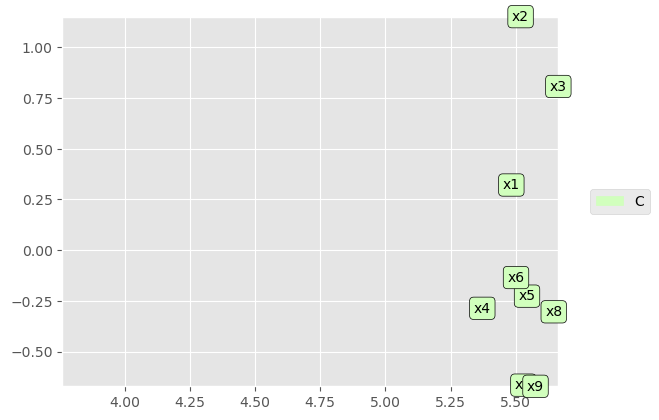

In [18]:
# Plot - Tree Model
util_e_tri_b.plot_points(arr_sample, prediction)

In [19]:
from sklearn.cluster import KMeans

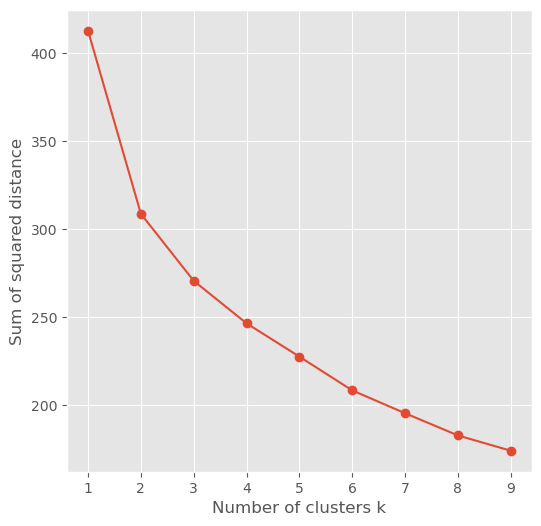

In [26]:
import matplotlib.pyplot as plt
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of squared distance')
plt.show()

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)


In [29]:
# Assuming you've determined an optimal cluster number previously
kmeans = KMeans(n_clusters=3)
kmeans.fit(principal_components)

# Get cluster assignments for each data point
clusters = kmeans.labels_



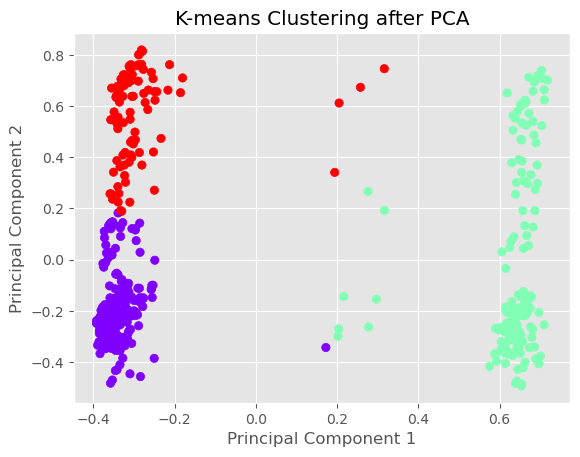

In [30]:
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='rainbow')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering after PCA')
plt.show()

